In [1]:
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt

# Compiling Individual Player Data

In [2]:
#we first want to compile all the individual players data into two large datasets to work with. one for defenders, and one for midfielders/attackers
#we also want to add a new column into the final dataframe called 'Player ID', which acts as a unique identifier that differentiates between 
#observations that belong to different players

att_path = 'Player_Data'

att_dataframe = []
player_id = 1  #initialise player id

if os.path.exists(att_path):
    for file in os.listdir(att_path):
        if file.endswith('.csv'):
            file_path = os.path.join(att_path, file)
            df = pd.read_csv(file_path)
            df['Player ID'] = player_id #assign player id to 'Player ID' column
            att_dataframe.append(df) #append dataframe to final df
            player_id += 1 #increase player id by one for the next file 
            
    final_df = pd.concat(att_dataframe, ignore_index=
                         True)

# Reorder columns to make 'Player ID' the first column
cols = ['Player ID'] + [col for col in final_df.columns if col != 'Player ID']
final_df = final_df[cols]

final_df.to_csv(os.path.join("", "att_finaldat.csv"))

In [3]:
def_path = os.path.join("Player_Data", "Defenders")

def_dataframe = []
player_id = 1  #initialise player id

if os.path.exists(def_path):
    for file in os.listdir(def_path):
        if file.endswith('.csv'):
            file_path = os.path.join(def_path, file)
            df = pd.read_csv(file_path)
            df['Player ID'] = player_id #assign player id to 'Player ID' column
            def_dataframe.append(df)
            player_id += 1 #increase player id by one for the next file 
            
    final_df_def = pd.concat(def_dataframe, ignore_index= True)
    
# Reorder columns to make 'Player ID' the first column
cols = ['Player ID'] + [col for col in final_df_def.columns if col != 'Player ID']
final_df_def = final_df[cols]

final_df_def.to_csv(os.path.join("", "def_finaldat.csv"))

# Data Exploration (Attackers)

In [4]:
final_df.describe()

Player ID    Unnamed: 0     Matchweek  Minutes Played         Goals  \
count  39673.000000  39673.000000  39673.000000    39673.000000  39673.000000   
mean     270.019888     57.789227     19.531394       64.916417      0.152345   
std      149.281739     48.740601     10.993223       30.468864      0.413440   
min        1.000000      0.000000      1.000000        0.000000      0.000000   
25%      140.000000     19.000000     10.000000       35.000000      0.000000   
50%      280.000000     44.000000     19.000000       80.000000      0.000000   
75%      400.000000     87.000000     29.000000       90.000000      0.000000   
max      527.000000    249.000000     38.000000       90.000000      4.000000   

           Assists  Penalties Scored  Penalties Attempted         Shots  \
count  39673.00000      39673.000000         39673.000000  39673.000000   
mean       0.09475          0.013813             0.017115      1.278552   
std        0.31820          0.120958             0.134847      1.448960   
min        0.00000          0.000000             0.000000      0.000000   
25%        0.00000          0.000000             0.000000      0.000000   
50%        0.00000          0.000000             0.000000      1.000000   
75%        0.00000          0.000000             0.000000      2.000000   
max        4.00000          2.000000             2.000000     12.000000   

       Shots on Target  ...  loaned_in  loaned_out      offside  \
count     39673.000000  ...     1971.0      1971.0  1971.000000   
mean          0.446626  ...        0.0         0.0     0.210553   
std           0.754051  ...        0.0         0.0     0.552622   
min           0.000000  ...        0.0         0.0     0.000000   
25%           0.000000  ...        0.0         0.0     0.000000   
50%           0.000000  ...        0.0         0.0     0.000000   
75%           1.000000  ...        0.0         0.0     0.000000   
max           6.000000  ...        0.0         0.0     5.000000   

       open_play_crosses  penalties_conceded   recoveries      tackled  \
count        1971.000000         1971.000000  1971.000000  1971.000000   
mean            0.174531            0.003551     3.723491     1.562659   
std             0.464999            0.059504     3.127762     1.711563   
min             0.000000            0.000000     0.000000     0.000000   
25%             0.000000            0.000000     1.000000     0.000000   
50%             0.000000            0.000000     3.000000     1.000000   
75%             0.000000            0.000000     6.000000     2.000000   
max             4.000000            1.000000    17.000000    10.000000   

           tackles  target_missed  winning_goals  
count  1971.000000    1971.000000    1971.000000  
mean      0.582445       0.414003       0.034500  
std       0.969419       0.718915       0.182557  
min       0.000000       0.000000       0.000000  
25%       0.000000       0.000000       0.000000  
50%       0.000000       0.000000       0.000000  
75%       1.000000       1.000000       0.000000  
max       6.000000       5.000000       1.000000  

[8 rows x 125 columns]

In [5]:
final_df.head()

Player ID  Unnamed: 0        Date  Day  Matchweek Venue Result      Team  \
0          1           0  2023-08-12  Sat          1  Home  W 4–1  Brighton   
1          1           1  2023-08-19  Sat          2  Away  W 4–1  Brighton   
2          1           2  2023-08-26  Sat          3  Home  L 1–3  Brighton   
3          1           3  2023-09-02  Sat          4  Home  W 3–1  Brighton   
4          1           4  2023-09-16  Sat          5  Away  W 3–1  Brighton   

         Opponent Start  ... loaned_in  loaned_out  offside  \
0      Luton Town     N  ...       NaN         NaN      NaN   
1          Wolves     N  ...       NaN         NaN      NaN   
2        West Ham     Y  ...       NaN         NaN      NaN   
3   Newcastle Utd     Y  ...       NaN         NaN      NaN   
4  Manchester Utd     N  ...       NaN         NaN      NaN   

   open_play_crosses  penalties_conceded  recoveries  tackled  tackles  \
0                NaN                 NaN         NaN      NaN      NaN   
1                NaN                 NaN         NaN      NaN      NaN   
2                NaN                 NaN         NaN      NaN      NaN   
3                NaN                 NaN         NaN      NaN      NaN   
4                NaN                 NaN         NaN      NaN      NaN   

   target_missed  winning_goals  
0            NaN            NaN  
1            NaN            NaN  
2            NaN            NaN  
3            NaN            NaN  
4            NaN            NaN  

[5 rows x 136 columns]

Can see that some columns have NaN, so we want to have a look at how many columns contain null values

In [6]:
nan_columns = final_df.isna().sum()
nan_columns = nan_columns[nan_columns != False]
nan_columns = nan_columns.reset_index()
nan_columns.columns = ['Column Name', 'NaN Count']
print(nan_columns)

                        Column Name  NaN Count
0                          Position          2
1                  attempted_passes      37702
2               big_chances_created      37702
3                big_chances_missed      37702
4   clearances_blocks_interceptions      37702
5                  completed_passes      37702
6                          dribbles      37702
7                          ea_index      37702
8            errors_leading_to_goal      37702
9    errors_leading_to_goal_attempt      37702
10                            fouls      37702
11                               id      37702
12                       key_passes      37702
13           kickoff_time_formatted      37702
14                        loaned_in      37702
15                       loaned_out      37702
16                          offside      37702
17                open_play_crosses      37702
18               penalties_conceded      37702
19                       recoveries      37702
20           

The position column only has 2 NaN's, but the other columns have majority of the observations being NaN. I suspect this is due to the difference in data that is available throughout the years (big chance created data etc. is available for more recent seasons, but wasn't available previously. We can probably remove the features that have majority of their observations being NaN)

In [7]:
#this code first drops the column that contains info about how many NaN's in each feature. we then also drop the first row, because we would like to keep the 'position' feature for now. Finally, turn the 
#dataframe into a list, so that we can easily use the column names to remove them from the final_df
nan_columns = nan_columns.drop(nan_columns.columns[1], axis = 1)
nan_columns = nan_columns.drop(index = 0)
nan_columns = nan_columns['Column Name'].tolist()

In [8]:
final_df = final_df.drop(columns = nan_columns)

We now want to investigate the two NaN's in the position feature

In [9]:
#pd.set_option('display.max_columns', None)
final_df[final_df['Position'].isna()]

Player ID  Unnamed: 0        Date  Day  Matchweek Venue Result  \
2469          36          76  2021-01-20  Wed          1  Home  W 2–0   
34170        454         122  2021-01-12  Tue          1  Home  L 0–1   

                  Team        Opponent Start  ... round  saves  selected  \
2469   Manchester City     Aston Villa     N  ...    19      0    109790   
34170          Burnley  Manchester Utd     N  ...    18      0     23787   

       threat  total_points  transfers_balance  transfers_in  transfers_out  \
2469     19.0             4              13192         24289          11097   
34170     0.0             1              -1159           115           1274   

       value  kickoff_date  
2469      91    2021-01-20  
34170     57    2021-01-12  

[2 rows x 113 columns]

By looking at the data manually, we can input positions for these two observations. 
* 2469 - Gabriel Jesus - LW
* 34170 - Dwight McNeil - LW 

In [10]:
final_df.loc[2469, 'Position'] = 'LW'
final_df.loc[34170, 'Position'] = 'LW'

#just checking to make sure the inputation worked 
final_df[final_df['Position'].isna()]

Empty DataFrame
Columns: [Player ID, Unnamed: 0, Date, Day, Matchweek, Venue, Result, Team, Opponent, Start, Position, Minutes Played, Goals, Assists, Penalties Scored, Penalties Attempted, Shots, Shots on Target, Yellow Cards, Red Cards, Touches, Tackles, Interceptions, Blocks, xG, npxG, xAG, Shot Creating Actions, Goal Creating Actions, Passes Completed, Passes Attempted, Progressive Passes, Carries, Progressive Carries, Take-ons Attempted, Successful Take-ons, Passing Distance, Progressive Passing Distance, Short Passes Completed, Short Passes Attempted, Medium Passes Completed, Medium Passes Attempted, Long Passes Completed, Long Passes Attempted, Expected Assists, Key Passes, Passes into Final Third, Passes into Penalty Area, Crosses into Penalty Area, Live Pass, Dead Pass, Free Kick Pass, Through Balls, Switches, Crosses, Throw Ins Taken, Corners Taken, Passes Offside, Live SCA, Deadball SCA, Take-on SCA, Shot SCA, Foul SCA, Defense SCA, Live GCA, Deadball GCA, Take-on GCA, Shot GCA, Foul GCA, Defense GCA, Tackles Won, Defensive Third Tackles, Middle Third Tackles, Attacking Third Tackles, Dribblers Tackled, Dribblers Tackled Attempts, Challenges Lost, Shots Blocked, Passes Blocked, Clearances, Defensive Errors, Defensive Penalty Area Touches, Defensive Third Touches, Middle Third Touches, Attacking Third Touches, Penalty Area Touches, Carry Distance, Progressive Carry Distance, Final Third Carries, Carries into Penalty Area, Miscontrols, Dispossessed, Passes Received, Progressive Passes Received, bonus, bps, clean_sheets, creativity, ict_index, influence, ...]
Index: []

[0 rows x 113 columns]

In [11]:
final_df.head(8)

Player ID  Unnamed: 0        Date  Day  Matchweek Venue Result      Team  \
0          1           0  2023-08-12  Sat          1  Home  W 4–1  Brighton   
1          1           1  2023-08-19  Sat          2  Away  W 4–1  Brighton   
2          1           2  2023-08-26  Sat          3  Home  L 1–3  Brighton   
3          1           3  2023-09-02  Sat          4  Home  W 3–1  Brighton   
4          1           4  2023-09-16  Sat          5  Away  W 3–1  Brighton   
5          1           5  2023-09-24  Sun          6  Home  W 3–1  Brighton   
6          1           6  2023-09-30  Sat          7  Away  L 1–6  Brighton   
7          1           7  2023-10-08  Sun          8  Home  D 2–2  Brighton   

         Opponent Start  ... round  saves  selected  threat  total_points  \
0      Luton Town     N  ...     1      0    559185    37.0             5   
1          Wolves     N  ...     2      0    593303     4.0             1   
2        West Ham     Y  ...     3      0    506600    70.0             2   
3   Newcastle Utd     Y  ...     4      0    453114    52.0            17   
4  Manchester Utd     N  ...     5      0    765758    17.0             1   
5     Bournemouth     Y  ...     6      0    802885     9.0             1   
6     Aston Villa     Y  ...     7      0    779047     0.0             1   
7       Liverpool     Y  ...     8      0    709129     1.0             1   

   transfers_balance  transfers_in  transfers_out  value  kickoff_date  
0                  0             0              0     60    2023-08-12  
1             -16405         37439          53844     60    2023-08-19  
2             -95362         22125         117487     60    2023-08-26  
3             -60023         11535          71558     59    2023-09-02  
4             272535        355471          82936     60    2023-09-16  
5              34133        111860          77727     60    2023-09-24  
6             -28049         75147         103196     60    2023-09-30  
7             -71612         33271         104883     60    2023-10-08  

[8 rows x 113 columns]

A quick look at the first 5 rows yields the following observations
* The first column (Unnamed:0) can be removed, because it is just the index for the individual player dataframes 
* The 'Date' column can be removed, since this information is duplicated in the 'kickoff_time' column, for the same reason we can remove the 'kickoff_date' column
* The 'minutes' column can be removed, as this gives the same information as the 'Mins Played' column 
* The 'round' column can be removed, as this gives the same information as the 'Matchweek' column 


In [12]:
final_df = final_df.drop(columns = ['Unnamed: 0', 'Date', 'kickoff_date', 'minutes', 'round'])
final_df.head()

Player ID  Day  Matchweek Venue Result      Team        Opponent Start  \
0          1  Sat          1  Home  W 4–1  Brighton      Luton Town     N   
1          1  Sat          2  Away  W 4–1  Brighton          Wolves     N   
2          1  Sat          3  Home  L 1–3  Brighton        West Ham     Y   
3          1  Sat          4  Home  W 3–1  Brighton   Newcastle Utd     Y   
4          1  Sat          5  Away  W 3–1  Brighton  Manchester Utd     N   

  Position  Minutes Played  ...               kickoff_time  own_goals  saves  \
0       FW              13  ...  2023-08-12 14:00:00+00:00          0      0   
1       FW              24  ...  2023-08-19 14:00:00+00:00          0      0   
2       FW              90  ...  2023-08-26 16:30:00+00:00          0      0   
3       FW              80  ...  2023-09-02 16:30:00+00:00          0      0   
4       RW               6  ...  2023-09-16 14:00:00+00:00          0      0   

   selected  threat  total_points  transfers_balance  transfers_in  \
0    559185    37.0             5                  0             0   
1    593303     4.0             1             -16405         37439   
2    506600    70.0             2             -95362         22125   
3    453114    52.0            17             -60023         11535   
4    765758    17.0             1             272535        355471   

   transfers_out  value  
0              0     60  
1          53844     60  
2         117487     60  
3          71558     59  
4          82936     60  

[5 rows x 108 columns]

We now want to take a look at the data types of our remaining features, and then make any adjustments if necessary

In [13]:
final_df_datatypes = final_df.dtypes.reset_index()
final_df_datatypes.columns = ['Column Name', 'Data Type']

#pd.set_option('display.max_rows', None)
final_df_datatypes

Column Name Data Type
0            Player ID     int64
1                  Day    object
2            Matchweek     int64
3                Venue    object
4               Result    object
..                 ...       ...
103       total_points     int64
104  transfers_balance     int64
105       transfers_in     int64
106      transfers_out     int64
107              value     int64

[108 rows x 2 columns]

Looking at this, the main column we want to change right away is 'kickoff_time' into a datetime64 object. The rest we can leave for now

In [14]:
final_df['kickoff_time'] = pd.to_datetime(final_df['kickoff_time'])

Prior to actually exploring the data, we need to separate our dataset into training and test sets, so we don't draw any conclusions from data that is supposed to be unseen. 

In [15]:
from sklearn.model_selection import train_test_split
att_train, att_test = train_test_split(final_df, test_size = 0.2, random_state = 66)

We also make a copy of att_train for the purpose of data exploration. We can safely manipulate and make changes to this duplicated dataframe, without worrying about it having any impact on the original training set. 

In [16]:
att_explore = att_train

In [17]:
att_explore.head()

Player ID  Day  Matchweek Venue Result             Team  \
10000        140  Sun         32  Away  L 1–2   Crystal Palace   
24977        340  Sat         29  Away  L 1–2      Bournemouth   
37756        498  Sun         37  Away  D 0–0     Huddersfield   
18759        262  Sun         34  Away  D 2–2      Southampton   
168            3  Sun         38  Home  W 5–0  Manchester City   

              Opponent Start Position  Minutes Played  ...  \
10000   Leicester City     Y       DM              90  ...   
24977        Liverpool     N       LW              23  ...   
37756  Manchester City     Y       CM              90  ...   
18759         Brighton     N       LM              25  ...   
168       Norwich City    Y*       LM              84  ...   

                   kickoff_time  own_goals  saves  selected  threat  \
10000 2022-04-10 13:00:00+00:00          0      0      6955    36.0   
24977 2020-03-07 12:30:00+00:00          0      0     24392     0.0   
37756 2018-05-06 12:30:00+00:00          0      0     10349     0.0   
18759 2022-04-24 13:00:00+00:00          0      0     19229     5.0   
168   2020-07-26 15:00:00+00:00          0      0    801163   101.0   

       total_points  transfers_balance  transfers_in  transfers_out  value  
10000             2                 27           343            316     54  
24977             1               -359           133            492     52  
37756             3                -47           129            176     44  
18759             1              -1446           288           1734     58  
168               3             198047        228466          30419     75  

[5 rows x 108 columns]

### 'Day' Feature Exploration

Our initial goal is to use the data available to predict the number of goals scored. We can start by exploring the relationships between each of the features and goals scored. We start off by looking at the relationship between the 'Day' feature and the 'Goals' feature. 

In [18]:
att_explore['Day'].unique()

array(['Sun', 'Sat', 'Mon', 'Wed', 'Fri', 'Tue', 'Thu'], dtype=object)

In [19]:
att_explore['Day'].value_counts()

Day
Sat    15337
Sun     8120
Wed     2752
Tue     1835
Mon     1790
Thu     1016
Fri      888
Name: count, dtype: int64

In [20]:
goals_by_day = att_explore.groupby(['Day', 'Goals']).size().unstack(fill_value = 0)

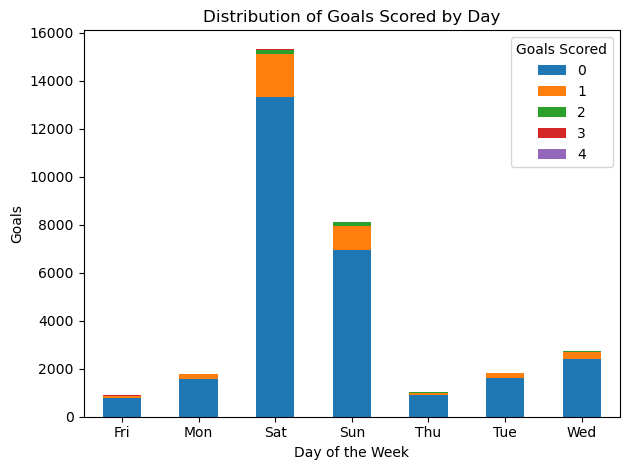

In [21]:
fig, ax = plt.subplots()

goals_by_day.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goals Scored by Day')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Goals')
ax.legend(title = 'Goals Scored')

plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

First of all, we can see that majority of the games are played on either a Saturday or a Sunday which makes sense. Although it may appear that Saturdays and Sundays have a greater proportion of goals scored, this is not the case. It only appears that way because the Sat/Sun bar is quite a bit longer. This is made evident if we produce a similar plot, but this time we plot the proportion of the number of goals scored each day. 

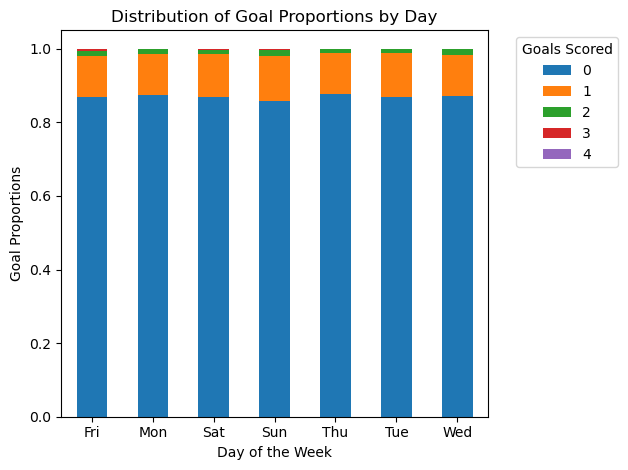

In [22]:
goalprop_by_day = goals_by_day.div(goals_by_day.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_day.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Day')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

This plot makes it clear that the proportion of goals scored does not really differ across the days. In other words, it doesn't appear that there is any relation between the number of goals scored, and the day the game was played. Another thing we can do to further investigate this is to group the observations by whether or not the game was played on a weekend, or on a weekday. In general, weekend games are much more common, as midweek games only happen in special circumstances such as rearranged fixtures or double gameweeks. Perhaps there is a difference in the number of goals scored when grouping the data in this manner. 

In [23]:
def categorize_day(day):
    if day in ['Sat', 'Sun']:
        return 'Weekend'
    else:
        return 'Weekday'

goalprop_by_daytype = att_explore[['Day', 'Goals']]


/var/folders/dv/bjx4hkg54x17symh1g3_3jf80000gq/T/ipykernel_80004/1867152727.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goalprop_by_daytype['DayType'] = goalprop_by_daytype['Day'].apply(categorize_day)


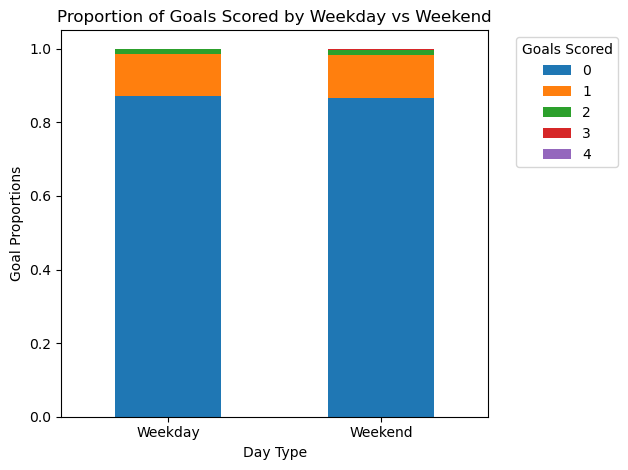

In [24]:
goalprop_by_daytype['DayType'] = goalprop_by_daytype['Day'].apply(categorize_day)

goals_by_daytype = goalprop_by_daytype.groupby(['DayType', 'Goals']).size().unstack(fill_value = 0)
goalprop_by_daytype = goals_by_daytype.div(goals_by_daytype.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()
goalprop_by_daytype.plot(kind = 'bar', stacked = True, ax = ax)

ax.set_title('Proportion of Goals Scored by Weekday vs Weekend')
ax.set_xlabel('Day Type')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

Once again, we can see that the proportion of goals scored by day type is essentially identical. Therefore, there is strong justification to say that the day the game was played does not have any impact on the number of goals scored. If building a model to predict the number of goals scored, we can remove this feature from consideration. 

### 'Matchweek' Feature Exploration

We now have a look at the relationship between goals scored and the matchweek where the game occurred. We don't anticipate there to be much relationship between this feature and the target variable. This is primarily for two reasons. The first reason is that the matchweek isn't necessarily representative of the order in which the games were played in. For example, rearranged games will keep their initial matchweek number (which is the original order of the fixtures when published at the beginning of the season), but may be played in non-consecutive order (so if the matchweek 5 game was rearranged to be played in February instead of September, it will still be classified as matchweek 5). Therefore, the only information that the 'Matchweek' feature is telling us is the initial fixture order. 

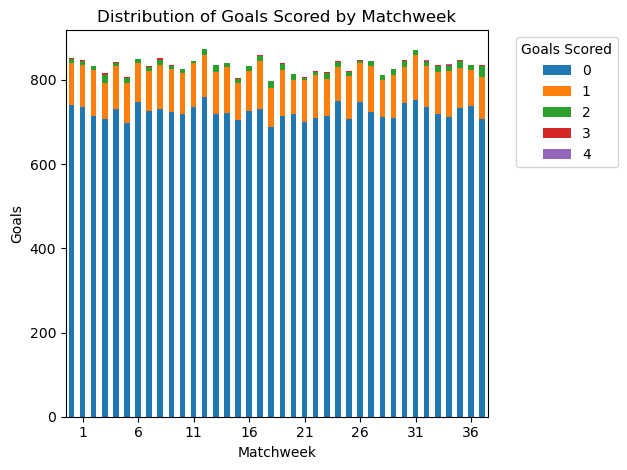

In [25]:
goals_by_matchweek = att_explore.groupby(['Matchweek', 'Goals']).size().unstack(fill_value = 0)

fig, ax = plt.subplots()

goals_by_matchweek.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goals Scored by Matchweek')
ax.set_xlabel('Matchweek')

#set_xticks is used to only have certain values on the x axis. without this on, every x axis value was printed, which meant that the x axis values overlapped, affecting readability 
ax.set_xticks(range(1, 38, 5))
ax.set_xticklabels(range(1, 38, 5))

ax.set_ylabel('Goals')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

As expected, there doesn't seem to be any particular relationship betweeen the number of goals scored and the matchweek. As there is no real logical way to categorise or transform the 'Matchweek' feature, we can conclude that this is another feature that is under strong consideration to be removed. 

### 'Venue' Feature Exploration

Our initial expectation is that there may be a relationship between the venue (whether or not the game was played home or away), and the number of goals scored. Typically, we expect teams (and therefore players) to perform better and score more goals when playing at home. Therefore, we expect to see a higher proportion of goals scored for observations that are categorised as playing at home. 

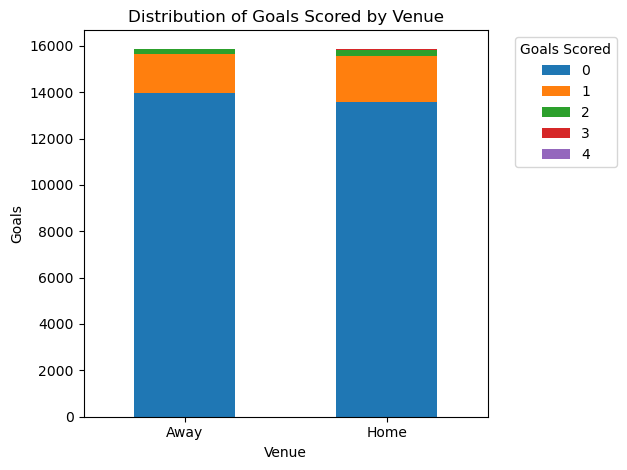

In [26]:
goals_by_venue = att_explore.groupby(['Venue', 'Goals']).size().unstack(fill_value = 0)

fig, ax = plt.subplots()

goals_by_venue.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goals Scored by Venue')
ax.set_xlabel('Venue')
ax.set_ylabel('Goals')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

Perhaps surprisingly, we are not seeing any major difference between the number of goals scored at home compared to away from home. The plot does show that slightly more goals are scored at home compared to away, but this difference is perhaps not as pronounced as expected. 

### 'Result' Feature Exploration

In [27]:
att_explore['Result']

10000    L 1–2
24977    L 1–2
37756    D 0–0
18759    D 2–2
168      W 5–0
         ...  
31381    L 0–2
5199     W 3–0
8243     L 1–4
8823     L 0–4
25620    D 1–1
Name: Result, Length: 31738, dtype: object

We can see that the 'Result' feature is currently a dtype object, with information for both the final score (number of goals scored for each team), as well as the final result (win, loss or draw) in the same feature. We want to perhaps separate this feature, so that we can individually explore the relationship between goals scored and the final score/final result. 

In [28]:
#create new dataframe with just result and goals 
att_explore_result = att_explore[['Result', 'Goals']].copy()

#strip the result column of any whitespace, to make it easier to process the string 
att_explore_result.loc[:, 'Result'] = att_explore_result['Result'].str.strip()

#use str.extract method to extract the relevant strings from the result column. the purpose of this is to create two new features (outcome and score)
att_explore_result[['Outcome', 'Score']] = att_explore_result['Result'].str.extract(r'([LWD])\s+(\d+[–-]\d+)')

#drop the result column, as we no longer need this 
att_explore_result = att_explore_result.drop('Result', axis = 1)

#replace the dash in the score column with a hyphen, to make it easier to work with in the future 
att_explore_result['Score'] = att_explore_result['Score'].str.replace('\u2013', '-', regex = True)

att_explore_result.head()

Goals Outcome Score
10000      0       L   1-2
24977      0       L   1-2
37756      0       D   0-0
18759      0       D   2-2
168        0       W   5-0

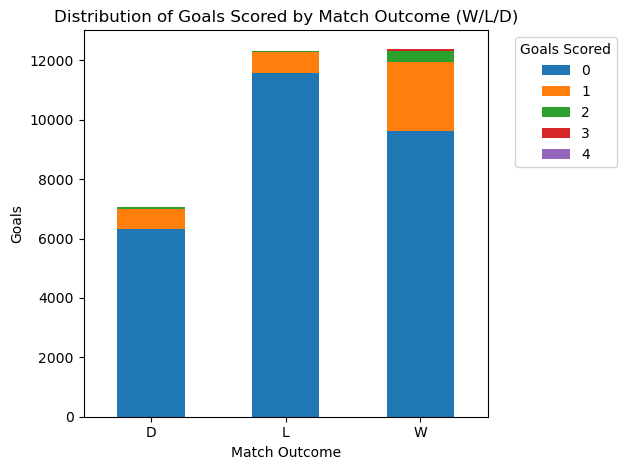

In [29]:
goals_by_outcome = att_explore_result.groupby(['Outcome', 'Goals']).size().unstack(fill_value = 0)

fig, ax = plt.subplots()

goals_by_outcome.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goals Scored by Match Outcome (W/L/D)')
ax.set_xlabel('Match Outcome')
ax.set_ylabel('Goals')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

It is perhaps unsurprising to see that the proportion of goals scored seems to be highest when the match outcome is a Win, compared to when the match outcome is either a Loss or a Draw. We can take a look further at the proportion of goals scored, when categorised by the match outcome. 

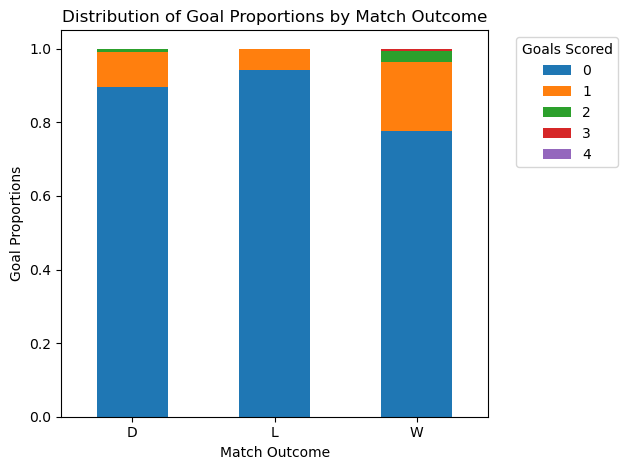

In [30]:
goalprop_by_outcome = goals_by_outcome.div(goals_by_outcome.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_outcome.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Match Outcome')
ax.set_xlabel('Match Outcome')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

This plot makes it even more obvious that the proportion of goals scored is highest when the final outcome is a win. THe lowest proportion of goals scored is when the final outcome is a loss, whilst the proportion of goals scored is in the middle if the final outcome is a draw. Whilst this is useful to know, it doesn't really help with building a model to predict the number of goals scored, as this information is only available 'after' a game has been played. However, it may still be useful to include in the model, because we can then incorporate team strength models to aid with the prediction, i.e. feed into the model the probability that a team will win a particular game (as this will be known prior to the game), and using that to adjust the predictions. 

In [31]:
att_explore_result['Score'].unique()

array(['1-2', '0-0', '2-2', '5-0', '4-1', '3-6', '1-0', '0-3', '0-1',
       '0-4', '2-1', '3-0', '1-1', '3-1', '1-3', '2-0', '2-3', '4-2',
       '1-4', '5-2', '0-2', '3-2', '3-5', '1-5', '4-0', '5-1', '4-3',
       '3-4', '5-3', '0-5', '2-5', '3-3', '1-6', '2-4', '0-9', '4-4',
       '6-1', '0-6', '7-0', '6-0', '6-3', '9-0', '5-4', '0-7', '6-2',
       '8-0', '7-2', '2-6', '4-5', '2-7', '0-8'], dtype=object)

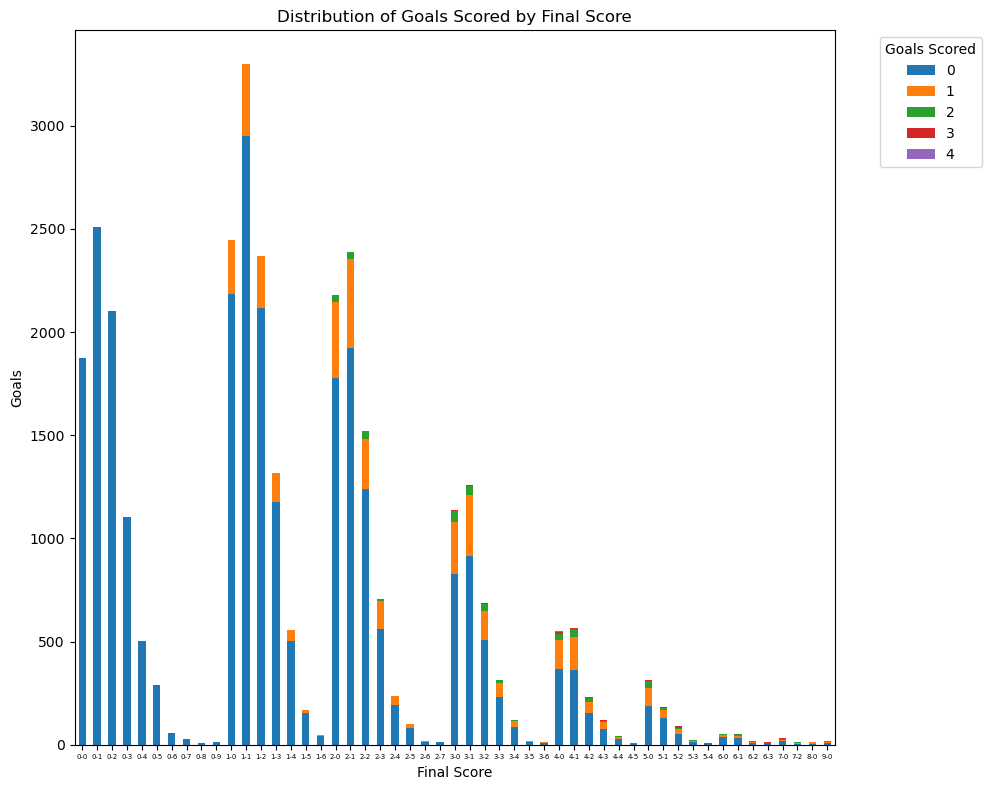

In [32]:
goals_by_score = att_explore_result.groupby(['Score', 'Goals']).size().unstack(fill_value = 0)

fig, ax = plt.subplots(figsize = (10, 8))

goals_by_score.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goals Scored by Final Score')
ax.set_xlabel('Final Score')

ax.set_ylabel('Goals')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)
plt.xticks(rotation = 0, fontsize = 5)
plt.tight_layout()
plt.show()

To the left of the plot, we have the results where the teams did not score a goal (0-0 to 0-9). We can try remove these observations, as the fact that the proportion of goals scored is zero when the team did not score any goals is not particularly useful information. 

In [33]:
goals_by_score = goals_by_score.reset_index()
goals_by_score = goals_by_score[~goals_by_score.iloc[:,0].str.split('-').str[0].astype(int).eq(0)]
goals_by_score = goals_by_score.set_index('Score')

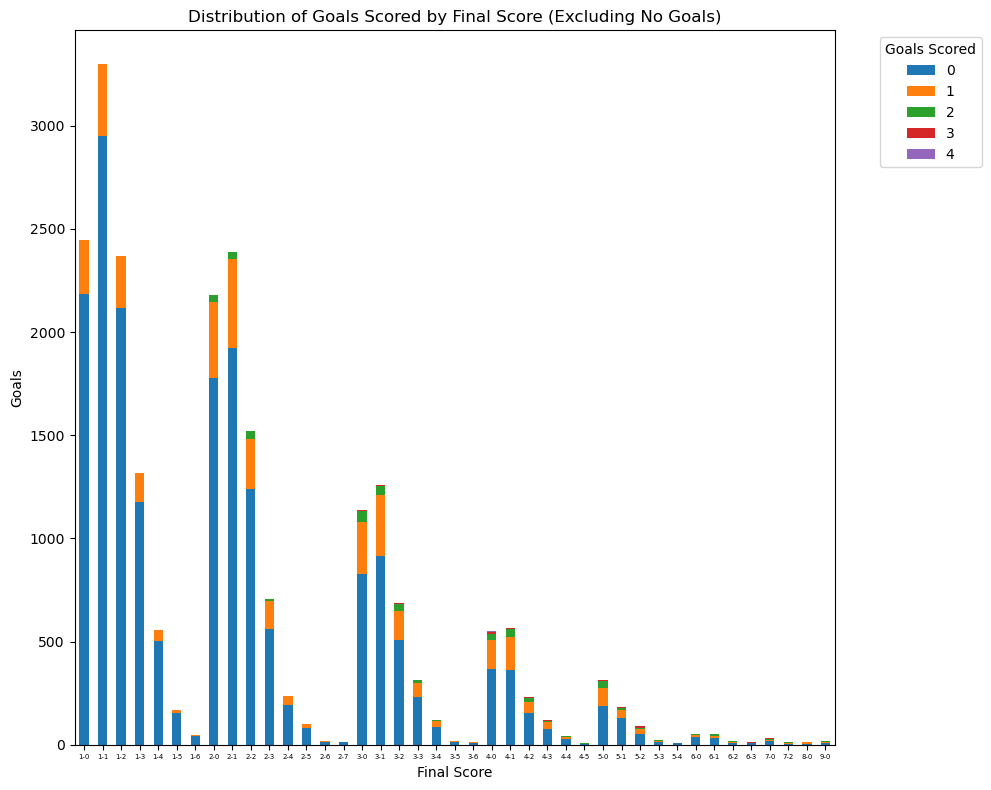

In [34]:
fig, ax = plt.subplots(figsize = (10, 8))

goals_by_score.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goals Scored by Final Score (Excluding No Goals)')
ax.set_xlabel('Final Score')

ax.set_ylabel('Goals')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)
plt.xticks(rotation = 0, fontsize = 5)
plt.tight_layout()
plt.show()

This plot is quite difficult to read, because of the wide range in the lengths of the bars. Let's plot the proportion of goals scored instead, to help with both readability and interpretability. 

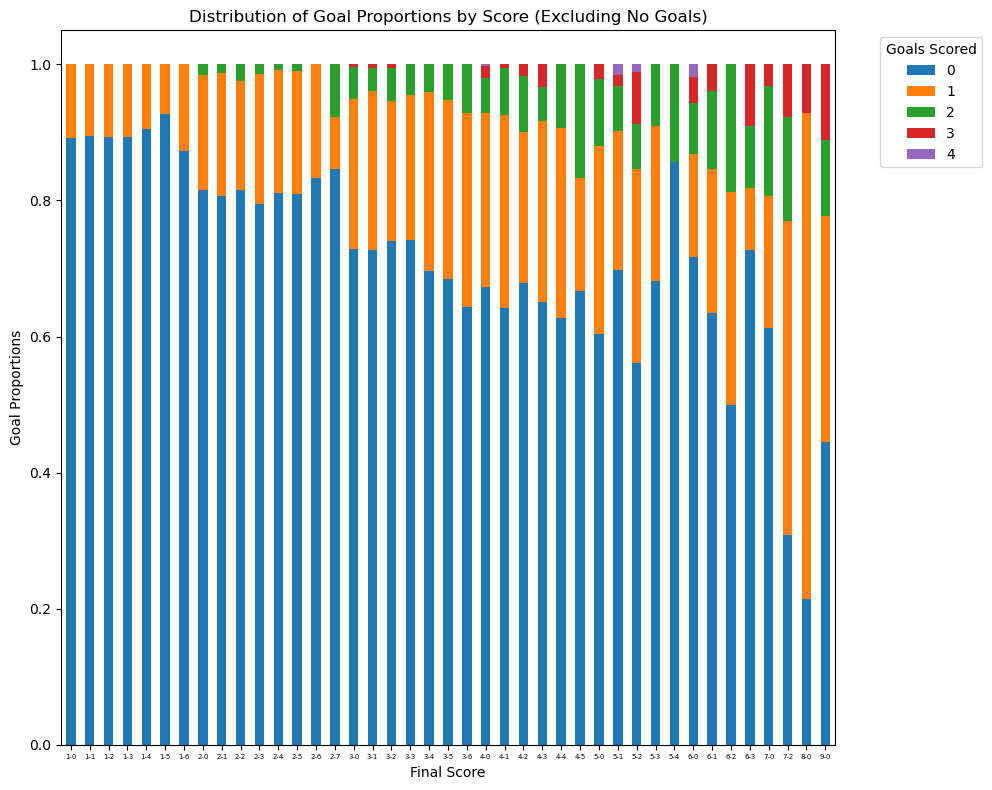

In [35]:
goalprop_by_score = goals_by_score.div(goals_by_score.sum(axis = 1), axis = 0)
fig, ax = plt.subplots(figsize = (10, 8))

goalprop_by_score.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Score (Excluding No Goals)')
ax.set_xlabel('Final Score')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 0, fontsize = 5)
plt.tight_layout()
plt.show()

The graph clearly shows that as the proportion of goals scored increases as the number of goals your team scores increases. Again, this may not be particularly revalatory, but it is still valuable information. We have the same problem where we don't know the final score prior to the match being played, meaning this feature may not be particularly useful when building the predictive model. However same as before, we can use other models that predict the scores prior to a match being played as information. 

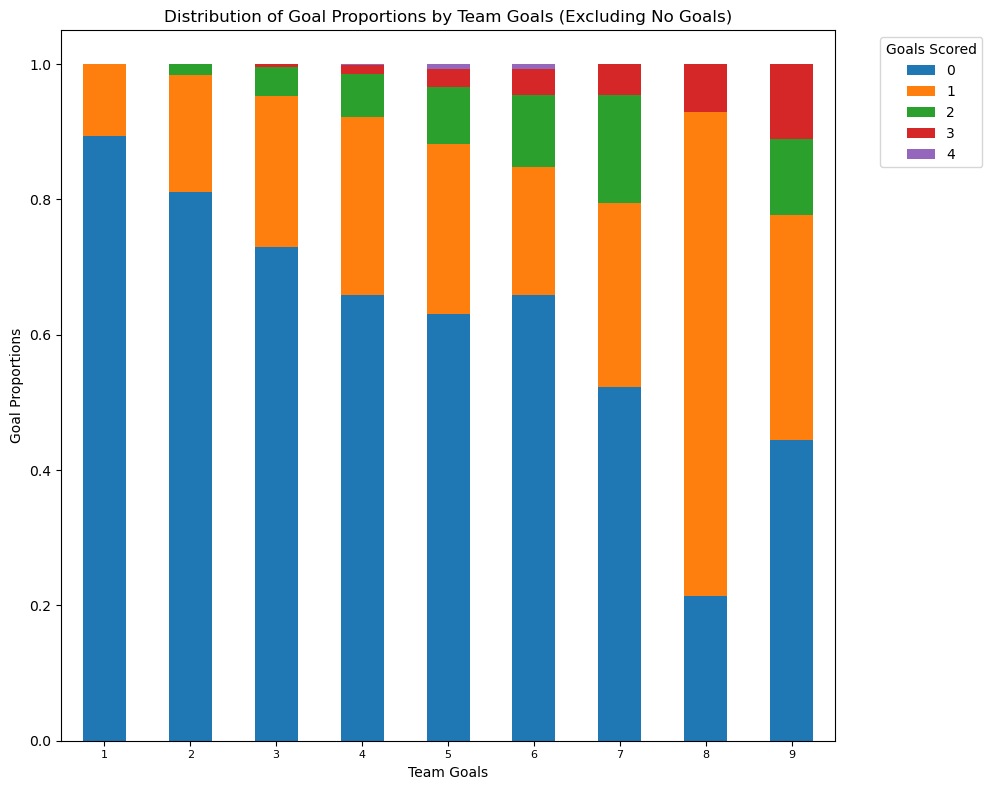

In [36]:
#adding another column called 'Team Goals', which is equivalent to the number of goals scored by the team in a particular match
goals_by_score = goals_by_score.reset_index()
goals_by_score['Team Goals'] = goals_by_score['Score'].str.split('-').str[0]
goals_by_score = goals_by_score.set_index('Score')

#grouping by team goals 
goals_by_teamgoals = goals_by_score.groupby('Team Goals').sum()

#getting the proportion of goals scored when grouped by team goals 
goalprop_by_teamgoals = goals_by_teamgoals.div(goals_by_teamgoals.sum(axis = 1), axis = 0)


fig, ax = plt.subplots(figsize = (10, 8))

goalprop_by_teamgoals.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Team Goals (Excluding No Goals)')
ax.set_xlabel('Team Goals')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 0, fontsize = 8)
plt.tight_layout()
plt.show()

Same pattern as identified above. The more goals your team scores in a particular match, the greater the proportion of observations that have goals being scored. 

### 'Team' Feature Exploration

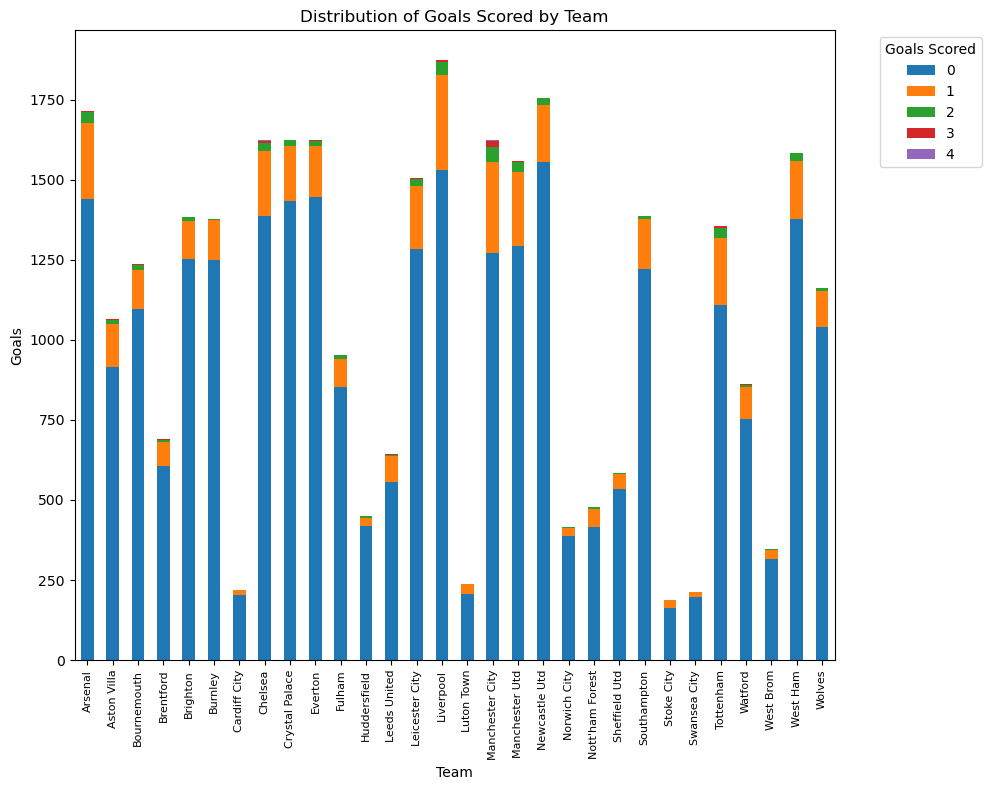

In [37]:
goals_by_team = att_explore.groupby(['Team', 'Goals']).size().unstack(fill_value = 0)

fig, ax = plt.subplots(figsize = (10,8))

goals_by_team.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goals Scored by Team')
ax.set_xlabel('Team')

ax.set_ylabel('Goals')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)
plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()

At first glance, it appears that there are certain teams that are associated with more observations that have goals being scored. Once again, we can instead plot the proportion of goals scored by each team for better interpretability 

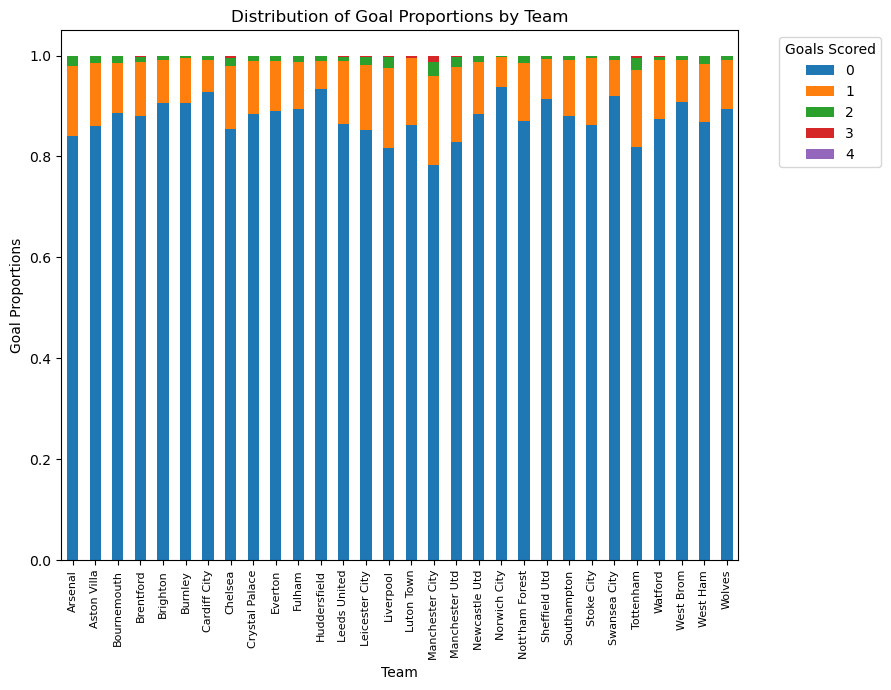

In [38]:
goalprop_by_team = goals_by_team.div(goals_by_team.sum(axis = 1), axis = 0)

fig, ax = plt.subplots(figsize = (9,7))

goalprop_by_team.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Team')
ax.set_xlabel('Team')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()

Can see that teams such as Arsenal, Chelsea, Liverpool, Manchester City and Tottenham have greater proportions of non-zero goal observations. This makes sense because these are considered to be the top teams in the league. This shows us that it is likely that team strength/ability likely plays into the probability that a particular player will score in a given game (the stronger the team, the more likely that they will score). 

### 'Opponent' Feature Exploration

We repeat the above analysis but this time for the opponents faced. Once again, we expect a similar pattern where there will be teams faced that lead to a greater proportion of goals scored. This is because certain teams will be weaker, meaning it is more likely that goals will be scored against them. 

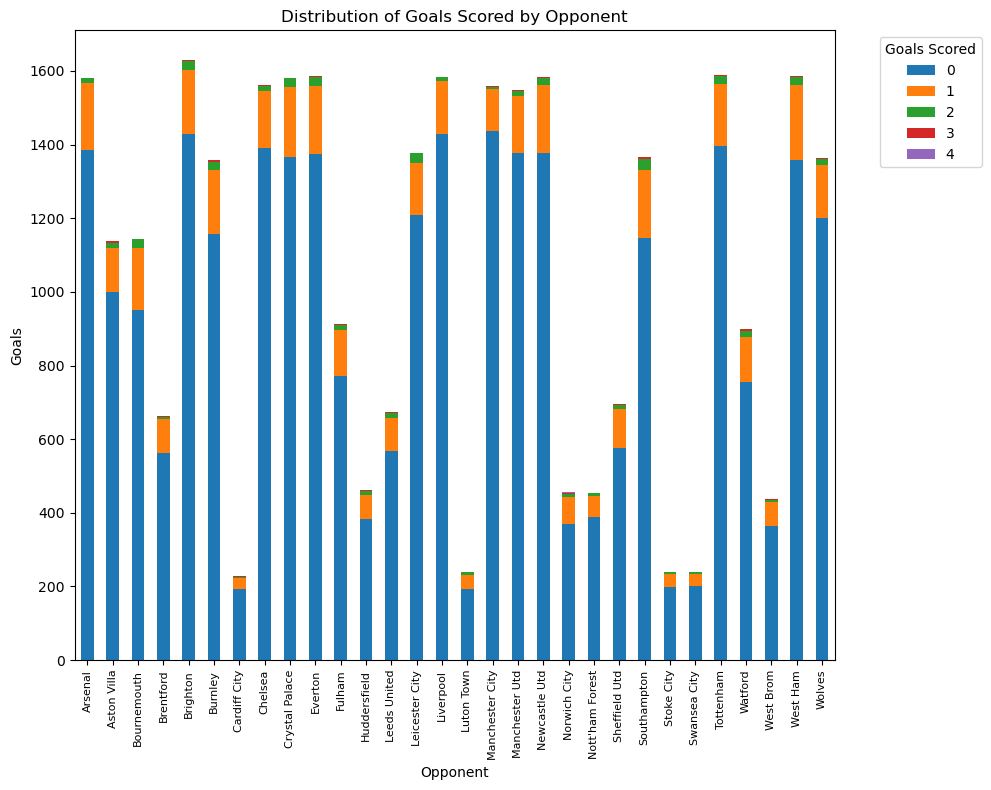

In [39]:
goals_by_opponent = att_explore.groupby(['Opponent', 'Goals']).size().unstack(fill_value = 0)

fig, ax = plt.subplots(figsize = (10,8))

goals_by_opponent.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goals Scored by Opponent')
ax.set_xlabel('Opponent')

ax.set_ylabel('Goals')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)
plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()

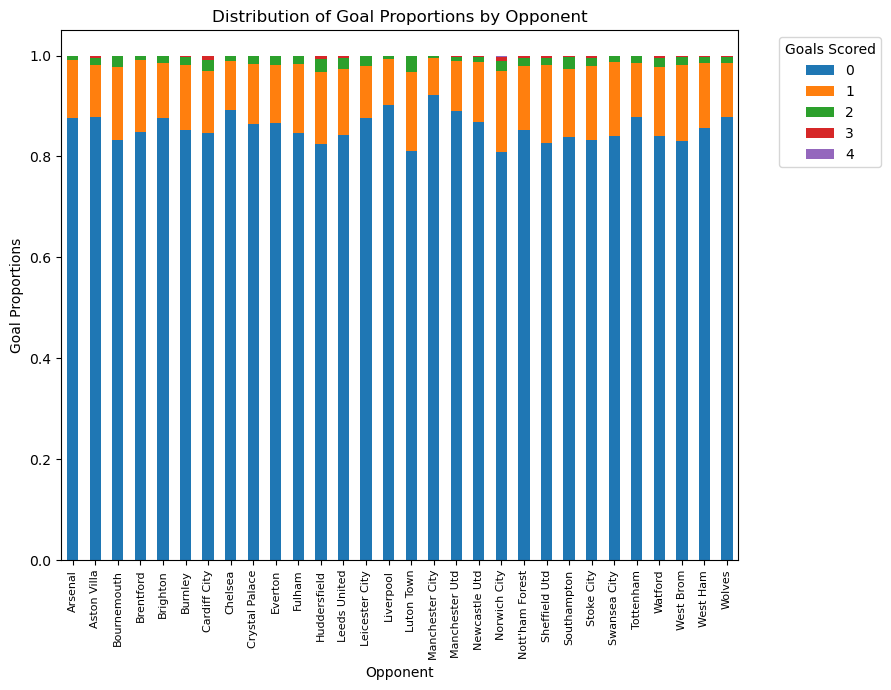

In [40]:
goalprop_by_opponent = goals_by_opponent.div(goals_by_opponent.sum(axis = 1), axis = 0)

fig, ax = plt.subplots(figsize = (9,7))

goalprop_by_opponent.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Opponent')
ax.set_xlabel('Opponent')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()

There is definitely some variation, but the effect doesn't seem to be as pronounced as expected. For example, we expect Arsenal to be a better team than Brighton on average, therefore we expect a fewer proportion of goals to be scored when facing Arsenal as an opponent compared to facing Brighton as an opponent. However, the plot above shows that there appears to be a similar proportion of goals scored when facing Arsenal and Brighton. One reason for this is because teams have variation in their performance across the seasons. For example, there are certain seasons where Arsenal are considered to be one of the top teams in the league, but other seasons where they are a much more middling opposition. To investigate this, we can try plot the proportion of goals scored against an opponent based on the opponent's final place in the table at the end of the season. 

In [41]:
def determine_season(date):
    seasons = ('2024-2025', '2023-2024', '2022-2023', '2021-2022', '2020-2021', '2019-2020', '2018-2019', '2017-2018')
    matching = [s for s in seasons if str(date.year) in s]
    dynamic_timestamp = pd.Timestamp(f'{date.year}-08-01').tz_localize('GMT')
    
    if dynamic_timestamp <= date:
        return(matching[0])
    else: 
        return(matching[1])

In [42]:
#loading prem_table as a dataframe from source
prem_table = pd.read_csv('prem_table.csv', usecols = [1,2,3])

#adding a new column into att_explore which tells us which season a particular observation belongs to 
att_explore['Season'] = att_explore['kickoff_time'].apply(determine_season)

#creating a new dataframe called 'merged', which merges information from the prem_table dataframe and the att_explore dataframe
merged = att_explore.merge(prem_table, left_on = ['Opponent', 'Season'], right_on = ['Team', 'Season'], how = 'left')

#opp_pos is now a list, which we can then attach back onto att_explore 
opp_pos = merged['Position_y'].tolist()
att_explore['Opponent Position'] = opp_pos

We can now plot goals by opponent position, instead of just by opponent

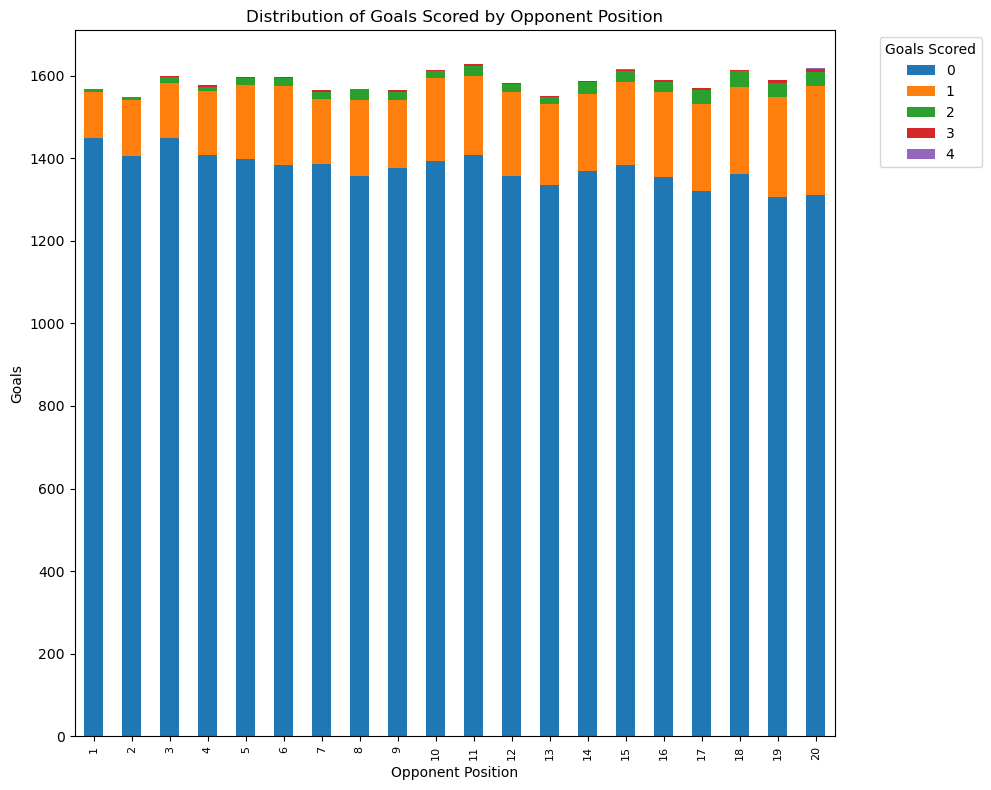

In [43]:
goals_by_opponentpos = att_explore.groupby(['Opponent Position', 'Goals']).size().unstack(fill_value = 0)

fig, ax = plt.subplots(figsize = (10,8))

goals_by_opponentpos.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goals Scored by Opponent Position')
ax.set_xlabel('Opponent Position')

ax.set_ylabel('Goals')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)
plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()

We can see a relatively clear pattern that shows that the lower the opponent's final position at the end of the season, the greater the proportion of goals is scored when facing them. This should be made even more clear if we plot the proportion of goals scored by opponent position. 

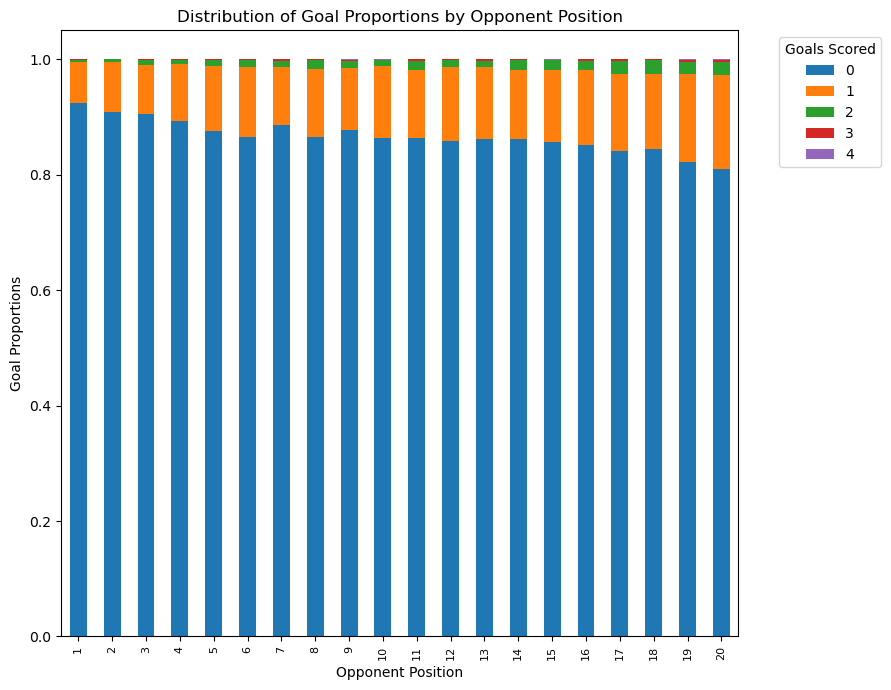

In [44]:
goalprop_by_opponentpos = goals_by_opponentpos.div(goals_by_opponentpos.sum(axis = 1), axis = 0)

fig, ax = plt.subplots(figsize = (9,7))

goalprop_by_opponentpos.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Opponent Position')
ax.set_xlabel('Opponent Position')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()

One limitation of this analysis is that it doesn't necessarily capture the ebs and flows that a team goes through throughout a season. For example, the team that ended up finishing 20th might have had a really good start to the season, and were considered to be one of the stronger teams initially. But because of injuries to key players, the team got a lot weaker throughout the season, eventually leading to them finishing 20th. In this case, facing this team at the beginning of the season would've been a much more difficult game than facing them at the end of the season. 

### 'Start' Feature Exploration

'Start' is a feature that tells us whether or not a given player started a game or not. The general consensus is that players that start games are more likely to score. This is because they are generally on the pitch for a longer period of time. 

In [45]:
att_explore['Start'].unique()

array(['Y', 'N', 'Y*'], dtype=object)

We can see that the 'Start' feature has 3 columns. 
* Y = This player started this game 
* N = This player did not start this game 
* Y* = This player started the game as club captain


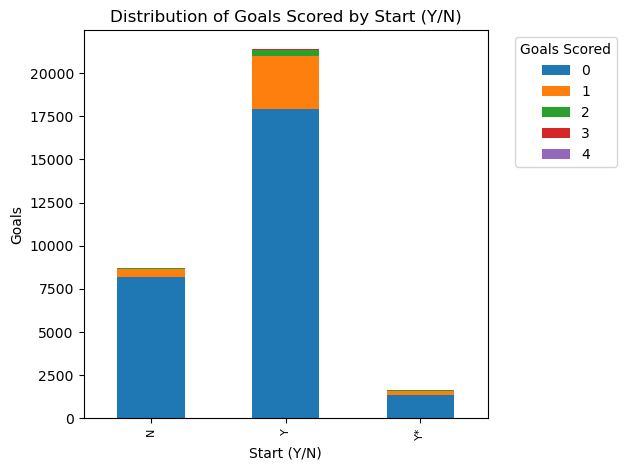

In [46]:
goals_by_start = att_explore.groupby(['Start', 'Goals']).size().unstack(fill_value = 0)

fig, ax = plt.subplots()

goals_by_start.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goals Scored by Start (Y/N)')
ax.set_xlabel('Start (Y/N)')

ax.set_ylabel('Goals')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)
plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()

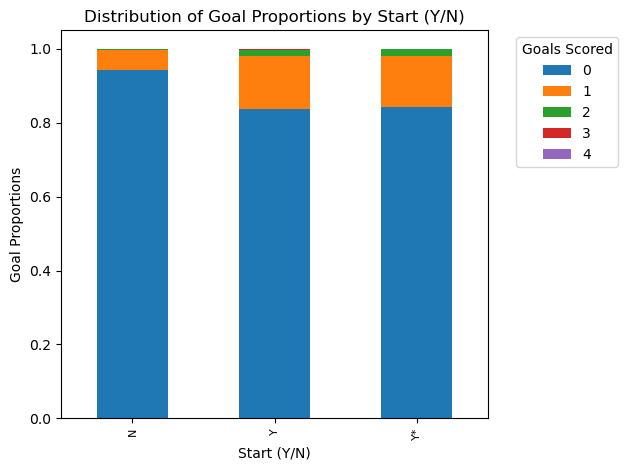

In [47]:
goalprop_by_start = goals_by_start.div(goals_by_start.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_start.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Start (Y/N)')
ax.set_xlabel('Start (Y/N)')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()

There are two key observations, the first is that the proportion observations with goals scored is higher when the player starts a game, compared to if they didn't start the game. This is as expected. The other observation is that it starting the game as the team captain does not necessarily have any effect on the proportion of goals scored. Therefore, we can probably combine the Y and Y* observations together, since being a captain is unlikely to have any effect on the player scoring a goal in a particular game. 

### 'Position' Feature Exploration

In [48]:
positions = att_explore['Position'].unique()
positions

array(['DM', 'LW', 'CM', 'LM', 'FW', 'DM,AM', 'AM', 'RM', 'CM,AM',
       'DM,CM', 'RW', 'FW,RW', 'AM,LW', 'RW,WB', 'RW,LW', 'CM,LM',
       'LM,FW', 'FW,AM', 'RM,CM', 'AM,DM', 'LW,RW', 'RB', 'LW,LM',
       'LM,CM', 'CM,DM', 'RW,RM,WB', 'RM,DM,CM', 'LM,LW', 'AM,CM',
       'WB,LM,CM', 'RM,RW', 'RM,LM,AM', 'RW,LM,CM', 'DM,RB', 'LW,DM',
       'LM,AM', 'CM,DM,AM', 'WB,FW', 'RB,DM,CM,RM', 'FW,LM', 'WB',
       'DM,CM,AM', 'LM,CM,DM', 'CM,RB', 'AM,FW', 'CB', 'DM,RM', 'RW,RM',
       'RM,LB', 'FW,RM', 'LB', 'FW,LW', 'CM,RM', 'AM,LB', 'DM,CB',
       'RW,AM', 'FW,CM', 'CM,RM,WB', 'RM,LM', 'CM,RM,LM', 'RW,FW',
       'LW,CM', 'LW,FW', 'AM,RM', 'FW,AM,LW', 'LW,WB', 'DM,LM',
       'LM,RM,LW', 'WB,AM', 'RB,CM', 'LM,DM', 'AM,RW', 'RM,AM', 'CM,FW',
       'LW,LB', 'LM,RM', 'FW,CM,AM', 'RB,RM', 'RM,FW', 'RW,LW,FW',
       'LW,CB', 'RM,LW', 'RM,LW,AM', 'RM,LM,CM', 'RW,LW,LM', 'LW,AM',
       'FW,RB', 'RB,RM,CM', 'RM,DM', 'CM,LW', 'CM,RW', 'AM,RW,LW',
       'WB,RW', 'LB,RW', 'LB,LW,RW', 'LM,DM,CM'

We can see that there are quite a few unique positions. This is down to the fact that certain observations may be recorded to have played multiple positions in one game. We want to first isolate how many unique positions there are. 

In [49]:
unique_positions = set()

for position in positions:
    for pos in position.split(','):
        unique_positions.add(pos.strip())
        
unique_positions = list(unique_positions)

print(unique_positions)

['RW', '0', 'LW', 'AM', 'RM', 'LB', 'FW', 'CB', 'CM', 'RB', 'WB', 'DM', 'LM']


So we have 12 unique positions, and '0' for some reason. Let's first investigate the observations that have '0' in their position. 

In [50]:
att_explore[att_explore['Position'].str.contains('0', na = False)]

Player ID  Day  Matchweek Venue Result             Team  \
7668         117  Sat         28  Home  L 2–4           Wolves   
17110        230  Tue          1  Home  L 0–1          Burnley   
3733          58  Tue          1  Home  L 0–1          Burnley   
26879        364  Wed          1  Home  W 2–0  Manchester City   

             Opponent Start Position  Minutes Played  ...  saves  selected  \
7668     Leeds United     N        0               0  ...      0     16256   
17110  Manchester Utd     N        0              11  ...      0     45067   
3733   Manchester Utd     N        0               3  ...      0     18618   
26879     Aston Villa     N        0              19  ...      0    272796   

       threat  total_points  transfers_balance  transfers_in  transfers_out  \
7668      0.0            -3                -92           423            515   
17110    28.0             1               -428          2482           2910   
3733      2.0             1              -1092           120           1212   
26879     6.0             1             -29133         14713          43846   

       value     Season  Opponent Position  
7668      48  2022-2023                 19  
17110     48  2020-2021                  2  
3733      58  2020-2021                  2  
26879     81  2020-2021                 11  

[4 rows x 110 columns]

From looking at these games individually, we can manually fill in the positions played by these players. 

* 7668 - Player Sent Off on Bench 
* 17110 - FW
* 3733 - FW
* 26879 - RW

So we will remove observation 7668, since this player did not play

In [51]:
att_explore = att_explore.drop(index = 7668)

In [52]:
att_explore.loc[17110, 'Position'] = 'FW'
att_explore.loc[3733, 'Position'] = 'FW'
att_explore.loc[26879, 'Position'] = 'RW'

We can now confirm that there are no longer any observations that have '0' entry in Positions 

In [53]:
att_explore[att_explore['Position'].str.contains('0', na = False)]

Empty DataFrame
Columns: [Player ID, Day, Matchweek, Venue, Result, Team, Opponent, Start, Position, Minutes Played, Goals, Assists, Penalties Scored, Penalties Attempted, Shots, Shots on Target, Yellow Cards, Red Cards, Touches, Tackles, Interceptions, Blocks, xG, npxG, xAG, Shot Creating Actions, Goal Creating Actions, Passes Completed, Passes Attempted, Progressive Passes, Carries, Progressive Carries, Take-ons Attempted, Successful Take-ons, Passing Distance, Progressive Passing Distance, Short Passes Completed, Short Passes Attempted, Medium Passes Completed, Medium Passes Attempted, Long Passes Completed, Long Passes Attempted, Expected Assists, Key Passes, Passes into Final Third, Passes into Penalty Area, Crosses into Penalty Area, Live Pass, Dead Pass, Free Kick Pass, Through Balls, Switches, Crosses, Throw Ins Taken, Corners Taken, Passes Offside, Live SCA, Deadball SCA, Take-on SCA, Shot SCA, Foul SCA, Defense SCA, Live GCA, Deadball GCA, Take-on GCA, Shot GCA, Foul GCA, Defense GCA, Tackles Won, Defensive Third Tackles, Middle Third Tackles, Attacking Third Tackles, Dribblers Tackled, Dribblers Tackled Attempts, Challenges Lost, Shots Blocked, Passes Blocked, Clearances, Defensive Errors, Defensive Penalty Area Touches, Defensive Third Touches, Middle Third Touches, Attacking Third Touches, Penalty Area Touches, Carry Distance, Progressive Carry Distance, Final Third Carries, Carries into Penalty Area, Miscontrols, Dispossessed, Passes Received, Progressive Passes Received, bonus, bps, clean_sheets, creativity, ict_index, influence, kickoff_time, own_goals, ...]
Index: []

[0 rows x 110 columns]

One issue with the data is that we don't know how many minutes of a game were played in each position, for a player that has been listed as playing multiple positions in a game. For example, if a player is played in the FW position for 85 minutes of the game, before tactical adjustments mean that they play in the LB position for the remainder of the game, the data might be skewed to show that LB's have better attacking potential than what it may be in reality. Unfortunately, there isn't any data that allows us to input the 'primary' position of a player in a particular game. Therefore, the best way to proceed at this stage is to first one-hot encode the position column. 

In [54]:
positions = att_explore['Position']

positions_df = pd.DataFrame(positions, columns = ['Position'])

positions_encode = positions_df['Position'].str.get_dummies(sep = ',')

In [55]:
print(positions_encode)

       AM  CB  CM  DM  FW  LB  LM  LW  RB  RM  RW  WB
10000   0   0   0   1   0   0   0   0   0   0   0   0
24977   0   0   0   0   0   0   0   1   0   0   0   0
37756   0   0   1   0   0   0   0   0   0   0   0   0
18759   0   0   0   0   0   0   1   0   0   0   0   0
168     0   0   0   0   0   0   1   0   0   0   0   0
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
31381   0   0   1   1   0   0   1   0   0   0   0   0
5199    0   0   0   0   0   0   0   1   0   0   0   0
8243    0   1   0   0   0   0   0   0   0   0   0   0
8823    0   0   0   0   0   0   0   0   0   0   1   0
25620   0   0   0   0   0   0   0   0   0   0   1   1

[31737 rows x 12 columns]


It appears that the encoding worked, just to double check, we want to make sure that there is a 1 in every single observation. 

In [56]:
positions_encode.any(axis = 1).sum()

31737

Now that we are sure that the encoding was successful, we want to append these columns back into the att_explore dataframe, as well as remove the 'Position' dataframe 

In [57]:
att_explore = pd.concat([att_explore, positions_encode], axis = 1)
att_explore.head()

Player ID  Day  Matchweek Venue Result             Team  \
10000        140  Sun         32  Away  L 1–2   Crystal Palace   
24977        340  Sat         29  Away  L 1–2      Bournemouth   
37756        498  Sun         37  Away  D 0–0     Huddersfield   
18759        262  Sun         34  Away  D 2–2      Southampton   
168            3  Sun         38  Home  W 5–0  Manchester City   

              Opponent Start Position  Minutes Played  ...  CM  DM  FW  LB  \
10000   Leicester City     Y       DM              90  ...   0   1   0   0   
24977        Liverpool     N       LW              23  ...   0   0   0   0   
37756  Manchester City     Y       CM              90  ...   1   0   0   0   
18759         Brighton     N       LM              25  ...   0   0   0   0   
168       Norwich City    Y*       LM              84  ...   0   0   0   0   

       LM  LW  RB  RM  RW  WB  
10000   0   0   0   0   0   0  
24977   0   1   0   0   0   0  
37756   0   0   0   0   0   0  
18759   1   0   0   0   0   0  
168     1   0   0   0   0   0  

[5 rows x 122 columns]

Let's now have a look to see the frequency of each of the position encoded columns

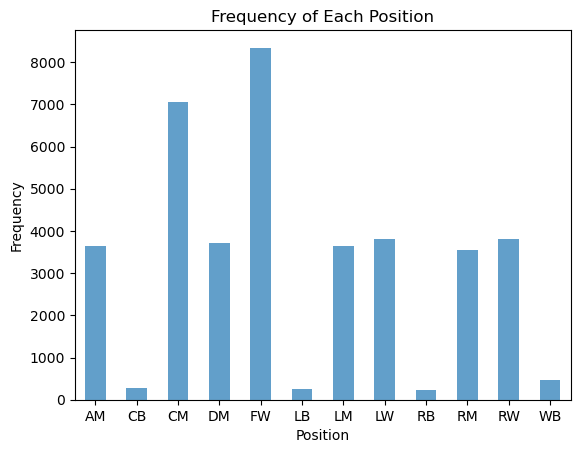

In [58]:
#these are the columns in att_explore that represent the positions that a given observation played in that game 
position_col = ['AM', 'CB', 'CM', 'DM', 'FW', 'LB', 'LM', 'LW', 'RB', 'RM', 'RW', 'WB']

position_count = att_explore[position_col].sum()

fig, ax = plt.subplots()

position_count.plot(kind = 'bar', alpha = 0.7)

ax.set_xlabel('Position')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Each Position')
plt.xticks(rotation = 0)
plt.show()

Initial observations are there are very few players with positions listed as CB, LB, RB or WB. This makes a lot of sense, because we are currently only working with the attackers data. It wouldn't make much sense if there were comparable amounts of observations with these positions listed, compared to actual attacking positions such as FW. In contrast, the most frequent position was FW, which also makes sense. Let's now take a look at how the proportion of goals scored differs across each position. 

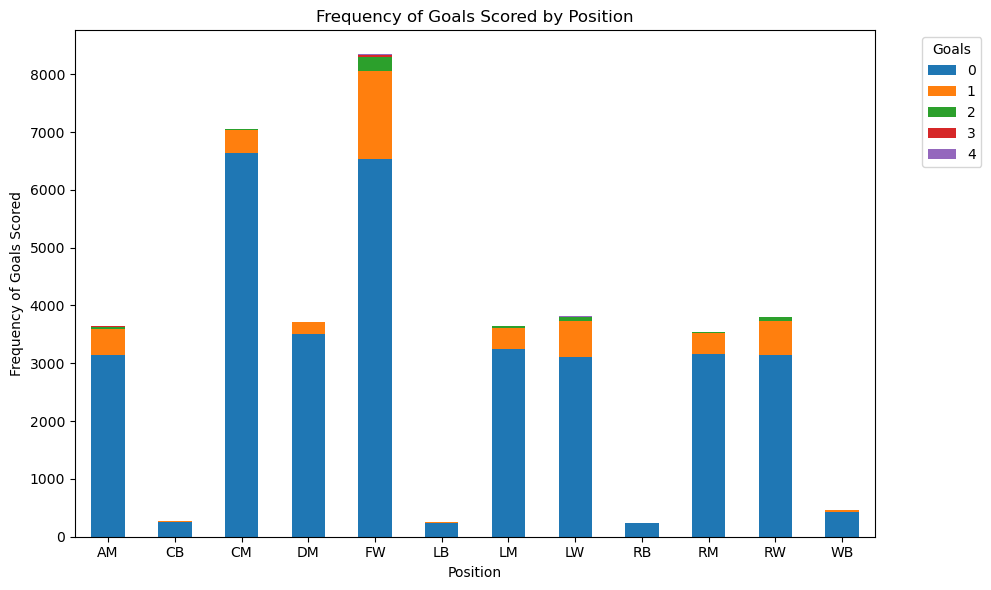

In [59]:
# Initialize a dictionary to store frequency of goal counts by position
goal_counts_by_position = {position: {} for position in position_col}  # Exclude 'Goals'

# Loop through each position column
for position in position_col:  # Exclude the 'Goals' column
    # Get the goals for rows where the position column is 1
    goals = att_explore[att_explore[position] == 1]['Goals']
    
    # Count the frequency of each goal value
    goal_counts = goals.value_counts()
    
    # Store the counts in the dictionary
    goal_counts_by_position[position] = goal_counts

# Create a DataFrame for plotting
goal_counts_bypos_df = pd.DataFrame(goal_counts_by_position).fillna(0)

# Transpose the DataFrame for easier plotting
goal_counts_bypos_df = goal_counts_bypos_df.T

# Plotting
goal_counts_bypos_df.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding labels and title
plt.xlabel('Position')
plt.ylabel('Frequency of Goals Scored')
plt.title('Frequency of Goals Scored by Position')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title='Goals', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()

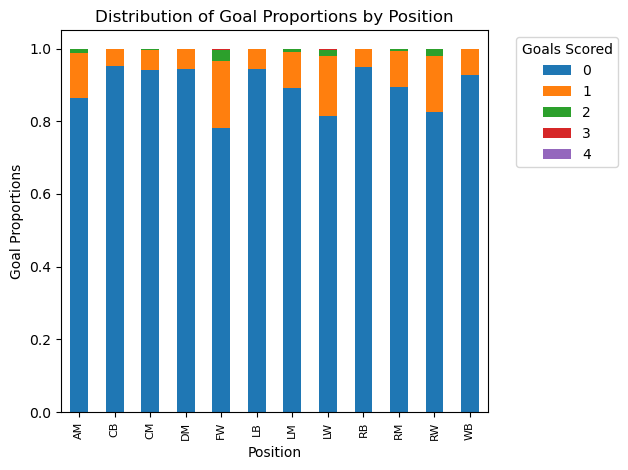

In [60]:
goalprop_by_position = goal_counts_bypos_df.div(goal_counts_bypos_df.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_position.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Position')
ax.set_xlabel('Position')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()

It is interesting that the proportion of goals scored seems to be quite even for CB, CM, DM, LB, RB and WB. Although it was expected that the proportion of goals scored when the listed position is CB, LB, RB and WB should be low, it was unexpected that the proportion of goals is also so low for both DM's and CM's. It is also not unexpected to see that the proportion of goals scored is highest for FW, followed by RW/LW, then AM, then RM/LM. We can now try to group certain positions together to see whether similar behaviours are exhibited. 

* RB, LB, CB, WB - Defenders
* DM, CM - Midfielders
* LM, RM - Wide Midfielders 
* AM - Attacking Midfielders
* LW, RW - Wide Forwards 

In [61]:
att_explore['Defenders'] = att_explore[['RB', 'LB', 'CB', 'WB']].any(axis = 1).astype(int)
print(att_explore['Defenders'])

10000    0
24977    0
37756    0
18759    0
168      0
        ..
31381    0
5199     0
8243     1
8823     0
25620    1
Name: Defenders, Length: 31737, dtype: int64


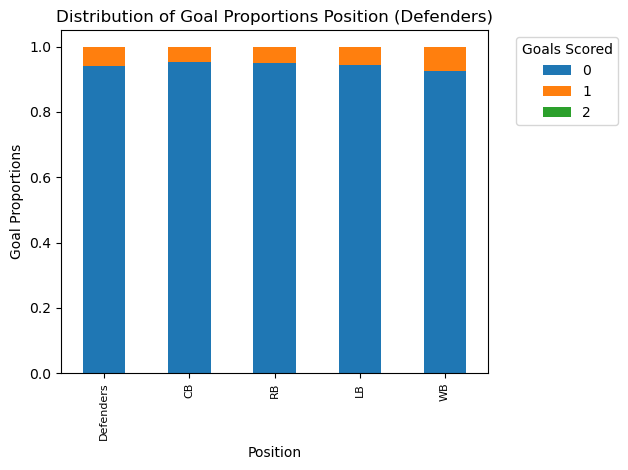

In [62]:
position_def = ['Defenders', 'CB', 'RB', 'LB', 'WB']

# Initialize a dictionary to store frequency of goal counts by position
goal_counts_def = {position: {} for position in position_def}  # Exclude 'Goals'

# Loop through each position column
for position in position_def:  # Exclude the 'Goals' column
    # Get the goals for rows where the position column is 1
    goals = att_explore[att_explore[position] == 1]['Goals']
    
    # Count the frequency of each goal value
    goal_counts = goals.value_counts()
    
    # Store the counts in the dictionary
    goal_counts_def[position] = goal_counts

# Create a DataFrame for plotting
goal_counts_def_df = pd.DataFrame(goal_counts_def).fillna(0)

# Transpose the DataFrame for easier plotting
goal_counts_def_df = goal_counts_def_df.T

goalprop_def = goal_counts_def_df.div(goal_counts_def_df.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_def.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions Position (Defenders)')
ax.set_xlabel('Position')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()

Based on the plot above, it appears that having WB as a position makes it more likely that a goal is scored, compared to playing as a CB/LB/RB. We can try to instead include only CB, RB and LB into the 'Defenders' category. Based on contextual information, this does make a bit more sense. WB's are typically used in 3 at the back formations, where they function as defenders out of possession, but are almost wingers in possession as they get high and wide on the pitch to provide the width. This is in comparison to typical CB/RB/LB's who are defenders both in and out of possession, and will rarely venture forward in the attack. 

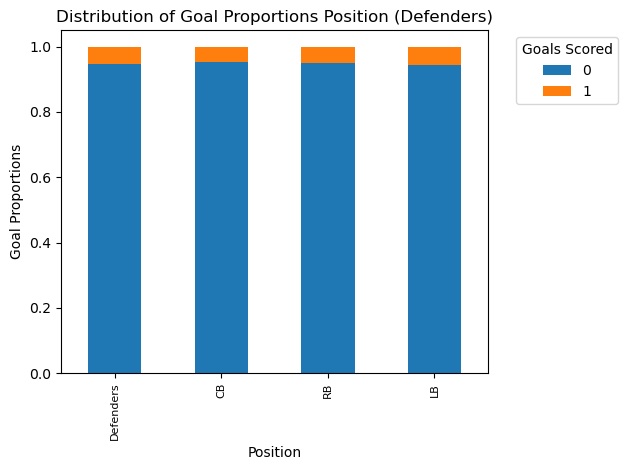

In [63]:
#we modify the 'Defenders' column to only include 'RB', 'LB' and 'CB'
att_explore['Defenders'] = att_explore[['RB', 'LB', 'CB']].any(axis = 1).astype(int)

position_def = ['Defenders', 'CB', 'RB', 'LB']

# Initialize a dictionary to store frequency of goal counts by position
goal_counts_def = {position: {} for position in position_def}  # Exclude 'Goals'

# Loop through each position column
for position in position_def:  # Exclude the 'Goals' column
    # Get the goals for rows where the position column is 1
    goals = att_explore[att_explore[position] == 1]['Goals']
    
    # Count the frequency of each goal value
    goal_counts = goals.value_counts()
    
    # Store the counts in the dictionary
    goal_counts_def[position] = goal_counts

# Create a DataFrame for plotting
goal_counts_def_df = pd.DataFrame(goal_counts_def).fillna(0)

# Transpose the DataFrame for easier plotting
goal_counts_def_df = goal_counts_def_df.T

goalprop_def = goal_counts_def_df.div(goal_counts_def_df.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_def.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions Position (Defenders)')
ax.set_xlabel('Position')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()

We can see this time that the proportion of goals scored by Defenders (either CB, LB or RB) is closer to the proportion of goals scored when looking at the specific defensive positions. We can now move on to looking at midfielders. 

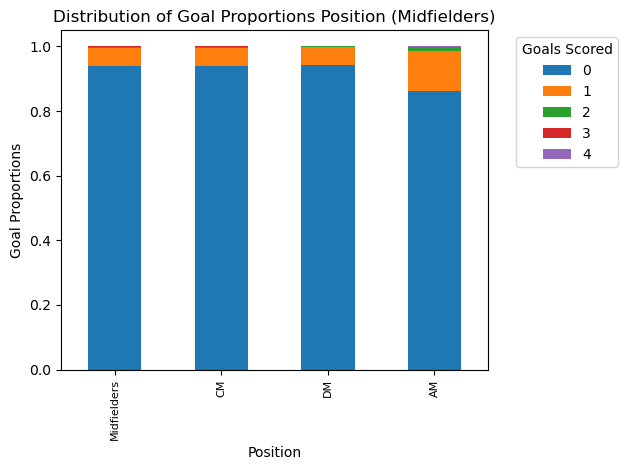

In [64]:
#we group CM and DM into one category called 'Midfielders'
att_explore['Midfielders'] = att_explore[['CM', 'DM']].any(axis = 1).astype(int)

position_mid = ['Midfielders', 'CM', 'DM', 'AM']

# Initialize a dictionary to store frequency of goal counts by position
goal_counts_mid = {position: {} for position in position_mid}  # Exclude 'Goals'

# Loop through each position column
for position in position_mid:  # Exclude the 'Goals' column
    # Get the goals for rows where the position column is 1
    goals = att_explore[att_explore[position] == 1]['Goals']
    
    # Count the frequency of each goal value
    goal_counts = goals.value_counts()
    
    # Store the counts in the dictionary
    goal_counts_mid[position] = goal_counts

# Create a DataFrame for plotting
goal_counts_mid_df = pd.DataFrame(goal_counts_mid).fillna(0)

# Transpose the DataFrame for easier plotting
goal_counts_mid_df = goal_counts_mid_df.T

goalprop_mid = goal_counts_mid_df.div(goal_counts_mid_df.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_mid.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions Position (Midfielders)')
ax.set_xlabel('Position')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()

As expected, the proportion of goals scored in the Midfielders category is similar to the proportion when looking at CM and DM positions individually. Therefore, it makes sense to combine these two categories. We can also see that attacking midfielders AM seem to score a lot more goals than either CM's or DM's, so it wouldn't make sense to include AM's into the Midfielders category. We now move onto Wide Midfielders.

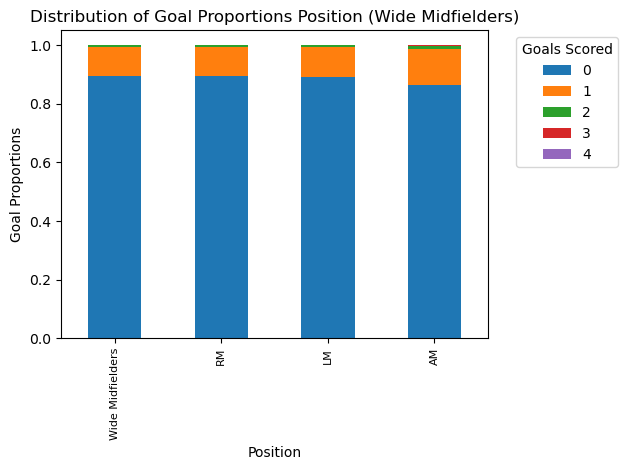

In [65]:
#we group CM and DM into one category called ' Wide Midfielders'
att_explore['Wide Midfielders'] = att_explore[['RM', 'LM']].any(axis = 1).astype(int)

position_wm = ['Wide Midfielders', 'RM', 'LM', 'AM']

# Initialize a dictionary to store frequency of goal counts by position
goal_counts_wm = {position: {} for position in position_wm}  # Exclude 'Goals'

# Loop through each position column
for position in position_wm:  # Exclude the 'Goals' column
    # Get the goals for rows where the position column is 1
    goals = att_explore[att_explore[position] == 1]['Goals']
    
    # Count the frequency of each goal value
    goal_counts = goals.value_counts()
    
    # Store the counts in the dictionary
    goal_counts_wm[position] = goal_counts

# Create a DataFrame for plotting
goal_counts_wm_df = pd.DataFrame(goal_counts_wm).fillna(0)

# Transpose the DataFrame for easier plotting
goal_counts_wm_df = goal_counts_wm_df.T

goalprop_wm = goal_counts_wm_df.div(goal_counts_wm_df.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_wm.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions Position (Wide Midfielders)')
ax.set_xlabel('Position')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()

Again, similar result where the plot shows that combining these two categories appears to make sense. We can also see that attacking midfielders seem to score more goals than wide midfielders, so it wouldn't make sense to include AM into this category. Finally, we will do the wingers/wide forwards. 

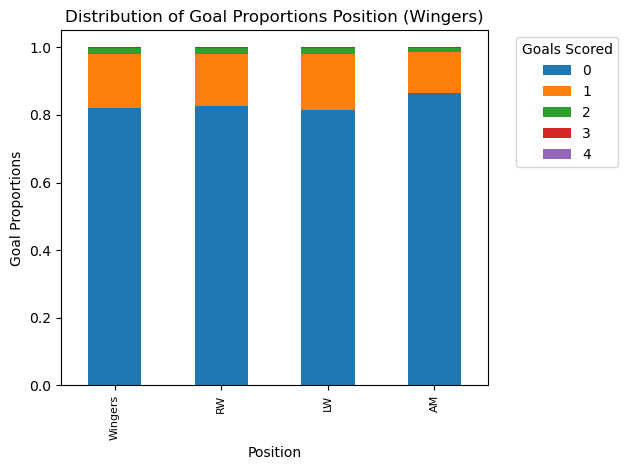

In [66]:
#we group CM and DM into one category called 'Midfielders'
att_explore['Wingers'] = att_explore[['RW', 'LW']].any(axis = 1).astype(int)

position_wingers = ['Wingers', 'RW', 'LW', 'AM']

# Initialize a dictionary to store frequency of goal counts by position
goal_counts_wingers = {position: {} for position in position_wingers}  # Exclude 'Goals'

# Loop through each position column
for position in position_wingers:  # Exclude the 'Goals' column
    # Get the goals for rows where the position column is 1
    goals = att_explore[att_explore[position] == 1]['Goals']
    
    # Count the frequency of each goal value
    goal_counts = goals.value_counts()
    
    # Store the counts in the dictionary
    goal_counts_wingers[position] = goal_counts

# Create a DataFrame for plotting
goal_counts_wingers_df = pd.DataFrame(goal_counts_wingers).fillna(0)

# Transpose the DataFrame for easier plotting
goal_counts_wingers_df = goal_counts_wingers_df.T

goalprop_wingers = goal_counts_wingers_df.div(goal_counts_wingers_df.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_wingers.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions Position (Wingers)')
ax.set_xlabel('Position')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()

We can see that the proportion of goals scored when looking at RW and LW individually is very simila to the proportion of goals scored when combining these observations under one category 'Wingers'. Therefore, it makes sense to combine LW and RW together. We can also see that AM's seem to score less goals than wingers, so it wouldn't make sense to include it into the Wingers category. Overall, the AM category should be a standalone category. 

Let's now plot the combined categories together

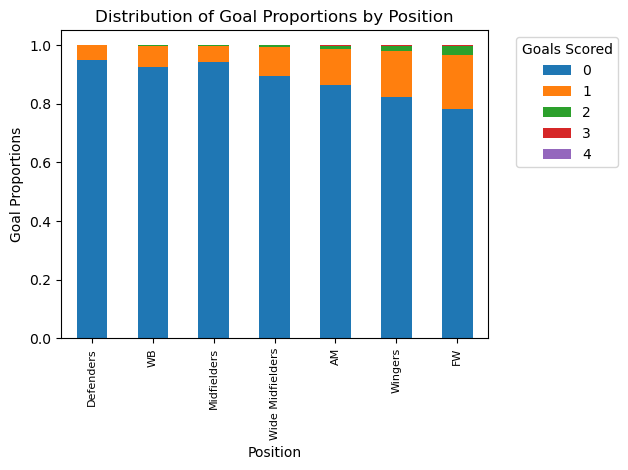

In [67]:
position_final = ['Defenders', 'WB', 'Midfielders', 'Wide Midfielders', 'AM', 'Wingers', 'FW']

# Initialize a dictionary to store frequency of goal counts by position
goal_counts_finalpos = {position: {} for position in position_final}  # Exclude 'Goals'

# Loop through each position column
for position in position_final:  # Exclude the 'Goals' column
    # Get the goals for rows where the position column is 1
    goals = att_explore[att_explore[position] == 1]['Goals']
    
    # Count the frequency of each goal value
    goal_counts = goals.value_counts()
    
    # Store the counts in the dictionary
    goal_counts_finalpos[position] = goal_counts

# Create a DataFrame for plotting
goal_counts_finalpos_df = pd.DataFrame(goal_counts_finalpos).fillna(0)

# Transpose the DataFrame for easier plotting
goal_counts_finalpos_df = goal_counts_finalpos_df.T

goalprop_finalpos = goal_counts_finalpos_df.div(goal_counts_finalpos_df.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_finalpos.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Position')
ax.set_xlabel('Position')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()

Based on the summarised positions, we can clearly see that the proportion of goals scored is lowest for Defenders, followed closely by Midfielders. Perhaps surprisingly, the proportion of goals scored by WB's is higher than Midfielders, which is then followed by Wide Midfielders. As Wingers and Forwards play furthest up the pitch, it makes sense that the proportion of goals scored is highest for these two positions. To summarise, the hypothesised method of combining positions makes sense, based on the exploratory analysis. 

### 'Minutes Played' Feature Exploration

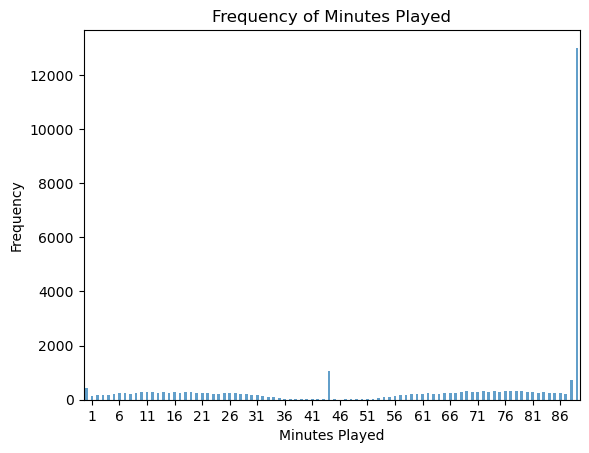

In [68]:
mins_count = att_explore['Minutes Played'].value_counts().sort_index()

fig, ax = plt.subplots()

mins_count.plot(kind = 'bar', alpha = 0.7)

ax.set_xlabel('Minutes Played')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Minutes Played')
#set_xticks is used to only have certain values on the x axis. without this on, every x axis value was printed, which meant that the x axis values overlapped, affecting readability 
ax.set_xticks(range(1, 90, 5))
ax.set_xticklabels(range(1, 90, 5))

plt.xticks(rotation = 0)
plt.show()

What we can see is that majority of the observations in the data set played the full 90 minutes of the game. It may be a little difficult to see the behaviour of the other 'Minutes Played' due to how long the bar for 'Minutes Played' = 90 is. We can exclude this bar from the plot to better visualise the frequency of 'Minutes Played'. 

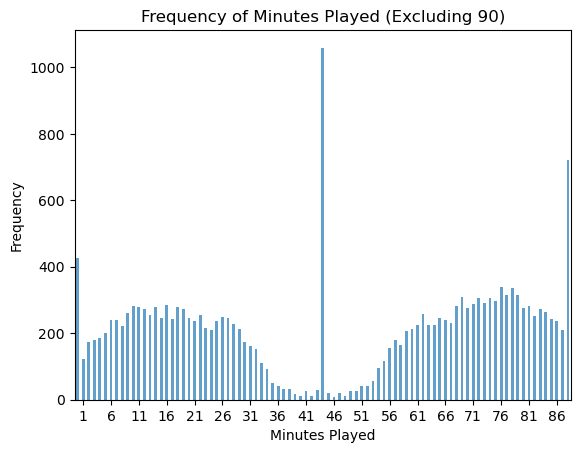

In [69]:
mins_count = mins_count.iloc[:-1]
fig, ax = plt.subplots()

mins_count.plot(kind = 'bar', alpha = 0.7)

ax.set_xlabel('Minutes Played')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Minutes Played (Excluding 90)')
#set_xticks is used to only have certain values on the x axis. without this on, every x axis value was printed, which meant that the x axis values overlapped, affecting readability 
ax.set_xticks(range(1, 89, 5))
ax.set_xticklabels(range(1, 89, 5))

plt.xticks(rotation = 0)
plt.show()

What we can see is some sort of symmetry between the left hand side of the plot and the right hand side of the plot. The most frequent minutes played excluding 90 minutes is 44/45 minutes, which refers to the observations that either played the first half and got subbed, or got subbed on the play the second half. The symmetry has to do with the fact that for each player being subbed off, there is another being subbed on. For example, if a observation played 70 minutes and got subbed off, then another observation would be subbed on to play 20 minutes. Based on this, we can see that the most frequent substitutions are approximately between the 68 to 78 minute mark. Subsitutions are quite rare between 46 and 56. Based on this, we can perhaps classify 'Minutes Played' as either:

1. 90 Minutes - Full Match Played
2. 46-89 Minutes - Substituted Off
3. 1-44 Minutes - Substituted On

However prior to this, we should first plot the raw 'Minutes Played' data against 'Goals Scored' to visualise the relationship. Since 'Minutes Played' is essentially a continuous variable (it isn't actually, but we can treat it as such), it wouldn't be wise to visualise the relationship between this feature and the target variable in the same way that we have done for the previous features. Instead, we can start by constructing a box plot. This should allow us to identify the distribution of Minutes Played for each category of Goals. 

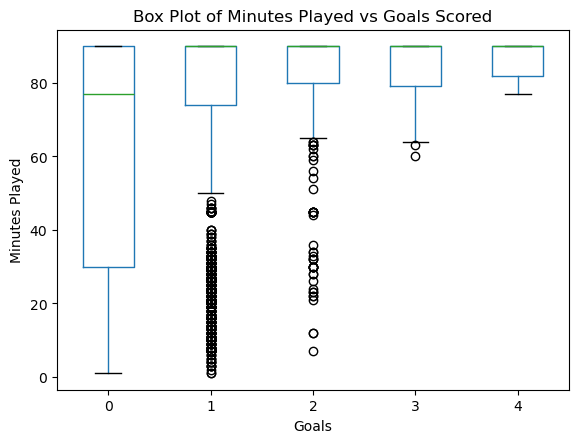

In [70]:
plt.figure
att_explore.boxplot(column = 'Minutes Played', by = 'Goals', grid = False)
plt.title('Box Plot of Minutes Played vs Goals Scored')
plt.suptitle('')
plt.xlabel('Goals')
plt.ylabel('Minutes Played')
plt.show()

What we can immediately identify is that the median minutes played is 90 (i.e. the player both started and finished the game) for all observations that contained at least 1 goal scored. We can also see that although the lower extreme for 1 goal scored is at approximately 50 minutes, there are quite a few observations where the minutes played is less than 50, but the player still managed to score a goal. A similar phenomenon can be seen for observations where 2 goals were scored, albeit less frequently. What may be useful is to separate the observations that played 90 minutes, and those that didn't. In other words, we can have a look at whether or not the behaviour of goals scored differs for players that played the whole game, and players that were either substituted on or off during the game. 

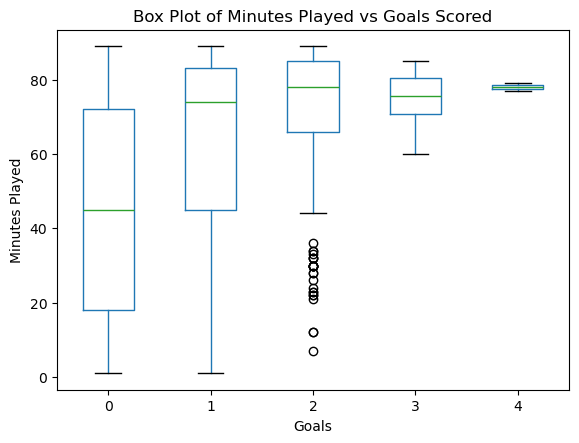

In [71]:
#new dataframe that excludes all observations where 'Minutes Played' == 90
subs_df = att_explore[att_explore['Minutes Played'] != 90]
subs_df = subs_df[['Minutes Played', 'Goals', 'Start']]

plt.figure
subs_df.boxplot(column = 'Minutes Played', by = 'Goals', grid = False)
plt.title('Box Plot of Minutes Played vs Goals Scored')
plt.suptitle('')
plt.xlabel('Goals')
plt.ylabel('Minutes Played')
plt.show()

This plot makes it clear that of the players that did not play 90 minutes, the ones who scored at least one goal generally played more than 70 minutes. Although there are still some outliers, particularly in the observations that scored 2 goals, there appears to be sufficient justification that more minutes leads to a greater probability of scoring a goal. 

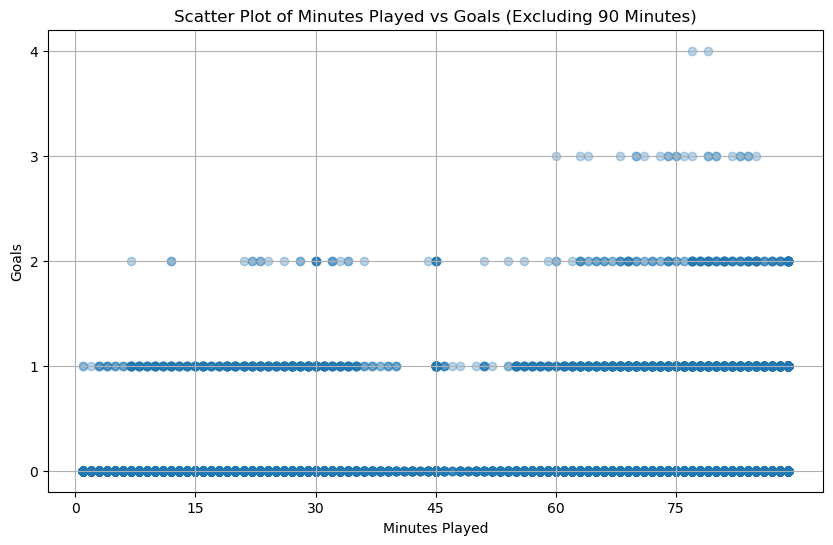

In [72]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(subs_df['Minutes Played'], subs_df['Goals'], alpha=0.3)
plt.title('Scatter Plot of Minutes Played vs Goals (Excluding 90 Minutes)')
plt.xlabel('Minutes Played')
plt.ylabel('Goals')
plt.xticks(range(0, 90, 15))  # Adjust x-ticks as necessary
plt.yticks(range(0, 5))  # Goals range from 0 to 4
plt.grid()
plt.show()

This scatter plot is interesting for a few reasons. Firstly, we can see that there is quite an even distribution of observations that did not score any goals in terms of minutes played. However for the observations that scored 1 goal, there appears to be quite a bit more observations that played less than 45 minutes (i.e. they were subbed on) than perhaps expected. We can see this even more clearly if we reproduce the same plot, but change the colour of the observations that did not start the game (if they did not start but still played, this means that they were subbed on). 

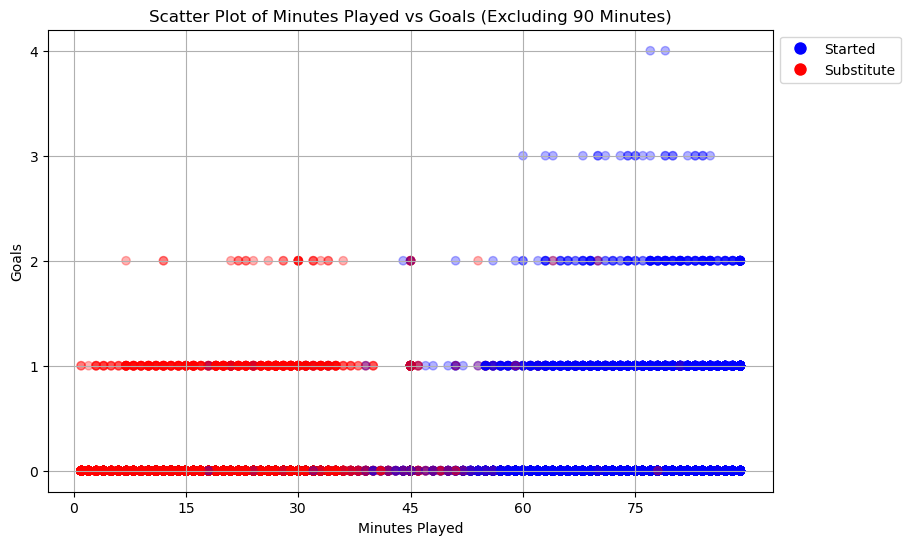

In [73]:
# Scatter plot - Colour coded based on 'Start'

subs_col = subs_df['Start'].map({'Y': 'blue', 'Y*': 'blue', 'N': 'red'})

plt.figure(figsize=(10, 6))
plt.scatter(subs_df['Minutes Played'], subs_df['Goals'], alpha=0.3, c = subs_col)
plt.title('Scatter Plot of Minutes Played vs Goals (Excluding 90 Minutes)')
plt.xlabel('Minutes Played')
plt.ylabel('Goals')
plt.xticks(range(0, 90, 15))  # Adjust x-ticks as necessary
plt.yticks(range(0, 5))  # Goals range from 0 to 4
plt.grid()

# Create custom legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Started', 
                            markerfacecolor='blue', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Substitute', 
                            markerfacecolor='red', markersize=10)]
plt.legend(handles=legend_elements, loc='upper left', bbox_to_anchor = (1,1))
plt.subplots_adjust(right = 0.85)
plt.show()

This plot makes clear that it is much more likely that a given observation scores 2 or more goals if they started the game compared to if they were subbed on. This information was perhaps already made obvious when looking at the relationship between the 'Starts' feature and 'Goals'. However, it is interesting that there appears to be quite an even spread of observations which scored one goal, in terms of whether or not they started the game or not, as well as the number of minutes they played. We can make another plot to further investigate this. 

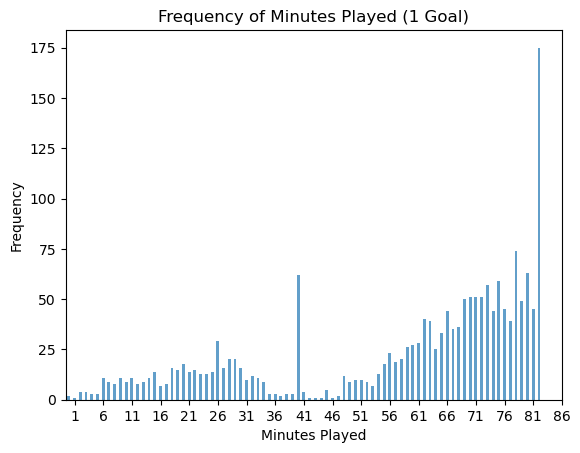

In [74]:
#we are further reducing the dataframe to only include observations that scored one goal
subs_df = subs_df[subs_df['Goals'] == 1]

mins_count_1goal = subs_df['Minutes Played'].value_counts().sort_index()

fig, ax = plt.subplots()

mins_count_1goal.plot(kind = 'bar', alpha = 0.7)

ax.set_xlabel('Minutes Played')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Minutes Played (1 Goal)')
#set_xticks is used to only have certain values on the x axis. without this on, every x axis value was printed, which meant that the x axis values overlapped, affecting readability 
ax.set_xticks(range(1, 90, 5))
ax.set_xticklabels(range(1, 90, 5))

plt.xticks(rotation = 0)
plt.show()

This plot does make it more clear that it is more likely for players that scored 1 goal to play more than 45 minutes, compared to the likelihood that they played less than 45 minutes. This was not particularly noticeable when looking at the scatter plot, which is why the bar plot was used to further investigate. In general, there is some uncertainty regarding whether or not the 'Minutes Played' feature and the 'Starts' feature are actually communicating the same information. 

### Assists Feature Exploration

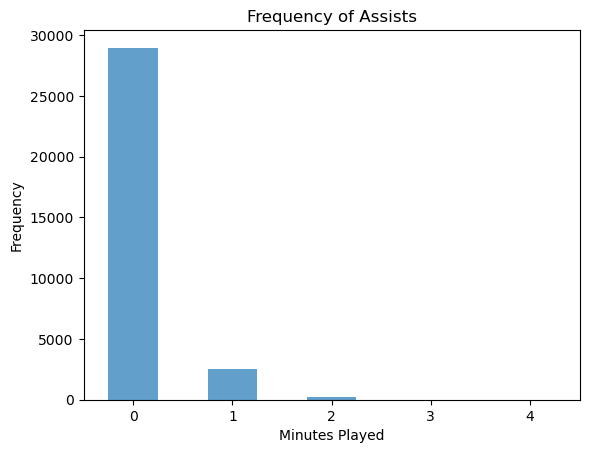

In [75]:
assists_count = att_explore['Assists'].value_counts().sort_index()

fig, ax = plt.subplots()

assists_count.plot(kind = 'bar', alpha = 0.7)

ax.set_xlabel('Minutes Played')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Assists')

plt.xticks(rotation = 0)
plt.show()

Majority of the observations have no assists. The next most frequent is 1 assist, followed by two assists. We now have a look at the relationship between 'Assists' and 'Goals'. 

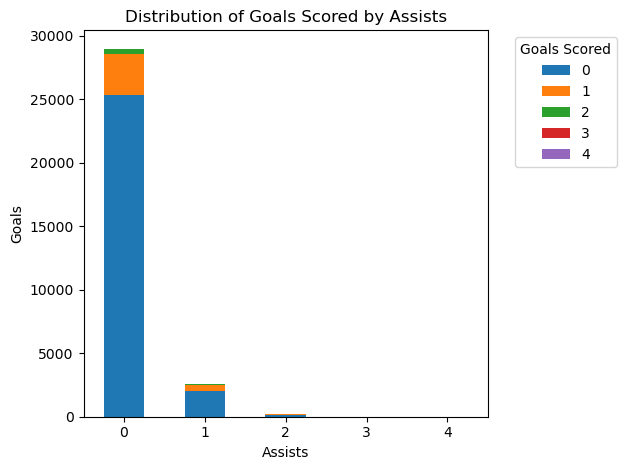

In [76]:
goals_by_assists = att_explore.groupby(['Assists', 'Goals']).size().unstack(fill_value = 0)

fig, ax = plt.subplots()

goals_by_assists.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goals Scored by Assists')
ax.set_xlabel('Assists')

ax.set_ylabel('Goals')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

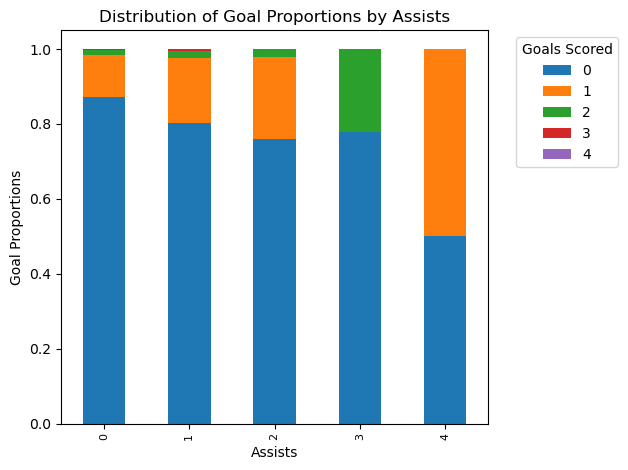

In [77]:
goalprop_by_assists = goals_by_assists.div(goals_by_assists.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_assists.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Assists')
ax.set_xlabel('Assists')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()

First off, it is almost remarkable that 50% of observations with 4 assists have also scored in the same game. This is most likely due to there being very few observations with 4 assists. We can show this below. There are only two observations in the entire dataset that have 4 assists. One of those observations also recorded a goal in the same game, thus leading to what could be seen in the plot above. What is perhaps even more remarkable is that this observation was recorded as playing in a WB position!

In [78]:
att_explore[att_explore['Assists'] == 4]

Player ID  Day  Matchweek Venue Result             Team      Opponent  \
31293        419  Sat          1  Home  W 5–1   Manchester Utd  Leeds United   
23586        325  Sat         11  Home  W 6–1  Manchester City   Bournemouth   

      Start Position  Minutes Played  ...  LM  LW  RB  RM  RW  WB  Defenders  \
31293     Y       LW              74  ...   0   1   0   0   0   0          0   
23586     Y       WB              90  ...   0   0   0   0   0   1          0   

       Midfielders  Wide Midfielders  Wingers  
31293            0                 0        1  
23586            0                 0        0  

[2 rows x 126 columns]

Other than this, it can be seen that a larger number of assists corresponds to a greater proportion of goals being scored. The reason for this is unclear. Perhaps this has to do with the fact that attacking players are generally more likely to contribute both goals and assists? This was actually an unexpected discovery, as I would've previously hypothesised there to be no relationship between goals scored and assists. However, one major reason to be skeptical of these plots is the fact that there are very few observations that have either 2 or 3 assists. This can be seen below. 

In [79]:
att_explore[att_explore['Assists'] == 3]

Player ID  Day  Matchweek Venue Result             Team  \
6483         101  Sun         17  Home  W 3–0         West Ham   
5672          89  Sat         27  Home  W 5–1  Manchester City   
2391          35  Wed         31  Home  W 3–1  Manchester City   
14862        203  Sat         25  Home  W 4–0        Liverpool   
14759        203  Sat          4  Home  W 9–0        Liverpool   
7049         109  Sun         27  Away  W 3–0          Arsenal   
27903        373  Mon         36  Away  W 3–0        Liverpool   
9414         135  Sun          4  Home  W 7–2      Aston Villa   
5174          81  Wed         32  Away  W 4–1    Newcastle Utd   

             Opponent Start Position  Minutes Played  ...  LM  LW  RB  RM  RW  \
6483           Wolves     Y       LW              85  ...   0   1   0   0   0   
5672   Leicester City     Y       RM              90  ...   0   0   0   1   0   
2391         Brighton     Y       LW              90  ...   0   1   0   0   0   
14862     Southampton     Y       FW              90  ...   0   0   0   0   0   
14759     Bournemouth     Y       FW              68  ...   0   0   0   0   0   
7049           Fulham     Y       FW              76  ...   0   0   0   0   0   
27903  Leicester City     Y       RW              87  ...   0   0   0   0   1   
9414        Liverpool    Y*       LW              90  ...   0   1   0   0   0   
5174      Bournemouth     Y       RW              61  ...   0   0   0   0   1   

       WB  Defenders  Midfielders  Wide Midfielders  Wingers  
6483    0          0            0                 0        1  
5672    0          0            0                 1        0  
2391    0          0            0                 0        1  
14862   0          0            0                 0        0  
14759   0          0            0                 0        0  
7049    0          0            0                 0        0  
27903   0          0            0                 0        1  
9414    0          0            0                 0        1  
5174    0          0            0                 0        1  

[9 rows x 126 columns]

In [80]:
att_explore[att_explore['Assists'] == 2]

Player ID  Day  Matchweek Venue Result             Team  \
10369        145  Tue         15  Away  W 4–1  Manchester City   
22149        306  Sun          4  Home  W 3–2   Crystal Palace   
37343        493  Sat         33  Away  W 3–2   Manchester Utd   
13288        186  Sat         36  Away  W 4–1    Newcastle Utd   
37794        500  Sun          6  Home  W 2–0          Arsenal   
...          ...  ...        ...   ...    ...              ...   
31636        424  Sun         27  Home  W 4–1        Tottenham   
35553        469  Sun         37  Home  W 3–0        Tottenham   
1818          29  Sun         28  Home  W 5–0   Leicester City   
12637        177  Wed         33  Home  W 4–1  Manchester City   
28365        379  Tue         22  Home  W 9–0   Manchester Utd   

              Opponent Start Position  Minutes Played  ...  LM  LW  RB  RM  \
10369          Burnley     Y    RW,LW              90  ...   0   1   0   0   
22149           Wolves     N       FW              20  ...   0   0   0   0   
37343  Manchester City     Y       LW              81  ...   0   1   0   0   
13288          Burnley     Y       RM              68  ...   0   0   0   1   
37794          Everton     Y       AM              79  ...   0   0   0   0   
...                ...   ...      ...             ...  ...  ..  ..  ..  ..   
31636   Crystal Palace     Y       FW              79  ...   0   0   0   0   
35553   Leicester City     Y       RW              76  ...   0   0   0   0   
1818     Sheffield Utd     Y       FW              90  ...   0   0   0   0   
12637          Arsenal     Y       FW              90  ...   0   0   0   0   
28365      Southampton     Y       AM              90  ...   0   0   0   0   

       RW  WB  Defenders  Midfielders  Wide Midfielders  Wingers  
10369   1   0          0            0                 0        1  
22149   0   0          0            0                 0        0  
37343   0   0          0            0                 0        1  
13288   0   0          0            0                 1        0  
37794   0   0          0            0                 0        0  
...    ..  ..        ...          ...               ...      ...  
31636   0   0          0            0                 0        0  
35553   1   0          0            0                 0        1  
1818    0   0          0            0                 0        0  
12637   0   0          0            0                 0        0  
28365   0   0          0            0                 0        0  

[195 rows x 126 columns]

So there are 9 observations that have 3 assists in one game, and 195 observations that have 2 assists in one game. These are very small numbers when compared to the total number of observations, so we should take these insights with a degree of caution. 

### 'Penalties' Feature Exploration

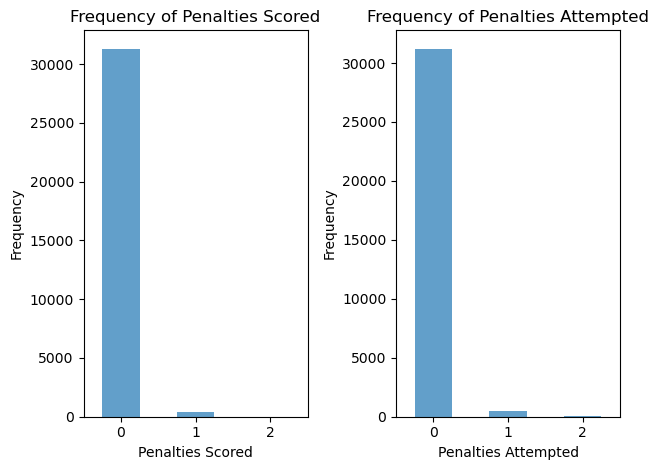

In [81]:
penscored_count = att_explore['Penalties Scored'].value_counts().sort_index()
penattempt_count = att_explore['Penalties Attempted'].value_counts().sort_index()

fig, axes = plt.subplots(1, 2)

penscored_count.plot(kind = 'bar', alpha = 0.7, ax = axes[0])
axes[0].set_xlabel('Penalties Scored')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Frequency of Penalties Scored')
axes[0].set_xticklabels(axes[0].get_xticks(), rotation = 0)

penattempt_count.plot(kind = 'bar', alpha = 0.7, ax = axes[1])
axes[1].set_xlabel('Penalties Attempted')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Frequency of Penalties Attempted')
axes[1].set_xticklabels(axes[1].get_xticks(), rotation = 0)

plt.tight_layout()
plt.show()

So majority of the observations have no penalties scored, there are very few with 1 penalty scored, and almost no observations with 2 penalties scored. This pattern is repeated for penalties attempted, although there appears to be more observations with 2 penalty attempts. Looking at the below, we can see that out of all observations, there were only 504 that had 1 penalty attempted and 22 with 2 penalties attempted. In other words, only 1.6% of the observations had any penalties attempted. 

In [82]:
att_explore['Penalties Attempted'].value_counts()

Penalties Attempted
0    31211
1      504
2       22
Name: count, dtype: int64

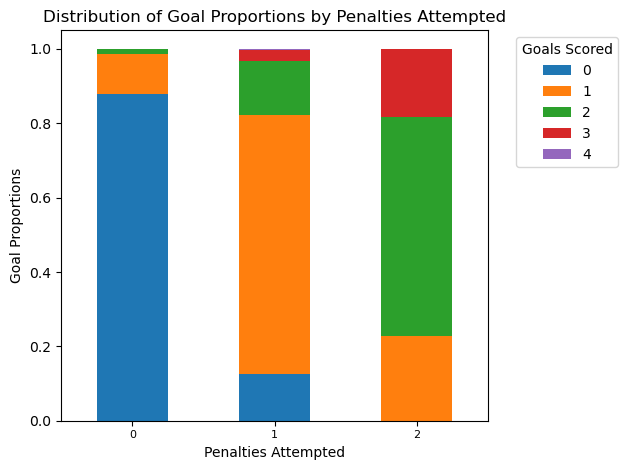

In [83]:
goals_by_penattempt = att_explore.groupby(['Penalties Attempted', 'Goals']).size().unstack(fill_value = 0)

goalprop_by_penattempt = goals_by_penattempt.div(goals_by_penattempt.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_penattempt.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Penalties Attempted')
ax.set_xlabel('Penalties Attempted')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 0, size = 8)
plt.tight_layout()
plt.show()

Just over 80% of the observations that have 1 penalty attempted recorded a goal. This makes sense since a penalty represents a really big chance to score goal. It is also interesting to note that all observations with 2 penalties attempted in one game recorded at minimum 1 goal. Based on this information, we can say that knowing that a penalty was attempted by a particular player in a particular game means they are very likely to have scored a goal. Next, we have a look at the proportion of 'Penalties Attempted' that actually resulted in a 'Penalty Scored'. 

In [84]:
def penprop (row):
    if row['Penalties Attempted'] == 0:
        return np.nan
    return row['Penalties Scored']/row['Penalties Attempted']

att_explore['Penalty Success Rate'] = att_explore.apply(penprop, axis = 1)
att_explore['Penalty Success Rate']

10000   NaN
24977   NaN
37756   NaN
18759   NaN
168     NaN
         ..
31381   NaN
5199    NaN
8243    NaN
8823    NaN
25620   NaN
Name: Penalty Success Rate, Length: 31737, dtype: float64

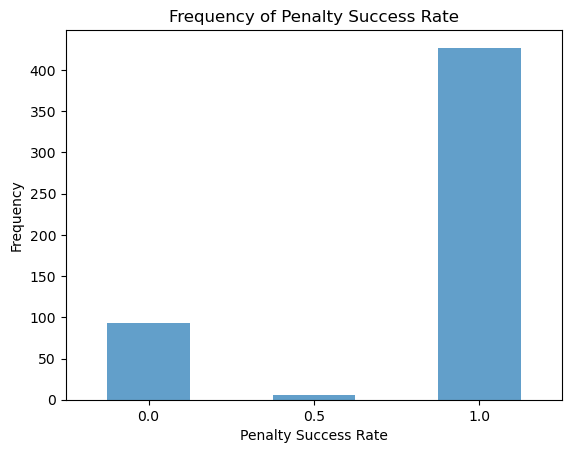

Penalty Success Rate
0.0     93
0.5      6
1.0    427
Name: count, dtype: int64

In [85]:
pensuccess_count = att_explore['Penalty Success Rate'].value_counts().sort_index()

fig, ax = plt.subplots()

pensuccess_count.plot(kind = 'bar', alpha = 0.7)

ax.set_xlabel('Penalty Success Rate')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Penalty Success Rate')

plt.xticks(rotation = 0)
plt.show()

pensuccess_count

There were a total of 526 observations that contained penalty activity (either 1 of 2 penalties attempted). 81.1% of these observations had a 100% success rate. 17.7% had a 0% success rate. Only 1.1% of them had a 50% success rate (the small number is because there needs to be 2 penalties attempted to obtain a 50% success rate. As there were very few observations with 2 penalty attempts in the first place, the number of observations with a 50% success rate from the penalty spot would be quite small.). There are a few takeaways from this. The first is that penalty success is generally quite high. In other words, if there is a penalty, we can be pretty confident that the player taking the penalty will score. The second takeaway is that penalties are quite rare events. Therefore, including penalty success rate as a feature doesn't really give us much additional information compared to the 'Penalties Attempted' feature. 

### Shots Feature Exploration

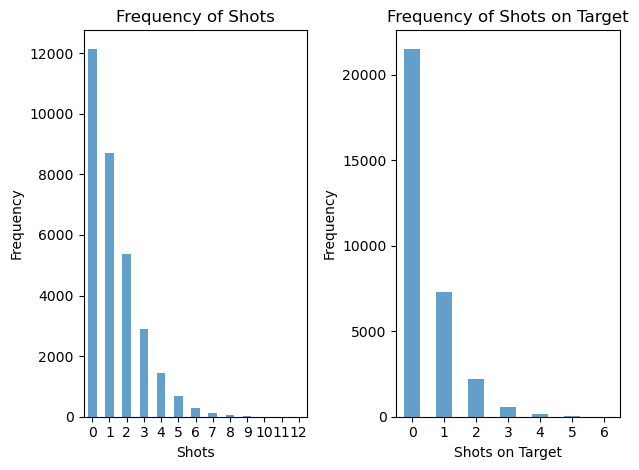

In [86]:
shots_count = att_explore['Shots'].value_counts().sort_index()
sot_count = att_explore['Shots on Target'].value_counts().sort_index()

fig, axes = plt.subplots(1, 2)

shots_count.plot(kind = 'bar', alpha = 0.7, ax = axes[0])
axes[0].set_xlabel('Shots')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Frequency of Shots')
axes[0].set_xticklabels(axes[0].get_xticks(), rotation = 0)

sot_count.plot(kind = 'bar', alpha = 0.7, ax = axes[1])
axes[1].set_xlabel('Shots on Target')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Frequency of Shots on Target')
axes[1].set_xticklabels(axes[1].get_xticks(), rotation = 0)

plt.tight_layout()
plt.show()

The general trend is that majority of observations have both 0 shots and shots on target. This makes sense, because the dataset contains quite a few observations that are defensive/midfield players, who will generally not be shooting much throughout the game. On this basis, we can have a look to see how this plot changes if we just include attackers. 

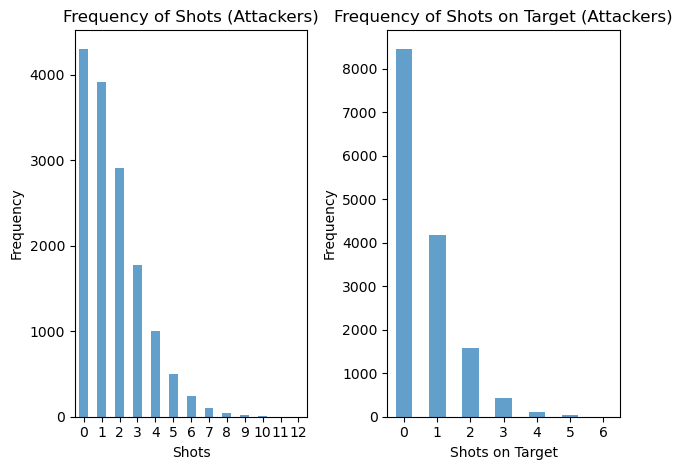

In [87]:
attackers_condition = (att_explore['FW'] == 1) | (att_explore['Wingers'] == 1)
attackers_shots_df = att_explore[attackers_condition][['Shots', 'Shots on Target', 'Goals']]

shots_count = attackers_shots_df['Shots'].value_counts().sort_index()
sot_count = attackers_shots_df['Shots on Target'].value_counts().sort_index()

fig, axes = plt.subplots(1, 2)

shots_count.plot(kind = 'bar', alpha = 0.7, ax = axes[0])
axes[0].set_xlabel('Shots')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Frequency of Shots (Attackers)')
axes[0].set_xticklabels(axes[0].get_xticks(), rotation = 0)

sot_count.plot(kind = 'bar', alpha = 0.7, ax = axes[1])
axes[1].set_xlabel('Shots on Target')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Frequency of Shots on Target (Attackers)')
axes[1].set_xticklabels(axes[1].get_xticks(), rotation = 0)

plt.tight_layout()
plt.show()

It is interesting that the trend is broadly the same. We can see that the difference between the number of observations with no shots and the number of observations with 1 shots is now much closer, compared to the previous plot. This makes sense, as we expect more of the observations now to be taking shots (since we are only plotting the observations that played in the attacking positions). 

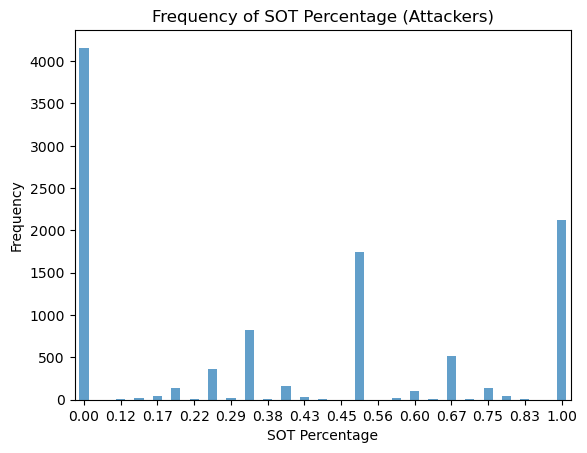

In [88]:
#creating new feature - shot on target percentage 
attackers_shots_df['SOT Percentage'] = attackers_shots_df['Shots on Target']/attackers_shots_df['Shots']

#counting the number of each unique SOT percentage 
sotpct_count = attackers_shots_df['SOT Percentage'].value_counts().sort_index()

#plotting
fig, ax = plt.subplots()

sotpct_count.plot(kind = 'bar', alpha = 0.7, ax = ax)

ax.set_xlabel('SOT Percentage')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of SOT Percentage (Attackers)')

#setting x-ticks to deal with overcrowding on the x-axis
ticks = ax.get_xticks()
ax.set_xticks(ticks[::2])
ax.set_xticklabels([f'{s:.2f}' for s in sotpct_count.index[::2]])
plt.xticks(rotation = 0)
plt.show()

So there is no clear pattern when looking at the frequency of shots on target percentages. The large number of observations with 0% shots on target percentage mostly consist of the observations that had 0 shots in the game. There is also a suprisingly large number of observations that had 100% shot on target percentage. I speculate majority of those consist of observations that had 1 shot and 1 shot on target. We can really quickly compare the plot above, to a similar plot but this time including data from all other positions as well. 

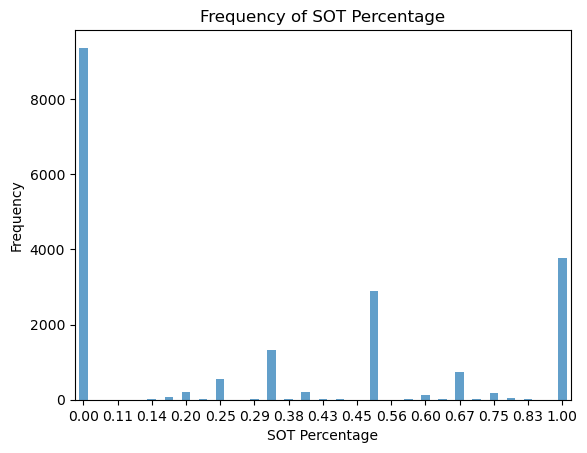

In [89]:
#creating new feature - shot on target percentage 
att_explore['SOT Percentage'] = att_explore['Shots on Target']/att_explore['Shots']

#counting the number of each unique SOT percentage 
sotpct_count = att_explore['SOT Percentage'].value_counts().sort_index()

#plotting
fig, ax = plt.subplots()

sotpct_count.plot(kind = 'bar', alpha = 0.7, ax = ax)

ax.set_xlabel('SOT Percentage')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of SOT Percentage')

#setting x-ticks to deal with overcrowding on the x-axis
ticks = ax.get_xticks()
ax.set_xticks(ticks[::2])
ax.set_xticklabels([f'{s:.2f}' for s in sotpct_count.index[::2]])
plt.xticks(rotation = 0)
plt.show()

There is actually quite a similar pattern, which is slightly surprising. I would've expected there to be more observations with a reduced shot on target percentage, by virtue of the fact that including midfielders/defenders in the plot would lead to an on average worse shooting ability, so more observations with lower shot on target percentages. However, the other way to look at it would be that a lot of those observations wouldn't have taken shots anyway, so the overarching pattern stays somewhat similar. The current plots show that there are quite a few varying values for 'SOT Percentage'. Perhaps we could look into grouping them?

One final thing I also want to take a look at is how the SOT Percentage differs across the number of shots taken in a game. We will have to plot the proportion of observations per SOT Percentage, since there are so many SOT Percentage values that have very few observations. 

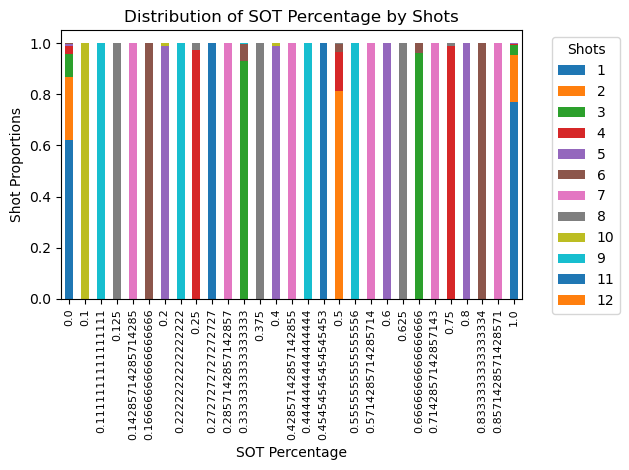

In [90]:
sotpct_by_shots = att_explore.groupby(['SOT Percentage', 'Shots']).size().unstack(fill_value = 0)
sotpctprop_by_shots = sotpct_by_shots.div(sotpct_by_shots.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

sotpctprop_by_shots.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of SOT Percentage by Shots')
ax.set_xlabel('SOT Percentage')
ax.set_ylabel('Shot Proportions')
ax.legend(title = 'Shots', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()


Very messy plot! We can see that there are quite a few of the bars that only have one colour. For example, the 0.1 bar (10% shot on target percentage) is only from observations with 10 shots in one game. We can probably remove them from the plot for better interpretability. 

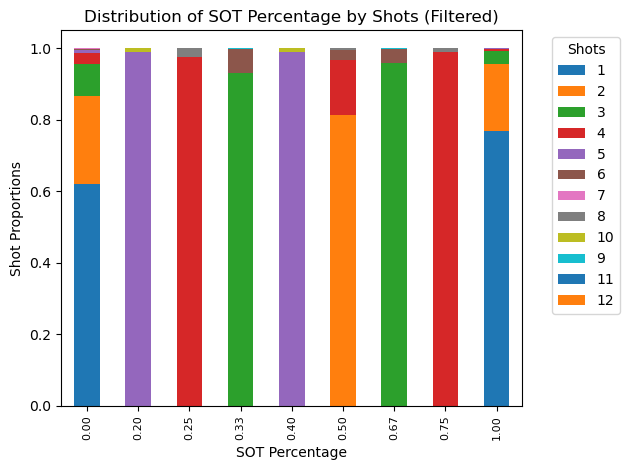

In [91]:
#modifying sotpctprop_by_shots to only include SOT Percentages with multiple shot values 
sotpctprop_by_shots = sotpctprop_by_shots.loc[~(sotpctprop_by_shots.isin([1]).any(axis = 1))]

fig, ax = plt.subplots()

sotpctprop_by_shots.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of SOT Percentage by Shots (Filtered)')
ax.set_xlabel('SOT Percentage')
ax.set_ylabel('Shot Proportions')
ax.legend(title = 'Shots', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

ax.set_xticks(range(len(sotpctprop_by_shots.index)))
ax.set_xticklabels([f'{value:.2f}' for value in sotpctprop_by_shots.index])
plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()

The plot is still quite messy, but is slightly more interpretable now. Firstly, over half of the observations with 0% SOT Percentage are attributed to observations that only had 1 shot in the game. The next most frequent is 2 shots, followed by 3 shots and so on. We can also see that a lot of the other SOT percentage are down to certain number of shots. For example, a 20% SOT Percentage is only possible with either 5 shots and 1 SOT or 10 shots and 2 SOT. Finally, we can see that just under 80% of the observations with 100% SOT Percentage are down to observations with 1 shot. A potential takeaway from this is that it is difficult to achieve 100% SOT percentage. Let's now take a look at the relationship between Shots, Shots on Target, SOT Percentage and Goals. 

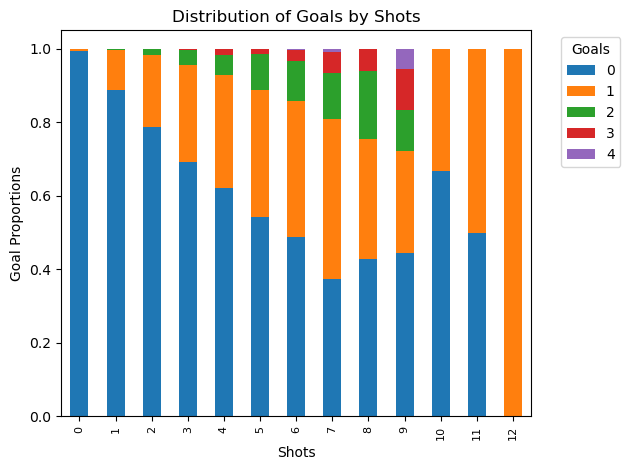

In [92]:
goals_by_shots = att_explore.groupby(['Shots', 'Goals']).size().unstack(fill_value = 0)
goalprop_by_shots = goals_by_shots.div(goals_by_shots.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_shots.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goals by Shots')
ax.set_xlabel('Shots')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()


First off, it appears that there is a steady trend of increasing goal proportions as shots increase all the way up to 7 shots. Then, the trend seems to reverse and become unstable. This is probably due to the fact that there are limited number of observations with 8+ shots per game. The proportion of 2 or more goals also increases similarly. The fact that there are no observations that have 2 or more goals and 10 or more shots at the same time is probably down to the limited number of observations that had 10 or more shots per game. There also seems to be some observations that had 0 shots but still managed a goal. We need to have a quick look at those observations, as there may be an issue there. 

In [93]:
att_explore[(att_explore['Shots'] == 0) & (att_explore['Goals'] != 0)]

Player ID  Day  Matchweek Venue Result             Team  \
31700        424  Sat         29  Home  D 1–1        Tottenham   
17043        229  Sat          1  Away  W 3–0          Chelsea   
10698        148  Sat         18  Away  W 3–0         West Ham   
10624        148  Sat          3  Away  W 3–1         West Ham   
24559        337  Sat         22  Away  W 2–1      Southampton   
...          ...  ...        ...   ...    ...              ...   
24617        338  Mon         13  Home  W 3–2           Fulham   
24383        337  Thu         22  Home  D 1–1         West Ham   
38706        512  Sat         18  Away  W 3–2   Crystal Palace   
33010        442  Sat          1  Away  W 5–0  Manchester City   
3678          58  Sat         13  Home  L 1–2          Burnley   

              Opponent Start  Position  Minutes Played  ...  RB  RM  RW  WB  \
31700          Arsenal     Y        FW              90  ...   0   0   0   0   
17043     Huddersfield     Y        CM              90  ...   0   0   0   0   
10698       Stoke City    Y*        CM              34  ...   0   0   0   0   
10624          Watford    Y*     DM,CM              90  ...   0   0   0   0   
24559   Leicester City     Y  CM,DM,WB              90  ...   0   0   0   1   
...                ...   ...       ...             ...  ...  ..  ..  ..  ..   
24617           Wolves     Y        LW              89  ...   0   0   0   0   
24383      Bournemouth     Y        AM              90  ...   0   0   0   0   
38706  Manchester City    Y*        CM              90  ...   0   0   0   0   
33010         West Ham     N        FW              22  ...   0   0   0   0   
3678          West Ham     Y        FW              90  ...   0   0   0   0   

       Defenders  Midfielders  Wide Midfielders  Wingers  \
31700          0            0                 0        0   
17043          0            1                 0        0   
10698          0            1                 0        0   
10624          0            1                 0        0   
24559          0            1                 0        0   
...          ...          ...               ...      ...   
24617          0            0                 0        1   
24383          0            0                 0        0   
38706          0            1                 0        0   
33010          0            0                 0        0   
3678           0            0                 0        0   

       Penalty Success Rate  SOT Percentage  
31700                   1.0             NaN  
17043                   1.0             NaN  
10698                   1.0             NaN  
10624                   1.0             NaN  
24559                   1.0             NaN  
...                     ...             ...  
24617                   1.0             NaN  
24383                   1.0             NaN  
38706                   1.0             NaN  
33010                   1.0             NaN  
3678                    1.0             NaN  

[79 rows x 128 columns]

A quick scan appears to show that a lot of these observations have a Penalty Success Rate of 1. Let's further filter out these observations to remove any that have Penalty Success Rate = 1. 

In [94]:
att_explore[(att_explore['Shots'] == 0) & (att_explore['Goals'] != 0) & (att_explore['Penalty Success Rate'] != 1)]

Player ID  Day  Matchweek Venue Result         Team Opponent Start  \
20991        292  Sat         27  Home  D 1–1  Bournemouth   Wolves     Y   

      Position  Minutes Played  ...  RB  RM  RW  WB  Defenders  Midfielders  \
20991       FW              90  ...   0   0   0   0          0            0   

       Wide Midfielders  Wingers  Penalty Success Rate  SOT Percentage  
20991                 0        0                   0.5             NaN  

[1 rows x 128 columns]

So we now know that goals that result from penalties are not counted as either shots or shots on target. 

Let's now have a look at the relationship between Goals and Shots on Target. 

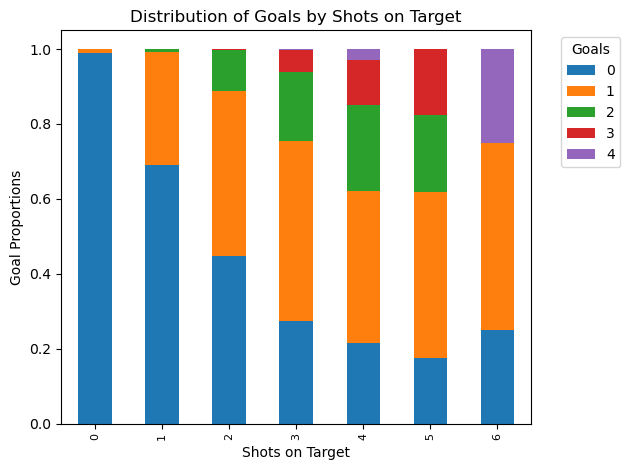

In [95]:
goals_by_sot = att_explore.groupby(['Shots on Target', 'Goals']).size().unstack(fill_value = 0)
goalprop_by_sot = goals_by_sot.div(goals_by_sot.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_sot.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goals by Shots on Target')
ax.set_xlabel('Shots on Target')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()


A similar trend emerges, where the greater the number of shots on target, the greater the proportion of observations that have at least 1 goal. For example, for observations with 5 shots on target in 1 game, over 80% of them have scored at least one goal. Based on these graphs, you could argue that Shots on Target are a stronger predictor of goals than Shots, because Shots on Target are less messy. I would also like to reproduce these two graphs but only for attackers, just to see if the trend is different when eliminating more defensive players from the plot. 

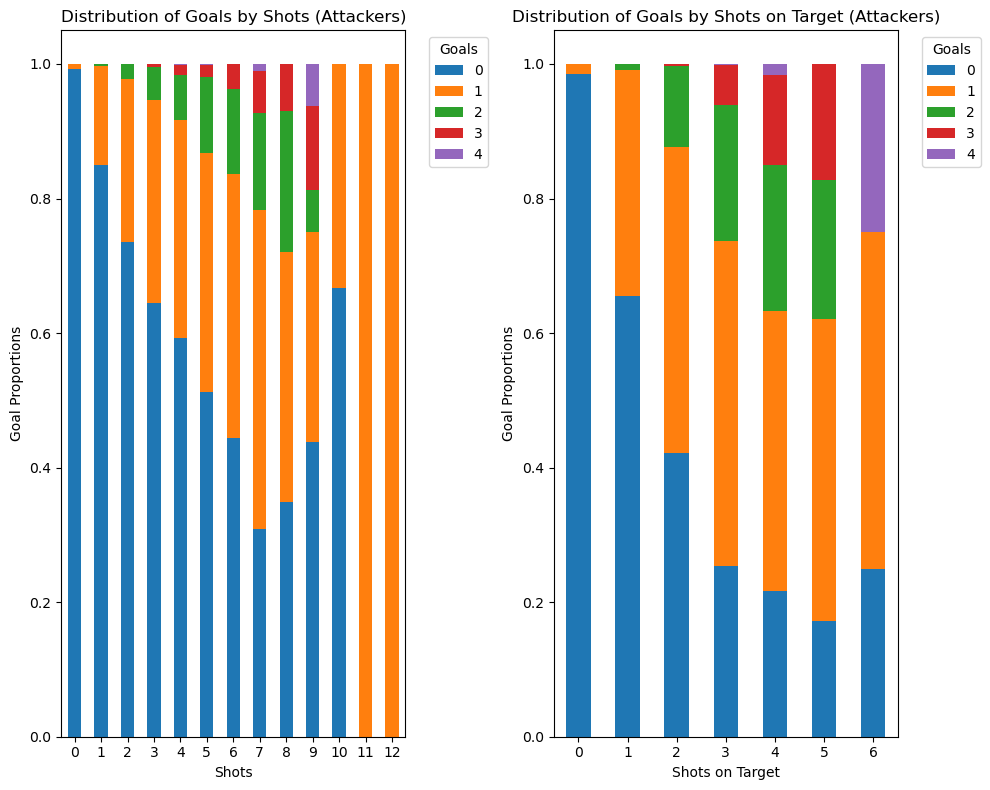

In [96]:
attackers_goals_by_shots = attackers_shots_df.groupby(['Shots', 'Goals']).size().unstack(fill_value = 0)
attackers_goalprop_by_shots = attackers_goals_by_shots.div(attackers_goals_by_shots.sum(axis = 1), axis = 0)

attackers_goals_by_sot = attackers_shots_df.groupby(['Shots on Target', 'Goals']).size().unstack(fill_value = 0)
attackers_goalprop_by_sot = attackers_goals_by_sot.div(attackers_goals_by_sot.sum(axis = 1), axis = 0)

fig, axes = plt.subplots(1, 2, figsize = (10, 8))

attackers_goalprop_by_shots.plot(kind = 'bar', stacked = True, ax = axes[0])
axes[0].set_xlabel('Shots')
axes[0].set_ylabel('Goal Proportions')
axes[0].set_title('Distribution of Goals by Shots (Attackers)')
axes[0].set_xticklabels(axes[0].get_xticks(), rotation = 0)
axes[0].legend(title = 'Goals', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

attackers_goalprop_by_sot.plot(kind = 'bar', stacked = True, ax = axes[1])
axes[1].set_xlabel('Shots on Target')
axes[1].set_ylabel('Goal Proportions')
axes[1].set_title('Distribution of Goals by Shots on Target (Attackers)')
axes[1].set_xticklabels(axes[1].get_xticks(), rotation = 0)
axes[1].legend(title = 'Goals', bbox_to_anchor = (1.05, 1), loc = 'upper left')


plt.tight_layout()
plt.show()

If you compare these plots with the above, you can see that the underlying trends are largely the same. Overall, larger number of shots and shots on target will lead to a greater proportion of the observations having scored at least one goal. It seems that the pattern is more stable for shots on target, where there is quite a consistent increase in the proportion of observations having at least one goal as the number of shots on target increases. Although this pattern is also largely there for shots, it gets a little unstable as the number of shots reaches 8+, as there are very few observations that have 8+ shots per game. 

### Yellow Card/Red Card Feature Exploration

Overall, we don't expect to see much correlation between the number of yellow cards/red cards and the number of goals scored. The only possible pattern is that larger number of cards = fewer goals scored, as it is usually more likely for more defensive players to pick up yellow cards. However, we don't expect this to be a strong relationship. We start by taking a look at how many of the observations have yellow/red cards. 

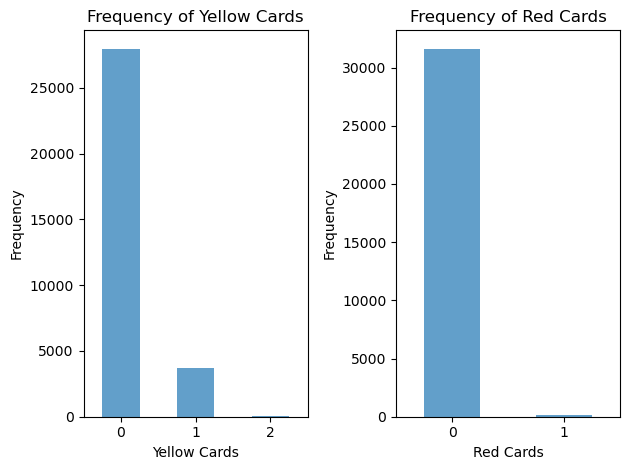

In [97]:
yc_count = att_explore['Yellow Cards'].value_counts().sort_index()
rc_count = att_explore['Red Cards'].value_counts().sort_index()

fig, axes = plt.subplots(1, 2)

yc_count.plot(kind = 'bar', alpha = 0.7, ax = axes[0])
axes[0].set_xlabel('Yellow Cards')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Frequency of Yellow Cards')
axes[0].set_xticklabels(axes[0].get_xticks(), rotation = 0)

rc_count.plot(kind = 'bar', alpha = 0.7, ax = axes[1])
axes[1].set_xlabel('Red Cards')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Frequency of Red Cards')
axes[1].set_xticklabels(axes[1].get_xticks(), rotation = 0)

plt.tight_layout()
plt.show()

We can see that majority of the observations have recorded neither a yellow or a red card throughout the game. There is a fair number of observations that have recorded 1 yellow card per game, but very few that have either picked up 2 yellow cards/1 red card. We now turn our attention to the relationship between YC/RC and Goals. 

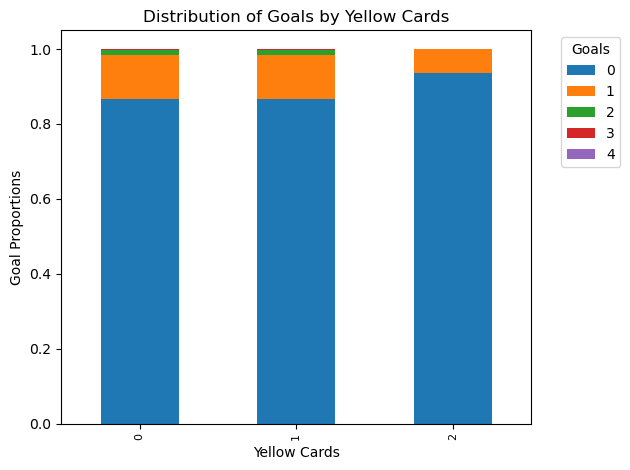

In [98]:
goals_by_yc = att_explore.groupby(['Yellow Cards', 'Goals']).size().unstack(fill_value = 0)
goalprop_by_yc = goals_by_yc.div(goals_by_yc.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_yc.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goals by Yellow Cards')
ax.set_xlabel('Yellow Cards')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()


We can see that the proportion of observations that have at least 1 goal is pretty much the same when comparing observations with no yellow cards and observations with 1 yellow card. However, the proportion of observations with at least 1 goal is quite a bit smaller for observations with 2 yellow cards. This probably has to do with the fact that getting 2 yellow cards is equivalent to getting a red card, i.e you're sent off so you are playing less minutes in the game. We have seen previously that the more minutes you play corresponds to a greater proportion of observations scoring at least 1 goal, so this tracks. Based on this, we expect to see the proportion of observations that score at least 1 goal to be greater for observations with no red card, compared to those with a red card. 

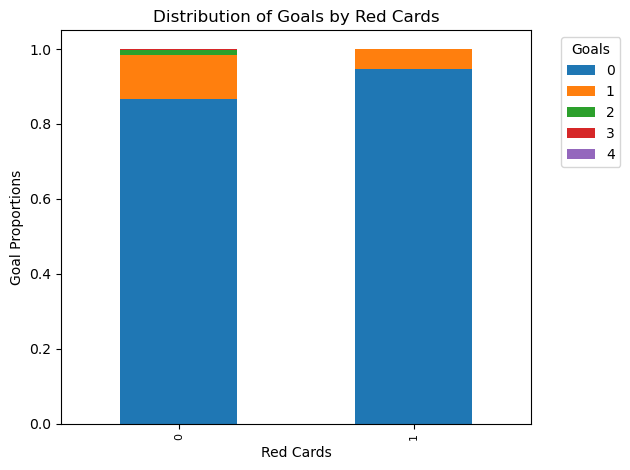

In [99]:
goals_by_rc = att_explore.groupby(['Red Cards', 'Goals']).size().unstack(fill_value = 0)
goalprop_by_rc = goals_by_rc.div(goals_by_rc.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_rc.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goals by Red Cards')
ax.set_xlabel('Red Cards')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()


As expected, the proportion of observations that have at least 1 goal is smaller for the observations that have recorded a red card, compared to thoes that did not record a red card. Although the plots do suggest some relationship between Goals and Red/ 2 Yellow cards, I believe this is primarily to do with the effect of Red/2 Yellow Cards on minutes played, which is ultimately having an impact on goals scored. In other words, the fact that an observation recorded either 2 yellow cards/1 red card is already recorded in the 'Minutes Played' feature, in terms of it's effect on goals. 

To investigate this, we can have a look at the average minutes played of those players that recorded a red card. We can then plot the proportion of goals scored for observations with a red card, and compare this to the proportion of goals scored for observations with comparable minutes played, but no red card. 

In [100]:
att_explore[att_explore['Red Cards'] == 1][['Minutes Played']].mean()


Minutes Played    54.991304
dtype: float64

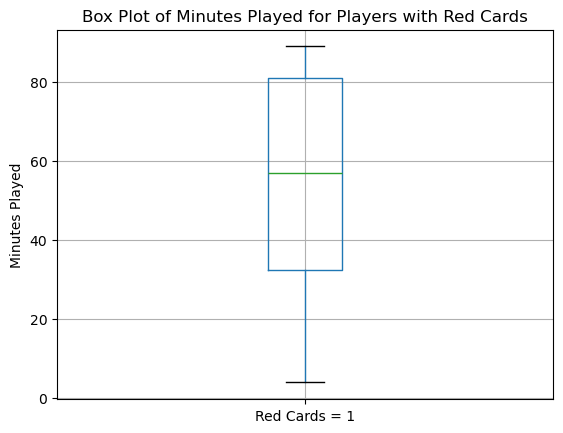

In [101]:
plt.figure()
att_explore[att_explore['Red Cards'] == 1][['Minutes Played']].boxplot(column = 'Minutes Played')
plt.title('Box Plot of Minutes Played for Players with Red Cards')
plt.ylabel('Minutes Played')
plt.xticks([1], ['Red Cards = 1'])
plt.show()


So of the players who recorded a red card, the mean minutes played was 54.9, with a similar median. Perhaps surprisingly, the box plot shows that the range of minutes played for players with red cards is actually quite dispersed. Let's compare this with a box plot of minutes played for all of the observations. 

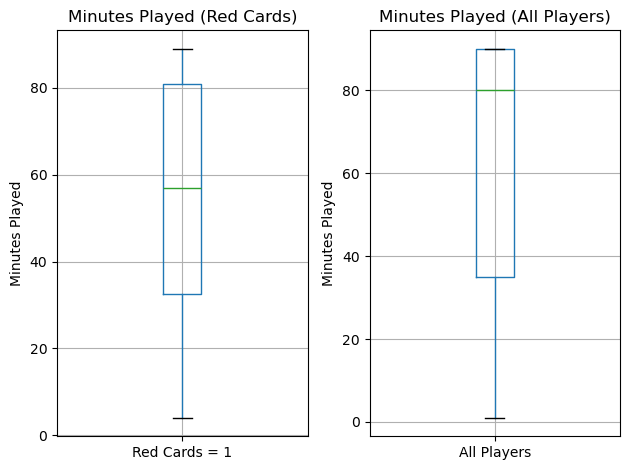

In [102]:
plt.figure()

plt.subplot(1, 2, 1)
att_explore[att_explore['Red Cards'] == 1][['Minutes Played']].boxplot(column = 'Minutes Played')
plt.title('Minutes Played (Red Cards)')
plt.ylabel('Minutes Played')
plt.xticks([1], ['Red Cards = 1'])

plt.subplot(1, 2, 2)
att_explore[['Minutes Played']].boxplot(column = 'Minutes Played')
plt.title('Minutes Played (All Players)')
plt.ylabel('Minutes Played')
plt.xticks([1], ['All Players'])

plt.tight_layout()
plt.show()

So clearly, the minutes played when looking at all players has a much higher median than the minutes played for the players with red cards. However, the spread seems to be quite similar in terms of both the min/max as well as the interquartile range. 

In [103]:
np.random.seed(753)
#subset of red card observations
rc_dat = att_explore[att_explore['Red Cards'] == 1]

#subset of remaining observations 
norc_dat = att_explore[att_explore['Red Cards'] == 0]

#estimating the distribution of 'Minutes Played' in rc_dat
rc_dat_mins = rc_dat['Minutes Played']
bins = np.histogram_bin_edges(rc_dat_mins, bins = 'auto')

#sample from norc_dat based  on estimated distribution
samp_dat = pd.DataFrame()

for i in range(len(bins) - 1):
    #calculate range for current bin
    bin_range = (bins[i], bins[i + 1])
    
    #filter observations that fall intocurrent bin
    bin_data = norc_dat[
        (norc_dat['Minutes Played'] >= bin_range[0]) &
        (norc_dat['Minutes Played'] < bin_range[1])
    ]
    if not bin_data.empty:
        bin_sample_size = ((rc_dat_mins >= bin_range[0]) & 
                           (rc_dat_mins < bin_range[1])).sum()
        
        sampled_from_bin = bin_data.sample(n=min(bin_sample_size, len(bin_data)), replace=True)
        samp_dat = pd.concat([samp_dat, sampled_from_bin])

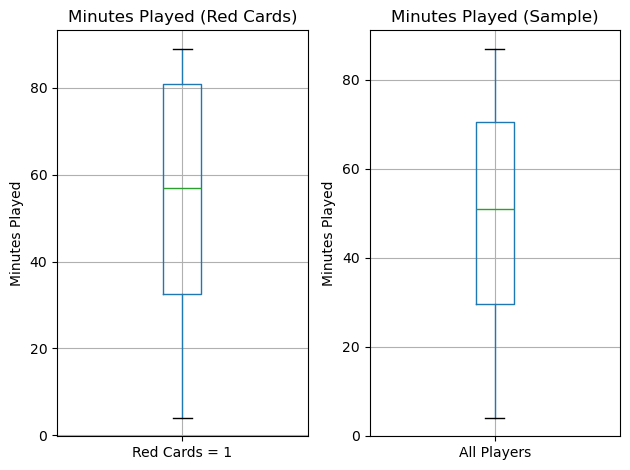

In [104]:
plt.figure()

plt.subplot(1, 2, 1)
rc_dat.boxplot(column = 'Minutes Played')
plt.title('Minutes Played (Red Cards)')
plt.ylabel('Minutes Played')
plt.xticks([1], ['Red Cards = 1'])

plt.subplot(1, 2, 2)
samp_dat.boxplot(column = 'Minutes Played')
plt.title('Minutes Played (Sample)')
plt.ylabel('Minutes Played')
plt.xticks([1], ['All Players'])

plt.tight_layout()
plt.show()

We can see that the distribution of 'Minutes Played' between the Red Card subset and the sample is relatively similar. Let's now plot compare the goal proportions between these two samples

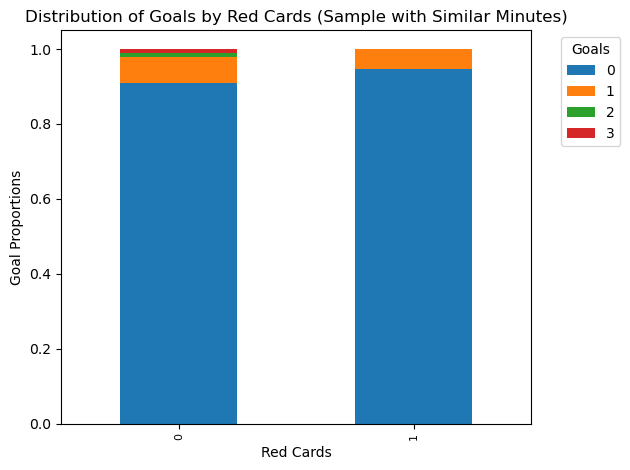

In [105]:
rcsample_dat = pd.concat([rc_dat, samp_dat], ignore_index = True)

goals_by_rcsamp = rcsample_dat.groupby(['Red Cards', 'Goals']).size().unstack(fill_value = 0)
goalprop_by_rcsamp = goals_by_rcsamp.div(goals_by_rcsamp.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_rcsamp.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goals by Red Cards (Sample with Similar Minutes)')
ax.set_xlabel('Red Cards')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()


We can see that although there is still a difference in the proportion of goals scored by observations with red cards, compared to observations without red cards (sampled so that the distribution of minutes played is comparable to the subset of observations that have red cards), this difference is not as large as previously seen. 

### Touches Feature Exploration

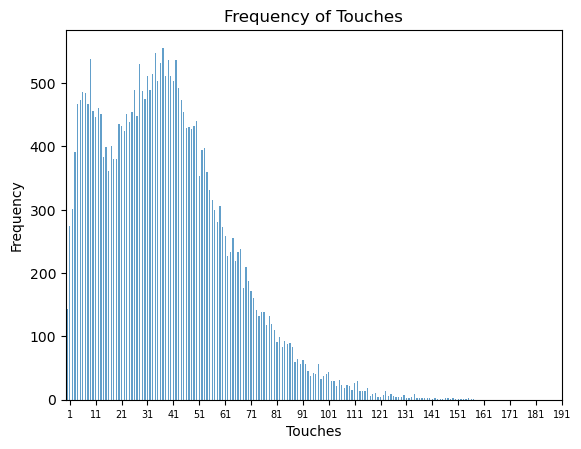

In [106]:
touches_count = att_explore['Touches'].value_counts().sort_index()

fig, ax = plt.subplots()

touches_count.plot(kind = 'bar', alpha = 0.7)

ax.set_xlabel('Touches')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Touches')
#set_xticks is used to only have certain values on the x axis. without this on, every x axis value was printed, which meant that the x axis values overlapped, affecting readability 
ax.set_xticks(range(1, 200, 10))
ax.set_xticklabels(range(1, 200, 10))

plt.xticks(rotation = 0, fontsize = 7)
plt.show()

Majority of the observations have 'Touches' value less than 100. We know that playing in certain positions is more likely to get you more touches (for example, you are more likely to have more touches playing in midfield and defence compared to attack). Also, you will obviously get more touches if you are playing more minutes. Let's investigate the second by inspecting a plot of 'Touches' against 'Minutes Played'. 

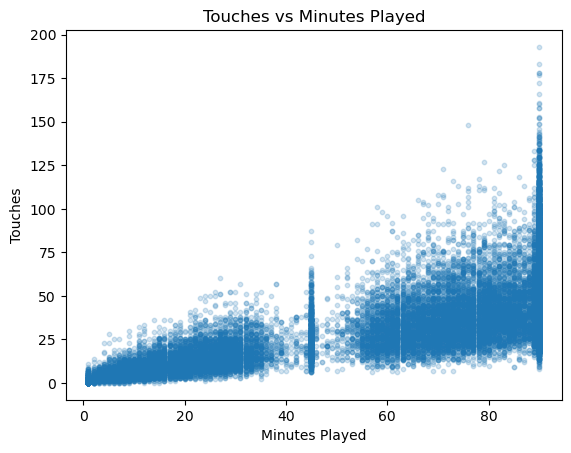

In [107]:
plt.figure()

plt.scatter(att_explore['Minutes Played'], att_explore['Touches'], alpha = 0.2, s = 10)
plt.title('Touches vs Minutes Played')
plt.xlabel('Minutes Played')
plt.ylabel('Touches')
plt.show()

We can clearly see the pattern of more minutes played = more touches. Suppose we then colour code each point in the scatter plot by the position played by the observation. 

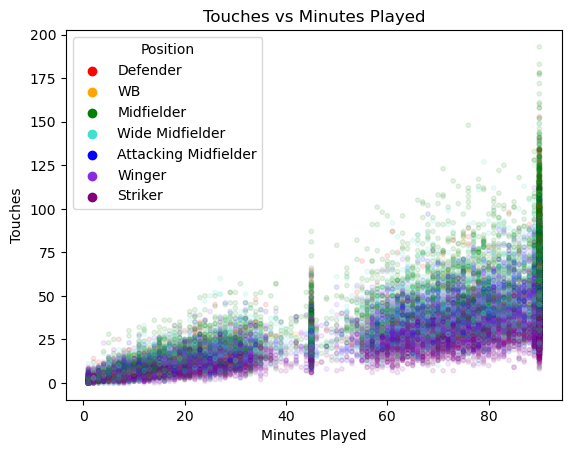

In [108]:
def get_position(row):
    if row['Defenders'] == 1:
        return 'Defender'
    if row['WB'] == 1:
        return 'WB'
    if row['Midfielders'] == 1:
        return 'Midfielder'
    if row['Wide Midfielders'] == 1:
        return 'Wide Midfielder'
    if row['Wingers'] == 1:
            return 'Winger'
    if row['AM'] == 1:
        return 'Attacking Midfielder'

    if row['FW'] == 1:
        return 'Striker'

#position plot contains the position played by each observation
position_plot = att_explore.apply(get_position, axis = 1)

position_colourmap = {
    'Defender': 'red',
    'WB': 'orange',
    'Midfielder': 'green', 
    'Wide Midfielder': 'turquoise',
    'Attacking Midfielder': 'blue',
    'Winger': 'blueviolet', 
    'Striker': 'purple'
}

position_colours = position_plot.map(position_colourmap)

plt.figure()

plt.scatter(att_explore['Minutes Played'], att_explore['Touches'], color = position_colours, alpha = 0.1, s = 10)
plt.title('Touches vs Minutes Played')
plt.xlabel('Minutes Played')
plt.ylabel('Touches')

#custom legend
for position, colour in position_colourmap.items():
    plt.scatter([], [], color = colour, label = position)
plt.legend(title = 'Position')



plt.show()

What we can see is that darker coloured points are located towards the bottom of the plot, whilst the more green coloured points are located towards the top. This confirms our initial guess that observations classified as playing in midfield are more likely to record more touches, whilst attackers such as wingers or strikers are more likely to record less touches. We need to keep this in mind as we investigate the relationship between 'Touches' and goals. 

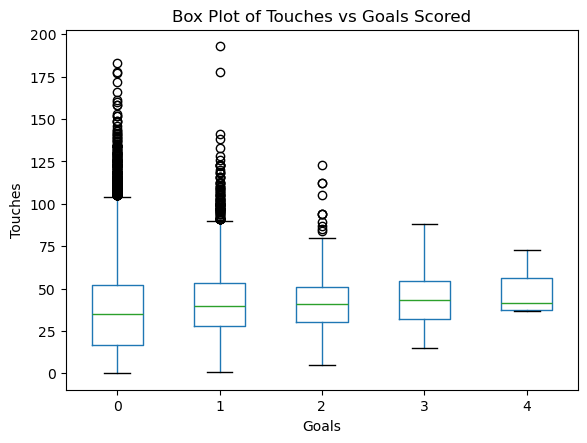

In [109]:
plt.figure
att_explore.boxplot(column = 'Touches', by = 'Goals', grid = False)
plt.title('Box Plot of Touches vs Goals Scored')
plt.suptitle('')
plt.xlabel('Goals')
plt.ylabel('Touches')
plt.show()

Based on the boxplot, it appears that the median number of touches for different 'Goals' values is relatively similar, at around 35. There do appear to be quite a few outliers however. Recall that we previously showed the effect of 'Position' on 'Touches'. Let's reproduce the box plot above, but using only the attackers data. 

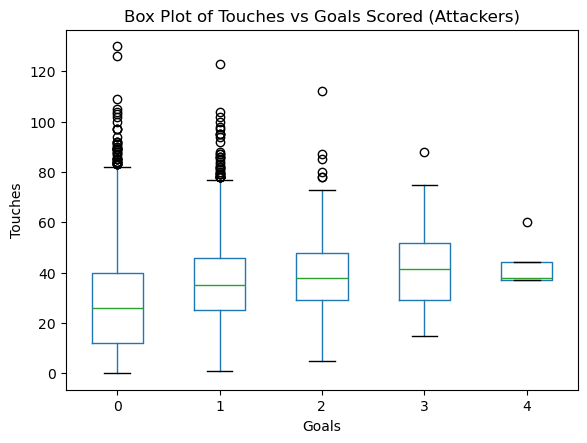

In [110]:
attackers_condition = (att_explore['FW'] == 1) | (att_explore['Wingers'] == 1)
attackers_touches_df = att_explore[attackers_condition][['Touches', 'Goals']]

plt.figure
attackers_touches_df.boxplot(column = 'Touches', by = 'Goals', grid = False)
plt.title('Box Plot of Touches vs Goals Scored (Attackers)')
plt.suptitle('')
plt.xlabel('Goals')
plt.ylabel('Touches')
plt.show()

Now, it appears as if having more touches leads to more goals being scored. However, this relationship does not appear to be very strong, as we can see that the median number of touches for observations that scored at least 1 goal is the approximately the same, whether or not 1 goal is scored or 3 goals are scored. This sort of aligns with the contextual information. The number of touches that a player records in a game is largely dependent on the tactical system of the team that the player plays for, as well as the role of the player within this tactical system. For example, take two attackers; Harry Kane and Erling Haaland, both of which are prolific strikers. Harry Kane is considered to be more of a link player, meaning he will drop deep to link the midfield with the attack. This generally leads to him having more touches of the ball in comparison to Erling Haaland, who is more of a poacher. 

### Tackles, Interceptions and Blocks Feature Exploration

I have included these 3 features in the same section because these are 3 features typically considered to be associated with defensive players. We don't expect there to be any strong relationship between these features and goals scored. 

#### Tackles

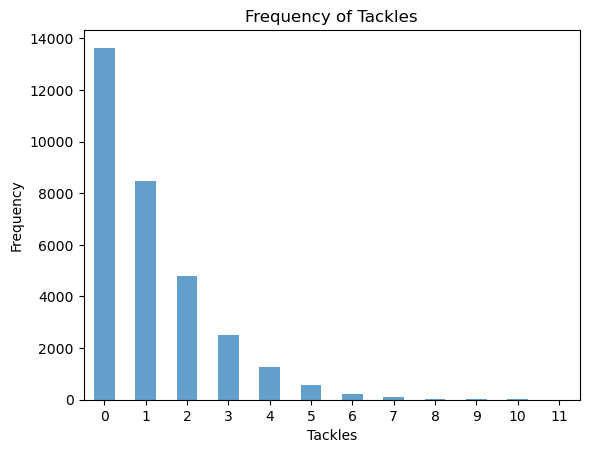

In [111]:
tackles_count = att_explore['Tackles'].value_counts().sort_index()

fig, ax = plt.subplots()

tackles_count.plot(kind = 'bar', alpha = 0.7)

ax.set_xlabel('Tackles')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Tackles')
#set_xticks is used to only have certain values on the x axis. without this on, every x axis value was printed, which meant that the x axis values overlapped, affecting readability 
# ax.set_xticks(range(1, 200, 10))
# ax.set_xticklabels(range(1, 200, 10))

plt.xticks(rotation = 0)
plt.show()

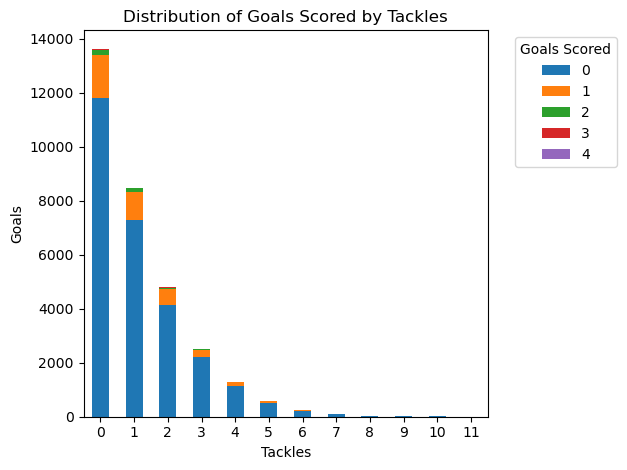

In [112]:
goals_by_tackles = att_explore.groupby(['Tackles', 'Goals']).size().unstack(fill_value = 0)

fig, ax = plt.subplots()

goals_by_tackles.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goals Scored by Tackles')
ax.set_xlabel('Tackles')

ax.set_ylabel('Goals')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

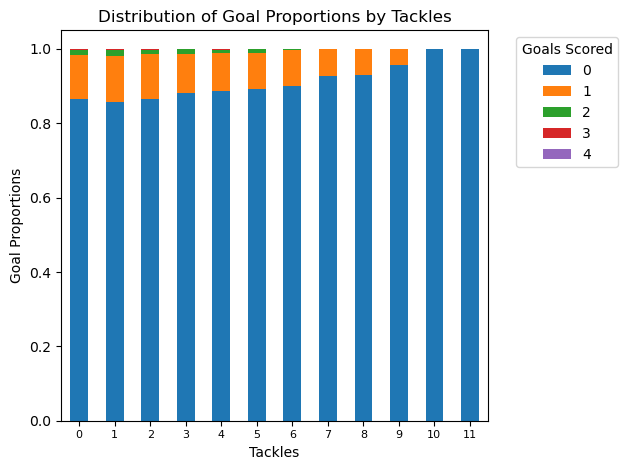

In [113]:
goalprop_by_tackles = goals_by_tackles.div(goals_by_tackles.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_tackles.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Tackles')
ax.set_xlabel('Tackles')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 0, size = 8)
plt.tight_layout()
plt.show()

There seems to be a trend where the more tackles made, the lower the proportion of observations that scored at least 1 goal. As we mentioned at the beginning, we suspect this is to do with the fact that more defensive players (i.e. Defenders or Midfielders) are more likely to make more tackles, whilst simultaneously also being less likely to score goals. We can investigate this by plotting the frequency of tackles for defensive players (Defenders, Midfielders) and comparing this with the frequency of tackles for attacking players (AM, Wingers, FW)

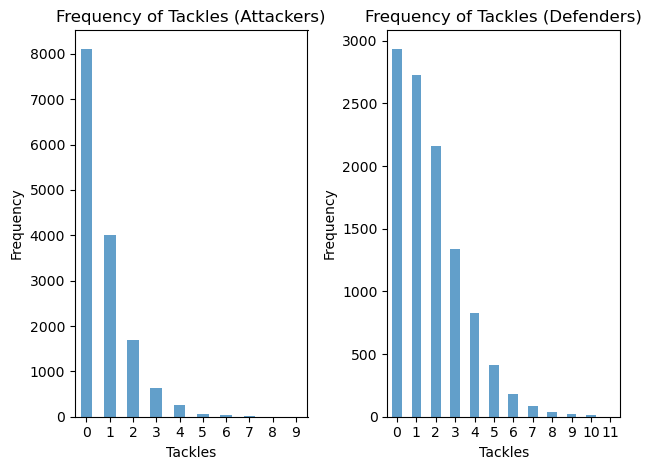

In [114]:
attackers_condition = (att_explore['FW'] == 1) | (att_explore['Wingers'] == 1)
attackers_defdat = att_explore[attackers_condition][['Tackles', 'Interceptions', 'Blocks', 'Goals']]
attackers_tackles_count = attackers_defdat['Tackles'].value_counts().sort_index()


defenders_condition = (att_explore['Defenders'] == 1) | (att_explore['Midfielders'] == 1) | (att_explore['WB'] == 1)
defenders_defdat = att_explore[defenders_condition][['Tackles', 'Interceptions', 'Blocks', 'Goals']]
defenders_tackles_count = defenders_defdat['Tackles'].value_counts().sort_index()



fig, axes = plt.subplots(1, 2)

attackers_tackles_count.plot(kind = 'bar', alpha = 0.7, ax = axes[0])
axes[0].set_xlabel('Tackles')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Frequency of Tackles (Attackers)')
axes[0].set_xticklabels(axes[0].get_xticks(), rotation = 0)

defenders_tackles_count.plot(kind = 'bar', alpha = 0.7, ax = axes[1])
axes[1].set_xlabel('Tackles')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Frequency of Tackles (Defenders)')
axes[1].set_xticklabels(axes[1].get_xticks(), rotation = 0)

plt.tight_layout()
plt.show()

When comparing the two plots, we can clearly see that the Attackers plot has observations that have generally recorded far fewer tackles compared to the observations in the Defenders plot. This confirms our initial suspicions about the relationship between 'Tackles' and the positions played by a given observation. 

#### Interceptions

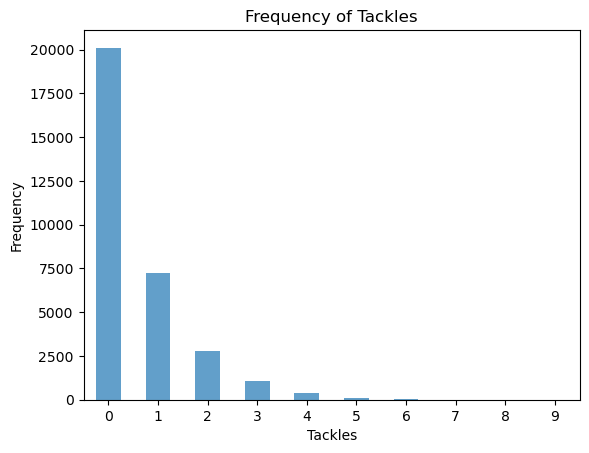

In [115]:
interceptions_count = att_explore['Interceptions'].value_counts().sort_index()

fig, ax = plt.subplots()

interceptions_count.plot(kind = 'bar', alpha = 0.7)

ax.set_xlabel('Tackles')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Tackles')
#set_xticks is used to only have certain values on the x axis. without this on, every x axis value was printed, which meant that the x axis values overlapped, affecting readability 
# ax.set_xticks(range(1, 200, 10))
# ax.set_xticklabels(range(1, 200, 10))

plt.xticks(rotation = 0)
plt.show()

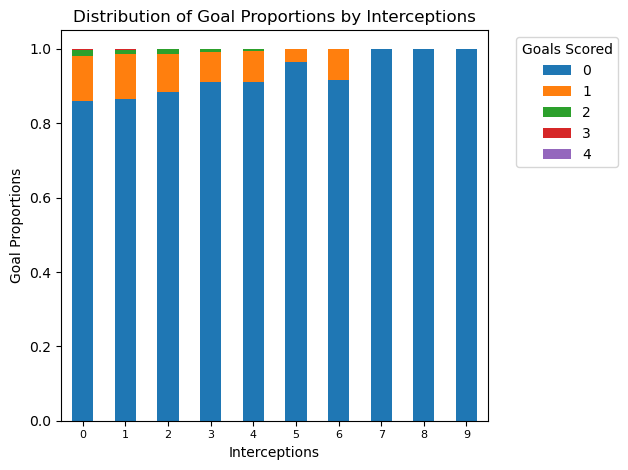

In [116]:
goals_by_interceptions = att_explore.groupby(['Interceptions', 'Goals']).size().unstack(fill_value = 0)
goalprop_by_interceptions = goals_by_interceptions.div(goals_by_interceptions.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_interceptions.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Interceptions')
ax.set_xlabel('Interceptions')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 0, size = 8)
plt.tight_layout()
plt.show()

A similar pattern emerges where we see that the more interceptions is somewhat correlated with a fewer proportion of the observations scoring at least 1 goal. There does seem to be a weird kink in the pattern, where the proportion of goals scored by observations with 6 tackles is actually comparable to the proportion of goals scored by observations with 3 interceptions. We can have a closer look. 

In [117]:
att_explore[att_explore['Interceptions'] == 6]

Player ID  Day  Matchweek Venue Result            Team  \
19725        278  Sat         32  Away  W 2–1        Brighton   
37734        498  Sat         10  Away  L 0–3    Huddersfield   
29533        395  Sat         27  Away  D 0–0         Watford   
14357        197  Sat         17  Away  W 1–0     Bournemouth   
17029        229  Sun         20  Away  W 2–1         Chelsea   
2058          30  Sat         24  Away  D 0–0     Aston Villa   
31898        427  Wed         17  Away  L 0–2        Brighton   
4699          76  Sat          4  Home  L 0–3         Everton   
38752        512  Sun         28  Home  L 0–1  Crystal Palace   
8660         128  Sun          8  Away  W 4–1         Chelsea   
28172        378  Sat         27  Home  D 2–2       Brentford   
17026        229  Sat         17  Home  L 0–1         Chelsea   
8905         131  Sat          8  Home  W 2–1  Crystal Palace   
8698         128  Sun         20  Away  W 1–0         Chelsea   
32017        429  Wed         19  Home  W 3–2         Burnley   
11923        165  Sat         34  Home  L 0–3    Norwich City   
29288        391  Sun          3  Away  D 1–1         Burnley   
11404        158  Tue         22  Away  D 0–0         Everton   
18297        255  Sat          5  Away  L 1–4    Cardiff City   
4132          67  Sat          7  Home  D 2–2       West Brom   
22002        304  Thu         20  Away  L 1–2          Wolves   
32140        431  Sun          8  Away  D 2–2       Liverpool   
35399        468  Mon          5  Home  D 2–2     Southampton   
8160         122  Sat          7  Away  D 2–2        West Ham   
32106        430  Sun          8  Away  W 5–1         Arsenal   
33163        445  Sat         23  Home  D 2–2         Everton   
4131          67  Mon          6  Away  L 0–2       West Brom   
24827        339  Mon          5  Away  W 1–0          Wolves   
22102        304  Sat         17  Home  W 2–0          Wolves   
35004        463  Thu         24  Home  W 2–0       Liverpool   
3314          50  Sat          1  Home  L 1–2   Newcastle Utd   
23874        330  Sun         21  Home  W 1–0        Brighton   
14123        194  Sat          1  Away  L 0–1      Stoke City   
16040        214  Sat         31  Away  W 2–0  Crystal Palace   
8930         131  Sun         38  Home  W 2–0  Crystal Palace   
39108        518  Sat         14  Away  L 0–2         Watford   
32722        437  Sat         29  Home  W 1–0         Arsenal   
21310        296  Sat         16  Away  W 3–0     Bournemouth   
21084        293  Sun         19  Home  D 0–0       Liverpool   
24544        337  Sun         33  Home  W 1–0     Southampton   
36783        486  Wed         15  Home  D 2–2  Manchester Utd   
38744        512  Thu         20  Home  L 2–3  Crystal Palace   
22110        304  Mon         26  Home  D 1–1          Wolves   
37718        498  Sat         26  Home  L 1–2    Huddersfield   
25432        348  Sun         27  Away  D 0–0   Newcastle Utd   
18904        265  Sat         29  Away  L 1–2  Leicester City   
8627         128  Mon          1  Away  W 3–1         Chelsea   
5423          87  Sat          5  Home  L 0–6         Watford   

              Opponent Start  Position  Minutes Played  ...  RB  RM  RW  WB  \
19725          Arsenal     Y        CM              76  ...   0   0   0   0   
37734        Liverpool     Y        CM              90  ...   0   0   0   0   
29533   Manchester Utd     Y        CM              90  ...   0   0   0   0   
14357          Chelsea     Y        CM              90  ...   0   0   0   0   
17029          Arsenal     N        CM              57  ...   0   0   0   0   
2058          Brighton     Y        DM              90  ...   0   0   0   0   
31898        Tottenham     Y     LM,CM              90  ...   0   0   0   0   
4699         Tottenham     Y     CM,DM              90  ...   0   0   0   0   
38752        Tottenham    Y*        CM              90  ...   0   0   0   0   
8660       Southampton     Y   

As there are only 48 observations that have recorded exactly 6 interceptions, we can probably conclude that this anomaly is due to a small sample size, and shouldn't be attributed to the underlying data generating process. 

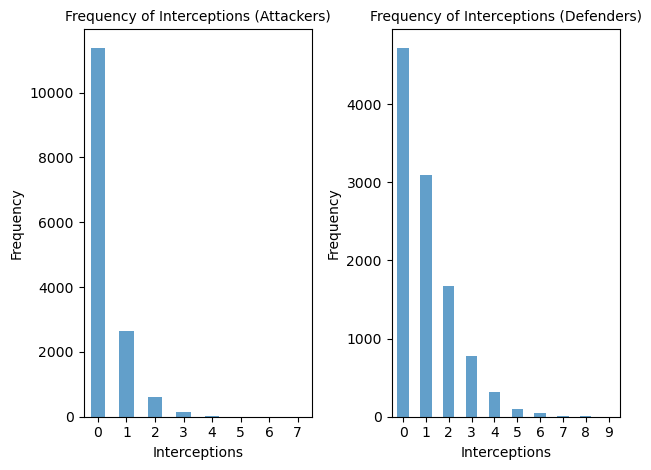

In [118]:
attackers_interceptions_count = attackers_defdat['Interceptions'].value_counts().sort_index()
defenders_interceptions_count = defenders_defdat['Interceptions'].value_counts().sort_index()

fig, axes = plt.subplots(1, 2)
attackers_interceptions_count.plot(kind = 'bar', alpha = 0.7, ax = axes[0])
axes[0].set_xlabel('Interceptions')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Frequency of Interceptions (Attackers)', fontsize = 10)
axes[0].set_xticklabels(axes[0].get_xticks(), rotation = 0)

defenders_interceptions_count.plot(kind = 'bar', alpha = 0.7, ax = axes[1])
axes[1].set_xlabel('Interceptions')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Frequency of Interceptions (Defenders)', fontsize = 10)
axes[1].set_xticklabels(axes[1].get_xticks(), rotation = 0)

plt.tight_layout()
plt.show()

We see a similar pattern where the frequency of interceptions is much greater for observations who have played in defensive positions. 

#### Blocks 

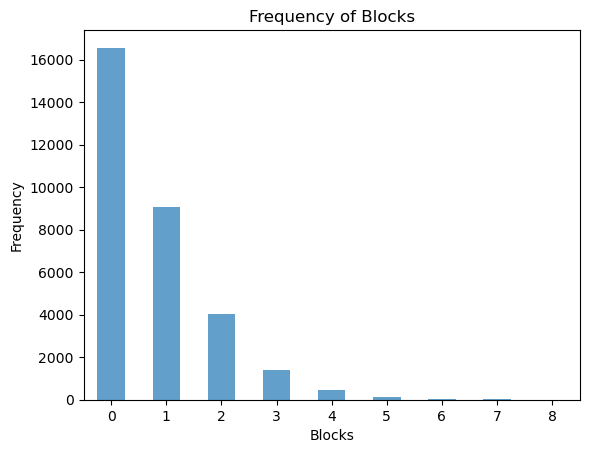

In [119]:
blocks_count = att_explore['Blocks'].value_counts().sort_index()

fig, ax = plt.subplots()

blocks_count.plot(kind = 'bar', alpha = 0.7)

ax.set_xlabel('Blocks')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Blocks')
#set_xticks is used to only have certain values on the x axis. without this on, every x axis value was printed, which meant that the x axis values overlapped, affecting readability 
# ax.set_xticks(range(1, 200, 10))
# ax.set_xticklabels(range(1, 200, 10))

plt.xticks(rotation = 0)
plt.show()

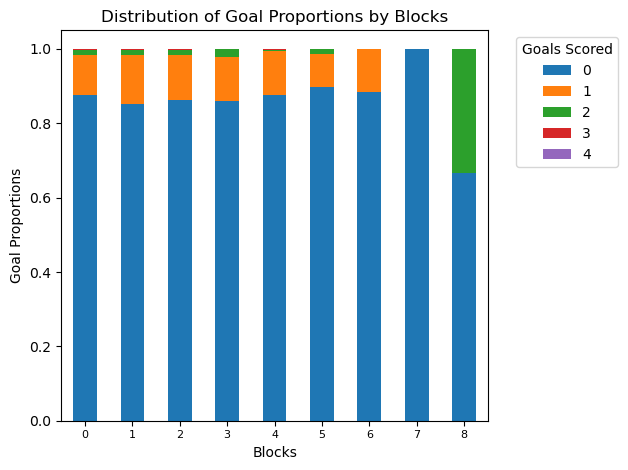

In [120]:
goals_by_blocks = att_explore.groupby(['Blocks', 'Goals']).size().unstack(fill_value = 0)
goalprop_by_blocks = goals_by_blocks.div(goals_by_blocks.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_blocks.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Blocks')
ax.set_xlabel('Blocks')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 0, size = 8)
plt.tight_layout()
plt.show()

Somewhat surprisingly, it doesn't appear to be any relationship between the number of blocks, and the proportion of observations that have scored at least one goal. The reason for this is unclear, perhaps there isn't such a distinct relationship between the number of blocks and position? 

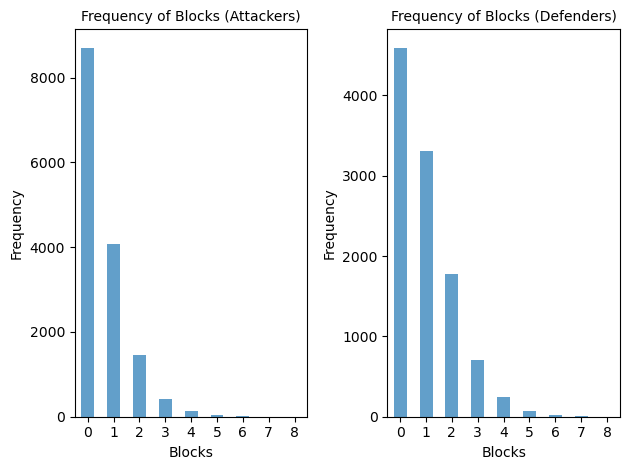

In [121]:
attackers_blocks_count = attackers_defdat['Blocks'].value_counts().sort_index()
defenders_blocks_count = defenders_defdat['Blocks'].value_counts().sort_index()

fig, axes = plt.subplots(1, 2)
attackers_blocks_count.plot(kind = 'bar', alpha = 0.7, ax = axes[0])
axes[0].set_xlabel('Blocks')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Frequency of Blocks (Attackers)', fontsize = 10)
axes[0].set_xticklabels(axes[0].get_xticks(), rotation = 0)

defenders_blocks_count.plot(kind = 'bar', alpha = 0.7, ax = axes[1])
axes[1].set_xlabel('Blocks')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Frequency of Blocks (Defenders)', fontsize = 10)
axes[1].set_xticklabels(axes[1].get_xticks(), rotation = 0)

plt.tight_layout()
plt.show()

The plots above don't seem to indicate that the distribution of 'Blocks' is similar when comparing defensive and attacking players. However, we can definitely say that the proportion of observations that have scored at least 1 goal is similar across different 'Blocks' values. Ultimately, this means that the number of Blocks made by a particular observation doesn't appear to have any significant relationship with the number of goals that are scored. 

### xG and npxG Feature Exploration

xG and npxG stand for Expected Goals and Non-Penalty Expected Goals respectively. For each shot that is taken, an xG value is given which classifies the probability of that shot resulting in a goal. For example, a shot with an xG value of 0.8 means that this shot will result in a goal 8 out of 10 times. We expect there to be a strong relationship between both xG and npxG and goals scored. 

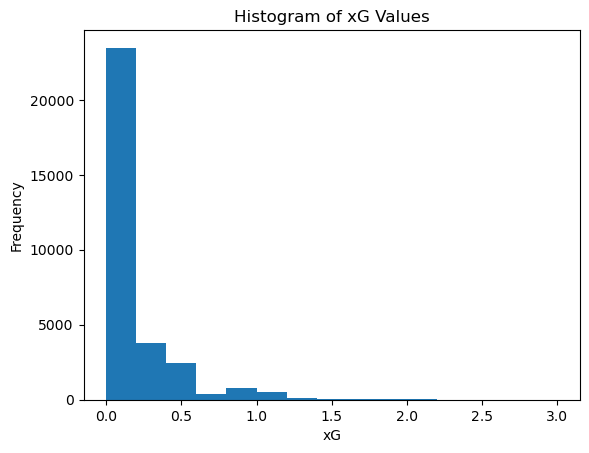

In [122]:
plt.figure()

plt.hist(att_explore['xG'], bins = 15)
plt.title('Histogram of xG Values')
plt.xlabel('xG')
plt.ylabel('Frequency')
plt.show()

We can see that majority of the xG values are situated around the 0 mark. There are also some extreme values of xG going up to 3. 

In [123]:
att_explore['xG'].max()

3.0

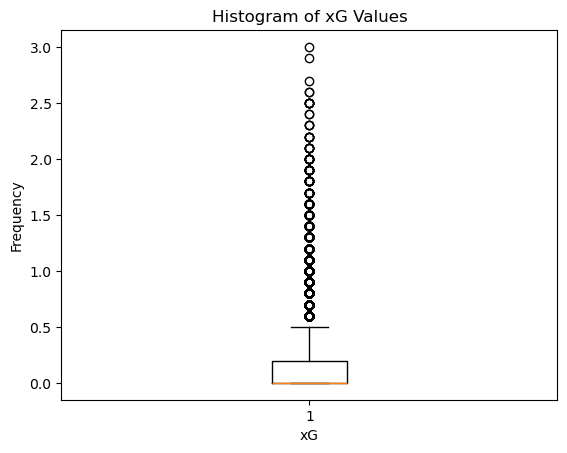

In [124]:
plt.figure()

plt.boxplot(att_explore['xG'])
plt.title('Histogram of xG Values')
plt.xlabel('xG')
plt.ylabel('Frequency')
plt.show()

This boxplot doesn't really give us any additional information about the distribution of the 'xG' feature. We now know that there are a lot of xG values equal to or close to 0. We could try removing these values and replotting to see if we can get a better idea into the distribution of the non-zero xG values.

In [125]:
zero_xg_pct = (att_explore['xG'] == 0).sum()/len(att_explore)*100
zero_xg_pct = round(zero_xg_pct, 2)

print(str(zero_xg_pct) + '% of the observations have xG values equal to zero')

52.21% of the observations have xG values equal to zero


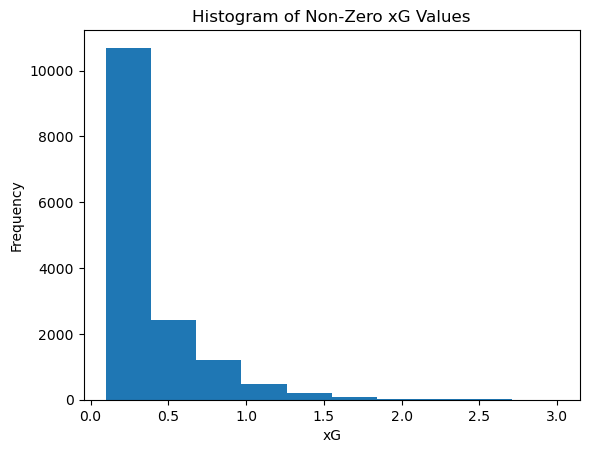

In [126]:
nonzero_xgdat = att_explore[att_explore['xG'] != 0]


plt.figure()

plt.hist(nonzero_xgdat['xG'], bins = 10)
plt.title('Histogram of Non-Zero xG Values')
plt.xlabel('xG')
plt.ylabel('Frequency')
plt.show()

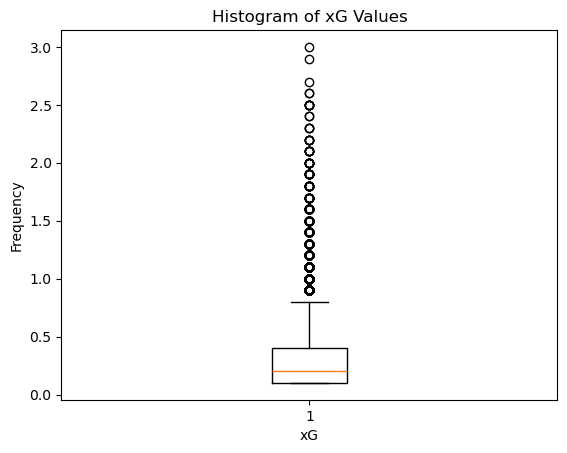

In [127]:
plt.figure()

plt.boxplot(nonzero_xgdat['xG'])
plt.title('Histogram of xG Values')
plt.xlabel('xG')
plt.ylabel('Frequency')
plt.show()

So even when removing all of the observations with xG = 0, we can still see that the xG values are heavily right-skewed. Let's now take a look at the box plots when the non-zero xG observations are sorted by the number of goals scored. 

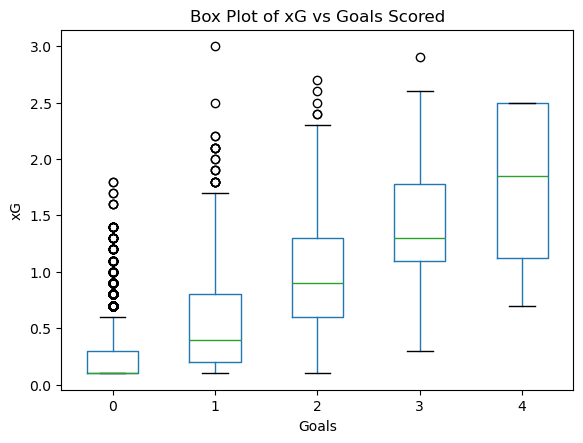

In [128]:
plt.figure
nonzero_xgdat.boxplot(column = 'xG', by = 'Goals', grid = False)
plt.title('Box Plot of xG vs Goals Scored')
plt.suptitle('')
plt.xlabel('Goals')
plt.ylabel('xG')
plt.show()

We can see a very clear pattern showing us that the median value of xG is increasing by the number of goals scored. This gives us reason to believe that xG is an important predictor of Goals. We know based on the how xG is defined that this metric should closely match the number of goals scored. To investigate this, let's calculate the difference between Goals and xG for each observation, and visualise the resulting array. 

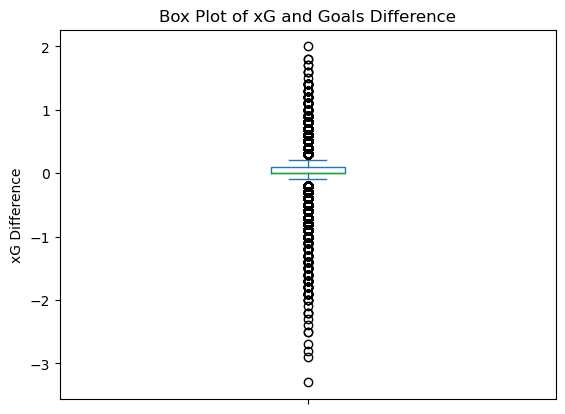

In [129]:
xg_diff = att_explore['xG'] - att_explore['Goals']

xg_diff.plot(kind = 'box')
plt.title('Box Plot of xG and Goals Difference')
plt.suptitle('')
plt.ylabel('xG Difference')
plt.show()

The object xg_diff was computed by taking the difference of xG and Goals for each observation. We can see that the median xg_diff value is close to zero. This makes sense because this means that on average, a player with an xG of 1 will score 1 goal etc. There are some outliers, and it appears that there are more negative outliers than positive outliers. What this means is that the frequency of observations with a negative xg_diff (the number of goals scored being greater than the xG) is greater than the frequency of observations with a positive xg_diff (number of goals scored < xG). 

Another thing we can take a look at is the relationship between xG and Shots/SOT. 

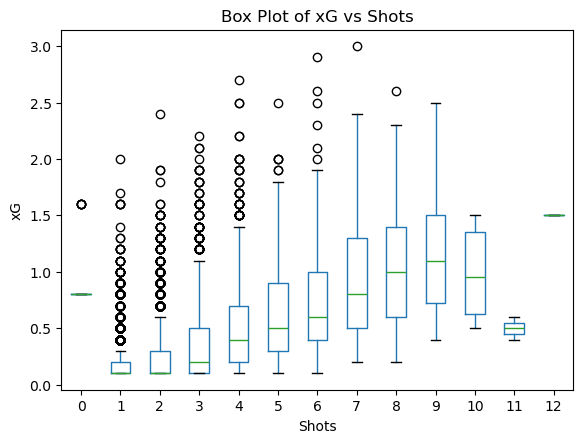

In [130]:
plt.figure
nonzero_xgdat.boxplot(column = 'xG', by = 'Shots', grid = False)
plt.title('Box Plot of xG vs Shots')
plt.suptitle('')
plt.xlabel('Shots')
plt.ylabel('xG')
plt.show()

As expected, the general pattern is increasing median values for xG as the number of shots increase. For some reason, the boxplot for the observations with 0 shots is a bit weird. Upon further investigation, we remember that penalties are not recorded as shots. However, each penalty has an xG value of 0.79, which is why the median xG for the observations with 0 shots is at that number (remember that this plot only has observations with non-zero xG)

Let's now have a look at the relationship between xG and npxG. Since they record very similar things, we want to have a look at which feature provides us with more information. 

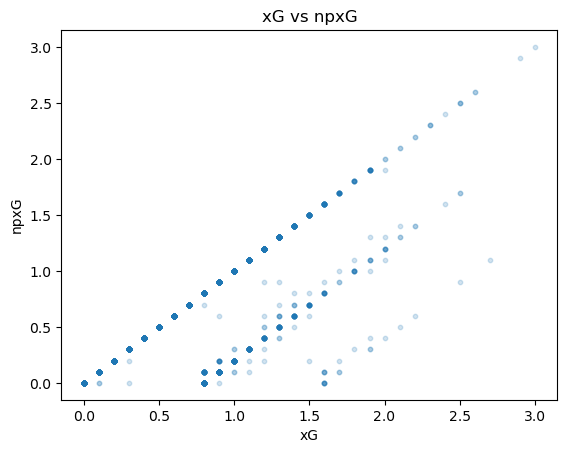

In [131]:
plt.figure()

plt.scatter(att_explore['xG'], att_explore['npxG'], alpha = 0.2, s = 10)
plt.title('xG vs npxG')
plt.xlabel('xG')
plt.ylabel('npxG')
plt.show()

There are a few things to note. The first is that we see a large number of observations where xG = npxG (these are the observations that lie on the y = x line). In other words, these are the observations that do not contain any penalties being taken, as their xG is equal to their xG excluding penalties (npxG). We can also notice that there are no observations that lie above the y=x line. In other words, there are no observations where the npxG is greater than the xG. This also makes sense. 

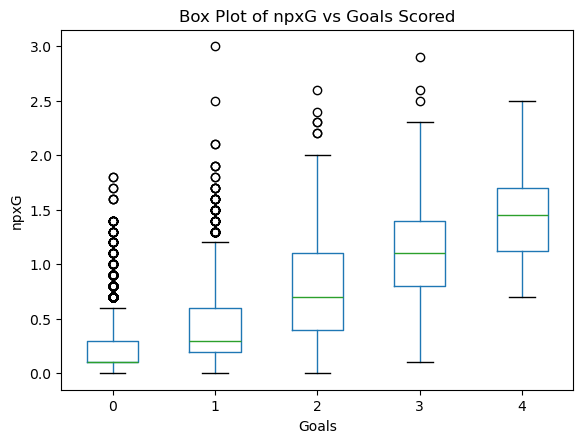

In [132]:
plt.figure
nonzero_xgdat.boxplot(column = 'npxG', by = 'Goals', grid = False)
plt.title('Box Plot of npxG vs Goals Scored')
plt.suptitle('')
plt.xlabel('Goals')
plt.ylabel('npxG')
plt.show()

We can see that the relationship between 'Goals' and 'npxG' is very similar to the relationship between 'Goals' and 'xG'. The only slight difference that we can see is that the difference in npxG between successive number of goals scored isn't as large. This does make sense, because we are now excluding very large xG shots (penalties) from the metric. With regards to which feature to include, it may be best to include 'npxG' over 'xG', whilst also at the same time including a feature related to penalties (i.e. Penalties Taken). 

### xAG Feature Exploration

xAG is refers to the 'Expected Goals Assisted' for a particular player in a particular match. As this metric is more closely related to chance creation and assists, we don't expect there to be a strong relationship between xAG and Goals. 

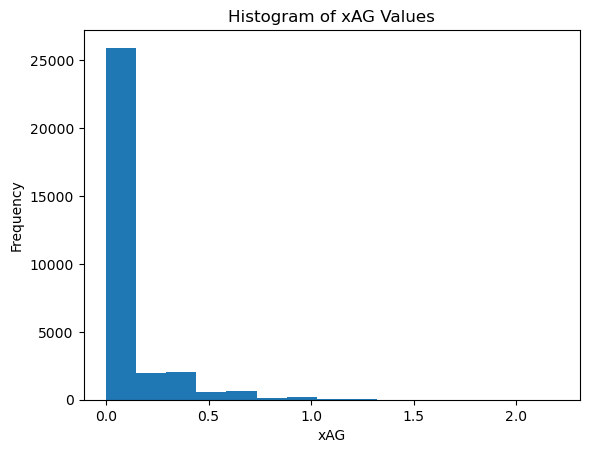

In [133]:
plt.figure()

plt.hist(att_explore['xAG'], bins = 15)
plt.title('Histogram of xAG Values')
plt.xlabel('xAG')
plt.ylabel('Frequency')
plt.show()

So an overwhelming majority of the observations have xAG values equal to zero.

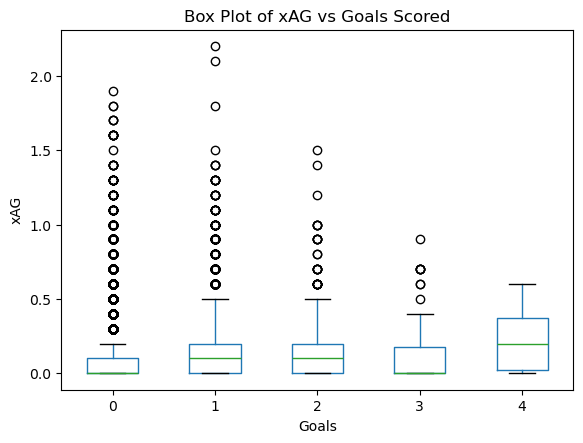

In [134]:
plt.figure
nonzero_xgdat.boxplot(column = 'xAG', by = 'Goals', grid = False)
plt.title('Box Plot of xAG vs Goals Scored')
plt.suptitle('')
plt.xlabel('Goals')
plt.ylabel('xAG')
plt.show()

This box plot shows that the median xAG value doesn't really differ across different goals scored. The median xAG values for observations that have either scored 1 or 2 goals does seem to be slightly higher than the median xAG values for observation that have scored 0 goals, but this is most likely captured by the fact that attacking players are simultaneously more likely to accumulate xAG and to score goals. Instead, we believe that xAG is more likely to be correlated with 'Assists'. 

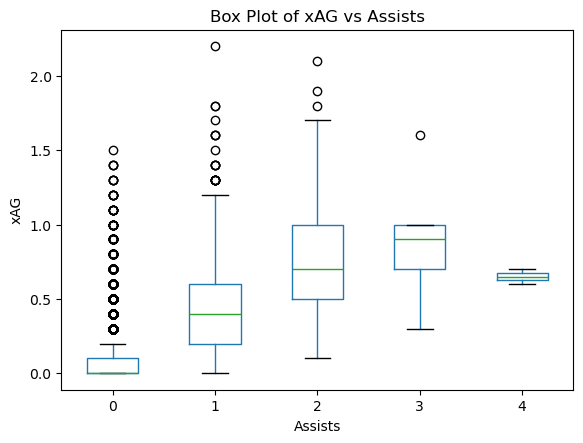

In [135]:
plt.figure
nonzero_xgdat.boxplot(column = 'xAG', by = 'Assists', grid = False)
plt.title('Box Plot of xAG vs Assists')
plt.suptitle('')
plt.xlabel('Assists')
plt.ylabel('xAG')
plt.show()

Here, we see a much clearer relationship between xAG and Assists. There does seem to be an outlier at 4 assists, where the median xAG value for observations with 4 assists is lower than the median xAG value for observations with 2 or 3 assists. However, this is most likely attributed to the small sample size associated with observations with 4 assists in one game. 

### Shot/Goal Creating Actions Feature Exploration

Shot Creating Actions refer to any action (Live Ball, Deadball, Dribble etc.) that results in a shot. Goal Creating Actions refer to any action that results in a goal. As both of these metrics primarily capture information that has to do with the creativity of a player (i.e. their ability to perform different types of actions that result in either shots or goals), we don't expect there to be a strong relationship between these metrics and 'Goals. 

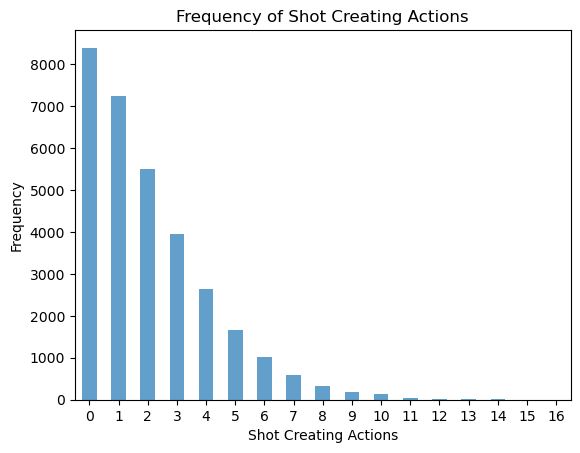

In [136]:
sca_count = att_explore['Shot Creating Actions'].value_counts().sort_index()

fig, ax = plt.subplots()

sca_count.plot(kind = 'bar', alpha = 0.7)

ax.set_xlabel('Shot Creating Actions')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Shot Creating Actions')

plt.xticks(rotation = 0)
plt.show()

Majority of the observations have SCA equal to zero. The dataframe also contains information about each type of SCA (Deadball, Live, Dribble etc.). We first want to make sure that the sum of the different types of SCA is equal to the total SCA for each observation. We then want to plot the frequency of each type of SCA for each total SCA value. 

In [137]:
(att_explore['Shot Creating Actions'] == att_explore['Live SCA'] + att_explore['Deadball SCA'] + att_explore['Take-on SCA'] 
 + att_explore['Shot SCA'] + att_explore['Foul SCA'] + att_explore['Defense SCA']).sum() - len(att_explore)

0

The above code confirms that the Total SCA is equal to the sum of each constituent SCA for all of the observations. 

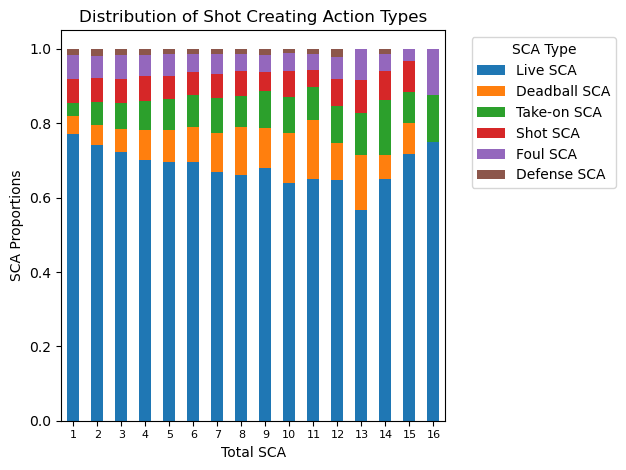

In [138]:
#sca_types is a new dataframe that only includes the columns related to Shot Creating Actions
sca_types = att_explore[['Live SCA', 'Deadball SCA', 'Take-on SCA', 'Shot SCA', 'Foul SCA', 'Defense SCA', 'Shot Creating Actions']].copy()

#grouping the Shot Creating Actions and then summing 
grouped_sca = sca_types.groupby('Shot Creating Actions').sum()
total_sca = grouped_sca.sum(axis = 1)

#proportion of each sca type 
sca_prop = grouped_sca.div(total_sca, axis = 0)

#drop the first row (this is the row for 0 shot creating actions)
sca_prop = sca_prop[sca_prop.index != 0]

#plotting the results
fig, ax = plt.subplots()

sca_prop.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Shot Creating Action Types')
ax.set_xlabel('Total SCA')
ax.set_ylabel('SCA Proportions')
ax.legend(title = 'SCA Type', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 0, size = 8)
plt.tight_layout()
plt.show()

We can see that Live SCA dominates the Total SCA across the board. The proportion of SCA being Deadball SCA also increases as the Total SCA increases. This is likewise the case with Take-on SCA. The proportion of SCA being Shot SCA stays relatively constant throughout, whilst it appears that the proportion of Foul SCA decreases as the Total SCA increases. 

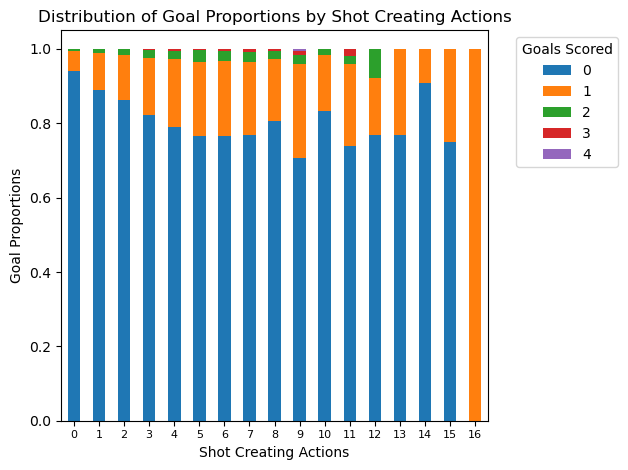

In [139]:
goals_by_sca = att_explore.groupby(['Shot Creating Actions', 'Goals']).size().unstack(fill_value = 0)
goalprop_by_sca = goals_by_sca.div(goals_by_sca.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_sca.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Shot Creating Actions')
ax.set_xlabel('Shot Creating Actions')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 0, size = 8)
plt.tight_layout()
plt.show()

There seems to be a steady increase in the proportion of observations having scored at least 1 goal as the number of shot creating actions increaes from 0 to 5. However, this pattern seems to tail off and become quite erratic. Whether or not this is due to a small sample size is unclear. The fact that increasing SCA leads to an increased proportion of observations having scored at least 1 goal isn't necessarily surprising, since attacking players are simultaneously more likely to accumulate SCA's as well as goals. We could potentially look into this by reproducing the same plot, but only for attacking players for example. If what we said is true, we would expect to see no/little relationship between SCA and Goal Proportions. 

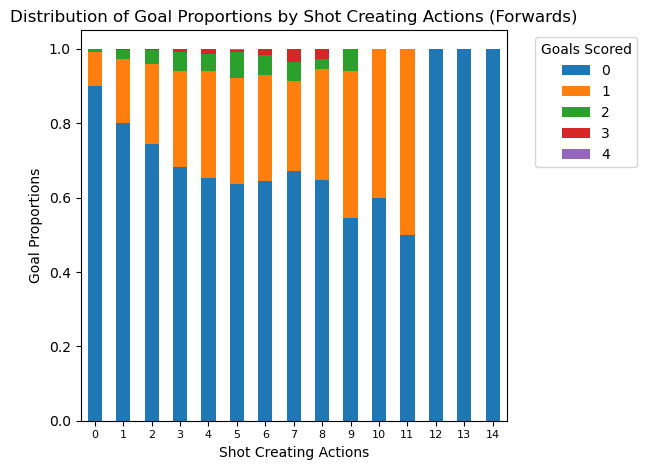

In [140]:
attackers_condition = (att_explore['FW'] == 1) 
attackers_sca_df = att_explore[attackers_condition][['Shot Creating Actions', 'Goals']]

attackers_goals_by_sca = attackers_sca_df.groupby(['Shot Creating Actions', 'Goals']).size().unstack(fill_value = 0)
attackers_goalprop_by_sca = attackers_goals_by_sca.div(attackers_goals_by_sca.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

attackers_goalprop_by_sca.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Shot Creating Actions (Forwards)')
ax.set_xlabel('Shot Creating Actions')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 0, size = 8)
plt.tight_layout()
plt.show()

Perhaps surprisingly, the aforementioned pattern is still there. An increase in the number of total shot creating actions is associated with an increase in the proportion of observations recording at least 1 goal. Therefore, we should discard our initial hypothesis of there being no relationship between SCA and Goals. Let's have a look next at the relationship between Goals and different types of SCA. 

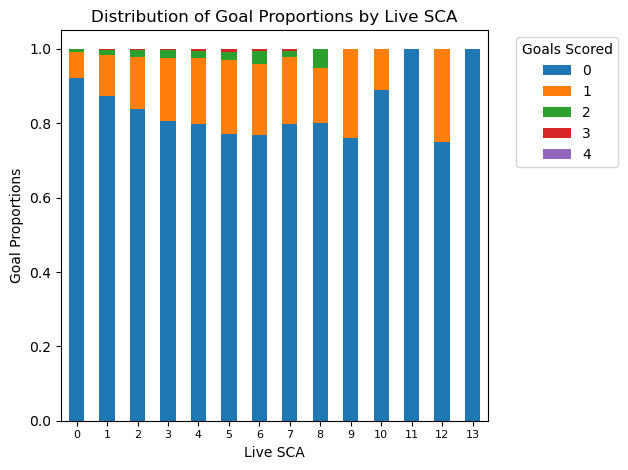

In [141]:
goals_by_livesca = att_explore.groupby(['Live SCA', 'Goals']).size().unstack(fill_value = 0)
goalprop_by_sca = goals_by_livesca.div(goals_by_livesca.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_sca.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Live SCA')
ax.set_xlabel('Live SCA')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 0, size = 8)
plt.tight_layout()
plt.show()

Similar pattern to above, where we see a gradual increase in the proportion of observations recording at least 1 goal as the number of Live SCA increases up to a point. Then the pattern gets a bit messy. 

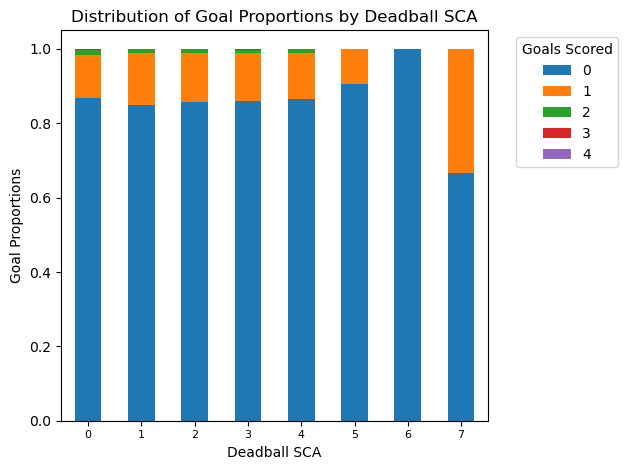

In [142]:
goals_by_deadballsca = att_explore.groupby(['Deadball SCA', 'Goals']).size().unstack(fill_value = 0)
goalprop_by_deadballsca = goals_by_deadballsca.div(goals_by_deadballsca.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_deadballsca.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Deadball SCA')
ax.set_xlabel('Deadball SCA')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 0, size = 8)
plt.tight_layout()
plt.show()

It is interesting to see that there appears to be no relationship between Deadball SCA and Goal Proportions. We can see that the proportion of observations that have recorded at least 1 goal is basically the same regardless of the number of Deadball SCA. This does make sense, because we don't expect freekick or corner takers to be any more likely to score goals compared to other players. 

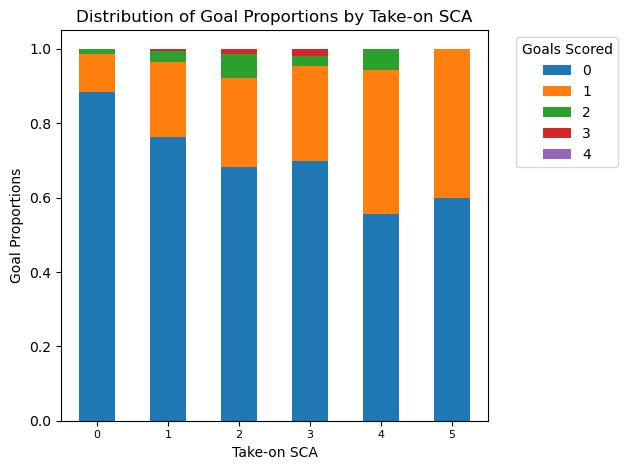

In [143]:
goals_by_takeonsca = att_explore.groupby(['Take-on SCA', 'Goals']).size().unstack(fill_value = 0)
goalprop_by_takeonsca = goals_by_takeonsca.div(goals_by_takeonsca.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_takeonsca.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Take-on SCA')
ax.set_xlabel('Take-on SCA')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 0, size = 8)
plt.tight_layout()
plt.show()

There does appear to be a relationship between the proportion of observations that have recorded at least 1 goal and the number of Take-on SCA accumulated. 

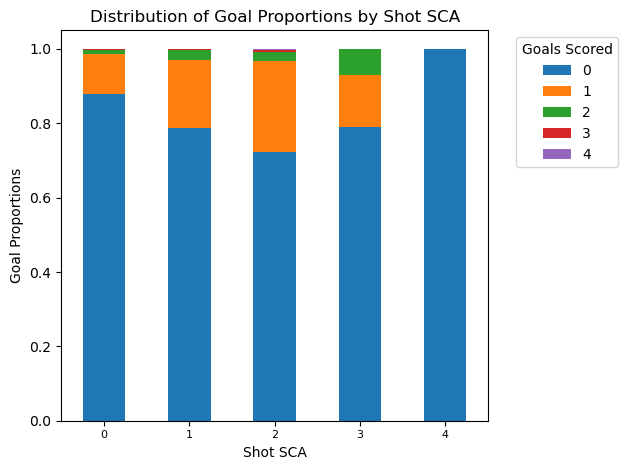

In [144]:
goals_by_shotsca = att_explore.groupby(['Shot SCA', 'Goals']).size().unstack(fill_value = 0)
goalprop_by_shotsca = goals_by_shotsca.div(goals_by_shotsca.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_shotsca.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Shot SCA')
ax.set_xlabel('Shot SCA')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 0, size = 8)
plt.tight_layout()
plt.show()

Interestingly, there doesn't appear to be a relationship between Shot SCA and Goal Proportions. This surprising because I would've expected Shot SCA to have the strongest relationship with Goals, out of all of the different types of SCA. This is because those in a position to accumulate a shot creating action by having a shot themselves are probably the same players that are more likely to be in shooting positions. We saw previously the relationship between shots and goals, so there was some expectation from me of a relationship between these two features. However, the plot seems to say otherwise. 

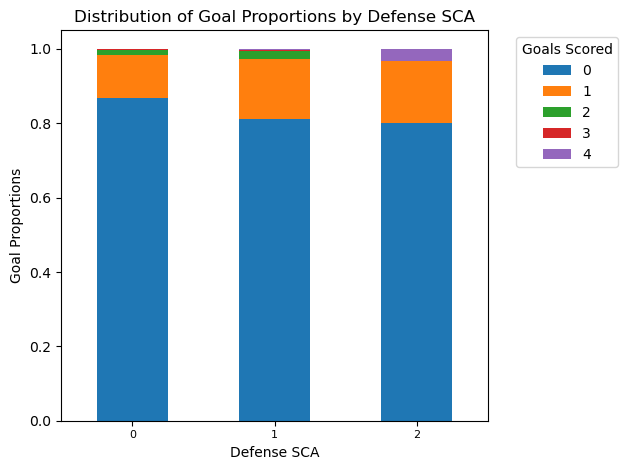

In [145]:
goals_by_defensesca = att_explore.groupby(['Defense SCA', 'Goals']).size().unstack(fill_value = 0)
goalprop_by_defensesca = goals_by_defensesca.div(goals_by_defensesca.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_defensesca.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Defense SCA')
ax.set_xlabel('Defense SCA')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 0, size = 8)
plt.tight_layout()
plt.show()

The plot above shows us that it is unlikely there is any relationship between the number of Defense SCA and Goals. Although this is expected, we should also keep in mind that the number of observations with Defence SCA's is quite low. In other words, the small sample size may actually be hiding an underlying relationship, although this is unlikely. It is also interesting that there appears to be an observation that recorded 4 goals and 2 Defense SCA's, just for interest let's take a look. 

In [146]:
att_explore[(att_explore['Defense SCA'] == 2) & (att_explore['Goals'] == 4)]

Player ID  Day  Matchweek Venue Result             Team Opponent Start  \
2455         36  Sat         34  Home  W 5–1  Manchester City  Watford     Y   

     Position  Minutes Played  ...  RB  RM  RW  WB  Defenders  Midfielders  \
2455    RW,LW              90  ...   0   0   1   0          0            0   

      Wide Midfielders  Wingers  Penalty Success Rate  SOT Percentage  
2455                 0        1                   1.0             0.6  

[1 rows x 128 columns]

This observation refers to the data for Gabriel Jesus in the match he played for Man City vs Watford. The 2 defensive SCA is probably from Jesus tackling/intercepting the opposition passes which led to a shot. This tracks because Gabriel Jesus is known as one of the best pressers in the league. 

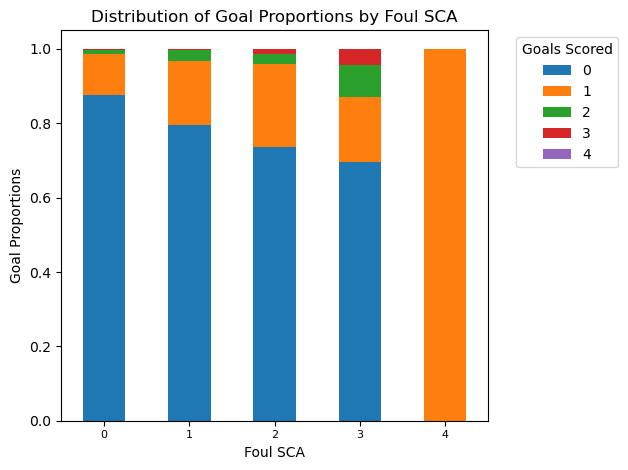

In [147]:
goals_by_foulsca = att_explore.groupby(['Foul SCA', 'Goals']).size().unstack(fill_value = 0)
goalprop_by_foulsca = goals_by_foulsca.div(goals_by_foulsca.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_foulsca.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Foul SCA')
ax.set_xlabel('Foul SCA')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 0, size = 8)
plt.tight_layout()
plt.show()

There appears to be a significant relationship between the number of Foul SCA accumulated and the proportion of observations that record at least 1 goal. In fact, every single observation that recorded 4 Foul SCA scored 1 goal. Let's have a look to see whether this is a sample size issue. 

In [148]:
att_explore[att_explore['Foul SCA'] == 4]

Player ID  Day  Matchweek Venue Result       Team Opponent Start  \
21141        294  Sat          5  Away  D 2–2  Liverpool  Everton     Y   

      Position  Minutes Played  ...  RB  RM  RW  WB  Defenders  Midfielders  \
21141    LW,FW              90  ...   0   0   0   0          0            0   

       Wide Midfielders  Wingers  Penalty Success Rate  SOT Percentage  
21141                 0        1                   NaN             0.5  

[1 rows x 128 columns]

So we can see that there was only 1 observation in the entire dataset that recorded 4 Foul SCA's. 

The pattern that the plot above shows is quite unexpected. Let's try to investigate this further by first looking into what positions are more likely to accumulate Foul SCA. My impression is that players that play in either a FW or Winger position will accumulate the most Foul SCA. 

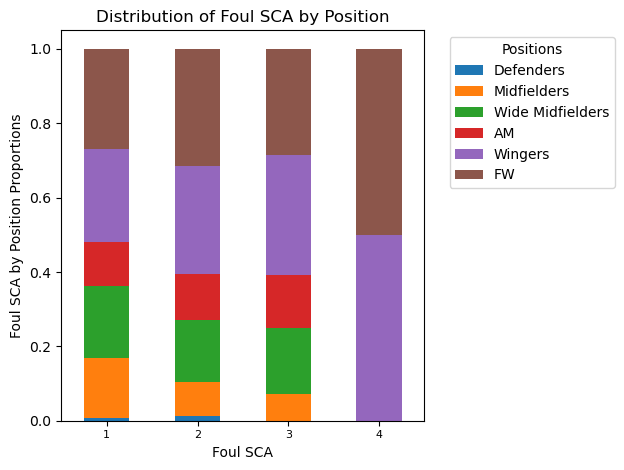

In [149]:
#foulsca_by_pos is a new dataframe that only includes the columns related to Shot Creating Actions
foulsca_by_pos = att_explore[['Foul SCA', 'Defenders', 'Midfielders', 'Wide Midfielders', 'AM', 'Wingers', 'FW']].copy()

#grouping the Shot Creating Actions and then summing 
grouped_foulsca = foulsca_by_pos.groupby('Foul SCA').sum()
total_foulsca = grouped_foulsca.sum(axis = 1)

#proportion of each sca type 
sca_prop = grouped_foulsca.div(total_foulsca, axis = 0)

#drop the first row (this is the row for 0 shot creating actions)
sca_prop = sca_prop[sca_prop.index != 0]

#plotting the results
fig, ax = plt.subplots()

sca_prop.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Foul SCA by Position')
ax.set_xlabel('Foul SCA')
ax.set_ylabel('Foul SCA by Position Proportions')
ax.legend(title = 'Positions', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 0, size = 8)
plt.tight_layout()
plt.show()

We can see that wingers and FW positions dominate the observations that have accumulated at least 1 Foul SCA. This is as expected. However, we can see that the proportion of either Wingers/FW that are accumulating Foul SCA doesn't increase with increases in Foul SCA. In other words, the pattern we saw previously cannot be attributed to the position played by each player. Let's now plot Foul SCA against xG to see if there is any noticeable relationship. 

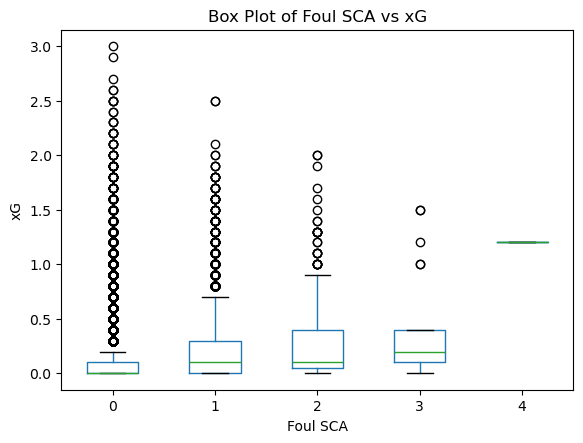

In [150]:
plt.figure
att_explore.boxplot(column = 'xG', by = 'Foul SCA', grid = False)
plt.title('Box Plot of Foul SCA vs xG')
plt.suptitle('')
plt.xlabel('Foul SCA')
plt.ylabel('xG')
plt.show()

So it appears that the median xG value for different Foul SCA doesn't really differ too much. There are also quite a few outliers especially for the observations with 0 Foul SCA. This is quite unexpected, given the pattern we saw between Foul SCA and Goal Proportions, as well as the known relationship between xG and Goals. 

Finally, let's have a quick look at the relationship between SCA and Assists. We expect there to be a stronger relationship between these two features, since SCA is a metric that better captures the creativity/chance creation of a player, rather than their ability to score goals. 

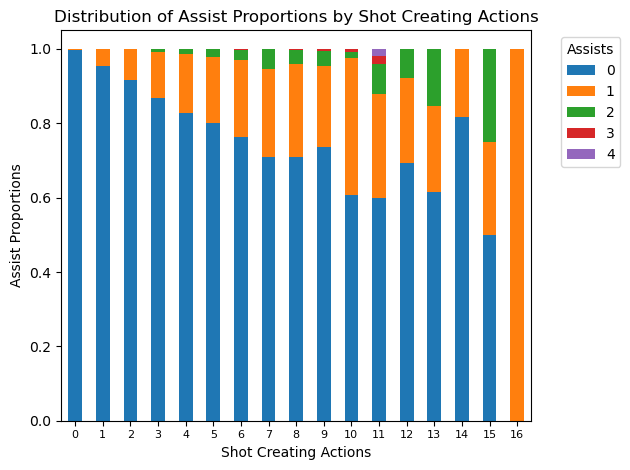

In [151]:
assists_by_sca = att_explore.groupby(['Shot Creating Actions', 'Assists']).size().unstack(fill_value = 0)
assistprop_by_sca = assists_by_sca.div(assists_by_sca.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

assistprop_by_sca.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Assist Proportions by Shot Creating Actions')
ax.set_xlabel('Shot Creating Actions')
ax.set_ylabel('Assist Proportions')
ax.legend(title = 'Assists', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 0, size = 8)
plt.tight_layout()
plt.show()

Similarly, we can see a steady increase in the proportion of observations that record an assist, as the number of SCA increases. This continues until approximately 7 SCA. After this point, the pattern gets a bit more muddled, but this is probably due to sample size issues. 

#### Goal Creating Actions (GCA)

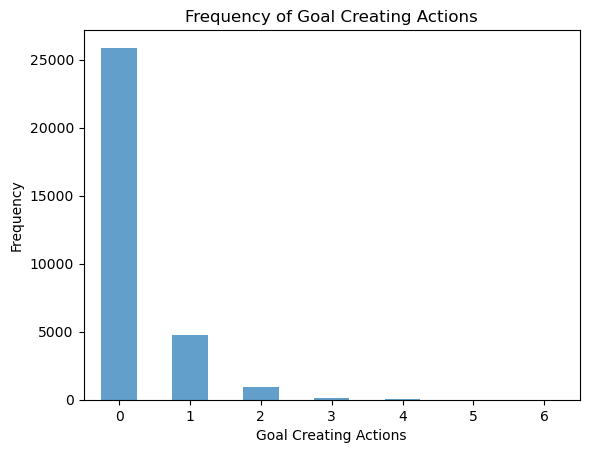

In [152]:
gca_count = att_explore['Goal Creating Actions'].value_counts().sort_index()

fig, ax = plt.subplots()

gca_count.plot(kind = 'bar', alpha = 0.7)

ax.set_xlabel('Goal Creating Actions')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Goal Creating Actions')

plt.xticks(rotation = 0)
plt.show()

In comparison to SCA, we can see that the number of observations with GCA = 0 is a lot more. It appears that it is more common for players to accumulate no GCA. 

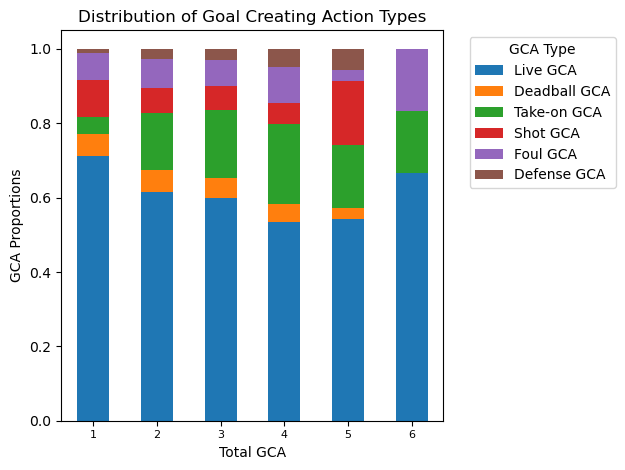

In [153]:
#gca_types is a new dataframe that only includes the columns related to Shot Creating Actions
gca_types = att_explore[['Live GCA', 'Deadball GCA', 'Take-on GCA', 'Shot GCA', 'Foul GCA', 'Defense GCA', 'Goal Creating Actions']].copy()

#grouping the Shot Creating Actions and then summing 
grouped_gca = gca_types.groupby('Goal Creating Actions').sum()
total_gca = grouped_gca.sum(axis = 1)

#proportion of each sca type 
gca_prop = grouped_gca.div(total_gca, axis = 0)

#drop the first row (this is the row for 0 shot creating actions)
gca_prop = gca_prop[gca_prop.index != 0]

#plotting the results
fig, ax = plt.subplots()

gca_prop.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Creating Action Types')
ax.set_xlabel('Total GCA')
ax.set_ylabel('GCA Proportions')
ax.legend(title = 'GCA Type', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 0, size = 8)
plt.tight_layout()
plt.show()

So once again, Live GCA dominates the types of GCA. This is closely followed by Take-on GCA (this is different to SCA, where the next most common type of SCA was Deadball SCA). There seem to be some outliers, where Shot GCA appears to be quite common when a player accumulates either 1 or 5 GCA, but much less common if the GCA accumulated is equal to 2, 3 or 4. In contrast to SCA, Deadball GCA is consistently one of the least common types of GCA. This perhaps speaks to the fact that deadballs (i.e. freekicks or corners) are good opportunities to generate a shot, but bad opportunities to generate a goal. In other words, a chance is generated, but not a very good chance. 

GCA and Assists appear to be closely related to each other. Let's first investigate the relationship between these two features. 

In [154]:
#first, let's look at whether or not GCA = Assists for each observation 
gca_notequal_assists = att_explore[~(att_explore['Goal Creating Actions'] == att_explore['Assists'])]
gca_notequal_assists

Player ID  Day  Matchweek Venue Result             Team  \
168            3  Sun         38  Home  W 5–0  Manchester City   
5552          89  Sat         22  Home  W 1–0  Manchester City   
35001        463  Sun         21  Away  D 2–2        Liverpool   
38830        514  Sat         17  Home  W 3–0    Newcastle Utd   
5876          92  Sat         28  Away  D 1–1   Leicester City   
...          ...  ...        ...   ...    ...              ...   
3235          47  Sun         37  Home  D 1–1     Leeds United   
1402          21  Sat         37  Home  L 2–3     Cardiff City   
10927        152  Sun         32  Away  L 1–2   Crystal Palace   
34087        454  Tue          5  Away  D 1–1          Everton   
24883        340  Sat          1  Home  D 1–1      Bournemouth   

             Opponent Start Position  Minutes Played  ...  RB  RM  RW  WB  \
168      Norwich City    Y*       LM              84  ...   0   0   0   0   
5552          Chelsea    Y*       AM              83  ...   0   0   0   0   
35001         Chelsea     Y       CM              90  ...   0   0   0   0   
38830          Fulham     Y       LW              83  ...   0   0   0   0   
5876        Brentford     Y       DM              90  ...   0   0   0   0   
...               ...   ...      ...             ...  ...  ..  ..  ..  ..   
3235         Brighton     Y       FW              90  ...   0   0   0   0   
1402   Crystal Palace     Y    CM,FW              90  ...   0   0   0   0   
10927  Leicester City     Y       LW              90  ...   0   0   0   0   
34087    Leeds United     Y       RW              90  ...   0   0   1   0   
24883        West Ham     Y       FW              90  ...   0   0   0   0   

       Defenders  Midfielders  Wide Midfielders  Wingers  \
168            0            0                 1        0   
5552           0            0                 0        0   
35001          0            1                 0        0   
38830          0            0                 0        1   
5876           0            1                 0        0   
...          ...          ...               ...      ...   
3235           0            0                 0        0   
1402           0            1                 0        0   
10927          0            0                 0        1   
34087          0            0                 0        1   
24883          0            0                 0        0   

       Penalty Success Rate  SOT Percentage  
168                     NaN        0.200000  
5552                    NaN        0.750000  
35001                   NaN             NaN  
38830                   NaN        0.250000  
5876                    NaN        0.000000  
...                     ...             ...  
3235                    NaN        0.000000  
1402                    NaN        1.000000  
10927                   0.0        0.250000  
34087                   NaN        0.000000  
24883                   NaN        0.666667  

[3949 rows x 128 columns]

So there are 3949 observations where GCA does not equal Assists. Let's have a look at how the counts differ for these observations. 

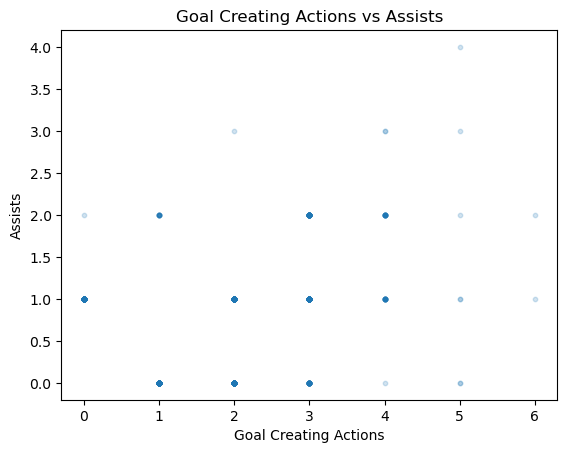

In [155]:
plt.figure()

plt.scatter(gca_notequal_assists['Goal Creating Actions'], gca_notequal_assists['Assists'], alpha = 0.2, s = 10)
plt.title('Goal Creating Actions vs Assists')
plt.xlabel('Goal Creating Actions')
plt.ylabel('Assists')
plt.show()

Interestingly, there are a wide range of possible combinations. For example, there are certain observations where the number of Assists is larger than the number of GCA (How is this possible?). There are also quite a few observations where the number of GCA are larger than the number of Assists. According to https://mtag.substack.com/p/data-explainers, a GCA is accumulated if the player is involved in of the last two offensive actions leading up to a goal. Although this explains why certain players have more GCA than Assists (for example, if they complete a take-on, pass the ball to another player who then assists the goal, this player will have accumulated 1 Take-on GCA, but not an assist), it doesn't explain why there are certain observatoins with more Assists than GCA. We can further filter the dataset to investigate. 

In [156]:
gca_notequal_assists[gca_notequal_assists['Assists'] > gca_notequal_assists['Goal Creating Actions']]

Player ID  Day  Matchweek Venue Result            Team        Opponent  \
27791        373  Wed         34  Away  W 3–1       Liverpool        Brighton   
2250          33  Sat         35  Home  W 2–0     Aston Villa    Norwich City   
15101        204  Sat         29  Away  W 3–1  Crystal Palace         Burnley   
23217        322  Mon          2  Home  D 1–1       Liverpool  Crystal Palace   
846           15  Sun         35  Home  W 1–0         Everton         Chelsea   
...          ...  ...        ...   ...    ...             ...             ...   
1142          17  Fri          9  Away  L 1–3     Aston Villa         Arsenal   
7759         119  Tue          5  Away  D 1–1         Everton    Leeds United   
25836        351  Sun         32  Home  W 2–1  Leicester City  Crystal Palace   
5124          81  Sat         34  Away  W 3–0   Newcastle Utd    Norwich City   
1524          25  Sun         13  Away  W 2–1   Newcastle Utd       Tottenham   

      Start Position  Minutes Played  ...  RB  RM  RW  WB  Defenders  \
27791     Y       RW              90  ...   0   0   1   0          0   
2250      N       AM              15  ...   0   0   0   0          0   
15101     Y       CM              90  ...   0   0   0   0          0   
23217    Y*       LM              62  ...   0   0   0   0          0   
846       Y       LM              89  ...   0   0   0   0          0   
...     ...      ...             ...  ...  ..  ..  ..  ..        ...   
1142      N       RW              45  ...   0   0   1   0          0   
7759      Y       LM              90  ...   0   0   0   0          0   
25836     Y       RW              88  ...   0   0   1   0          0   
5124      Y    LW,FW              90  ...   0   0   0   0          0   
1524      Y       RM              90  ...   0   1   0   0          0   

       Midfielders  Wide Midfielders  Wingers  Penalty Success Rate  \
27791            0                 0        1                   NaN   
2250             0                 0        0                   NaN   
15101            1                 0        0                   NaN   
23217            0                 1        0                   NaN   
846              0                 1        0                   NaN   
...            ...               ...      ...                   ...   
1142             0                 0        1                   NaN   
7759             0                 1        0                   NaN   
25836            0                 0        1                   NaN   
5124             0                 0        1                   NaN   
1524             0                 1        0                   NaN   

       SOT Percentage  
27791           0.625  
2250            0.000  
15101           0.000  
23217           0.000  
846             0.500  
...               ...  
1142            0.500  
7759              NaN  
25836           0.000  
5124            1.000  
1524              NaN  

[105 rows x 128 columns]

So there are actually 105 observations that have more Assists than GCA. The reason why it is possible to have more Assists than GCA is still unclear. A quick search online did not yield any results. I suspect it has something to do with how a GCA is defined, compared to an Assist. For example, there may be certain situations where an Assist is given to a player, but the nature of the assist is such that it doesn't fall under any of the GCA categories, so a GCA is then not given. 

Let's now have a quick look at the relationship between GCA and Goals. We don't expect there to be any particular relationship between these two features, for similar reasons as discussed above.

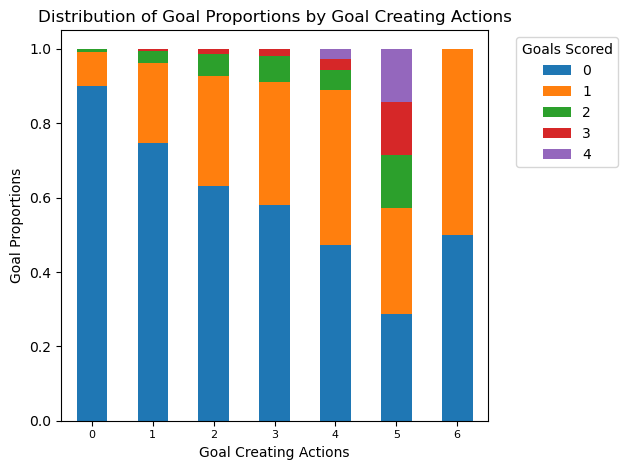

In [157]:
goals_by_gca = att_explore.groupby(['Goal Creating Actions', 'Goals']).size().unstack(fill_value = 0)
goalprop_by_gca = goals_by_gca.div(goals_by_gca.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_gca.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Goal Creating Actions')
ax.set_xlabel('Goal Creating Actions')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 0, size = 8)
plt.tight_layout()
plt.show()

Again, it is surprising to see that the proportion of observations that have recorded a goal is steadily increasing as the number of GCA increases. For the observations that accumulate 5 GCA, almost 70% of them also score at laest 1 goal. Let's subset and have a look at these observations. 

In [158]:
att_explore[att_explore['Goal Creating Actions'] == 5]

Player ID  Day  Matchweek Venue Result             Team  \
14895        203  Sat         20  Home  W 5–1        Liverpool   
14759        203  Sat          4  Home  W 9–0        Liverpool   
23586        325  Sat         11  Home  W 6–1  Manchester City   
5512          89  Sun          9  Home  W 6–3  Manchester City   
29841        400  Fri         10  Away  W 9–0   Leicester City   
22492        312  Sat         25  Away  W 5–0          Arsenal   
2455          36  Sat         34  Home  W 5–1  Manchester City   

             Opponent Start Position  Minutes Played  ...  RB  RM  RW  WB  \
14895         Arsenal     Y    AM,LW              90  ...   0   0   0   0   
14759     Bournemouth     Y       FW              68  ...   0   0   0   0   
23586     Bournemouth     Y       WB              90  ...   0   0   0   1   
5512   Manchester Utd     Y       RM              74  ...   0   1   0   0   
29841     Southampton     Y       LM              71  ...   0   0   0   0   
22492         Burnley     Y       LM              83  ...   0   0   0   0   
2455          Watford     Y    RW,LW              90  ...   0   0   1   0   

       Defenders  Midfielders  Wide Midfielders  Wingers  \
14895          0            0                 0        1   
14759          0            0                 0        0   
23586          0            0                 0        0   
5512           0            0                 1        0   
29841          0            0                 1        0   
22492          0            0                 1        0   
2455           0            0                 0        1   

       Penalty Success Rate  SOT Percentage  
14895                   1.0        0.750000  
14759                   NaN        0.800000  
23586                   NaN        0.333333  
5512                    NaN        0.666667  
29841                   NaN        0.666667  
22492                   NaN        0.500000  
2455                    1.0        0.600000  

[7 rows x 128 columns]

So there are only 7 observations in the entire dataset that accumulated 5 GCA in one game. We can see that all of these games have a lage number of goals scored. The lowest scoring game involved the player's team scoring 5 goals. Therefore, it may be the case that the players accumulating more GCA's per game are also the same players playing for the teams that score a lot of goals (which is why they are accumulating so many GCA). Since we know from previous data exploration that the teams that proportion of observations scoring at least 1 goal increases as the number of goals the team scores increases, this could potentially explain the relationship between GCA and Goals. To test this, we can separate the dataset based on the number of goals scored by the team for each observation. For different number of goals, we can reproduce the plot above, to see whether the relationship still holds. 

In [159]:
def team_goals_filter (team_goals):
    return att_explore[
    att_explore['Result']
    .str.replace('–', '-', regex=False)  # Replace en dash with hyphen
    .str.split(' ')
    .str[1]
    .str.split('-')
    .str[0]
    .astype(int) == team_goals
]

teamgoals_df = [team_goals_filter(1), team_goals_filter(2), team_goals_filter(3), 
                team_goals_filter(4), team_goals_filter(5), team_goals_filter(6), 
                team_goals_filter(7), team_goals_filter(8), team_goals_filter(9)
                ]
    

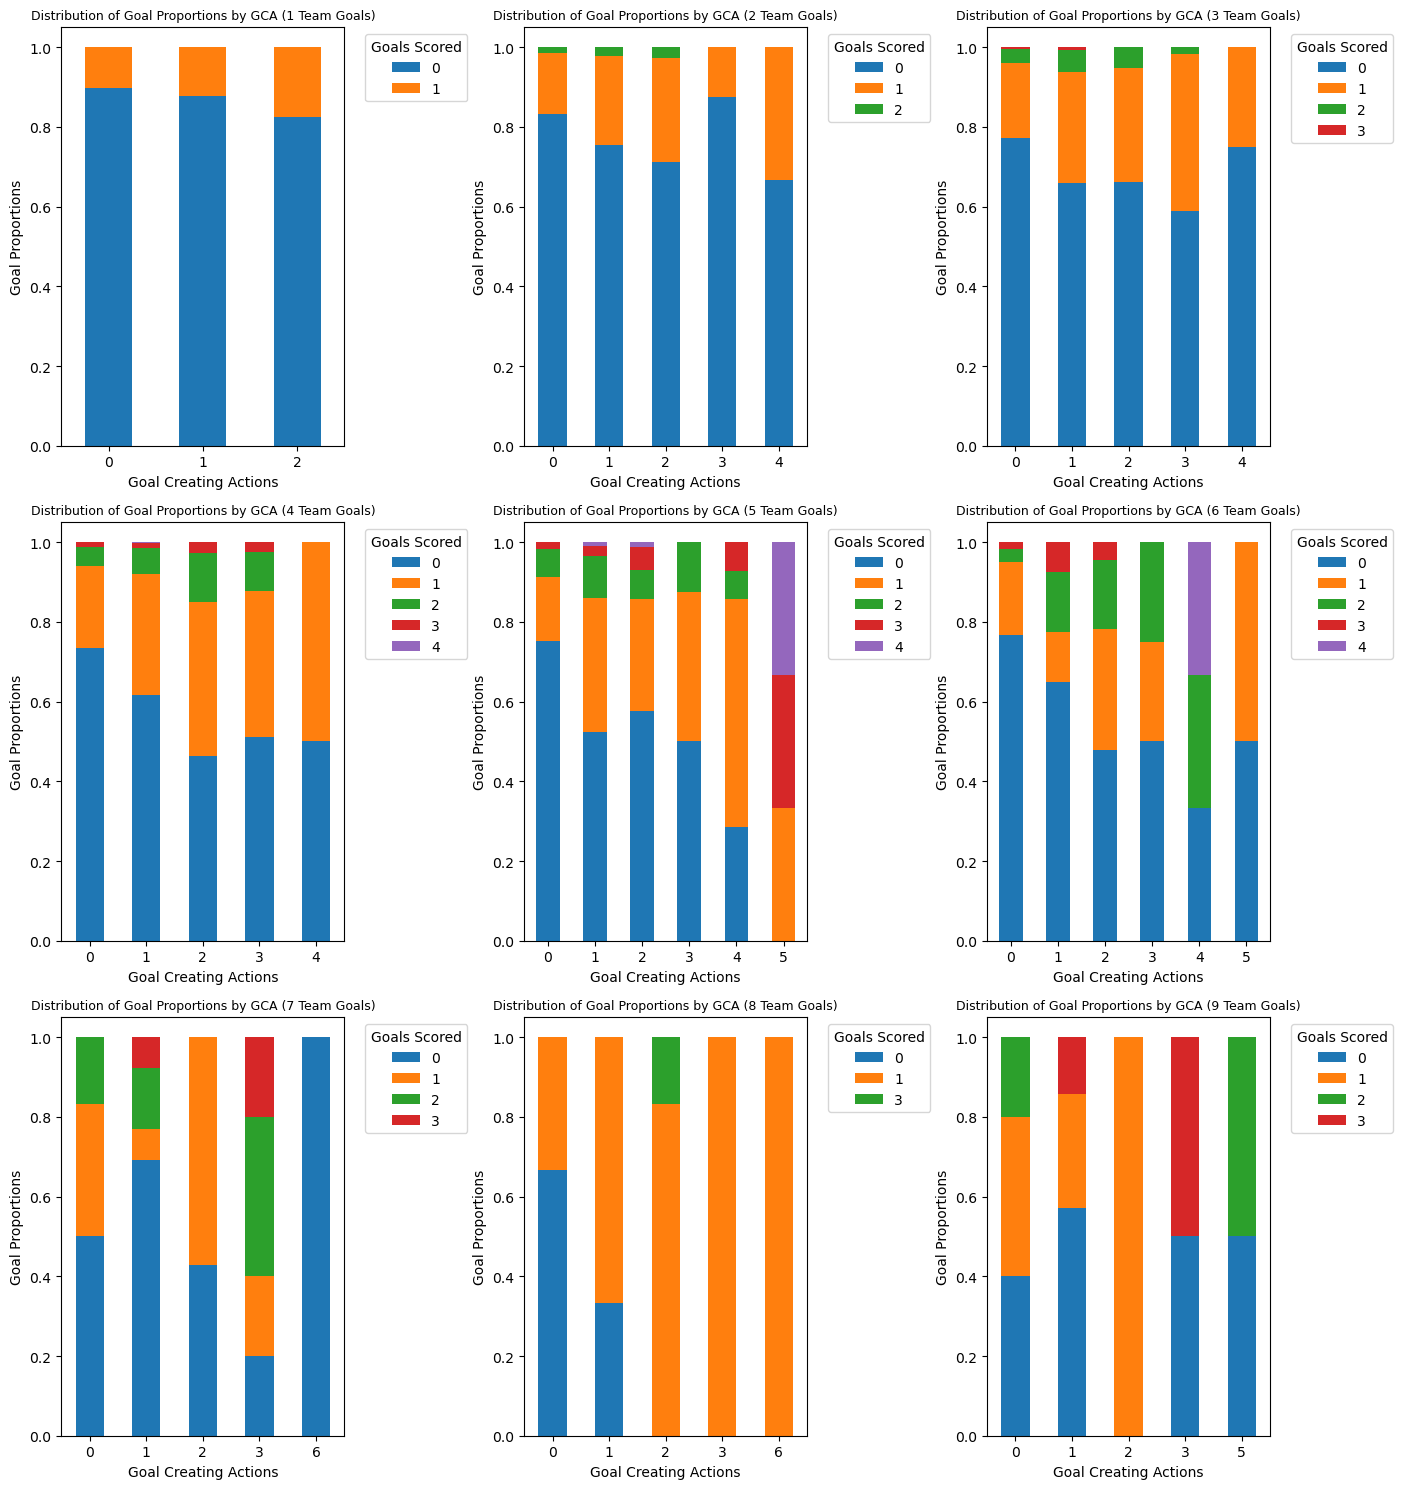

In [160]:
def gca_teamgoals_plotter (df, ax):
    goals_by_gca = df.groupby(['Goal Creating Actions', 'Goals']).size().unstack(fill_value = 0)
    goalprop_by_gca = goals_by_gca.div(goals_by_gca.sum(axis = 1), axis = 0)

    goalprop_by_gca.plot(kind = 'bar', stacked = True, ax = ax)
    ax.set_title(f'Distribution of Goal Proportions by GCA ({i+1} Team Goals)', fontsize=9)  # Dynamic title
    ax.set_xlabel('Goal Creating Actions')
    ax.set_ylabel('Goal Proportions')
    ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')
    ax.tick_params(axis = 'x', rotation = 0)

fig, axs = plt.subplots(3,3, figsize = (15, 15))
axs = axs.flatten()

for i, df in enumerate(teamgoals_df):
    if i < len(axs):
        gca_teamgoals_plotter(df, axs[i])

plt.tight_layout()
plt.subplots_adjust(right = 0.85)
plt.show()


There are a few takeaways from this set of plots. We can see that there is definitely a positive relationship between GCA and Team Goals and how these two features affect goal proportions. For example, we can see that for observations where 1 team goal was scored, the 10% of the observations that also accumulated 1 GCA scored at least 1 goal. This proportion increases to just over 20% when 2 team goals are scored and so on. This pattern continues steadily to 5 team goals, where almost 50% of the observations with 5 team goals and 1 GCA score at least 1 goal. For the observations with more than 5 team goals, this pattern gets a little bit muddied. However, this is most likely due to a small sample size. Regardless of this though, there does still seem to be a relationship between GCA and Goals when keeping Team Goals constant. 

Let's next have a look at the relationship between different types of GCA and Goals. 

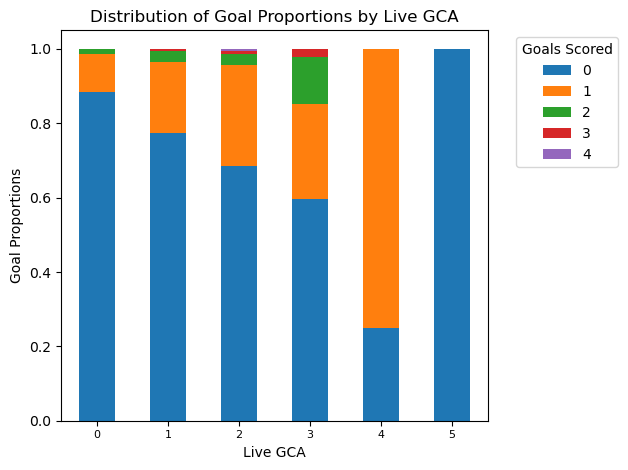

In [161]:
goals_by_livegca = att_explore.groupby(['Live GCA', 'Goals']).size().unstack(fill_value = 0)
goalprop_by_livegca = goals_by_livegca.div(goals_by_livegca.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_livegca.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Live GCA')
ax.set_xlabel('Live GCA')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 0, size = 8)
plt.tight_layout()
plt.show()

We can see a pretty clear pattern where an increased number of Live GCA accumulated is assoicated with a greater proportion of the observations recording at least 1 goal scored. Let's have a look to see if this pattern continues to hold if we hold Team Goals constant. 

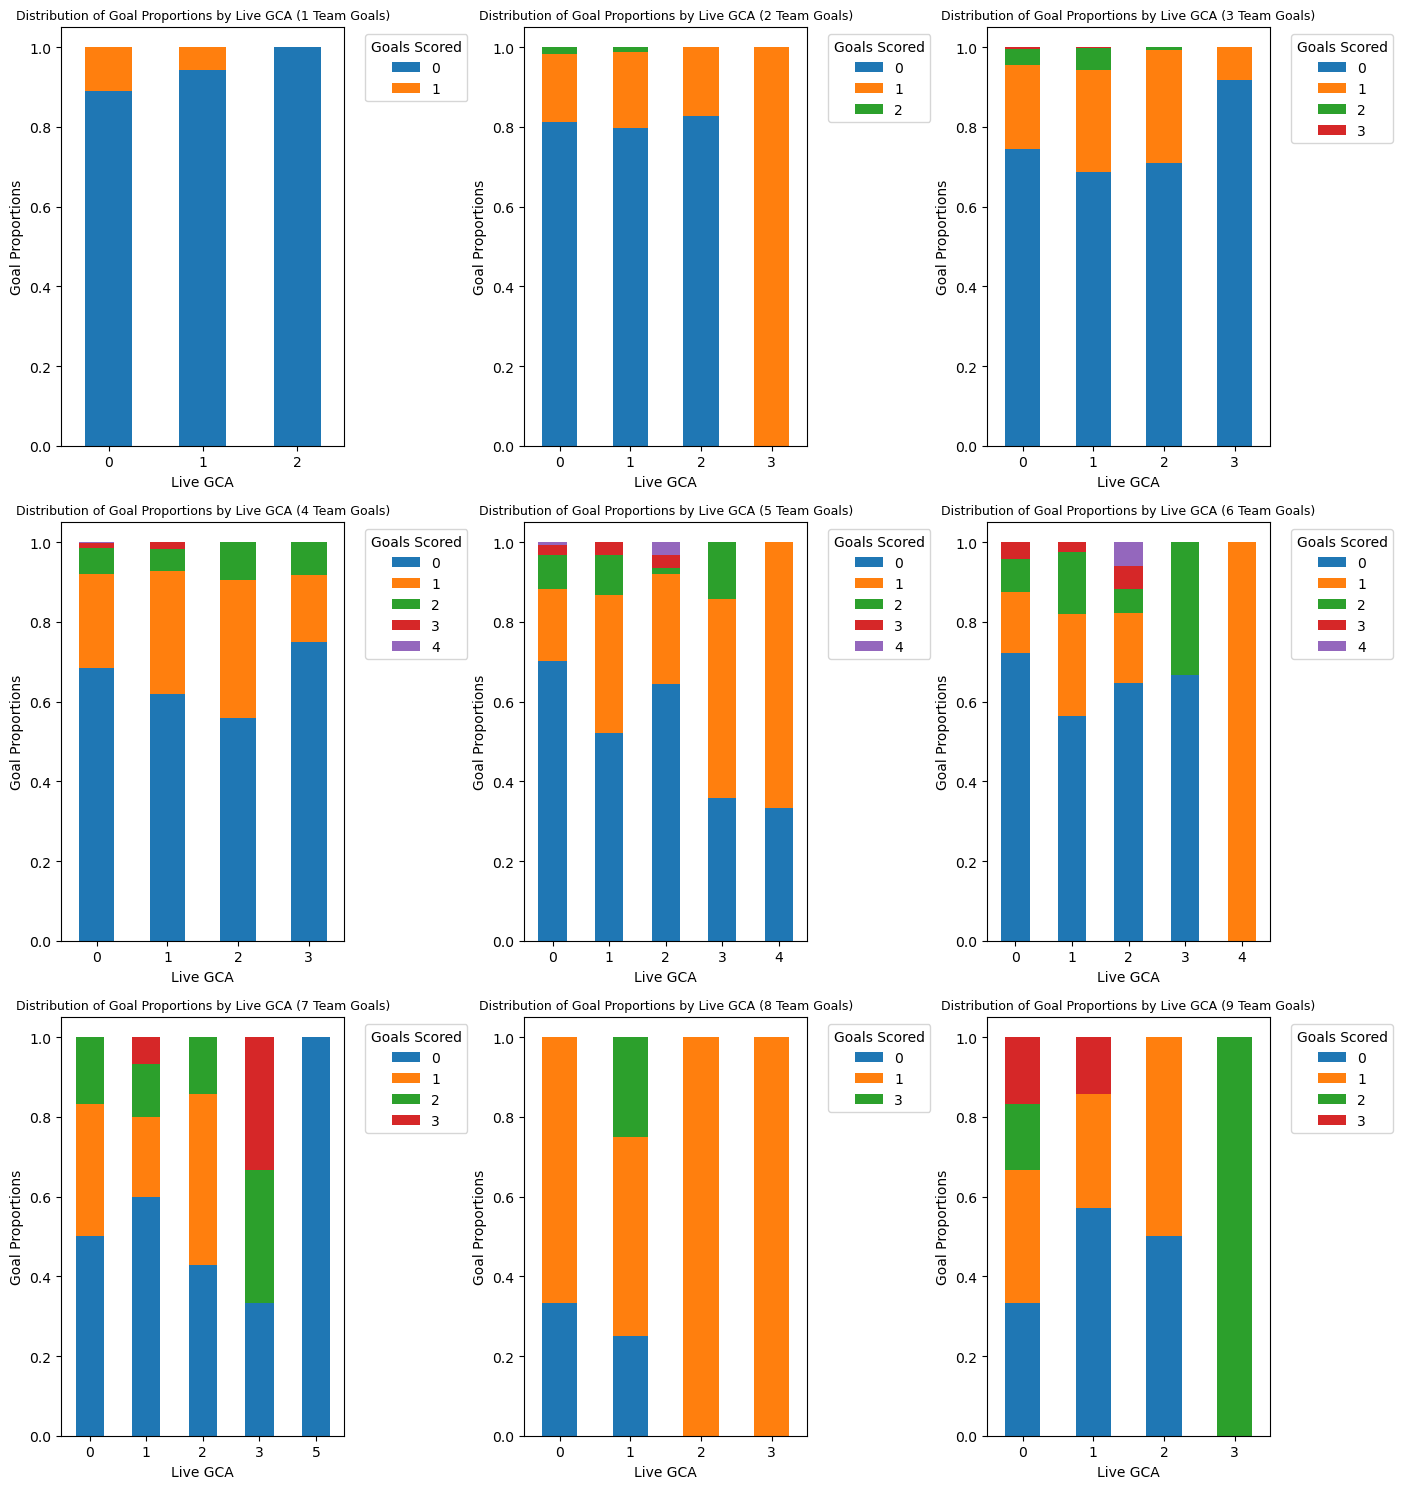

In [162]:
#modify gca_teamgoals_plotter by allowing us to specify the feature we wish to plot, instead of holding it constant at 'Goal Creating Actions' 
def gca_teamgoals_plotter (feature, df, ax):
    goals_by_gca = df.groupby([feature, 'Goals']).size().unstack(fill_value = 0)
    goalprop_by_gca = goals_by_gca.div(goals_by_gca.sum(axis = 1), axis = 0)

    goalprop_by_gca.plot(kind = 'bar', stacked = True, ax = ax)
    ax.set_title(f'Distribution of Goal Proportions by {feature} ({i+1} Team Goals)', fontsize=9)  # Dynamic title
    ax.set_xlabel(f'{feature}')
    ax.set_ylabel('Goal Proportions')
    ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')
    ax.tick_params(axis = 'x', rotation = 0)

fig, axs = plt.subplots(3,3, figsize = (15, 15))
axs = axs.flatten()

for i, df in enumerate(teamgoals_df):
    if i < len(axs):
        gca_teamgoals_plotter('Live GCA', df, axs[i])

plt.tight_layout()
plt.subplots_adjust(right = 0.85)
plt.show()

Looking at this set of plots, it doesn't appear as if there is any significant relationship between Live GCA and the proportion of goals scored. For observations with between 1 to 3 team goals, the proportion of observations that record at least 1 goal is pretty constant when holding team goals constant. However, the proportion increases when the proportion of team goals increases (this is not surprising). The plots look more interesting when the number of team goals is 4 or greater. For example, observations with 8 team goals almost always record at least 1 goal scored regardless of the number of Live GCA accumulated. 

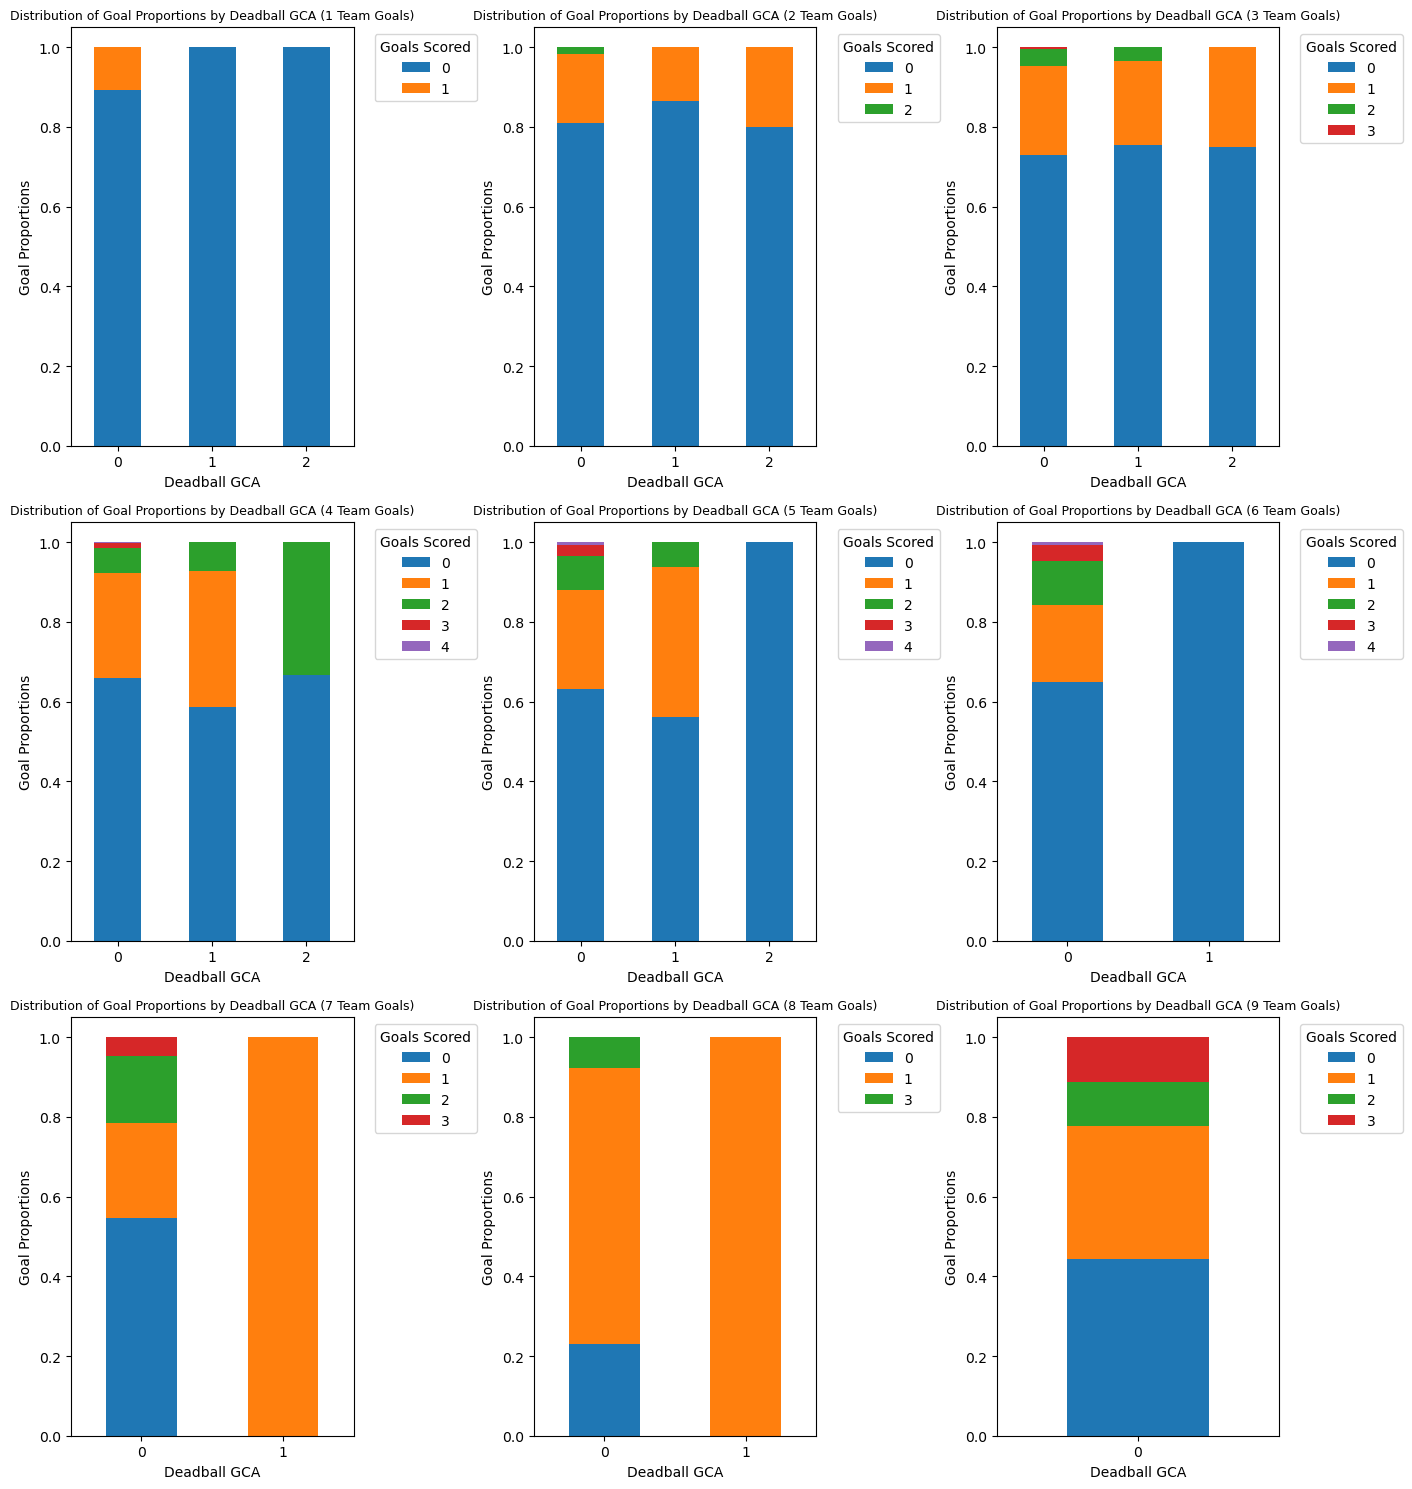

In [163]:
fig, axs = plt.subplots(3,3, figsize = (15, 15))
axs = axs.flatten()

for i, df in enumerate(teamgoals_df):
    if i < len(axs):
        gca_teamgoals_plotter('Deadball GCA', df, axs[i])

plt.tight_layout()
plt.subplots_adjust(right = 0.85)
plt.show()

Once again, we see a similar pattern here where there isn't much variation in the proportion of goals scored for different values of Deadball GCA accumulated when keeping Team Goals constant. 

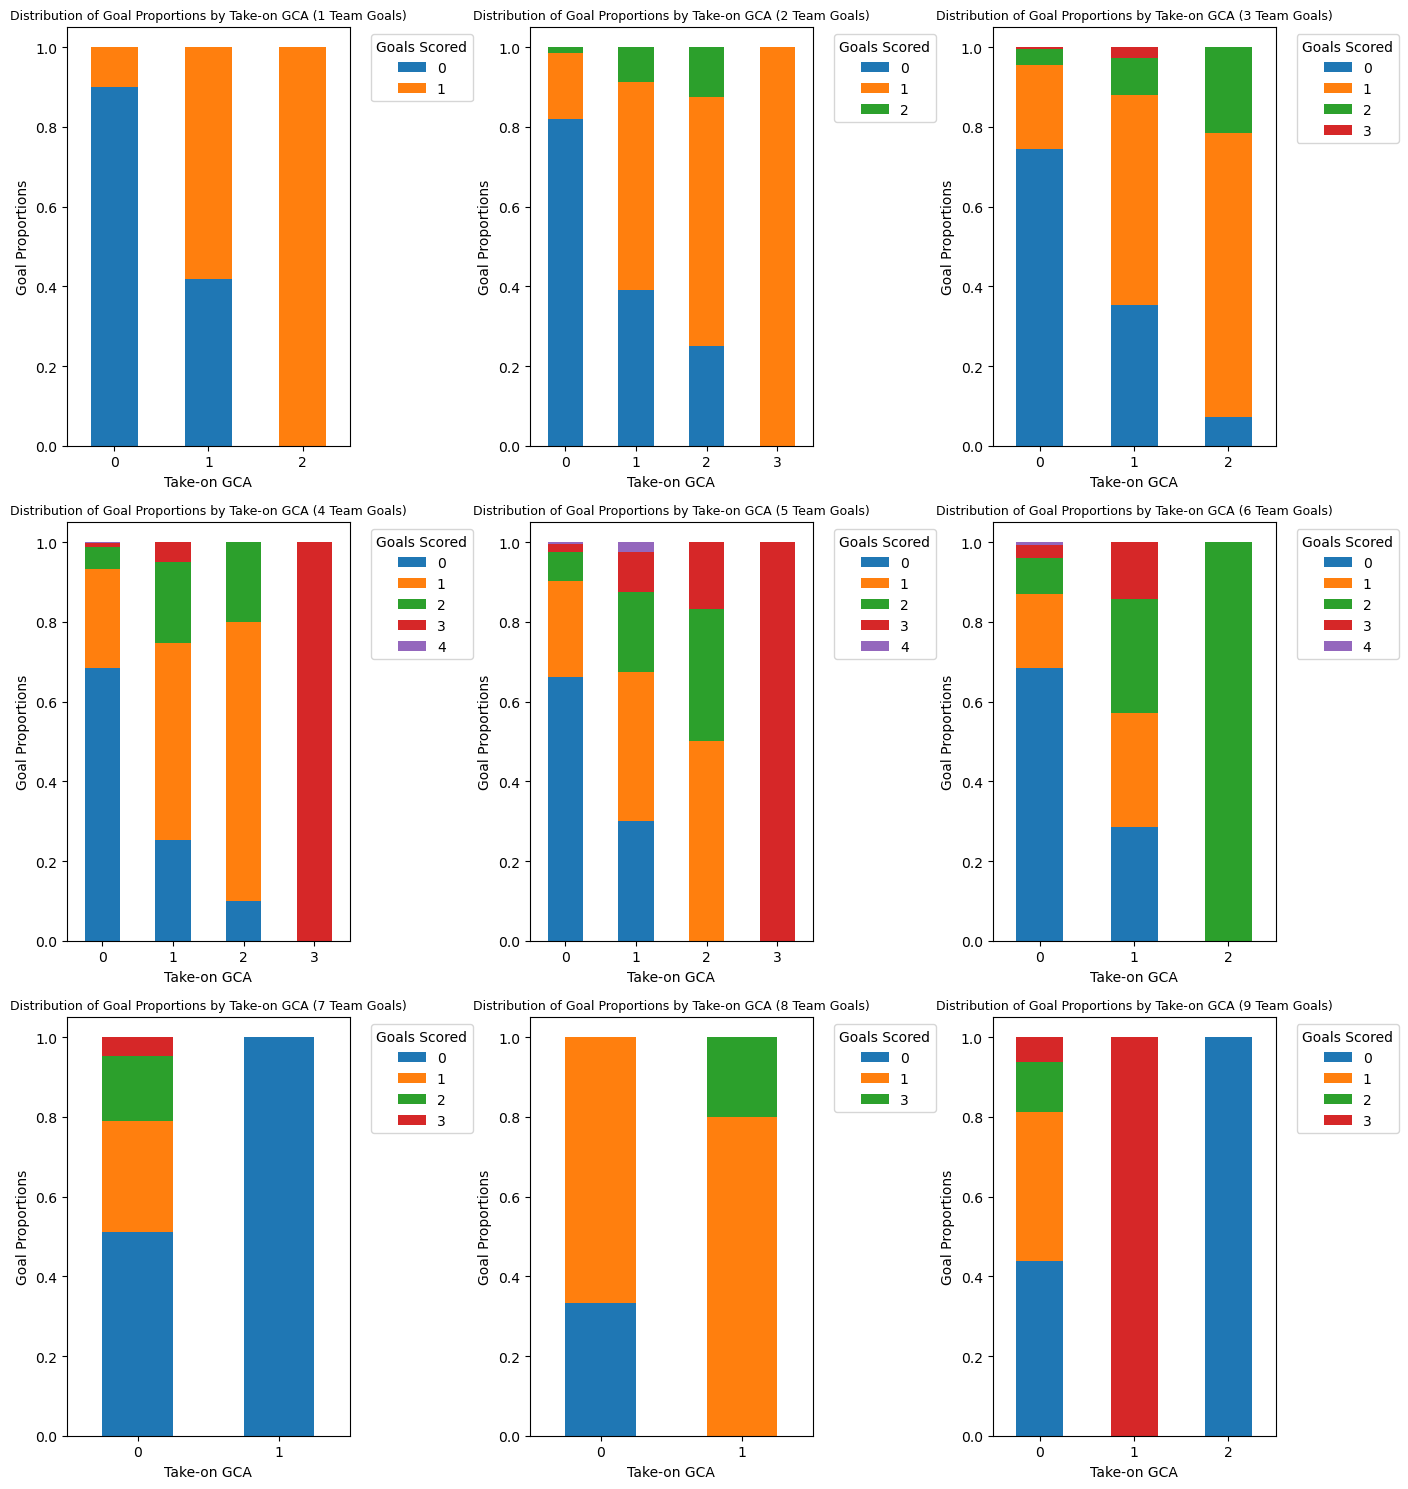

In [164]:
fig, axs = plt.subplots(3,3, figsize = (15, 15))
axs = axs.flatten()

for i, df in enumerate(teamgoals_df):
    if i < len(axs):
        gca_teamgoals_plotter('Take-on GCA', df, axs[i])

plt.tight_layout()
plt.subplots_adjust(right = 0.85)
plt.show()

These set of plots show us that there is potentially quite a strong relationship between the number of Take-on GCA accumulated and Goals. For example, the proportion of observations with 2 team goals,  2 Take-on GCA and at least 1 goal scored is at least 70%. Just to check this isn't a sample size issue, let's look at how many observations have both 2 team goals and 2 take-on GCA. 

In [165]:
teamgoals_df[2].loc[teamgoals_df[2]['Take-on GCA'] == 2]

Player ID  Day  Matchweek Venue Result             Team       Opponent  \
36566        483  Sun         10  Home  W 3–1         West Ham         Fulham   
37166        489  Mon         28  Home  W 3–2          Chelsea  Newcastle Utd   
18398        258  Sun         34  Home  W 3–1    Newcastle Utd    Southampton   
2381          35  Sun         23  Away  L 3–4  Manchester City      Liverpool   
22760        313  Sat         11  Home  W 3–1          Everton       Brighton   
36861        487  Sat         10  Home  W 3–0          Watford   Huddersfield   
23102        320  Sat         17  Home  W 3–0    Newcastle Utd         Fulham   
31257        418  Sat          1  Away  L 3–4     Leeds United      Liverpool   
35181        465  Sat          5  Home  D 3–3          Chelsea    Southampton   
5217          82  Sat         17  Home  W 3–2          Watford   Cardiff City   
11027        152  Sat         29  Away  W 3–1   Crystal Palace        Burnley   
4630          75  Sat         26  Away  W 3–0   Manchester Utd         Fulham   
7092         109  Sat         35  Away  W 3–0         Brighton         Wolves   
5210          82  Sat         10  Home  W 3–0          Watford   Huddersfield   

      Start Position  Minutes Played  ...  RB  RM  RW  WB  Defenders  \
36566     N       FW              11  ...   0   0   0   0          0   
37166     N       AM              20  ...   0   0   0   0          0   
18398     N       FW              45  ...   0   0   0   0          0   
2381      Y       LW              90  ...   0   0   0   0          0   
22760     Y    FW,RW              90  ...   0   0   1   0          0   
36861     Y       AM              90  ...   0   0   0   0          0   
23102     Y       CM              90  ...   0   0   0   0          0   
31257     Y       LM              90  ...   0   0   0   0          0   
35181     Y       FW              89  ...   0   0   0   0          0   
5217      Y    FW,AM              86  ...   0   0   0   0          0   
11027     Y       RW              78  ...   0   0   1   0          0   
4630      Y       LW              69  ...   0   0   0   0          0   
7092      Y    WB,AM              88  ...   0   0   0   1          0   
5210      Y       FW              64  ...   0   0   0   0          0   

       Midfielders  Wide Midfielders  Wingers  Penalty Success Rate  \
36566            0                 0        0                   NaN   
37166            0                 0        0                   NaN   
18398            0                 0        0                   NaN   
2381             0                 0        1                   NaN   
22760            0                 0        1                   NaN   
36861            0                 0        0                   NaN   
23102            1                 0        0                   NaN   
31257            0                 1        0                   NaN   
35181            0                 0        0                   NaN   
5217             0                 0        0                   NaN   
11027            0                 0        1                   NaN   
4630             0                 0        1                   NaN   
7092             0                 0        0                   NaN   
5210             0                 0        0                   NaN   

       SOT Percentage  
36566        1.000000  
37166        1.000000  
18398        0.500000  
2381         0.500000  
22760        0.500000  
36861        1.000000  
23102        0.500000  
31257        1.000000  
35181        0.666667  
5217         0.333333  
11027        1.000000  
4630         0.666667  
7092         1.000000  
5210         0.250000  

[14 rows x 128 columns]

So there are only 14 observations that have both 2 team goals and 2 take-on GCA. So the pattern that we are seeing could potentially be attributed to a lack of sample size. 

In [166]:
teamgoals_df[2].loc[teamgoals_df[2]['Take-on GCA'] == 1]

Player ID  Day  Matchweek Venue Result             Team  \
38830        514  Sat         17  Home  W 3–0    Newcastle Utd   
35919        474  Sat         10  Away  W 3–0          Chelsea   
21904        303  Wed         27  Home  W 3–0          Chelsea   
36529        482  Sat         36  Home  W 3–0        Brentford   
2480          36  Sat         28  Away  W 3–0  Manchester City   
...          ...  ...        ...   ...    ...              ...   
39585        526  Sun         30  Home  W 3–0    Newcastle Utd   
7378         113  Fri          6  Away  W 3–0     Leeds United   
25601        350  Sat         29  Home  D 3–3         Brighton   
37333        493  Thu         20  Away  W 3–2          Arsenal   
1821          29  Thu         32  Home  W 3–0   Leicester City   

             Opponent Start  Position  Minutes Played  ...  RB  RM  RW  WB  \
38830          Fulham     Y        LW              83  ...   0   0   0   0   
35919   Newcastle Utd     Y        AM              87  ...   0   0   0   0   
21904        Brighton     Y        LW              83  ...   0   0   0   0   
36529     Southampton     Y        FW              90  ...   0   0   0   0   
2480           Fulham     Y        LW              90  ...   0   0   0   0   
...               ...   ...       ...             ...  ...  ..  ..  ..  ..   
39585   Sheffield Utd     Y        RM              89  ...   0   1   0   0   
7378      Aston Villa     Y        CM              90  ...   0   0   0   0   
25601       Brentford     Y  RW,LB,RM              90  ...   0   1   1   0   
37333  Crystal Palace     Y     AM,FW              90  ...   0   0   0   0   
1821        West Brom     Y        FW              84  ...   0   0   0   0   

       Defenders  Midfielders  Wide Midfielders  Wingers  \
38830          0            0                 0        1   
35919          0            0                 0        0   
21904          0            0                 0        1   
36529          0            0                 0        0   
2480           0            0                 0        1   
...          ...          ...               ...      ...   
39585          0            0                 1        0   
7378           0            1                 0        0   
25601          1            0                 1        1   
37333          0            0                 0        0   
1821           0            0                 0        0   

       Penalty Success Rate  SOT Percentage  
38830                   NaN        0.250000  
35919                   NaN             NaN  
21904                   NaN        0.333333  
36529                   NaN        0.333333  
2480                    NaN        1.000000  
...                     ...             ...  
39585                   NaN        1.000000  
7378                    NaN        0.500000  
25601                   NaN        0.500000  
37333                   NaN        0.750000  
1821                    NaN        0.500000  

[116 rows x 128 columns]

To further reiterate this point, we can see that there are only 116 observations that simultaneously have 1 Take-on GCA and 2 Team Goals. 

Something else we can investigate is the relationship between Goals and the proportion of GCA over Team Goals. In other words, we can group observations by how the number of GCA accumulated is related to the Team Goals. So observations with 1 GCA and 2 Team Goals will be grouped together with observations that have 2 GCA and 4 Team Goals. Grouping observations in this manner is essentially a way of grouping observations by attacking involvement. For example, observations that have a high attacking involvement may be more likely to score more goals because they are more involved in the attacking phases of the game (i.e. they are consistently in positions to both accumulate GCA and goals). However, we need to first check the relationship between GCA and Team Goals. I want to see whether or not there are any observations with more GCA than Team Goals (there shouldn't be, because GCA should only be accumulated when a team goal is scored.)

In [167]:
gca_greaterthan_teamgoals_counter = []

for i, df in enumerate(teamgoals_df):
    count = (df['Goal Creating Actions'] > i+1).sum()
    gca_greaterthan_teamgoals_counter.append(
        f'For DataFrame {i}, the number of observations that have more GCA than Team Goals is {count}'
    )
gca_greaterthan_teamgoals_counter

['For DataFrame 0, the number of observations that have more GCA than Team Goals is 91',
 'For DataFrame 1, the number of observations that have more GCA than Team Goals is 27',
 'For DataFrame 2, the number of observations that have more GCA than Team Goals is 8',
 'For DataFrame 3, the number of observations that have more GCA than Team Goals is 0',
 'For DataFrame 4, the number of observations that have more GCA than Team Goals is 0',
 'For DataFrame 5, the number of observations that have more GCA than Team Goals is 0',
 'For DataFrame 6, the number of observations that have more GCA than Team Goals is 0',
 'For DataFrame 7, the number of observations that have more GCA than Team Goals is 0',
 'For DataFrame 8, the number of observations that have more GCA than Team Goals is 0']

So there are actually a few observations that have more GCA than Team Goals (predominantly when the number of Team Goals is not particularly high). This doesn't really make sense to me, let's investigate further by looking at the observations that have 1 team goal, but more than 1 GCA. 

In [168]:
teamgoals_df[0][(teamgoals_df[0]['Goal Creating Actions'] > 1)]

Player ID  Day  Matchweek Venue Result             Team  \
15131        204  Sat         28  Away  L 1–4         West Ham   
26819        364  Sat         18  Home  D 1–1  Manchester City   
2047          30  Sat         12  Away  W 1–0      Aston Villa   
9893         139  Fri         18  Away  D 1–1    Sheffield Utd   
17932        246  Sat         13  Home  L 1–2          Burnley   
...          ...  ...        ...   ...    ...              ...   
11226        156  Wed         28  Away  L 1–5      Bournemouth   
35123        464  Sat          2  Away  W 1–0        West Brom   
6980         108  Wed         24  Away  L 1–4         West Ham   
16280        221  Sat         37  Away  L 1–2          Burnley   
3235          47  Sun         37  Home  D 1–1     Leeds United   

             Opponent Start Position  Minutes Played  ...  RB  RM  RW  WB  \
15131       Liverpool     Y       CM              90  ...   0   0   0   0   
26819         Everton     Y       RW              90  ...   0   0   1   0   
2047           Wolves     Y       LM              90  ...   0   0   0   0   
9893      Aston Villa     N       AM              33  ...   0   0   0   0   
17932        West Ham     Y       LM              80  ...   0   0   0   0   
...               ...   ...      ...             ...  ...  ..  ..  ..  ..   
11226         Arsenal     Y       CM              90  ...   0   0   0   0   
35123         Burnley     N    FW,LM              20  ...   0   0   0   0   
6980   Leicester City     Y       FW              90  ...   0   0   0   0   
16280       Tottenham     Y       CM              90  ...   0   0   0   0   
3235         Brighton     Y       FW              90  ...   0   0   0   0   

       Defenders  Midfielders  Wide Midfielders  Wingers  \
15131          0            1                 0        0   
26819          0            0                 0        1   
2047           0            0                 1        0   
9893           0            0                 0        0   
17932          0            0                 1        0   
...          ...          ...               ...      ...   
11226          0            1                 0        0   
35123          0            0                 1        0   
6980           0            0                 0        0   
16280          0            1                 0        0   
3235           0            0                 0        0   

       Penalty Success Rate  SOT Percentage  
15131                   NaN             NaN  
26819                   NaN        0.500000  
2047                    NaN        0.000000  
9893                    NaN             NaN  
17932                   NaN        1.000000  
...                     ...             ...  
11226                   NaN        0.333333  
35123                   NaN        0.500000  
6980                    NaN             NaN  
16280                   NaN             NaN  
3235                    NaN        0.000000  

[91 rows x 128 columns]

When looking at the first few observations in this list and going back through these games, we can see that it is possible to accumulate more than 1 GCA for each team goal if the player is performing two consecutive GCA that leads to a goal. The first observation involves a West Ham midfielder (Cheikhou Kouyate) accumulating 2 GCA even though West Ham only scored 1 goal. This was because the goal scored by West Ham involved Kouyate first making a tackle to win possession of the ball, followed by a through ball (live pass) which found the West Ham striker for a goal. Therefore, the last two actions leading to the goal were both performed by Kouyate, which is why he was able to accumulate two GCA despite the team only scoring 1 goal. The second observation involves a Manchester City right winger (Riyad Mahrez) also accumulating 2 GCA for 1 team goal. In this occasion, Mahrez first dribbled past a player (Take-on GCA), followed by a cut back (Live GCA) leading to a goal. Based on these two examples, we can see how it is possible to accumulate more GCA than Team Goals. 

In [169]:
teamgoals_df[0][(teamgoals_df[0]['Goal Creating Actions'] > 1) & (teamgoals_df[0]['Goals'] > 0)]

Player ID  Day  Matchweek Venue Result             Team  \
29641        398  Sat         26  Away  L 1–3         West Ham   
12505        175  Mon          2  Home  D 1–1        Liverpool   
18020        248  Sat          5  Away  W 1–0      Southampton   
10582        147  Sat         35  Away  W 1–0           Fulham   
24154        334  Sun          7  Away  D 1–1        Liverpool   
31013        416  Wed         15  Away  L 1–2        Tottenham   
5190          82  Sat         11  Home  L 1–2          Watford   
15798        213  Mon         34  Home  L 1–2          Burnley   
11532        159  Sat         25  Away  D 1–1          Chelsea   
35267        467  Tue         22  Away  L 1–2          Arsenal   
27745        373  Sat         22  Away  W 1–0        Liverpool   
28246        379  Sat         11  Away  W 1–0   Manchester Utd   
26694        363  Sun          6  Away  W 1–0           Wolves   
7236         111  Sat          9  Home  W 1–0      Southampton   
33064        442  Sun         36  Away  W 1–0  Manchester City   
35123        464  Sat          2  Away  W 1–0        West Brom   

             Opponent Start Position  Minutes Played  ...  RB  RM  RW  WB  \
29641        Brighton     Y       FW              90  ...   0   0   0   0   
12505  Crystal Palace     Y    LW,FW              90  ...   0   0   0   0   
18020   Sheffield Utd     Y    AM,WB              73  ...   0   0   0   1   
10582     Bournemouth    Y*       FW              90  ...   0   0   0   0   
24154   Newcastle Utd     Y       LM              90  ...   0   0   0   0   
31013  Manchester Utd     Y       AM              90  ...   0   0   0   0   
5190          Chelsea     Y    FW,RM              90  ...   0   1   0   0   
15798        West Ham     Y       FW              85  ...   0   0   0   0   
11532     Southampton     Y       AM              90  ...   0   0   0   0   
35267          Wolves     Y       LW              60  ...   0   0   0   0   
27745        Brighton     Y       FW              89  ...   0   0   0   0   
28246          Fulham    Y*    AM,LM              90  ...   0   0   0   0   
26694     Southampton     Y       FW              90  ...   0   0   0   0   
7236        West Brom     N       RM              10  ...   0   1   0   0   
33064         Burnley     Y       FW              82  ...   0   0   0   0   
35123         Burnley     N    FW,LM              20  ...   0   0   0   0   

       Defenders  Midfielders  Wide Midfielders  Wingers  \
29641          0            0                 0        0   
12505          0            0                 0        1   
18020          0            0                 0        0   
10582          0            0                 0        0   
24154          0            0                 1        0   
31013          0            0                 0        0   
5190           0            0                 1        0   
15798          0            0                 0        0   
11532          0            0                 0        0   
35267          0            0                 0        1   
27745          0            0                 0        0   
28246          0            0                 1        0   
26694          0            0                 0        0   
7236           0            0                 1        0   
33064          0            0                 0        0   
35123          0            0                 1        0   

       Penalty Success Rate  SOT Percentage  
29641                   NaN        1.000000  
12505                   NaN        0.666667  
18020                   NaN        1.000000  
10582                   1.0        0.250000  
24154                   NaN        0.200000  
31013                   NaN        1.000000  
5190                    1.0        0.000000  
15798                   1.0             NaN  
11532                   1.0        0.000000  
35267                   NaN        1.000000  
27745                   1.0        0.500000  
2

From the above, we can also see that there are 16 observations where the player scored 1 goal, were involved in a game with 1 team goal, and also accumulated more than 1 GCA. In other words, there are 16 observations where the player scored the only goal of the game for their team, whilst accumulating more than 1 GCA in the process. The second observation in thte list involves a Liverpool LW (Luis Diaz) who both scored the only goal for the team in that game, whilst accumulating 2 GCA. The video shows that Diaz dribbled past two players (2 take-on GCA) before scoring, which is how he is able to both score whilst accumulating 2 GCA.  Similarly, the first observation (Javier Hernandez, West Ham) also involves a player who dribbled past two players (2 take-on GCA) before scoring the only game of the game for their team. 

In [170]:
#adding feature 'Team Goals' to att_explore, which is just the number of team goals scored by each observation
att_explore['Team Goals'] = (
    att_explore['Result']
    .str.replace('–', '-', regex=False)  # Replace en dash with hyphen
    .str.split(' ')  # Split by space
    .str[1]  # Get the second part (the score)
    .str.split('-')  # Split the score by hyphen
    .str[0]  # Extract the first team's goals
    .astype(int)  # Convert to integer
)

att_explore[['Day', 'Matchweek', 'Venue', 'Result', 'Team', 'Opponent', 'Team Goals']].head()

Day  Matchweek Venue Result             Team         Opponent  \
10000  Sun         32  Away  L 1–2   Crystal Palace   Leicester City   
24977  Sat         29  Away  L 1–2      Bournemouth        Liverpool   
37756  Sun         37  Away  D 0–0     Huddersfield  Manchester City   
18759  Sun         34  Away  D 2–2      Southampton         Brighton   
168    Sun         38  Home  W 5–0  Manchester City     Norwich City   

       Team Goals  
10000           1  
24977           1  
37756           0  
18759           2  
168             5

In [171]:
#creating a new list which captures information about the the involvement each observation has given the Team Goals scored in the game played by
#each observation, this is done by looking at the GCA recorded for each observation, and dividing this value by the number of Team Goals scored 
#by this observation

gca_teamgoals_prop = (att_explore['Goal Creating Actions'] / att_explore['Team Goals']).tolist()
pd.Series(gca_teamgoals_prop).unique()

array([0.        ,        nan, 0.4       , 0.33333333, 1.        ,
       0.5       , 0.66666667, 0.2       , 0.25      , 1.33333333,
       0.6       , 1.5       , 0.75      , 2.        , 0.8       ,
       0.375     , 0.14285714, 0.85714286, 0.28571429, 0.11111111,
       0.16666667, 0.22222222, 0.42857143, 0.55555556, 0.83333333,
       0.125     ])

In [172]:
# Replace values based on conditions, purpose is to reduce the number of unique values (grouping)
for i in range(len(gca_teamgoals_prop)):
    if np.isnan(gca_teamgoals_prop[i]):
        gca_teamgoals_prop[i] = 'No Team Goals'  # Assigning a value
    elif gca_teamgoals_prop[i] == 0:
        gca_teamgoals_prop[i] = '0% Involvement'
    elif 0 < gca_teamgoals_prop[i] <= 0.25:
        gca_teamgoals_prop[i] = '0-25% Involvement'
    elif 0.25 < gca_teamgoals_prop[i] <= 0.5:
        gca_teamgoals_prop[i] = '25-50% Involvement'
    elif 0.5 < gca_teamgoals_prop[i] <= 0.75:
        gca_teamgoals_prop[i] = '50-75% Involvement'
    elif 0.75 < gca_teamgoals_prop[i] <= 1:
        gca_teamgoals_prop[i] = '75-100% Involvement'
    elif gca_teamgoals_prop[i] == 1:
        gca_teamgoals_prop[i] = '100% Involvement'
    elif gca_teamgoals_prop[i] > 1:
        gca_teamgoals_prop[i] = '> 100% Involvement'

In [173]:
gca_teamgoals_df = pd.DataFrame({
        'GCA Team Goals Prop': gca_teamgoals_prop,  
        'Goals': att_explore['Goals'].tolist(), 
        'Assists': att_explore['Assists'].tolist()    
    })

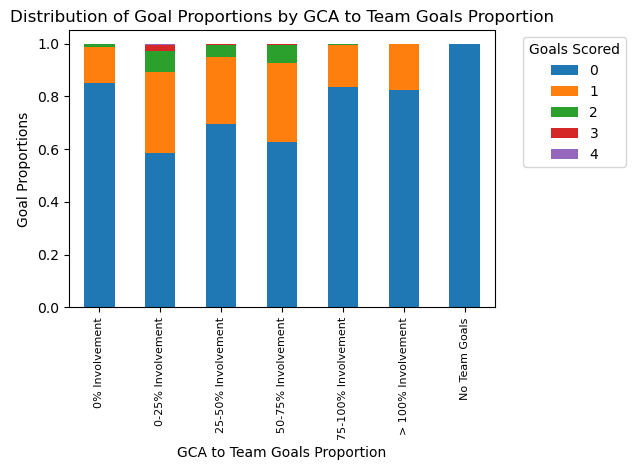

In [174]:
goals_by_gcateamgoalsprop = gca_teamgoals_df.groupby(['GCA Team Goals Prop', 'Goals']).size().unstack(fill_value = 0)
goalprop_by_gcateamgoalsprop = goals_by_gcateamgoalsprop.div(goals_by_gcateamgoalsprop.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_gcateamgoalsprop.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by GCA to Team Goals Proportion')
ax.set_xlabel('GCA to Team Goals Proportion')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()

This plot shows that there is no real relationship that we can identify between the feature 'GCA to Team Goals Proportion' and the proportion of observations that recorded at least 1 goal. Surprisingly, the observations that recorded between 0 and 25% involvement (i.e. the observations whose number of GCA is only between 0 and 25% when divided by Team Goals) had the highest proportion of observations with at least 1 goal (just over 40%). This number then decreases, with only 20% of the observations that record between 75-100% involvement recording at least 1 goal. Given the conclusions from above, we expected the proportion of obsevations with at least 1 goal to increase as the GCA to Team Goals proportion increases. Clearly, this is not the case though. 

We can also have a quick look at the relationship between GCA to Team Goals Proportion and Assists. 

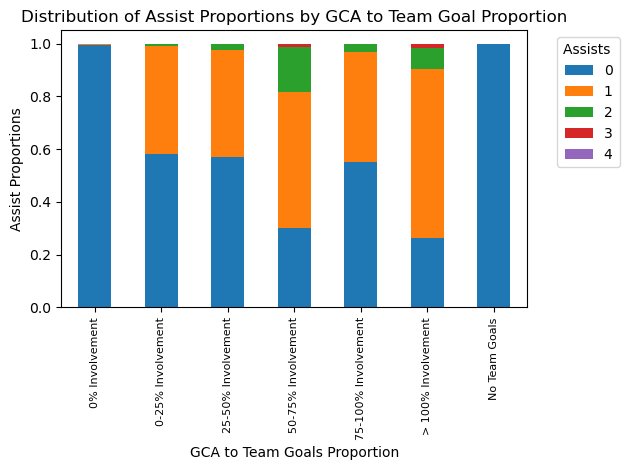

In [175]:
assists_by_gcateamgoalsprop = gca_teamgoals_df.groupby(['GCA Team Goals Prop', 'Assists']).size().unstack(fill_value = 0)
assistprop_by_gcateamgoalsprop = assists_by_gcateamgoalsprop.div(assists_by_gcateamgoalsprop.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

assistprop_by_gcateamgoalsprop.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Assist Proportions by GCA to Team Goal Proportion')
ax.set_xlabel('GCA to Team Goals Proportion')
ax.set_ylabel('Assist Proportions')
ax.legend(title = 'Assists ', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()

Again, we don't really see a relationship between the GCA to Team Goals Proportion and Assists. Therefore, we can probably discard this feature. 

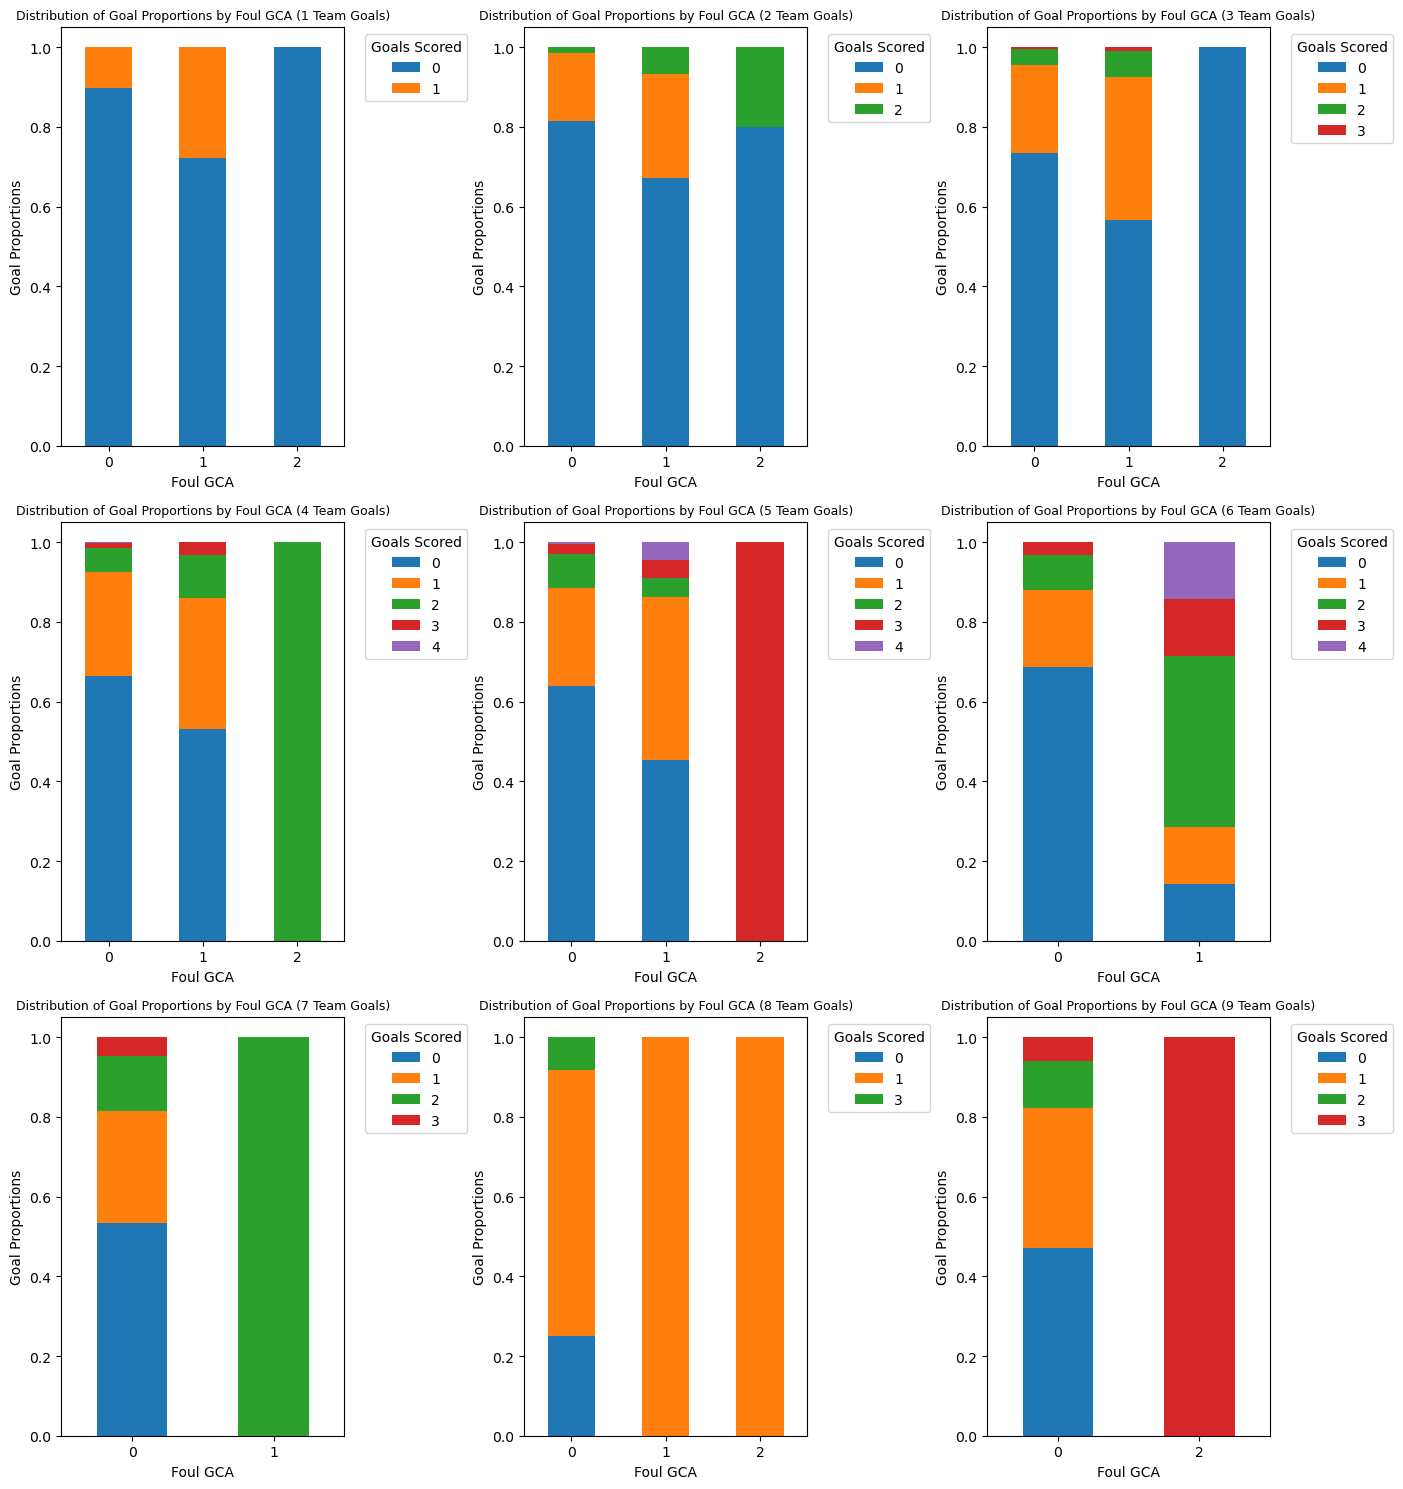

In [176]:
fig, axs = plt.subplots(3,3, figsize = (15, 15))
axs = axs.flatten()

for i, df in enumerate(teamgoals_df):
    if i < len(axs):
        gca_teamgoals_plotter('Foul GCA', df, axs[i])

plt.tight_layout()
plt.subplots_adjust(right = 0.85)
plt.show()

### Passes Completed, Passes Attempted and Progressive Passes

This set of features captures information related to passing. In general, we don't expect there to be any significant relationship between these features and goals scored. 

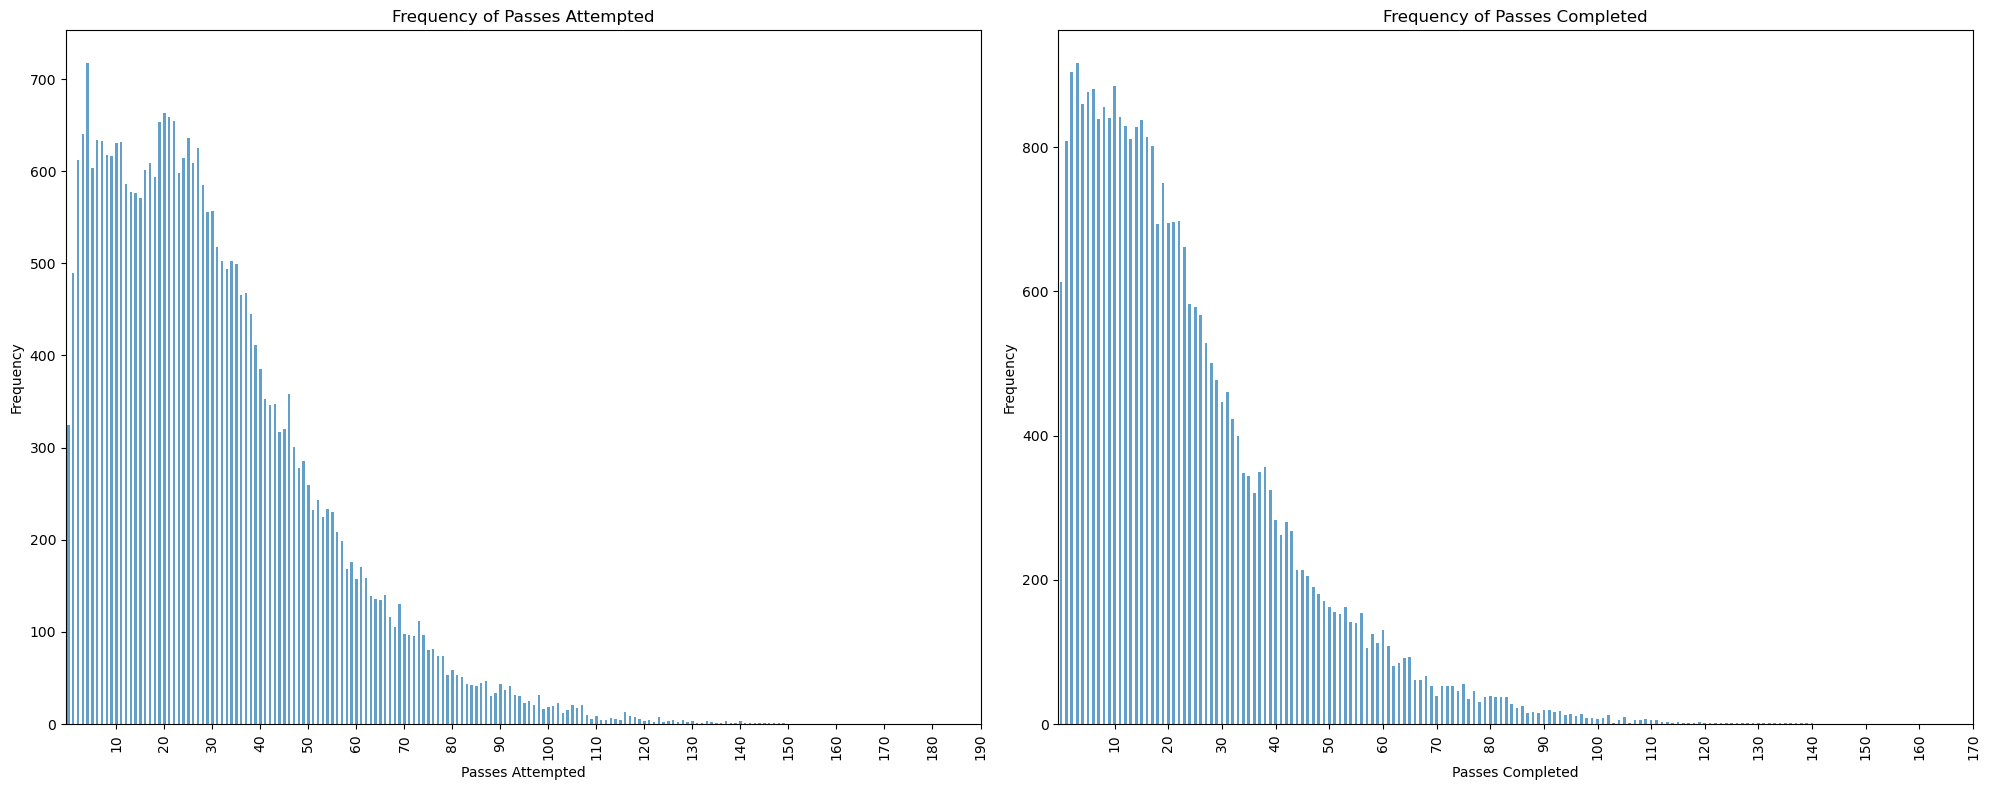

In [177]:
passcomp_count = att_explore['Passes Completed'].value_counts().sort_index()
passatt_count = att_explore['Passes Attempted'].value_counts().sort_index()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 8))

passatt_count.plot(kind = 'bar', alpha = 0.7, ax = ax1)
ax1.set_xlabel('Passes Attempted')
ax1.set_ylabel('Frequency')
ax1.set_title('Frequency of Passes Attempted')
#set_xticks is used to only have certain values on the x axis. without this on, every x axis value was printed, which meant that the x axis values overlapped, affecting readability 
ax1.set_xticks(range(10, 200, 10))
ax1.set_xticklabels(range(10, 200, 10))


passcomp_count.plot(kind = 'bar', alpha = 0.7, ax = ax2)
ax2.set_xlabel('Passes Completed')
ax2.set_ylabel('Frequency')
ax2.set_title('Frequency of Passes Completed')
#set_xticks is used to only have certain values on the x axis. without this on, every x axis value was printed, which meant that the x axis values overlapped, affecting readability 
ax2.set_xticks(range(10, 180, 10))
ax2.set_xticklabels(range(10, 180, 10))

# plt.xticks(rotation = 0, fontsize = 7)
plt.tight_layout()
plt.show()

Both 'Passes Attempted' and 'Passes Completed' are skewed towards the right, with majority of the observations having less than 100 Passes Attempted and Passes Completed. We can quickly compute 'Pass Completion Percentage' by dividing 'Passes Completed' by 'Passes Attempted. 

In [178]:
att_explore['Pass Completion Percentage'] = (att_explore['Passes Completed']/att_explore['Passes Attempted'])*100

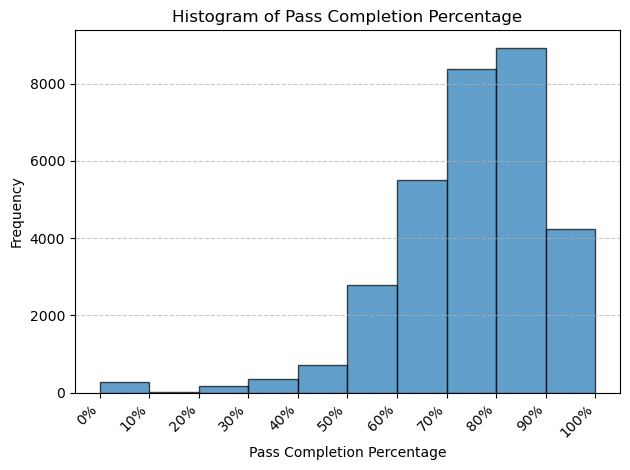

In [179]:
# Create the histogram
fig, ax = plt.subplots()

# Define the bins
bins = np.arange(0, 101, 10)  # 0, 10, 20, ..., 100

# Plot the histogram
ax.hist(att_explore['Pass Completion Percentage'], bins=bins, edgecolor='black', alpha=0.7)

# Customize the plot
ax.set_xlabel('Pass Completion Percentage')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Pass Completion Percentage')

# Set x-axis ticks and labels
ax.set_xticks(bins)
ax.set_xticklabels([f'{x}%' for x in bins])

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add grid lines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

Let's now make a boxplot of Pass Completion Percentage for different Goals Scored values. 

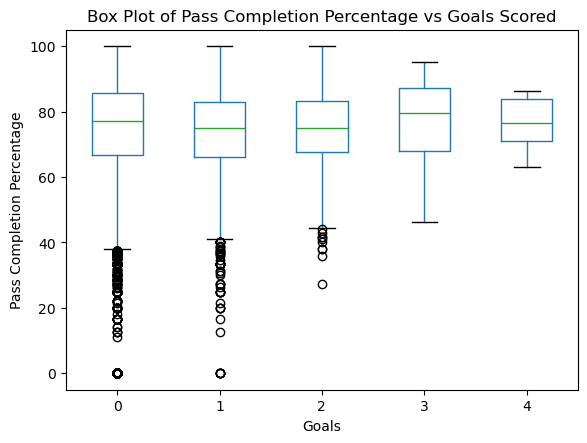

In [180]:
plt.figure
att_explore.boxplot(column = 'Pass Completion Percentage', by = 'Goals', grid = False)
plt.title('Box Plot of Pass Completion Percentage vs Goals Scored')
plt.suptitle('')
plt.xlabel('Goals')
plt.ylabel('Pass Completion Percentage')
plt.show()

The plot above shows that the median Pass Completion Percentage is pretty much the same (at just under 80%) regardless of the number of goals scored. We can also have a look at similar plots that visualise the relationship between goals and Passes Completed/Passes Attempted. 

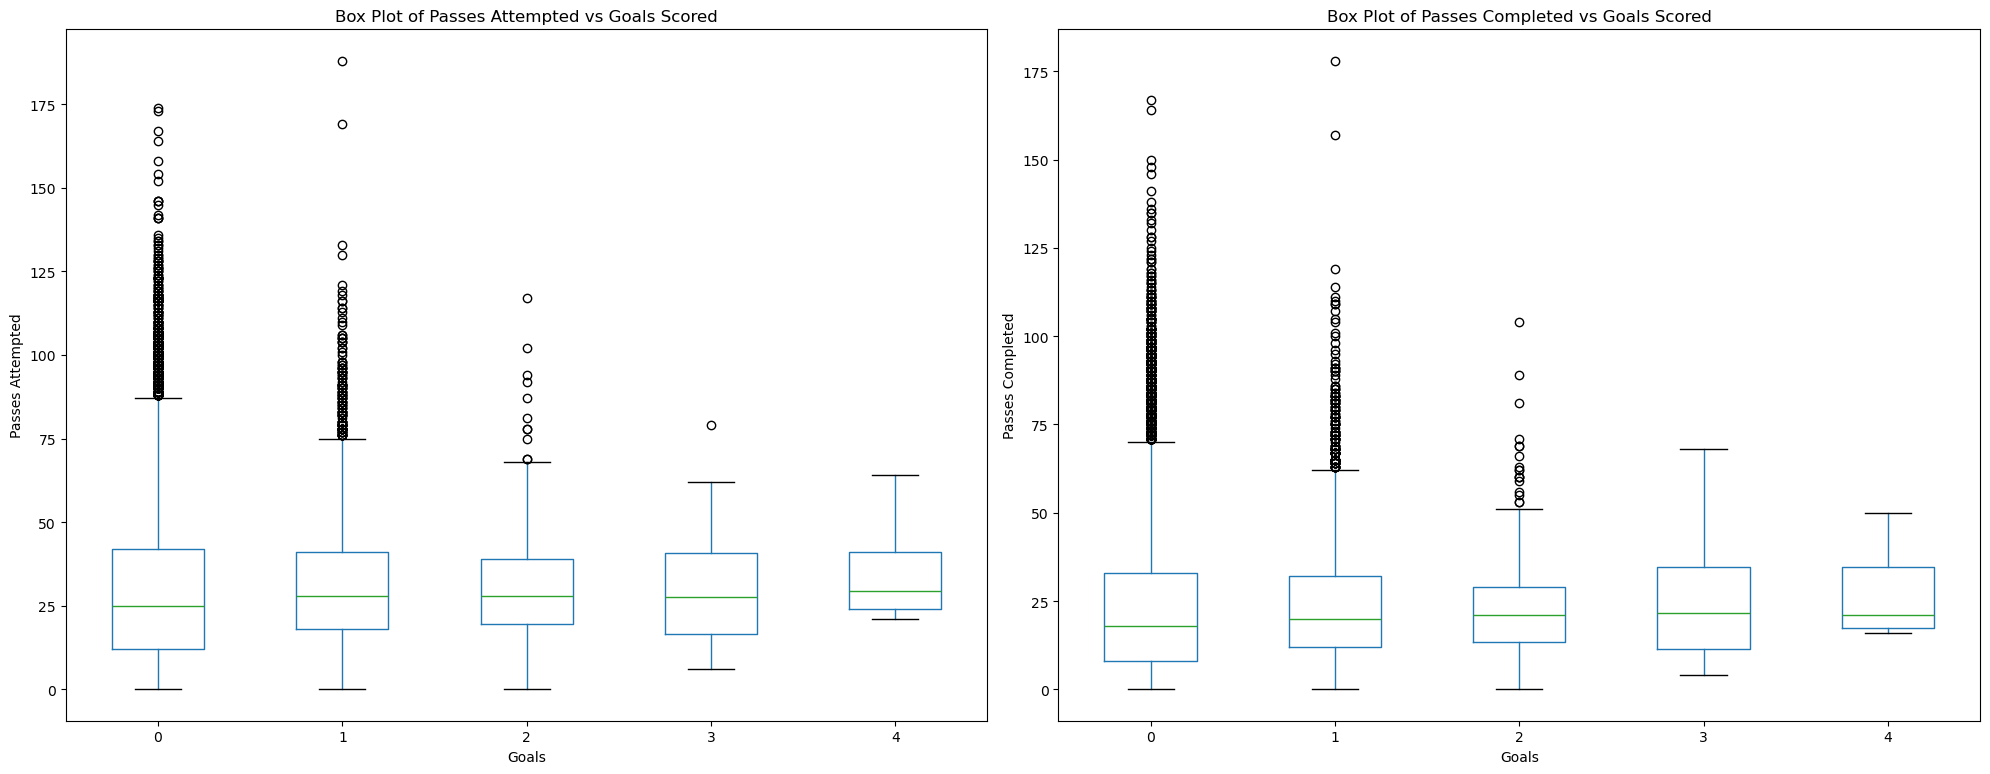

In [181]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 8))

att_explore.boxplot(column = 'Passes Attempted', by = 'Goals', grid = False, ax = ax1)
ax1.set_title('Box Plot of Passes Attempted vs Goals Scored')
ax1.set_xlabel('Goals')
ax1.set_ylabel('Passes Attempted')

att_explore.boxplot(column = 'Passes Completed', by = 'Goals', grid = False, ax = ax2)
ax2.set_title('Box Plot of Passes Completed vs Goals Scored')
ax2.set_xlabel('Goals')
ax2.set_ylabel('Passes Completed')

plt.suptitle('')
plt.tight_layout()
plt.show()

The two boxplots above show us that the median value for Passes Attempted and Passes Completed are pretty much the same regardless of the number of goals scored. As seen in the previous plot, we are quite confident that there isn't any strong relationship between goals scored and passes attempted/passes completed/pass completion percentage. 

We now take a look at the 'Passing Distance' feature. 

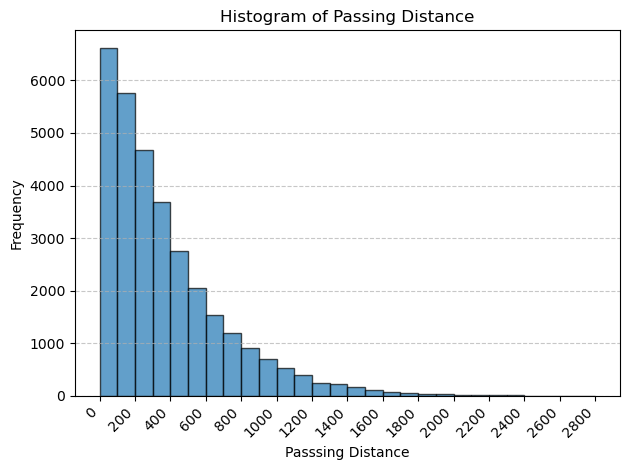

In [182]:
passdist_count = att_explore['Passing Distance'].value_counts().sort_index()

# Create the histogram
fig, ax = plt.subplots()

# Define the bins
bins = np.arange(0, 2900, 100)  # 0, 10, 20, ..., 100

# Plot the histogram
ax.hist(att_explore['Passing Distance'], bins=bins, edgecolor='black', alpha=0.7)

# Customize the plot
ax.set_xlabel('Passsing Distance')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Passing Distance')

# Set x-axis ticks and labels
ax.set_xticks(bins[::2])
ax.set_xticklabels([f'{x}' for x in bins[::2]])

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add grid lines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

Once again, the 'Passing Distance' feature is clearly right-skewed. We now look at the relationship between Goals and Passing Distance. 

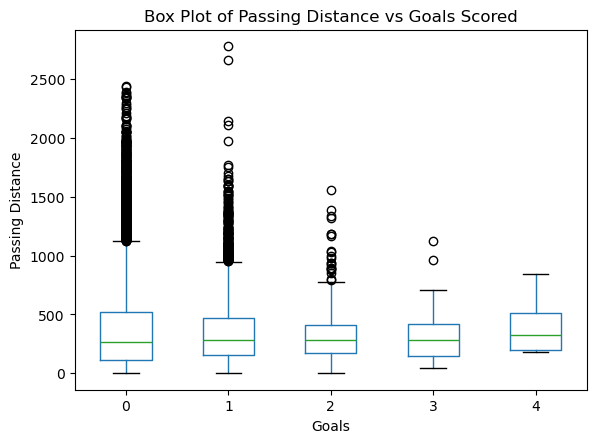

In [183]:
plt.figure
att_explore.boxplot(column = 'Passing Distance', by = 'Goals', grid = False)
plt.title('Box Plot of Passing Distance vs Goals Scored')
plt.suptitle('')
plt.xlabel('Goals')
plt.ylabel('Passing Distance')
plt.show()

Again, we see that there isn't a relationship between Passing Distance and Goals. The median value is quite similar regardless of the number of goals scored.

#### Progressive Passing

A progressive pass is defined as a forward pass that advances a team significantly closer to the opponent's goal. Specific definitions apply based on the starting and finishing positions of the pass. More information is available here: https://dataglossary.wyscout.com/progressive_pass/#:~:text=A%20forward%20pass%20that%20attempts,closer%20to%20the%20opponent's%20goal.

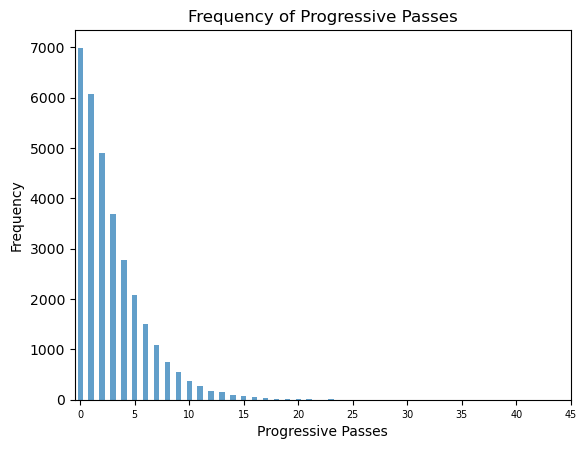

In [184]:
prgpass_count = att_explore['Progressive Passes'].value_counts().sort_index()

fig, ax = plt.subplots()

prgpass_count.plot(kind = 'bar', alpha = 0.7)

ax.set_xlabel('Progressive Passes')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Progressive Passes')
#set_xticks is used to only have certain values on the x axis. without this on, every x axis value was printed, which meant that the x axis values overlapped, affecting readability 
ax.set_xticks(range(0, 50, 5))
ax.set_xticklabels(range(0, 50, 5))

plt.xticks(rotation = 0, fontsize = 7)
plt.show()

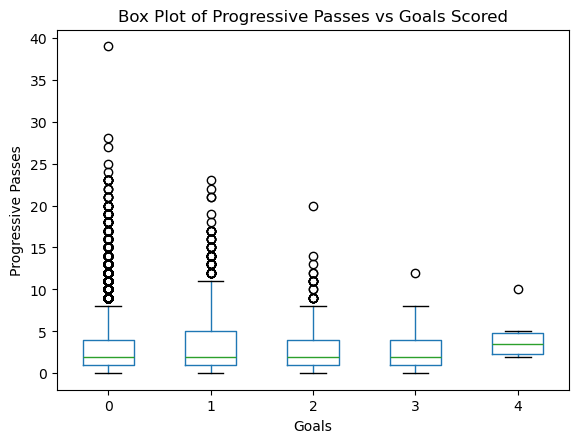

In [185]:
plt.figure
att_explore.boxplot(column = 'Progressive Passes', by = 'Goals', grid = False)
plt.title('Box Plot of Progressive Passes vs Goals Scored')
plt.suptitle('')
plt.xlabel('Goals')
plt.ylabel('Progressive Passes')
plt.show()

Again, similar result where we don't really see a relationship between the number of goals scored and the median number of Progressive Passes. 

We now have a look at 'Progressive Passing Distance'. We don't expect there to be any relationship between this, we can first visualise the relationship between 'Progressive Passes' and 'Progressive Passing Distance' with a scatter plot.

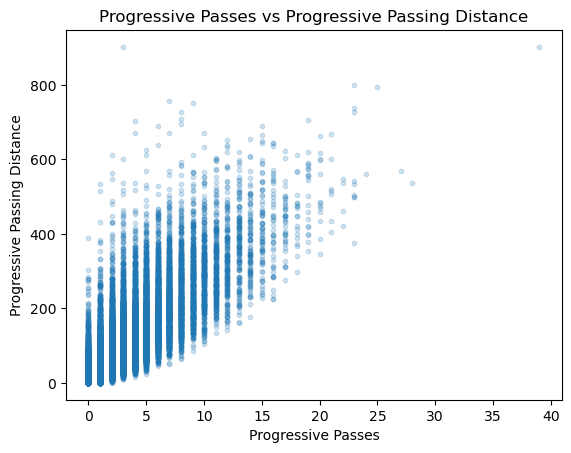

In [186]:
plt.figure()

plt.scatter(att_explore['Progressive Passes'], att_explore['Progressive Passing Distance'], alpha = 0.2, s = 10)
plt.title('Progressive Passes vs Progressive Passing Distance')
plt.xlabel('Progressive Passes')
plt.ylabel('Progressive Passing Distance')
plt.show()

The plot above suggests that there is a positive relationship between Progressive Passes and Progressive Passing Distance. The more progressive passes recorded, the greater the progressive passing distance. This makes a lot of intuitive sense. There are a few outliers however. For example, there is a noticeable one located in the top left of the plot. 

In [187]:
att_explore.loc[[25535]][['Venue', 'Result', 'Team', 'Opponent', 'Position', 'Minutes Played', 'Progressive Passes', 'Progressive Passing Distance']]

Venue Result            Team       Opponent Position  Minutes Played  \
25535  Home  W 4–2  Manchester Utd  Sheffield Utd       CB              90   

       Progressive Passes  Progressive Passing Distance  
25535                   3                           901

This observation recorded a progressive passing distance of 901 with only 3 progressive passes. Although this may appear to be impossible (how can each progressive pass average a distance of 300 yards if the pitch is only 100 yards long), this can explained by the fact that passes not recorded as progressive passes are still counted when calculating the progressive passing distance. Therefore, a lot of short forward passes that don't travel enough distance to be recorded as a progressive pass will simultaneously not be recorded as a progressive pass, yet contribute to the progressive passing distance. 

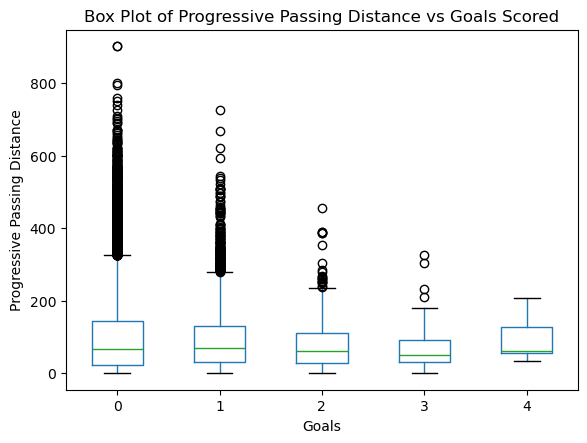

In [188]:
plt.figure
att_explore.boxplot(column = 'Progressive Passing Distance', by = 'Goals', grid = False)
plt.title('Box Plot of Progressive Passing Distance vs Goals Scored')
plt.suptitle('')
plt.xlabel('Goals')
plt.ylabel('Progressive Passing Distance')
plt.show()

Here, we see quite a similar plot to above. We can conclude that there is probably no relationship between Progressive Passing Distance and Goals Scored. 

#### Short/Medium/Long Passes

The above analysis allowed us to conclude that there is likely no relationship between pass completion (and analogously passes attempted/passes completed) and goals scored. We expect to see similar when looking at the relationship between short/medium/long passes and goals scored.  

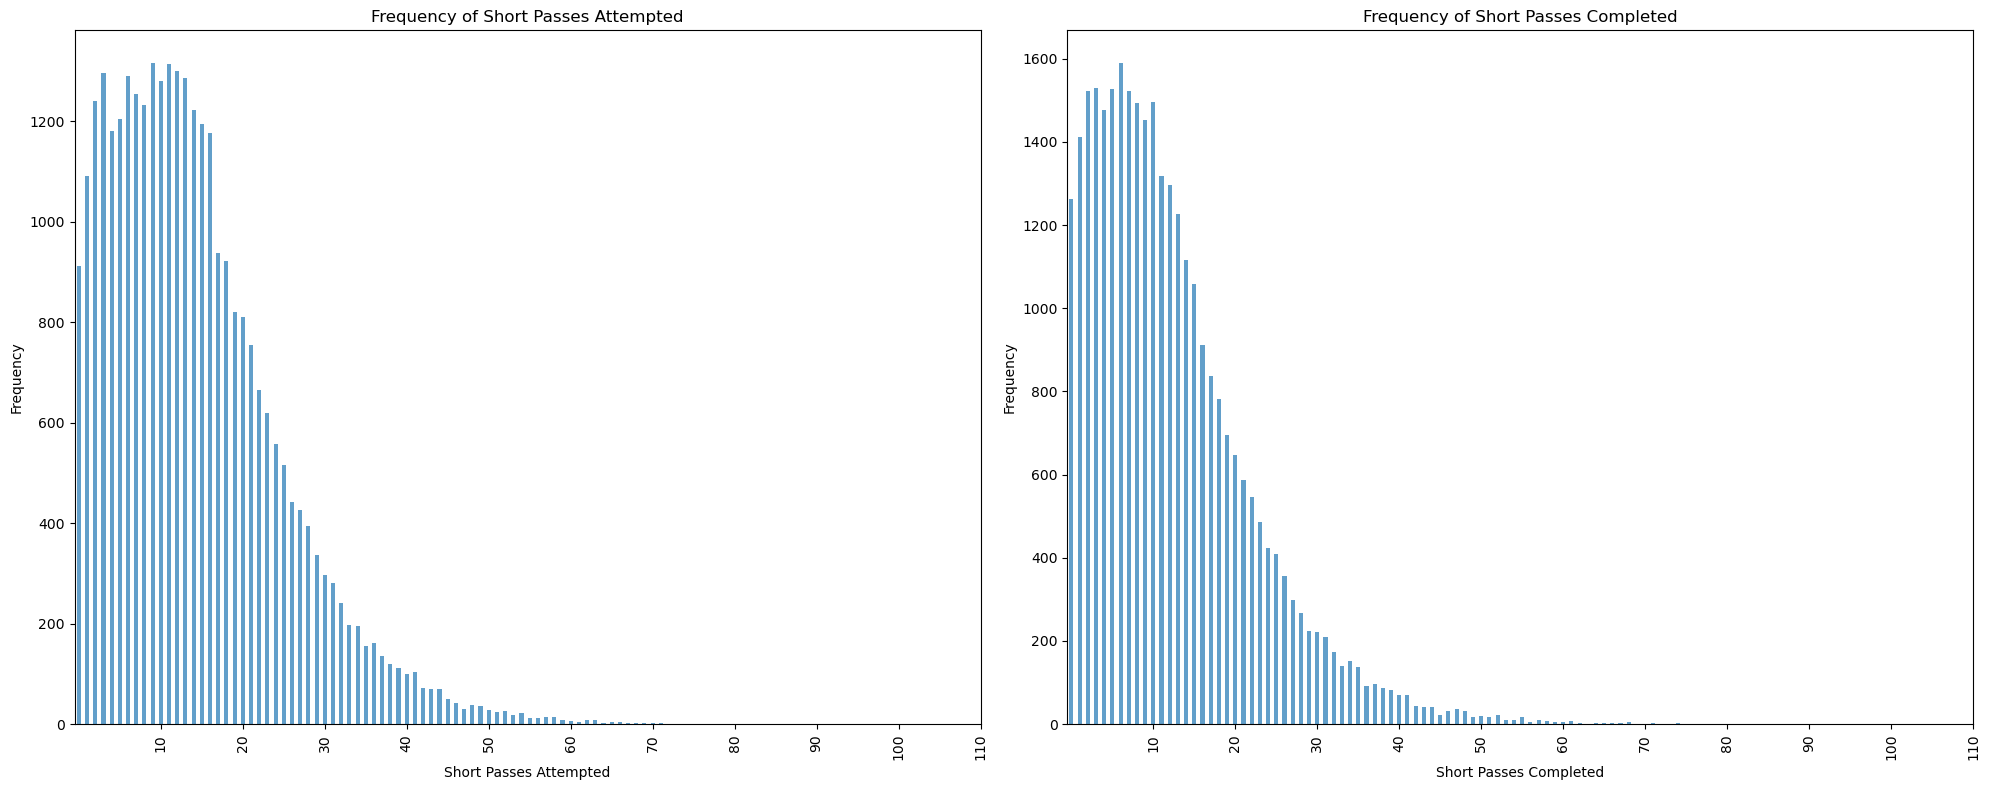

In [189]:
shortpasscomp_count = att_explore['Short Passes Completed'].value_counts().sort_index()
shortpassatt_count = att_explore['Short Passes Attempted'].value_counts().sort_index()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 8))

shortpassatt_count.plot(kind = 'bar', alpha = 0.7, ax = ax1)
ax1.set_xlabel('Short Passes Attempted')
ax1.set_ylabel('Frequency')
ax1.set_title('Frequency of Short Passes Attempted')
#set_xticks is used to only have certain values on the x axis. without this on, every x axis value was printed, which meant that the x axis values overlapped, affecting readability 
ax1.set_xticks(range(10, 120, 10))
ax1.set_xticklabels(range(10, 120, 10))


shortpasscomp_count.plot(kind = 'bar', alpha = 0.7, ax = ax2)
ax2.set_xlabel('Short Passes Completed')
ax2.set_ylabel('Frequency')
ax2.set_title('Frequency of Short Passes Completed')
#set_xticks is used to only have certain values on the x axis. without this on, every x axis value was printed, which meant that the x axis values overlapped, affecting readability 
ax2.set_xticks(range(10, 120, 10))
ax2.set_xticklabels(range(10, 120, 10))

# plt.xticks(rotation = 0, fontsize = 7)
plt.tight_layout()
plt.show()

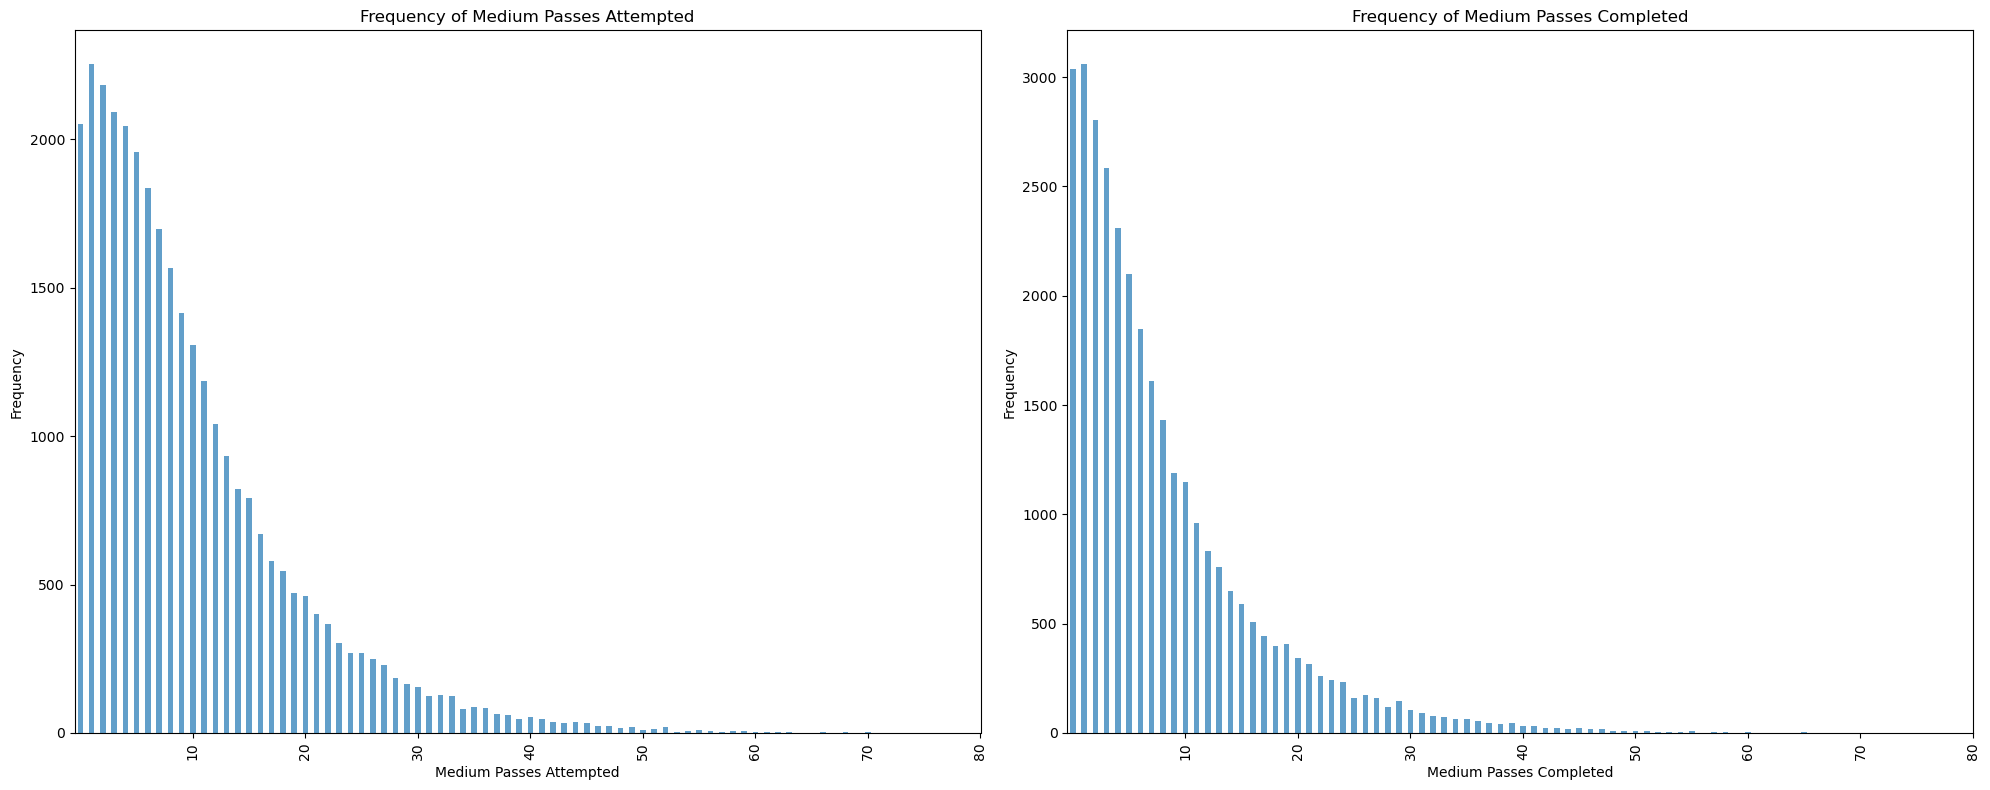

In [190]:
shortpasscomp_count = att_explore['Medium Passes Completed'].value_counts().sort_index()
shortpassatt_count = att_explore['Medium Passes Attempted'].value_counts().sort_index()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 8))

shortpassatt_count.plot(kind = 'bar', alpha = 0.7, ax = ax1)
ax1.set_xlabel('Medium Passes Attempted')
ax1.set_ylabel('Frequency')
ax1.set_title('Frequency of Medium Passes Attempted')
#set_xticks is used to only have certain values on the x axis. without this on, every x axis value was printed, which meant that the x axis values overlapped, affecting readability 
ax1.set_xticks(range(10, 90, 10))
ax1.set_xticklabels(range(10, 90, 10))


shortpasscomp_count.plot(kind = 'bar', alpha = 0.7, ax = ax2)
ax2.set_xlabel('Medium Passes Completed')
ax2.set_ylabel('Frequency')
ax2.set_title('Frequency of Medium Passes Completed')
#set_xticks is used to only have certain values on the x axis. without this on, every x axis value was printed, which meant that the x axis values overlapped, affecting readability 
ax2.set_xticks(range(10, 90, 10))
ax2.set_xticklabels(range(10, 90, 10))

# plt.xticks(rotation = 0, fontsize = 7)
plt.tight_layout()
plt.show()

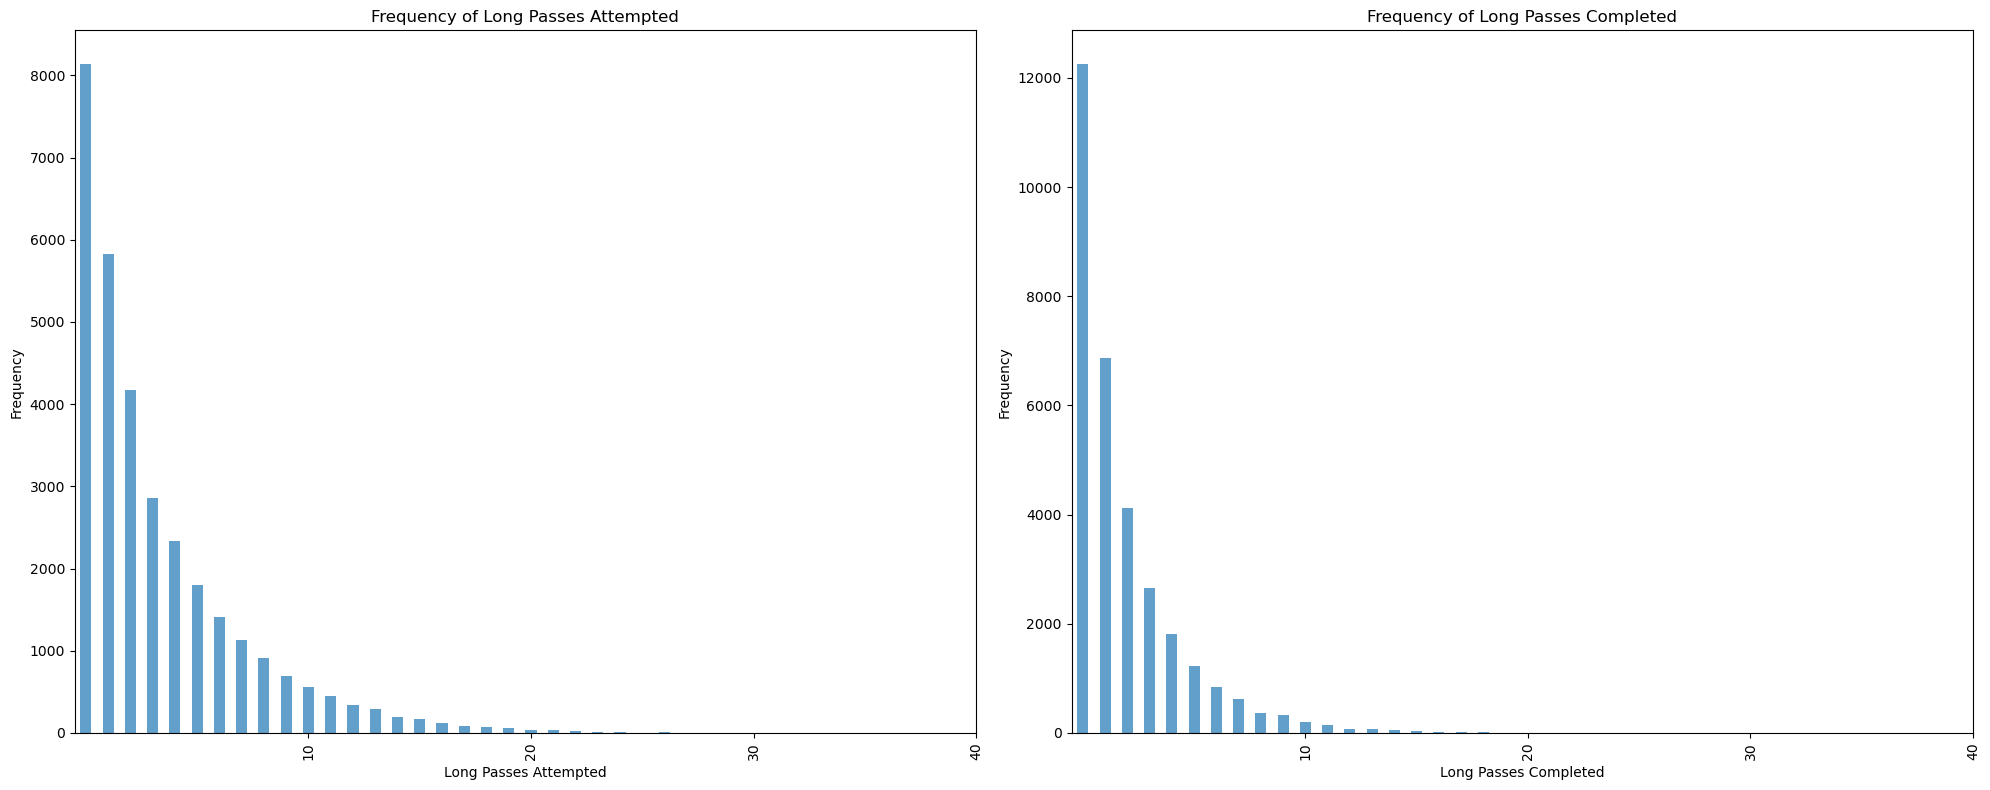

In [191]:
shortpasscomp_count = att_explore['Long Passes Completed'].value_counts().sort_index()
shortpassatt_count = att_explore['Long Passes Attempted'].value_counts().sort_index()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 8))

shortpassatt_count.plot(kind = 'bar', alpha = 0.7, ax = ax1)
ax1.set_xlabel('Long Passes Attempted')
ax1.set_ylabel('Frequency')
ax1.set_title('Frequency of Long Passes Attempted')
#set_xticks is used to only have certain values on the x axis. without this on, every x axis value was printed, which meant that the x axis values overlapped, affecting readability 
ax1.set_xticks(range(10, 50, 10))
ax1.set_xticklabels(range(10, 50, 10))


shortpasscomp_count.plot(kind = 'bar', alpha = 0.7, ax = ax2)
ax2.set_xlabel('Long Passes Completed')
ax2.set_ylabel('Frequency')
ax2.set_title('Frequency of Long Passes Completed')
#set_xticks is used to only have certain values on the x axis. without this on, every x axis value was printed, which meant that the x axis values overlapped, affecting readability 
ax2.set_xticks(range(10, 50, 10))
ax2.set_xticklabels(range(10, 50, 10))

# plt.xticks(rotation = 0, fontsize = 7)
plt.tight_layout()
plt.show()

We can see that the frequency of short/medium/long passes completed/attempted are quite similar to the frequency of passes completed/attempted. 

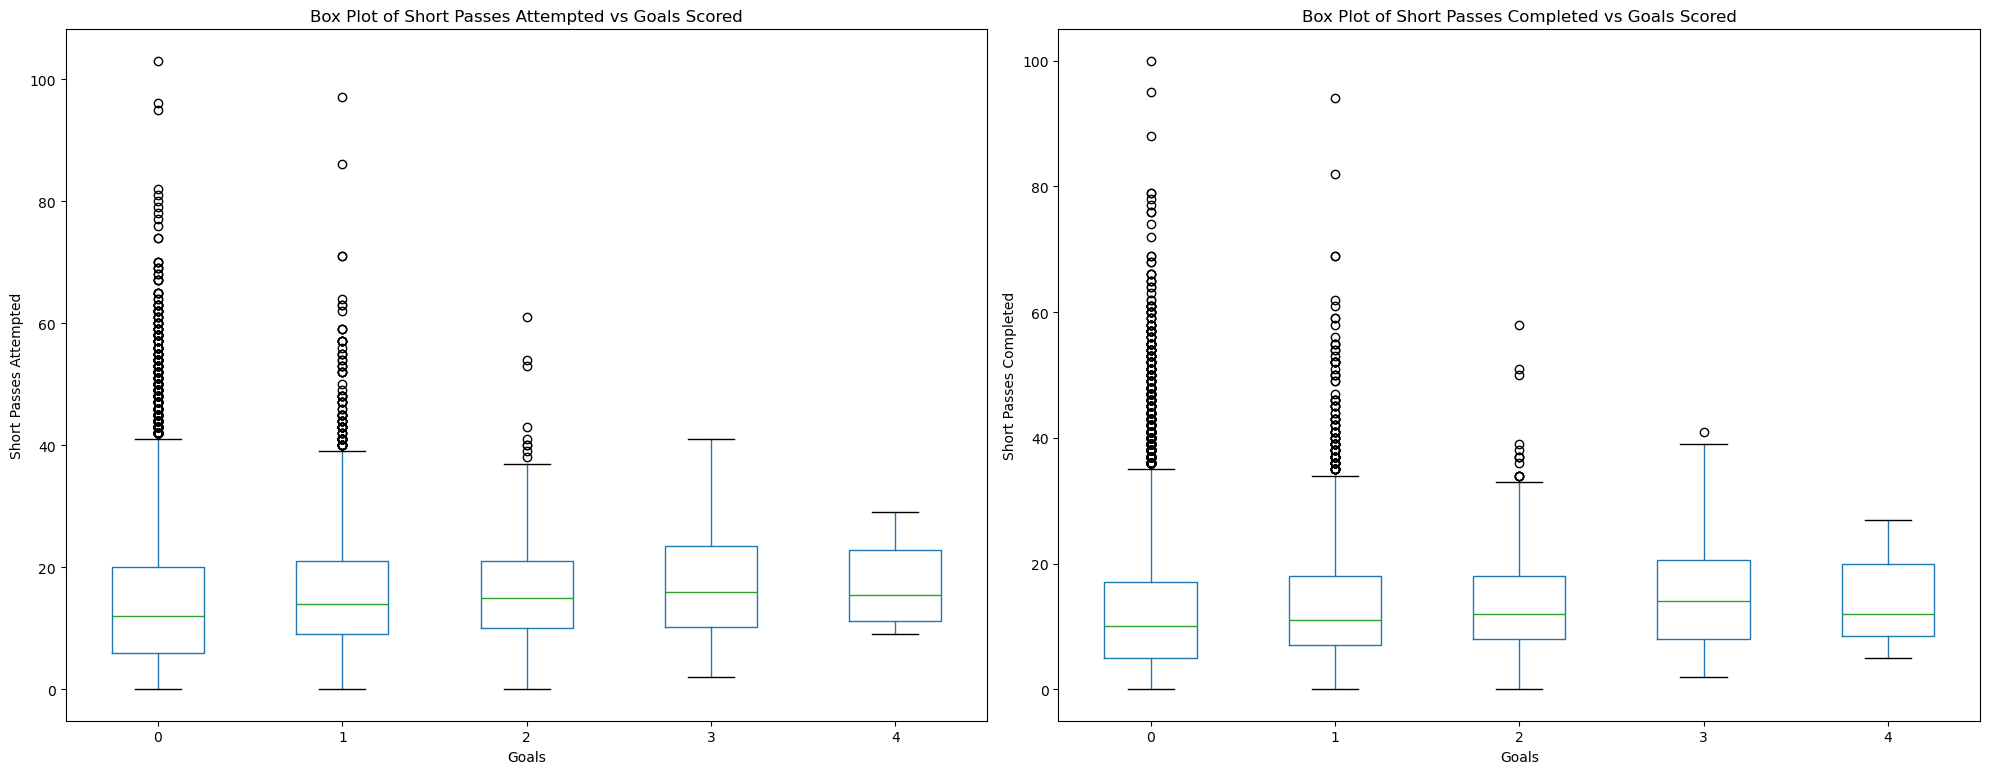

In [192]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 8))

att_explore.boxplot(column = 'Short Passes Attempted', by = 'Goals', grid = False, ax = ax1)
ax1.set_title('Box Plot of Short Passes Attempted vs Goals Scored')
ax1.set_xlabel('Goals')
ax1.set_ylabel('Short Passes Attempted')

att_explore.boxplot(column = 'Short Passes Completed', by = 'Goals', grid = False, ax = ax2)
ax2.set_title('Box Plot of Short Passes Completed vs Goals Scored')
ax2.set_xlabel('Goals')
ax2.set_ylabel('Short Passes Completed')

plt.suptitle('')
plt.tight_layout()
plt.show()

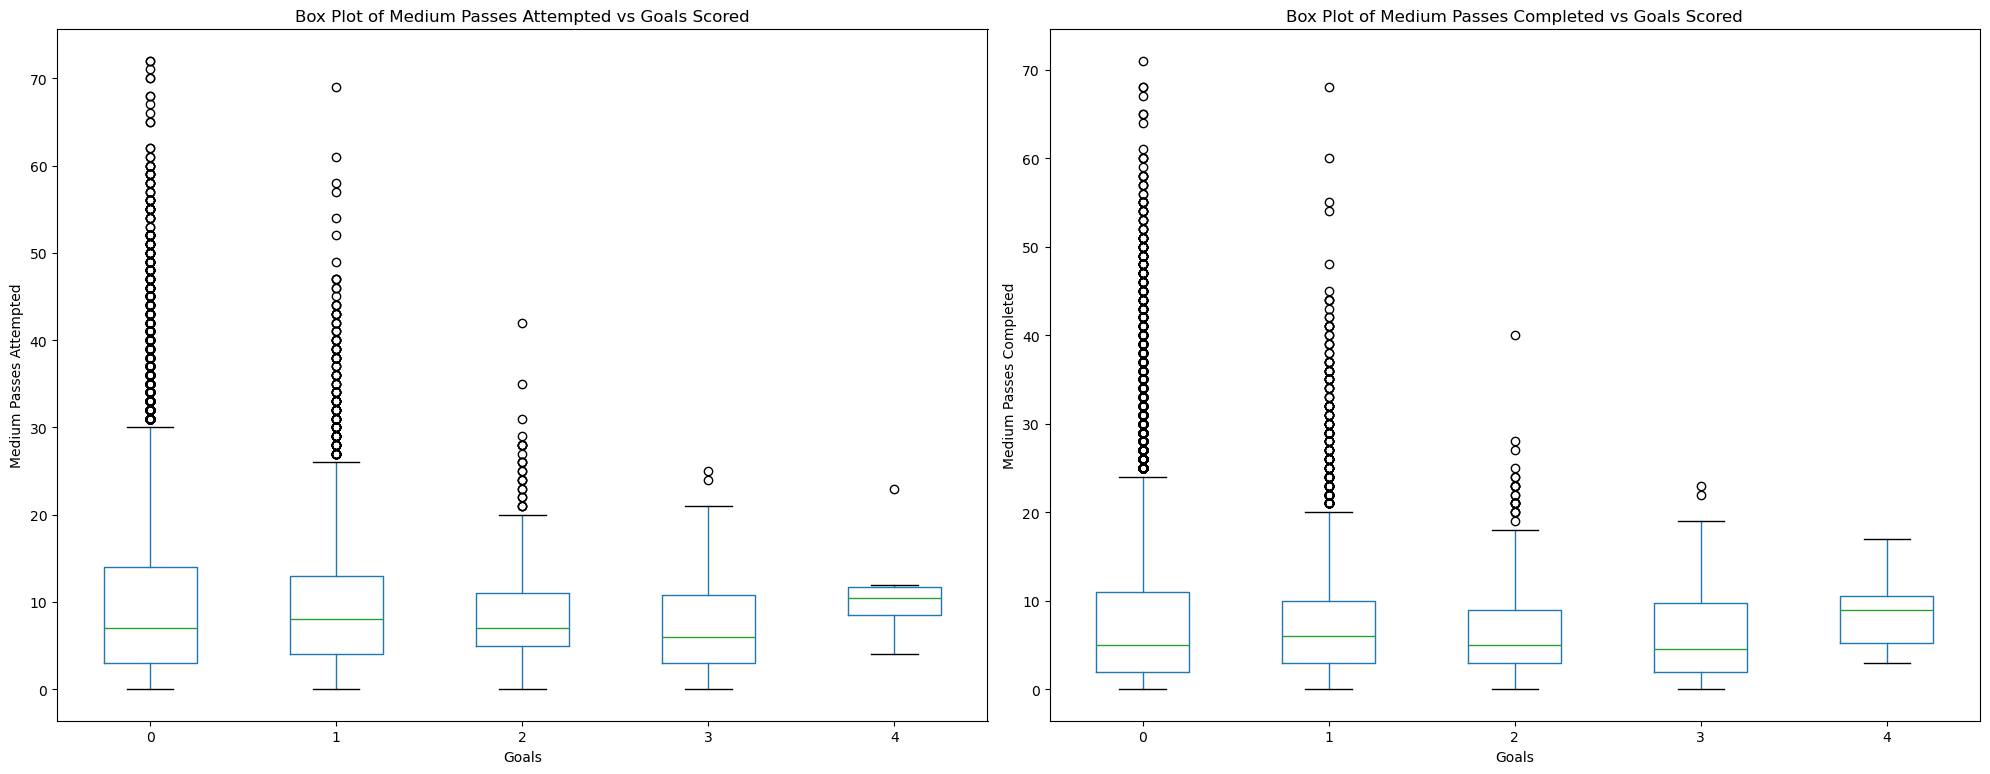

In [193]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 8))

att_explore.boxplot(column = 'Medium Passes Attempted', by = 'Goals', grid = False, ax = ax1)
ax1.set_title('Box Plot of Medium Passes Attempted vs Goals Scored')
ax1.set_xlabel('Goals')
ax1.set_ylabel('Medium Passes Attempted')

att_explore.boxplot(column = 'Medium Passes Completed', by = 'Goals', grid = False, ax = ax2)
ax2.set_title('Box Plot of Medium Passes Completed vs Goals Scored')
ax2.set_xlabel('Goals')
ax2.set_ylabel('Medium Passes Completed')

plt.suptitle('')
plt.tight_layout()
plt.show()

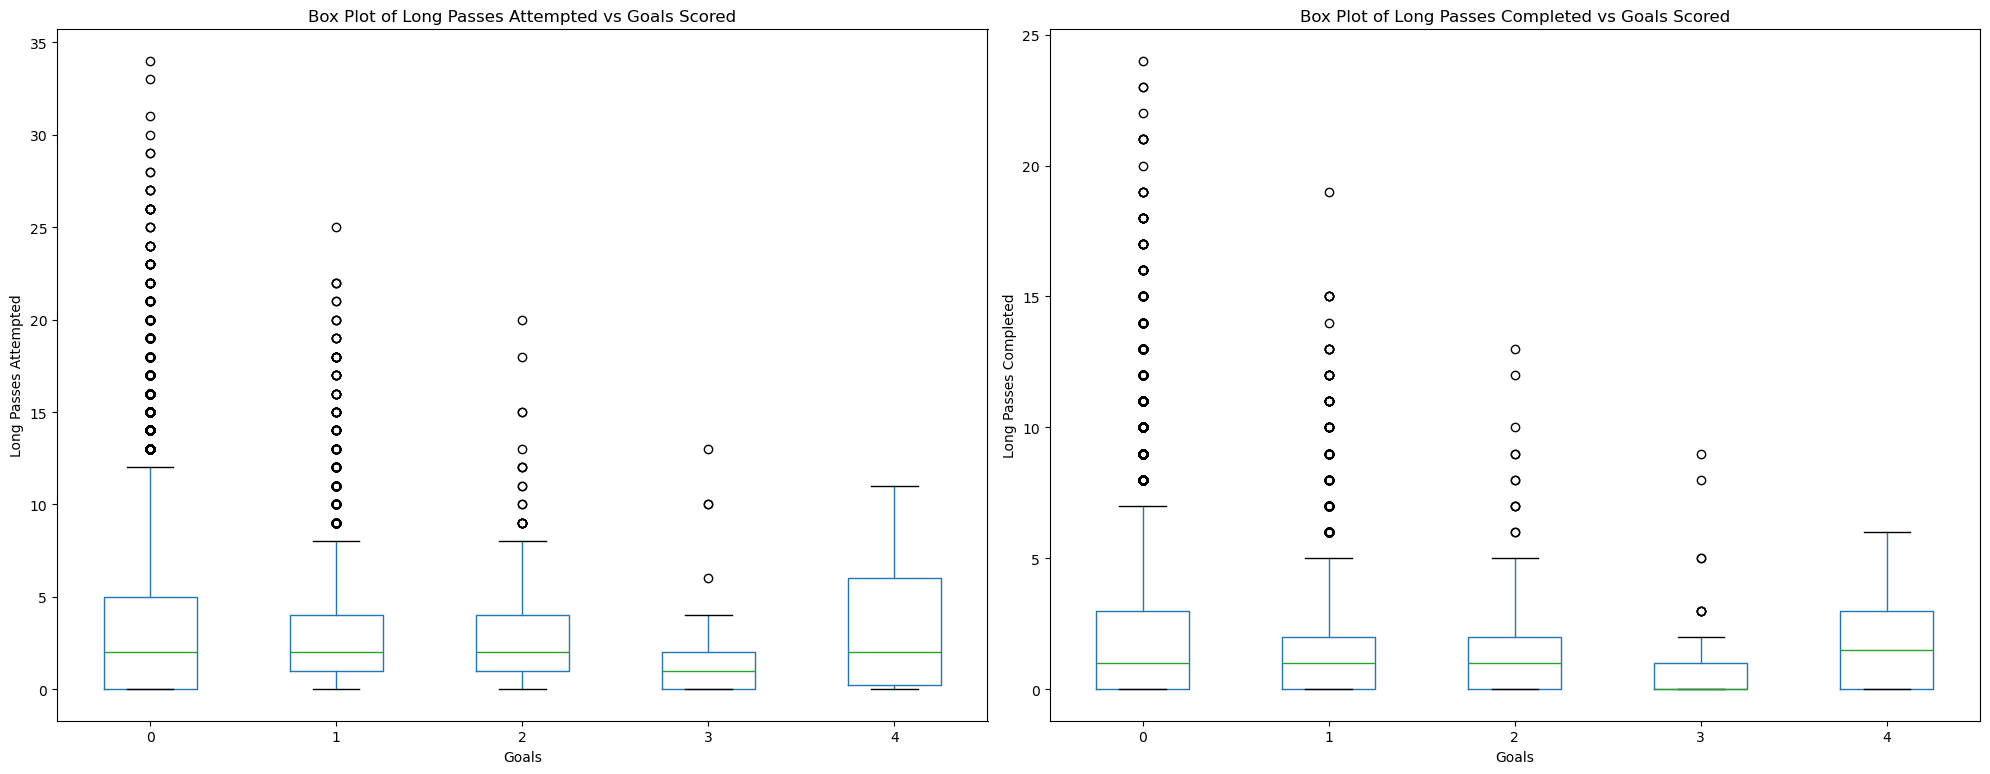

In [194]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 8))

att_explore.boxplot(column = 'Long Passes Attempted', by = 'Goals', grid = False, ax = ax1)
ax1.set_title('Box Plot of Long Passes Attempted vs Goals Scored')
ax1.set_xlabel('Goals')
ax1.set_ylabel('Long Passes Attempted')

att_explore.boxplot(column = 'Long Passes Completed', by = 'Goals', grid = False, ax = ax2)
ax2.set_title('Box Plot of Long Passes Completed vs Goals Scored')
ax2.set_xlabel('Goals')
ax2.set_ylabel('Long Passes Completed')

plt.suptitle('')
plt.tight_layout()
plt.show()

The boxplots exhibit a relationship that we expected. There doesn't appear to be a relationship between the number of passes attempted/completed of different lengths (short/medium/long) and the number of goals scored. 

#### Passes into Final Third/Penalty Area

We now turn to look at the relationship between goals scored and passes into the final third/penalty area. We expect these features to have a stronger relationship with Assists, and not necessarily to have a strong relationship with Goals. This is because high number of passes into the final third/penalty area are reflective of a creative player who is consistently playing passes into dangerous attacking areas, which means they should generally be more likely to get more assists. 

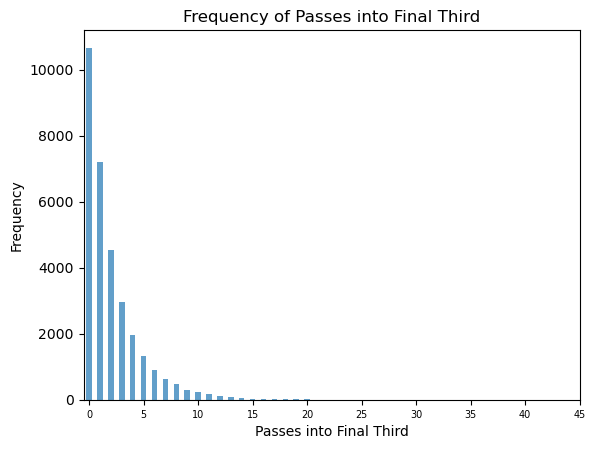

In [195]:
passfinalthird_count = att_explore['Passes into Final Third'].value_counts().sort_index()

fig, ax = plt.subplots()

passfinalthird_count.plot(kind = 'bar', alpha = 0.7)

ax.set_xlabel('Passes into Final Third')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Passes into Final Third')
#set_xticks is used to only have certain values on the x axis. without this on, every x axis value was printed, which meant that the x axis values overlapped, affecting readability 
ax.set_xticks(range(0, 50, 5))
ax.set_xticklabels(range(0, 50, 5))

plt.xticks(rotation = 0, fontsize = 7)
plt.show()

As with the frequency of all passing data so far, we see that the frequency is left-skewed. 

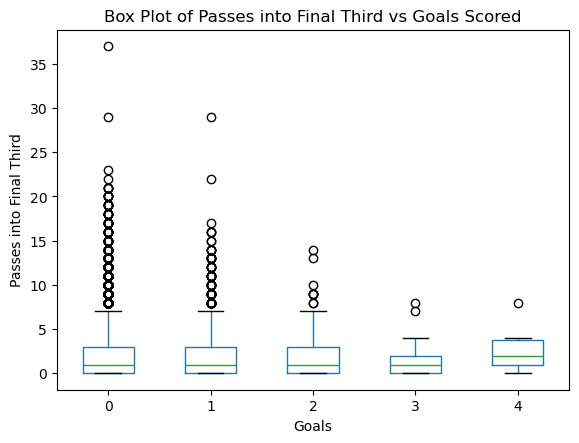

In [196]:
plt.figure
att_explore.boxplot(column = 'Passes into Final Third', by = 'Goals', grid = False)
plt.title('Box Plot of Passes into Final Third vs Goals Scored')
plt.suptitle('')
plt.xlabel('Goals')
plt.ylabel('Passes into Final Third')
plt.show()

Again, the median value for passes into final third is pretty much the same across different amounts of goals scored. Let's have a look at the relationship between this feature and assists. 

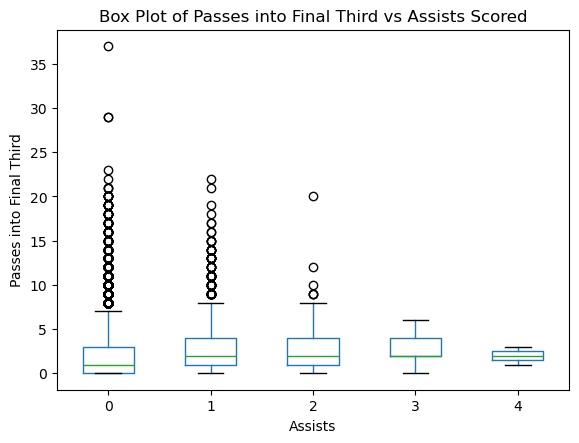

In [197]:
plt.figure
att_explore.boxplot(column = 'Passes into Final Third', by = 'Assists', grid = False)
plt.title('Box Plot of Passes into Final Third vs Assists Scored')
plt.suptitle('')
plt.xlabel('Assists')
plt.ylabel('Passes into Final Third')
plt.show()

It appears as if the median value for passes into the final third is higher for observations that record at least 1 assist, compared to observations that don't record an assist at all. We can reproduce the above plot, but this time grouping together observations that have non-zero values for Assists. 

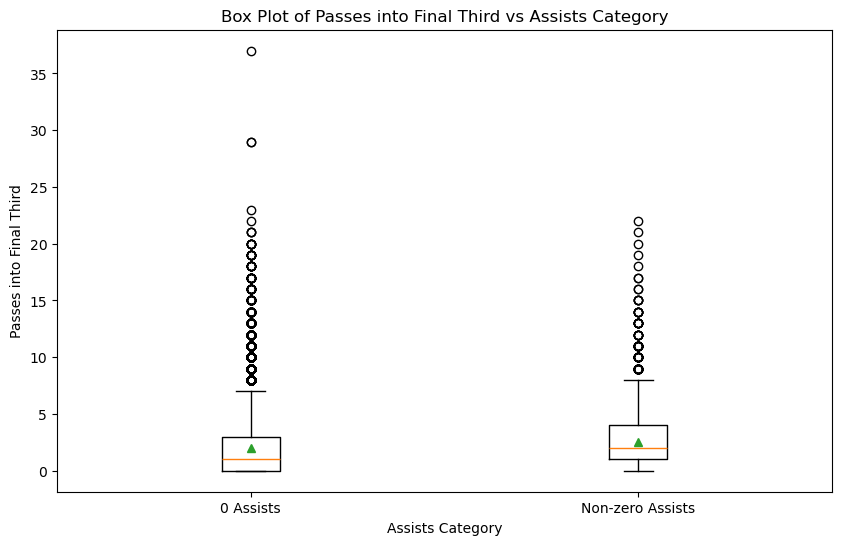

In [198]:
# Create a figure and axes
plt.figure(figsize=(10, 6))

# Prepare the data
# Group the data into two categories: '0 Assists' and 'Non-zero Assists'
data = [att_explore[att_explore['Assists'] == 0]['Passes into Final Third'],   # Assists == 0
        att_explore[att_explore['Assists'] != 0]['Passes into Final Third']]   # Assists != 0

# Create a boxplot with two boxes
plt.boxplot(data, labels=['0 Assists', 'Non-zero Assists'], showmeans = True)

# Set the title and labels
plt.title('Box Plot of Passes into Final Third vs Assists Category')
plt.xlabel('Assists Category')
plt.ylabel('Passes into Final Third')

# Show the plot
plt.show()

So we can definitely see that the median values are slightly different when comparing observations with zero assists with observations with non-zero assists. However, we can also see that the mean passes into final third values are quite similar (the mean values are represented by the green triangles). The reason why the mean values are similar could be explained by the fact that there are quite a few observations that have 0 assists, but have quite large values for passes into the final third. Therefore, using the mean as a measure of central tendancy is perhaps not the best idea. Another thing to note is that the difference in the median values of passes into the final third isn't necessarily that large. The difference we can see could potentially be attributed to normal variation, instead of a more significant underlying relationship. 

One thing that could also be impacting our interpretation is the inclusion of observations with 0 passes into the final third in the plots. We can try exclude these observations and replot to see if we draw any different conclusions. 

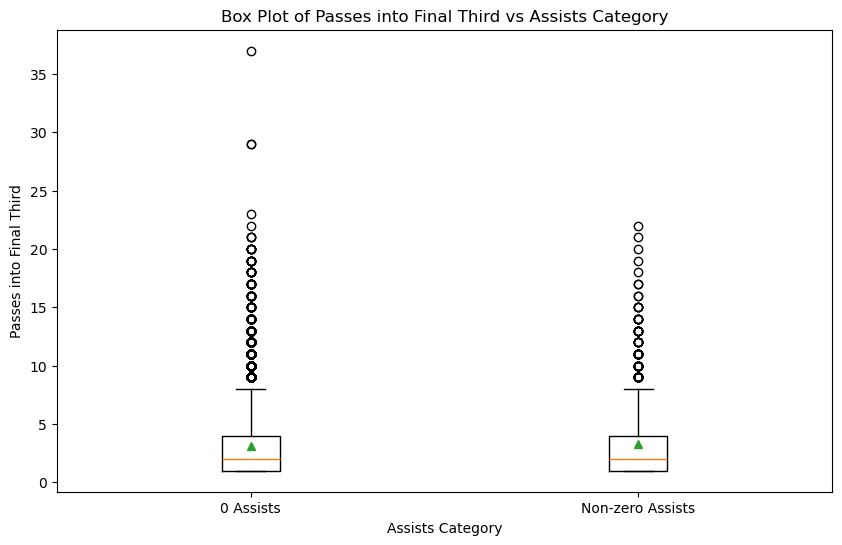

In [199]:
plt.figure(figsize=(10, 6))

data = [
    att_explore[(att_explore['Assists'] == 0) & (att_explore['Passes into Final Third'] > 0)]['Passes into Final Third'],   # Assists == 0 and Passes into Final Third > 0
    att_explore[(att_explore['Assists'] != 0) & (att_explore['Passes into Final Third'] > 0)]['Passes into Final Third']    # Assists != 0 and Passes into Final Third > 0
]

plt.boxplot(data, labels=['0 Assists', 'Non-zero Assists'], showmeans = True)

plt.title('Box Plot of Passes into Final Third vs Assists Category')
plt.xlabel('Assists Category')
plt.ylabel('Passes into Final Third')

plt.show()

What we actually see now is that the mean and median passes into the final third is pretty much the same when comparing observations with 0 assists with observations with non-zero assists. So we have shown that the variation we saw before was actually attributed to the observations that have 0 passes into the final third 'pulling down' the median. 

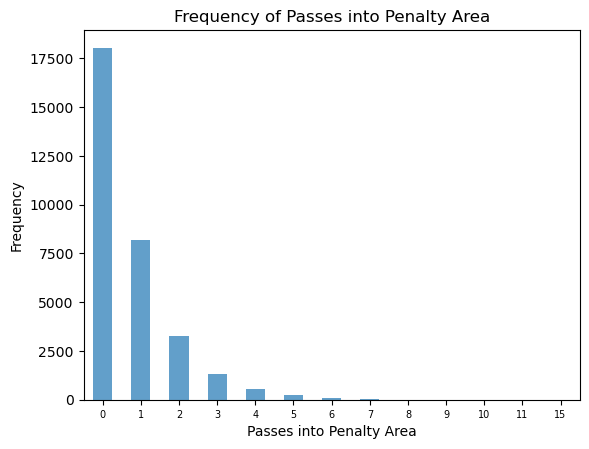

In [200]:
passintopenarea_count = att_explore['Passes into Penalty Area'].value_counts().sort_index()

fig, ax = plt.subplots()

passintopenarea_count.plot(kind = 'bar', alpha = 0.7)

ax.set_xlabel('Passes into Penalty Area')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Passes into Penalty Area')
#set_xticks is used to only have certain values on the x axis. without this on, every x axis value was printed, which meant that the x axis values overlapped, affecting readability 
# ax.set_xticks(range(0, 30, 5))
# ax.set_xticklabels(range(0, 30, 5))

plt.xticks(rotation = 0, fontsize = 7)
plt.show()

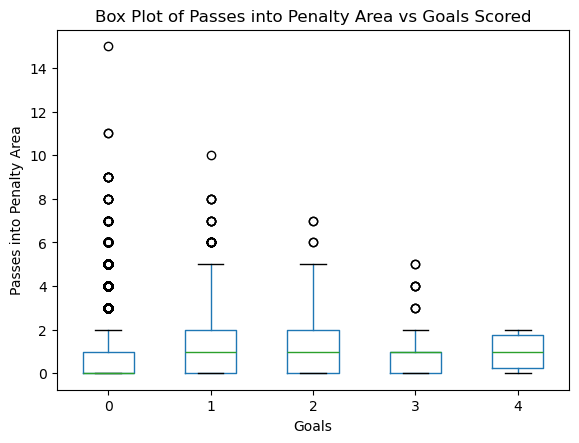

In [201]:
plt.figure
att_explore.boxplot(column = 'Passes into Penalty Area', by = 'Goals', grid = False)
plt.title('Box Plot of Passes into Penalty Area vs Goals Scored')
plt.suptitle('')
plt.xlabel('Goals')
plt.ylabel('Passes into Penalty Area')
plt.show()

It appears as if the median passes into penalty area is higher for observations that have scored at least 1 goal. Again, we can group the observations by whether or not the number of goals scored is non-zero. 

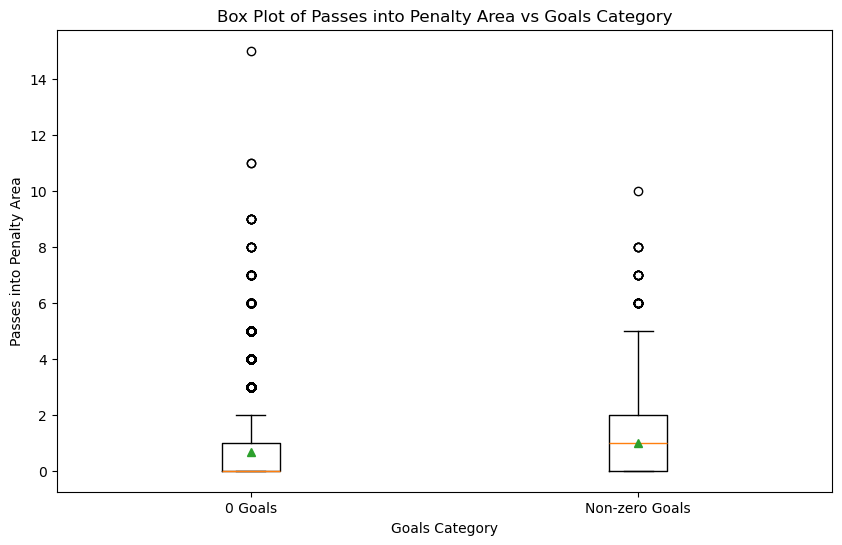

In [202]:
# Create a figure and axes
plt.figure(figsize=(10, 6))

# Prepare the data
# Group the data into two categories: '0 Goals' and 'Non-zero Goals'
data = [att_explore[att_explore['Goals'] == 0]['Passes into Penalty Area'],   # Goals == 0
        att_explore[att_explore['Goals'] != 0]['Passes into Penalty Area']]   # Goals != 0

# Create a boxplot with two boxes
plt.boxplot(data, labels=['0 Goals', 'Non-zero Goals'], showmeans = True)

# Set the title and labels
plt.title('Box Plot of Passes into Penalty Area vs Goals Category')
plt.xlabel('Goals Category')
plt.ylabel('Passes into Penalty Area')

# Show the plot
plt.show()

The plot above exhibits a similar sort of behaviour to what was identified before. The median passes into penalty area is noticeably lower for observations that did not score a goal when compared to observations that scored at least 1 goal. However, the mean passes into the penalty area for the two categories is quite similar. In the previous case, we removed the observations that had zero passes into the penalty area, which then allowed us to see that the median and mean values are actually the same for the two categories. 

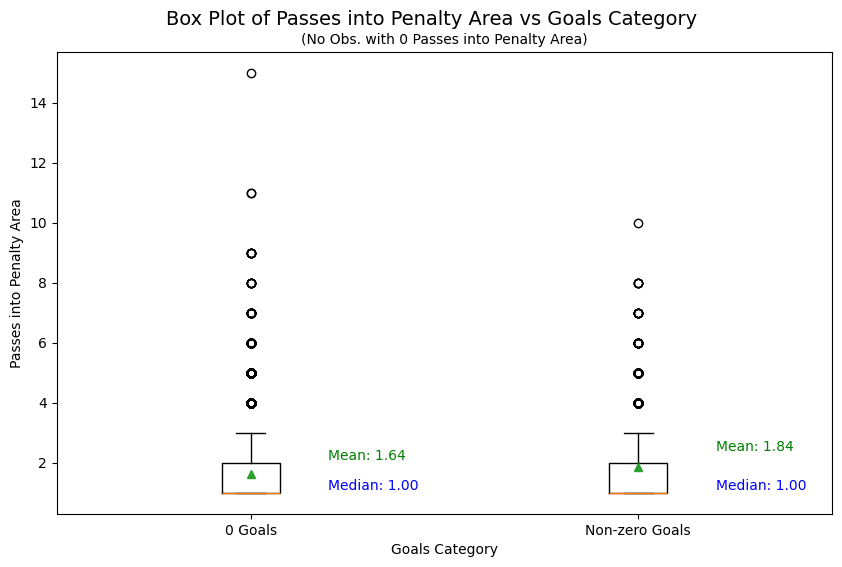

In [203]:
plt.figure(figsize=(10, 6))

data = [
    att_explore[(att_explore['Goals'] == 0) & (att_explore['Passes into Penalty Area'] > 0)]['Passes into Penalty Area'],   # Assists == 0 and Passes into Final Third > 0
    att_explore[(att_explore['Goals'] != 0) & (att_explore['Passes into Penalty Area'] > 0)]['Passes into Penalty Area']    # Assists != 0 and Passes into Final Third > 0
]

plt.boxplot(data, labels=['0 Goals', 'Non-zero Goals'], showmeans = True)

plt.title('(No Obs. with 0 Passes into Penalty Area)', fontsize = 10)
plt.suptitle('Box Plot of Passes into Penalty Area vs Goals Category', y = 0.95, fontsize = 14)
plt.xlabel('Goals Category')
plt.ylabel('Passes into Penalty Area')

# Annotating the mean and median values
for i in range(len(data)):
    # Median (the horizontal line in the box)
    median = np.median(data[i])
    plt.text(i + 1.2, median, f'Median: {median:.2f}', ha='left', va='bottom', color='blue')

    # Mean (the green triangle in the boxplot)
    mean = np.mean(data[i])
    plt.text(i + 1.2, mean + (mean * 0.5), f'Mean: {mean:.2f}', ha='left', va='top', color='green')

plt.show()

Here, we can see that the median passes into the penalty area is now equal for the two categories, but the means are different. However, the difference is not that significant. Perhaps there is no relationship between passes into the penalty area and goals. Let's now have a look at the relationship between this feature and assists. 

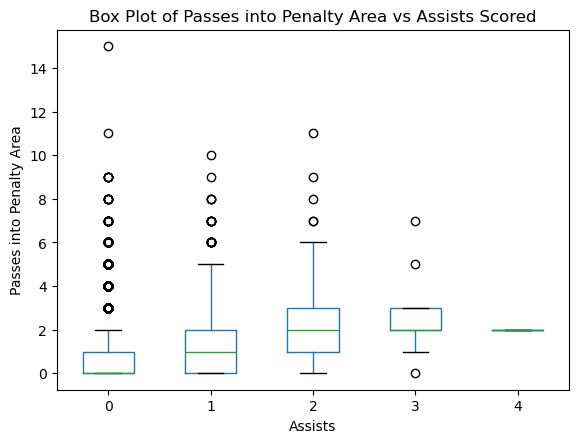

In [204]:
plt.figure
att_explore.boxplot(column = 'Passes into Penalty Area', by = 'Assists', grid = False)
plt.title('Box Plot of Passes into Penalty Area vs Assists Scored')
plt.suptitle('')
plt.xlabel('Assists')
plt.ylabel('Passes into Penalty Area')
plt.show()

This plot shows that there appears to be some relationship between passes into the penalty area and assists. We can see that the median passes into penalty area is higher for observations with 1 assists compared to 2 assists. The median value is then even higher for observations with 2 assists. The median value is then quite similar for 3 assists and 4 assists, but this is probably due to the fact that observations with 3 or 4 assists in 1 game can probably be considered outliers anyways. 

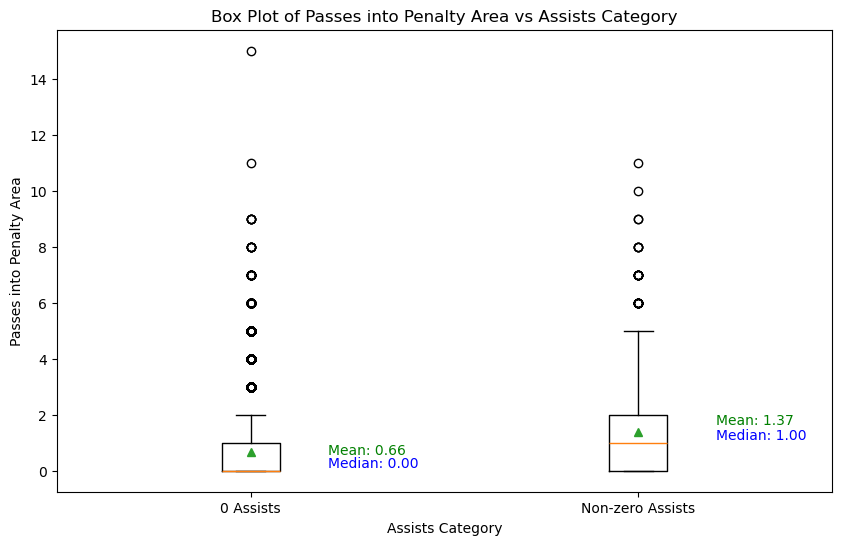

In [205]:
# Create a figure and axes
plt.figure(figsize=(10, 6))

# Prepare the data
# Group the data into two categories: '0 Assists' and 'Non-zero Assists'
data = [att_explore[att_explore['Assists'] == 0]['Passes into Penalty Area'],   # Assists == 0
        att_explore[att_explore['Assists'] != 0]['Passes into Penalty Area']]   # Assists != 0

# Create a boxplot with two boxes
plt.boxplot(data, labels=['0 Assists', 'Non-zero Assists'], showmeans = True)

# Set the title and labels
plt.title('Box Plot of Passes into Penalty Area vs Assists Category')
plt.xlabel('Assists Category')
plt.ylabel('Passes into Penalty Area')

for i in range(len(data)):
    # Median (the horizontal line in the box)
    median = np.median(data[i])
    plt.text(i + 1.2, median, f'Median: {median:.2f}', ha='left', va='bottom', color='blue')

    # Mean (the green triangle in the boxplot)
    mean = np.mean(data[i])
    plt.text(i + 1.2, mean + (mean * 0.5), f'Mean: {mean:.2f}', ha='left', va='top', color='green')
    
# Show the plot
plt.show()

The median passes into the penalty area for observations that recorded no assists is actually zero. However, this is probably because there are quite a few observations that have zero assists and zero passes into the penalty area. Let's again remove the observations with zero passes into the penalty area. 

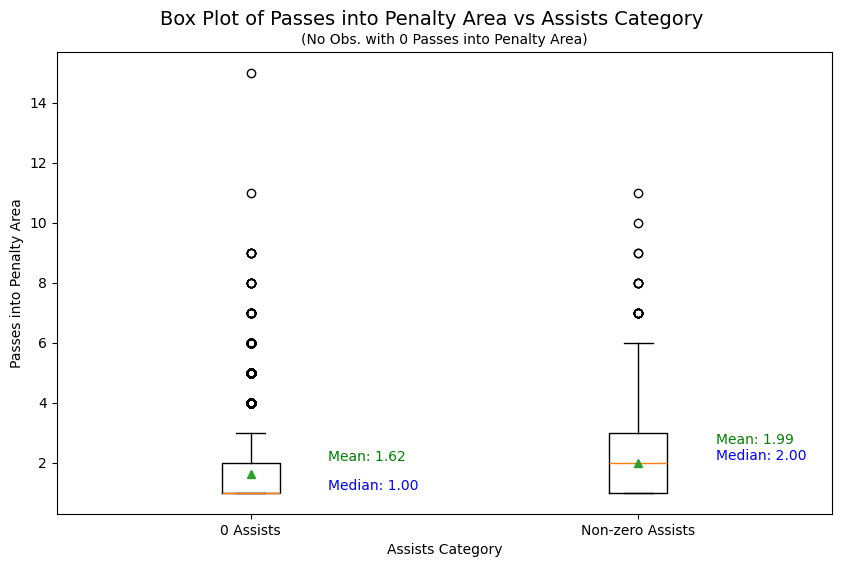

In [206]:
plt.figure(figsize=(10, 6))

data = [
    att_explore[(att_explore['Assists'] == 0) & (att_explore['Passes into Penalty Area'] > 0)]['Passes into Penalty Area'],   # Assists == 0 and Passes into Final Third > 0
    att_explore[(att_explore['Assists'] != 0) & (att_explore['Passes into Penalty Area'] > 0)]['Passes into Penalty Area']    # Assists != 0 and Passes into Final Third > 0
]

plt.boxplot(data, labels=['0 Assists', 'Non-zero Assists'], showmeans = True)

plt.title('(No Obs. with 0 Passes into Penalty Area)', fontsize = 10)
plt.suptitle('Box Plot of Passes into Penalty Area vs Assists Category', y = 0.95, fontsize = 14)
plt.xlabel('Assists Category')
plt.ylabel('Passes into Penalty Area')

# Annotating the mean and median values
for i in range(len(data)):
    # Median (the horizontal line in the box)
    median = np.median(data[i])
    plt.text(i + 1.2, median, f'Median: {median:.2f}', ha='left', va='bottom', color='blue')

    # Mean (the green triangle in the boxplot)
    mean = np.mean(data[i])
    plt.text(i + 1.2, mean + (mean * 0.5), f'Mean: {mean:.2f}', ha='left', va='top', color='green')

plt.show()

Even after removing all observations with 0 passes into the penalty area from the plot, we can see that the median and mean values still exhibit some difference when comparing the two categories. As expected, there is probably a relationship between assists and passes into the penalty area. 

#### Crosses into the Penalty Area

Crosses into the Penalty Area is an interesting metric when it comes to our expectations of whether or not it has any relation to either Goals or Assists. First off, we don't really expect this feature to have any significant relation to Goals, using similar lines of reasoning to justify the relationship between Passes into the Penalty Area and Goals. Now we saw in the previous section that there appears to be some relationship between Passes into the Penalty Area and Assists. This may seemingly provide justification for some sort of relationship between Crosses into the Penalty Area and Assists. However, there is relevant literature which suggests that crosses in general are quite a wasteful way of chance creation, i.e. a lot of crosses are required to produce just one high quality chance. Therefore, it may be the case that a high volume of crosses into the penalty area is not particularly suggestive of increased assist threat. 

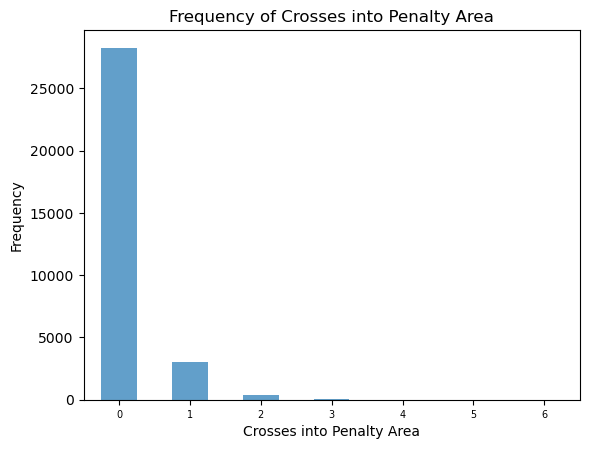

In [207]:
crossintopenarea = att_explore['Crosses into Penalty Area'].value_counts().sort_index()

fig, ax = plt.subplots()

crossintopenarea.plot(kind = 'bar', alpha = 0.7)

ax.set_xlabel('Crosses into Penalty Area')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Crosses into Penalty Area')
#set_xticks is used to only have certain values on the x axis. without this on, every x axis value was printed, which meant that the x axis values overlapped, affecting readability 
# ax.set_xticks(range(0, 30, 5))
# ax.set_xticklabels(range(0, 30, 5))

plt.xticks(rotation = 0, fontsize = 7)
plt.show()

Almost all of the observations have recorded 0 crosses into the penalty area. This already suggests that it is unlikely this will be a particularly useful metric.

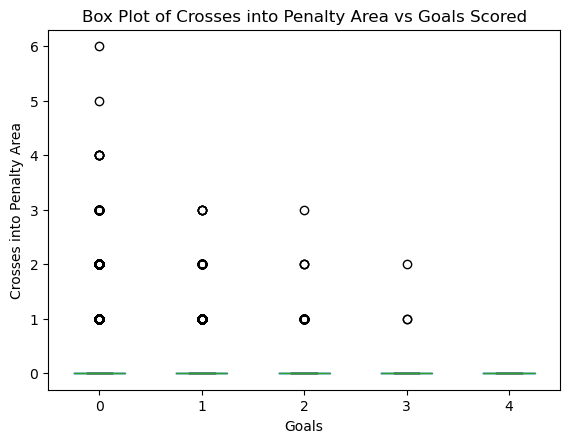

In [208]:
plt.figure
att_explore.boxplot(column = 'Crosses into Penalty Area', by = 'Goals', grid = False)
plt.title('Box Plot of Crosses into Penalty Area vs Goals Scored')
plt.suptitle('')
plt.xlabel('Goals')
plt.ylabel('Crosses into Penalty Area')
plt.show()

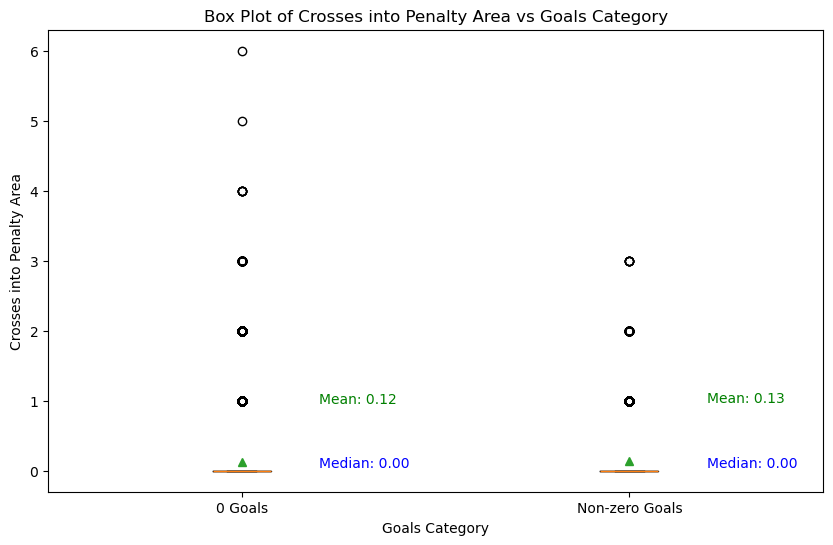

In [209]:
# Create a figure and axes
plt.figure(figsize=(10, 6))

# Prepare the data
# Group the data into two categories: '0 Goals' and 'Non-zero Goals'
data = [att_explore[att_explore['Goals'] == 0]['Crosses into Penalty Area'],   # Goals == 0
        att_explore[att_explore['Goals'] != 0]['Crosses into Penalty Area']]   # Goals != 0

# Create a boxplot with two boxes
plt.boxplot(data, labels=['0 Goals', 'Non-zero Goals'], showmeans = True)

# Set the title and labels
plt.title('Box Plot of Crosses into Penalty Area vs Goals Category')
plt.xlabel('Goals Category')
plt.ylabel('Crosses into Penalty Area')

for i in range(len(data)):
    # Median (the horizontal line in the box)
    median = np.median(data[i])
    plt.text(i + 1.2, median, f'Median: {median:.2f}', ha='left', va='bottom', color='blue')

    # Mean (the green triangle in the boxplot)
    mean = np.mean(data[i])
    plt.text(i + 1.2, mean + 1, f'Mean: {mean:.2f}', ha='left', va='top', color='green')
    
# Show the plot
plt.show()

As expected, there appears to be no relationship between this feature and Goals. 

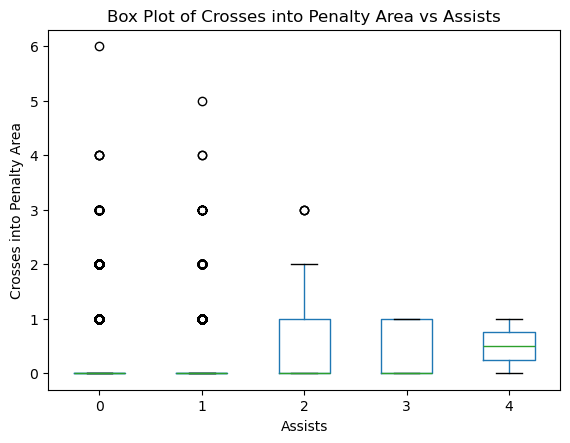

In [301]:
plt.figure
att_explore.boxplot(column = 'Crosses into Penalty Area', by = 'Assists', grid = False)
plt.title('Box Plot of Crosses into Penalty Area vs Assists')
plt.suptitle('')
plt.xlabel('Assists')
plt.ylabel('Crosses into Penalty Area')
plt.show()

This box plot is interesting. First off, the distribution of Crosses into the Penalty Area looks to be the same for observations with 0 assists and 1 assist. However, this is probably because majority of the observations have 0 crosses into the penalty area. There also appears to be a bigger spread of non-zero crosses into the penalty area values for observations with 2 or more assists, as shown by the size of the boxes. 

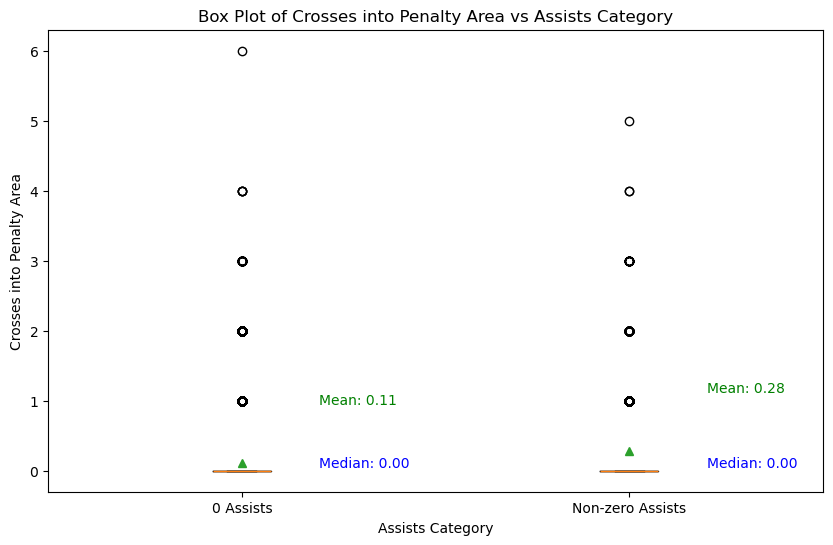

In [211]:
# Create a figure and axes
plt.figure(figsize=(10, 6))

# Prepare the data
# Group the data into two categories: '0 Assists' and 'Non-zero Assists'
data = [att_explore[att_explore['Assists'] == 0]['Crosses into Penalty Area'],   # Assists == 0
        att_explore[att_explore['Assists'] != 0]['Crosses into Penalty Area']]   # Assists != 0

# Create a boxplot with two boxes
plt.boxplot(data, labels=['0 Assists', 'Non-zero Assists'], showmeans = True)

# Set the title and labels
plt.title('Box Plot of Crosses into Penalty Area vs Assists Category')
plt.xlabel('Assists Category')
plt.ylabel('Crosses into Penalty Area')

for i in range(len(data)):
    # Median (the horizontal line in the box)
    median = np.median(data[i])
    plt.text(i + 1.2, median, f'Median: {median:.2f}', ha='left', va='bottom', color='blue')

    # Mean (the green triangle in the boxplot)
    mean = np.mean(data[i])
    plt.text(i + 1.2, mean + 1, f'Mean: {mean:.2f}', ha='left', va='top', color='green')
    
# Show the plot
plt.show()

This boxplot initially suggests that there is no relationship between Assists and Crosses into the Penalty Area. Although the median values are the same for the two categories, we can see that the mean value is actually higher for observations that recorded non-zero assists. The median values being the same is most likely due to the number of observations that have 0 crosses into the penalty area. Let's remove these observations. 

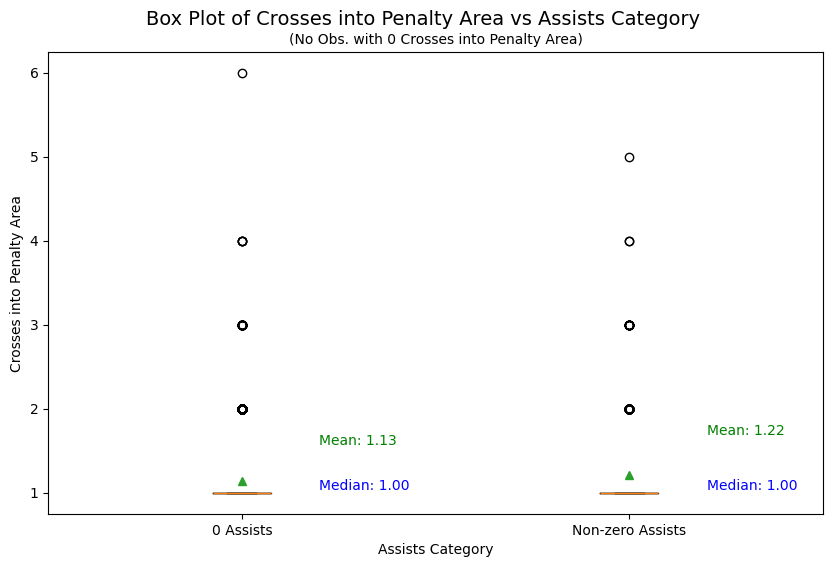

In [212]:
plt.figure(figsize=(10, 6))

data = [
    att_explore[(att_explore['Assists'] == 0) & (att_explore['Crosses into Penalty Area'] > 0)]['Crosses into Penalty Area'],   # Assists == 0 and Crosses into Final Third > 0
    att_explore[(att_explore['Assists'] != 0) & (att_explore['Crosses into Penalty Area'] > 0)]['Crosses into Penalty Area']    # Assists != 0 and Crosses into Final Third > 0
]

plt.boxplot(data, labels=['0 Assists', 'Non-zero Assists'], showmeans = True)

plt.title('(No Obs. with 0 Crosses into Penalty Area)', fontsize = 10)
plt.suptitle('Box Plot of Crosses into Penalty Area vs Assists Category', y = 0.95, fontsize = 14)
plt.xlabel('Assists Category')
plt.ylabel('Crosses into Penalty Area')

# Annotating the mean and median values
for i in range(len(data)):
    # Median (the horizontal line in the box)
    median = np.median(data[i])
    plt.text(i + 1.2, median, f'Median: {median:.2f}', ha='left', va='bottom', color='blue')

    # Mean (the green triangle in the boxplot)
    mean = np.mean(data[i])
    plt.text(i + 1.2, mean + (mean * 0.5), f'Mean: {mean:.2f}', ha='left', va='top', color='green')

plt.show()

When removing all observations with 0 crosses into the penalty area, we actually see that the median values are still the same for the two categories. Although the mean value is slightly higher for observations that have recorded at least 1 assist, the difference in means is not particularly significant. Therefore, we can probably conclude that there is no relationship between this feature and either Goals or Assists. 

#### Key Passes

Key Passes are an important metric that measures the number of passes a player makes to a player which leads to a shot. In other words, a key pass is recorded if a player makes a pass to a player, who then takes a shot. We expect this to be a metric/feature that gives us more information about the creativity of a player, rather than their goalscoring potential. In other words, the expectation is that Key Passes may provide good information about Assists, but not necessarily about Goals. 

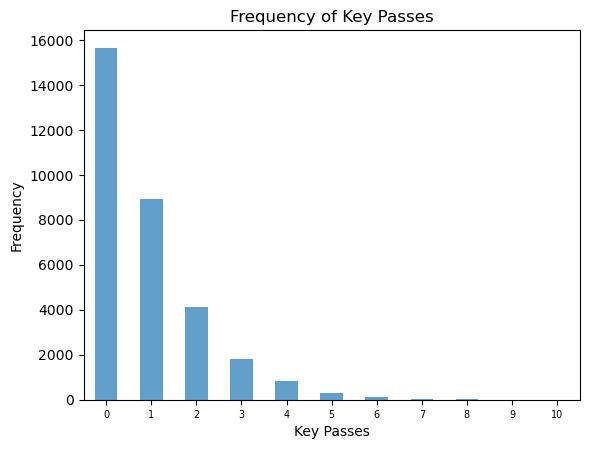

In [213]:
keypass_count = att_explore['Key Passes'].value_counts().sort_index()

fig, ax = plt.subplots()

keypass_count.plot(kind = 'bar', alpha = 0.7)

ax.set_xlabel('Key Passes')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Key Passes')
#set_xticks is used to only have certain values on the x axis. without this on, every x axis value was printed, which meant that the x axis values overlapped, affecting readability 
# ax.set_xticks(range(0, 30, 5))
# ax.set_xticklabels(range(0, 30, 5))

plt.xticks(rotation = 0, fontsize = 7)
plt.show()

Again, we see that over half of the observations record 0 key passes. There is a greater spread of different key pass values than some of the other features however. 

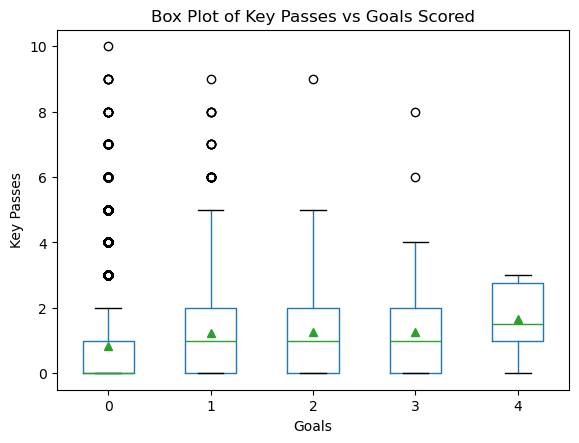

In [214]:
plt.figure
att_explore.boxplot(column = 'Key Passes', by = 'Goals', grid = False, showmeans = True)
plt.title('Box Plot of Key Passes vs Goals Scored')
plt.suptitle('')
plt.xlabel('Goals')
plt.ylabel('Key Passes')
plt.show()

This plot appears to show that the median value for key passes is higher for observations that record at least 1 goal. Let's see if this is the case if we remove the observations that recorded 0 key passes. 

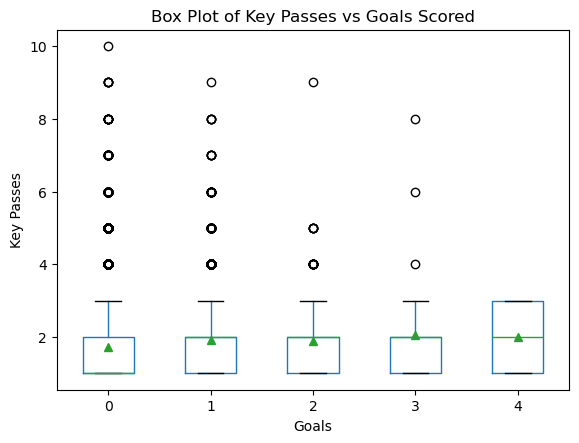

In [215]:
nonzero_keypass_dat = att_explore[att_explore['Key Passes'] > 0 ]

plt.figure
nonzero_keypass_dat.boxplot(column = 'Key Passes', by = 'Goals', grid = False, showmeans = True)
plt.title('Box Plot of Key Passes vs Goals Scored')
plt.suptitle('')
plt.xlabel('Goals')
plt.ylabel('Key Passes')
plt.show()

We can see that the median key pass value is still noticeably different for observations that record at least 1 goal, in comparison to the median key pass value for observations with no goals. However, the mean values for key pass appears to be quite similar. We can group the observations that record at least 1 goal together. However, based on this plot, we expect to see a similar picture. 

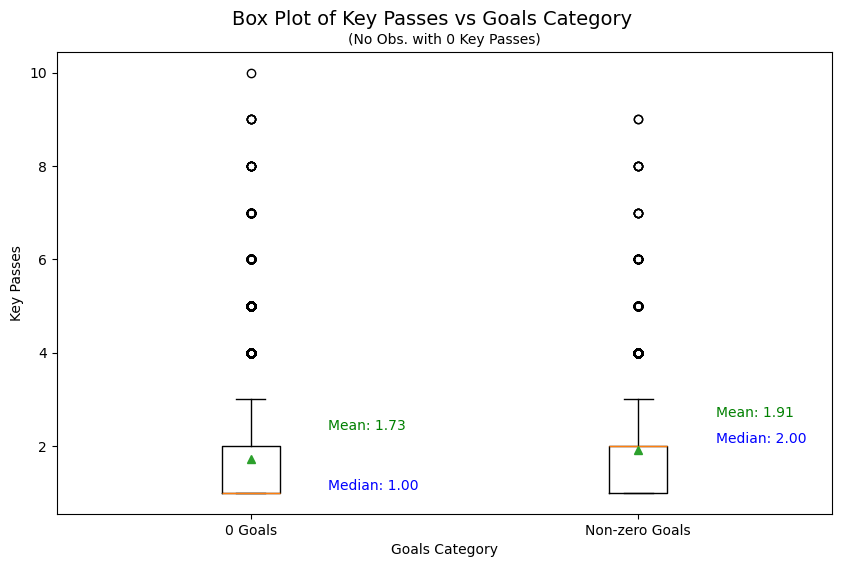

In [216]:
plt.figure(figsize=(10, 6))

data = [
    att_explore[(att_explore['Goals'] == 0) & (att_explore['Key Passes'] > 0)]['Key Passes'],   # Goals == 0 and Crosses into Final Third > 0
    att_explore[(att_explore['Goals'] != 0) & (att_explore['Key Passes'] > 0)]['Key Passes']    # Goals != 0 and Crosses into Final Third > 0
]

plt.boxplot(data, labels=['0 Goals', 'Non-zero Goals'], showmeans = True)

plt.title('(No Obs. with 0 Key Passes)', fontsize = 10)
plt.suptitle('Box Plot of Key Passes vs Goals Category', y = 0.95, fontsize = 14)
plt.xlabel('Goals Category')
plt.ylabel('Key Passes')

# Annotating the mean and median values
for i in range(len(data)):
    # Median (the horizontal line in the box)
    median = np.median(data[i])
    plt.text(i + 1.2, median, f'Median: {median:.2f}', ha='left', va='bottom', color='blue')

    # Mean (the green triangle in the boxplot)
    mean = np.mean(data[i])
    plt.text(i + 1.2, mean + (mean * 0.5), f'Mean: {mean:.2f}', ha='left', va='top', color='green')

plt.show()

As expected, we can see that the mean values are quite similar to each other when comparing the two categories. 

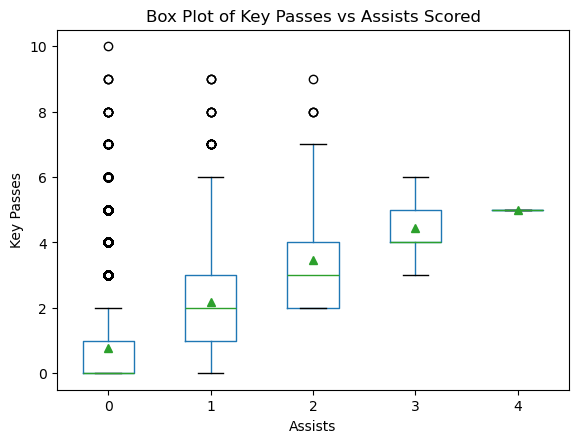

In [217]:
plt.figure
att_explore.boxplot(column = 'Key Passes', by = 'Assists', grid = False, showmeans = True)
plt.title('Box Plot of Key Passes vs Assists Scored')
plt.suptitle('')
plt.xlabel('Assists')
plt.ylabel('Key Passes')
plt.show()

As expected, there appears to be quite a significant relationship between Key Passes and Assists. We can see that both the median and mean key passes increase step by step as the number of assists recorded increases. Let's see if this holds if we remove all observations with zero key passes. 

In [218]:
att_explore[(att_explore['Assists'] != 0) & (att_explore['Key Passes'] == 0)].index

Index([17685, 20727], dtype='int64')

There are two observations that have non-zero values for assists, but 0 key passes. I'm not too sure why this is the case. 

In [219]:
att_explore.loc[att_explore[(att_explore['Assists'] != 0) & (att_explore['Key Passes'] == 0)].index][['Venue', 'Result', 'Team', 'Opponent', 'Position', 'Minutes Played', 'Assists', 'Key Passes']]

Venue Result             Team       Opponent Position  Minutes Played  \
17685  Home  W 2–0  Manchester City    Aston Villa       CM              90   
20727  Away  W 1–0         Brighton  Newcastle Utd       LM              79   

       Assists  Key Passes  
17685        1           0  
20727        1           0

When looking at the first observation (index 17685), and comparing the data from this game with data from other sources, there appears to be a mistake. In this dataset, none of the players playing in this game for Manchester City recorded a key pass. However, this is most definitely not the case when looking at alternative data sources, as well as when looking over game highlights. Therefore, we may want to remove these observations from the dataset. 

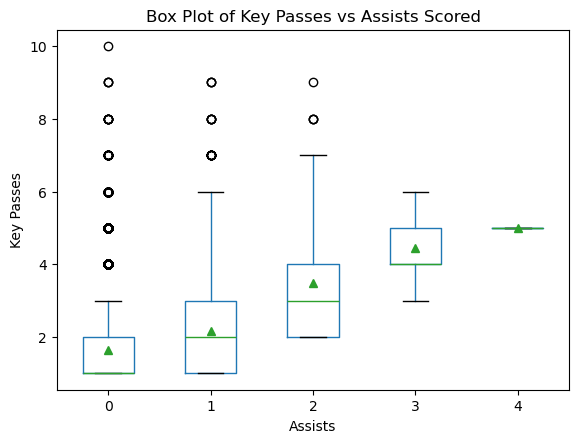

In [220]:
plt.figure
nonzero_keypass_dat.boxplot(column = 'Key Passes', by = 'Assists', grid = False, showmeans = True)
plt.title('Box Plot of Key Passes vs Assists Scored')
plt.suptitle('')
plt.xlabel('Assists')
plt.ylabel('Key Passes')
plt.show()

After removing the observations that have recorded 0 key passes, we can see that the relationship still holds. The median/mean key pass values are still steadily increasing as the number of assists increase. This makes a lot of sense, because in general a key pass is a necessary component of any assist (if you are not making the pass to a player who takes a shot, how are you recording an assist?). Therefore, you would expect more key passes to equal more opportunities to record an assist (not accounting for the quality of the key pass, as not all key passes have equal quality), which is why we see this positive relationship between assists and key passes. 

#### Live/Dead Passes

Live and Dead Passes are essentially just a more filtered version of Passes Attempted. A Live Pass is just an attempted pass that occurs during live play, whilst a Deadball Pass is a pass that occurs from either a Throw-in, Free kick, Corner or Goal kick. Let's make sure that this is consistent throughout the dataset by comparing the sum of Live and Dead Passes with Passes Attempted.

In [221]:
att_explore[att_explore['Live Pass'] + att_explore['Dead Pass'] != att_explore['Passes Attempted']]

Player ID  Day  Matchweek Venue Result           Team        Opponent  \
35001        463  Sun         21  Away  D 2–2      Liverpool         Chelsea   
19917        281  Sat         32  Away  W 2–1       Brighton         Arsenal   
39007        517  Sun          5  Home  D 1–1  Sheffield Utd          Fulham   
39584        526  Sat         29  Away  W 1–0  Newcastle Utd     Southampton   
34781        459  Sun         27  Away  L 1–4    Bournemouth    Huddersfield   
...          ...  ...        ...   ...    ...            ...             ...   
15268        208  Sat          2  Home  W 2–1        Arsenal         Burnley   
2699          38  Thu         18  Away  W 1–0        Burnley       Liverpool   
5388          86  Sun          1  Home  L 0–3      West Brom  Leicester City   
32230        431  Sat         35  Away  W 3–0       Brighton          Wolves   
8823         129  Sat         23  Away  L 0–4        Everton       Tottenham   

      Start Position  Minutes Played  ...  RW  WB  Defenders  Midfielders  \
35001     Y       CM              90  ...   0   0          0            1   
19917     Y       CM              90  ...   0   0          0            1   
39007     Y       FW              63  ...   0   0          0            0   
39584     Y       RM              60  ...   0   0          0            0   
34781     Y    RW,WB              90  ...   1   1          0            0   
...     ...      ...             ...  ...  ..  ..        ...          ...   
15268     Y    DM,CM              90  ...   0   0          0            1   
2699      Y       FW              90  ...   0   0          0            0   
5388      Y    RM,FW              90  ...   0   0          0            0   
32230     Y       AM              90  ...   0   0          0            0   
8823      N       RW              34  ...   1   0          0            0   

       Wide Midfielders  Wingers  Penalty Success Rate  SOT Percentage  \
35001                 0        0                   NaN             NaN   
19917                 0        0                   NaN        0.000000   
39007                 0        0                   NaN        0.000000   
39584                 1        0                   0.0        0.000000   
34781                 0        1                   NaN             NaN   
...                 ...      ...                   ...             ...   
15268                 0        0                   NaN        1.000000   
2699                  0        0                   1.0        1.000000   
5388                  1        0                   NaN        0.333333   
32230                 0        0                   0.5        0.000000   
8823                  0        1                   NaN             NaN   

       Team Goals  Pass Completion Percentage  
35001           2                   88.888889  
19917           2                   67.741935  
39007           1                   76.190476  
39584           1                   60.000000  
34781           1                   66.666667  
...           ...                         ...  
15268           2                   93.220339  
2699            1                   50.000000  
5388            0                   72.222222  
32230           3                   81.081081  
8823            0                   81.818182  

[3595 rows x 130 columns]

We can see that there are actually 3595 observations where the number of passes attempted is not equal to the sum of live and dead passes. 

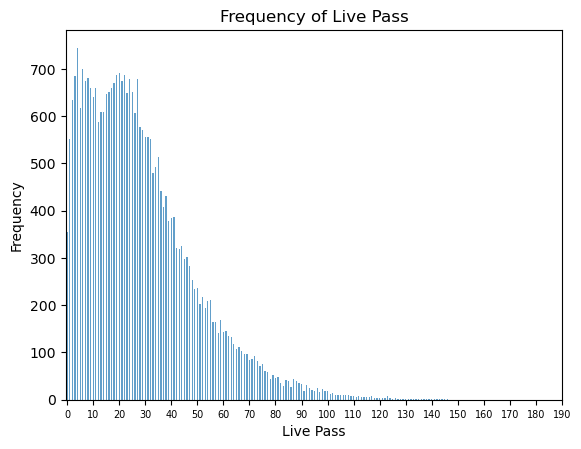

In [222]:
livepass_count = att_explore['Live Pass'].value_counts().sort_index()

fig, ax = plt.subplots()

livepass_count.plot(kind = 'bar', alpha = 0.7)

ax.set_xlabel('Live Pass')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Live Pass')
#set_xticks is used to only have certain values on the x axis. without this on, every x axis value was printed, which meant that the x axis values overlapped, affecting readability 
ax.set_xticks(range(0, 200, 10))
ax.set_xticklabels(range(0, 200, 10))

plt.xticks(rotation = 0, fontsize = 7)
plt.show()

The frequency of 'Live Pass' values looks quite similar to the frequency of Passes Attempted. Let's plot them against each other and look at their correlation. 

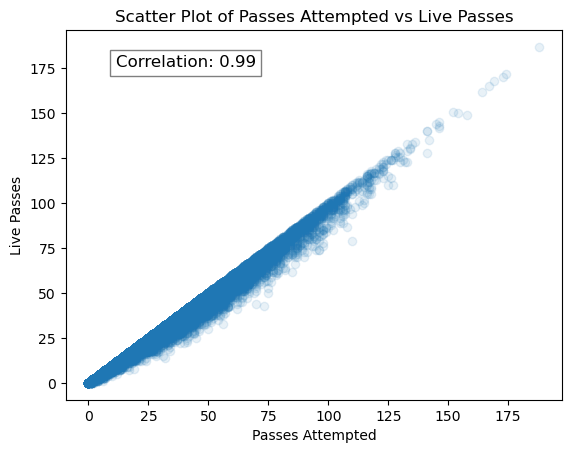

In [223]:
#calculate the correlation
correlation = att_explore['Passes Attempted'].corr(att_explore['Live Pass'])

plt.figure()
plt.scatter(att_explore['Passes Attempted'], att_explore['Live Pass'], alpha=0.1)
plt.title(f'Scatter Plot of Passes Attempted vs Live Passes')
plt.xlabel('Passes Attempted')
plt.ylabel('Live Passes')

plt.text(0.1, 0.9, f'Correlation: {correlation:.2f}', 
         transform=plt.gca().transAxes, fontsize=12, 
         bbox=dict(facecolor='white', alpha=0.5, edgecolor='black'))

plt.show()

We can see that the 'Live Pass' feature is highly correlated with the 'Passes Attempted' feature. This tells us that majority of the passes attempted are recorded as live passes (this makes sense given our understanding of what live passes are). Based on this, we can probably remove Live Pass as a feature, since it provides us pretty much the exact same information that is captured in the 'Passes Attempted' feature. 

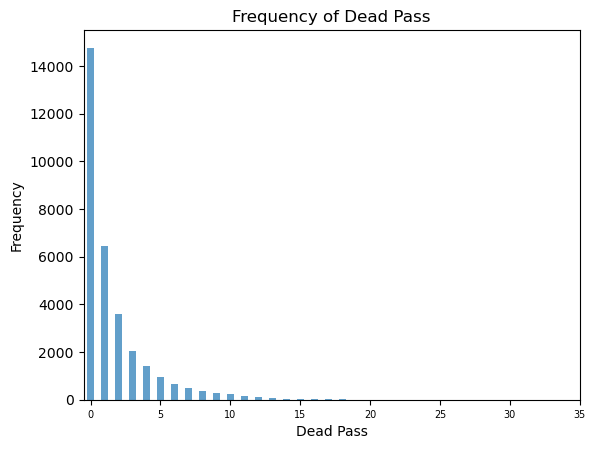

In [224]:
deadpass_count = att_explore['Dead Pass'].value_counts().sort_index()

fig, ax = plt.subplots()

deadpass_count.plot(kind = 'bar', alpha = 0.7)

ax.set_xlabel('Dead Pass')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Dead Pass')
#set_xticks is used to only have certain values on the x axis. without this on, every x axis value was printed, which meant that the x axis values overlapped, affecting readability 
ax.set_xticks(range(0, 40, 5))
ax.set_xticklabels(range(0, 40, 5))

plt.xticks(rotation = 0, fontsize = 7)
plt.show()

It makes sense that majority of the observations have recorded 0 Dead Passes. Only a select few of the players are designated corner/freekick/throw-in takers. 

Based on this, let's compare the 'Dead Pass' values with the sum of 'Free Kick Pass', 'Corners Taken' and 'Throw Ins Taken' 

In [225]:
att_explore[att_explore['Free Kick Pass'] + att_explore['Corners Taken'] + att_explore['Throw Ins Taken'] != att_explore['Dead Pass']]

Player ID  Day  Matchweek Venue Result             Team  \
168            3  Sun         38  Home  W 5–0  Manchester City   
21739        301  Sat          5  Home  W 1–0           Fulham   
6717         105  Mon         31  Away  L 0–3          Arsenal   
14189        195  Sun         17  Home  L 1–2         Brighton   
18467        258  Wed         21  Away  L 0–4      Bournemouth   
...          ...  ...        ...   ...    ...              ...   
1402          21  Sat         37  Home  L 2–3     Cardiff City   
5388          86  Sun          1  Home  L 0–3        West Brom   
3794          58  Sat          7  Home  D 2–2        West Brom   
39258        521  Sat          3  Home  D 2–2      Bournemouth   
32230        431  Sat         35  Away  W 3–0         Brighton   

             Opponent Start Position  Minutes Played  ...  RW  WB  Defenders  \
168      Norwich City    Y*       LM              84  ...   0   0          0   
21739      Luton Town     Y       RM              61  ...   0   0          0   
6717   Crystal Palace     Y    CM,AM              90  ...   0   0          0   
14189         Chelsea     Y       FW              59  ...   0   0          0   
18467        West Ham     Y       FW              90  ...   0   0          0   
...               ...   ...      ...             ...  ...  ..  ..        ...   
1402   Crystal Palace     Y    CM,FW              90  ...   0   0          0   
5388   Leicester City     Y    RM,FW              90  ...   0   0          0   
3794          Watford     Y    AM,RW              90  ...   1   0          0   
39258         Everton     Y       RM              63  ...   0   0          0   
32230          Wolves     Y       AM              90  ...   0   0          0   

       Midfielders  Wide Midfielders  Wingers  Penalty Success Rate  \
168              0                 1        0                   NaN   
21739            0                 1        0                   NaN   
6717             1                 0        0                   NaN   
14189            0                 0        0                   NaN   
18467            0                 0        0                   NaN   
...            ...               ...      ...                   ...   
1402             1                 0        0                   NaN   
5388             0                 1        0                   NaN   
3794             0                 0        1                   NaN   
39258            0                 1        0                   NaN   
32230            0                 0        0                   0.5   

       SOT Percentage  Team Goals  Pass Completion Percentage  
168          0.200000           5                   87.500000  
21739             NaN           1                   92.000000  
6717         0.000000           0                   80.000000  
14189             NaN           1                   78.947368  
18467             NaN           0                   81.818182  
...               ...         ...                         ...  
1402         1.000000           2                   76.190476  
5388         0.333333           0                   72.222222  
3794         0.000000           2                   70.000000  
39258        0.000000           2                   63.636364  
32230        0.000000           3                   81.081081  

[5795 rows x 130 columns]

There are still quite a few observations that have recorded dead pass values that are different to the sum of free kicks taken, corners taken and throw-ins taken. I am unsure why this is the case. 

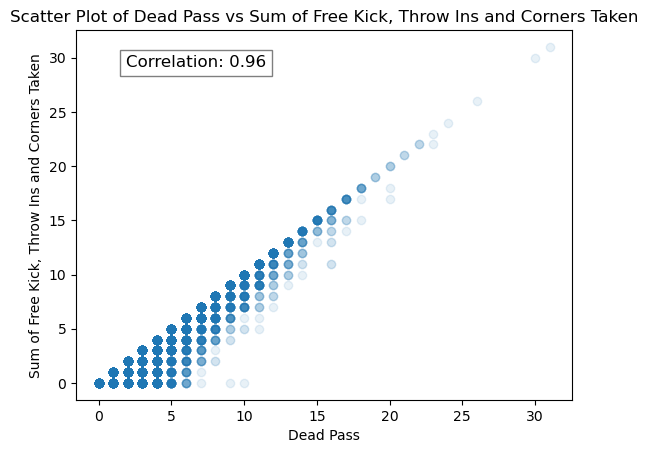

In [226]:
#make new variable called deadballsum 
deadpass_sum = att_explore['Free Kick Pass'] + att_explore['Throw Ins Taken'] + att_explore['Corners Taken']

#calculate the correlation
correlation = att_explore['Dead Pass'].corr(deadpass_sum)

plt.figure()
plt.scatter(att_explore['Dead Pass'], deadpass_sum, alpha=0.1)
plt.title(f'Scatter Plot of Dead Pass vs Sum of Free Kick, Throw Ins and Corners Taken')
plt.xlabel('Dead Pass')
plt.ylabel('Sum of Free Kick, Throw Ins and Corners Taken')

plt.text(0.1, 0.9, f'Correlation: {correlation:.2f}', 
         transform=plt.gca().transAxes, fontsize=12, 
         bbox=dict(facecolor='white', alpha=0.5, edgecolor='black'))

plt.show()

The scatter plot shows us that majority of the observation have equal values for 'Dead Pass' and sum of Free Kicks/Corners and Throw-ins taken. This is shown by the correlation between these two variables. However, there appear to be some pretty significant outliers. For example, we can see that there is at least 1 observation which recorded 10 dead passes, but zero free kicks/corners/throw-ins taken. Let's have a look at this outlier to see if we can isolate the reason why there are observations where these two variables differ. 

In [227]:
att_explore[(att_explore['Dead Pass'] == 10) & (deadpass_sum == 0)][['Venue', 'Result', 'Team', 'Opponent', 'Position', 'Minutes Played']]

Venue Result         Team   Opponent Position  Minutes Played
1251  Away  L 0–9  Bournemouth  Liverpool       FW              90

The observation above belongs to Kieffer Moore in a game that he played for Bournemouth against Liverpool. The 10 dead passes recorded by Moore are all passes to restart the game (i.e. passes from the center circle). The reason why he recorded 10 dead passes but zero free kicks/corners/throw-ins taken was because Bournemouth conceded 9 times in that game. This meant that Bournemouth restarted the game from the center circle 9 times. The final dead pass is probably when Bournemouth restarted the game in either the first or second half. Therefore, we expect the 5000+ observations above to have unequal dead passes and free kicks/corners/throw ins taken to be attributed to these players being responsible for restarting the game with a pass from the centre circle. 

Although it may make sense to simply add the number of goals conceded to the sum, this ignores the possibility of different players restarting the game. For example, suppose Team A concedes 3 goals in one game. This means that there are 4 dead ball passes that aren't free kicks/corners/throw ins. However, these 4 dead ball passes can be split amongst the team. Therefore, there isn't any good way to better capture this. As the player who accumulates a dead pass by virtue of being responsible for starting the game is essentially an arbitrary decision (based on our understanding of tactical information, the player responsible for kickoff does not make them more likely to score or assist), we can conclude that these dead passes can be removed without necessarily affecting the information provided by the number of dead passes recorded by a player. This can be done by just replacing the values in the 'Dead Pass' column with the values in the variable deadpass_sum. 

In [228]:
att_explore['Dead Pass'] = deadpass_sum

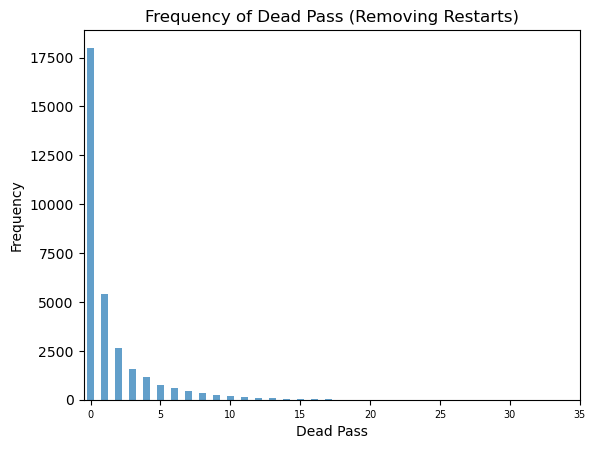

In [229]:
deadpass_count = att_explore['Dead Pass'].value_counts().sort_index()

fig, ax = plt.subplots()

deadpass_count.plot(kind = 'bar', alpha = 0.7)

ax.set_xlabel('Dead Pass')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Dead Pass (Removing Restarts)')
#set_xticks is used to only have certain values on the x axis. without this on, every x axis value was printed, which meant that the x axis values overlapped, affecting readability 
ax.set_xticks(range(0, 40, 5))
ax.set_xticklabels(range(0, 40, 5))

plt.xticks(rotation = 0, fontsize = 7)
plt.show()

In this new frequency plot (after removing dead passes from game restarts), we can see that there are now more observations with 0 dead passes. 

Let's first look at the relatioship between Throw-ins taken and Goals/Assists. Based on my understanding, there should be absolutely no relationship between this feature and Goals/Assists. The reason why I want to analyse this feature first (instead of corners or free kicks taken), is that I want to confirm my hypothesis. If it is true that there is no relation between Throw-ins taken and Goals/Assists, then we can simultaneously remove the 'Throw Ins Taken' feature, whilst also subtracting this value from 'Dead Pass', as we can conclude that throw-ins taken is just a noise variable. 

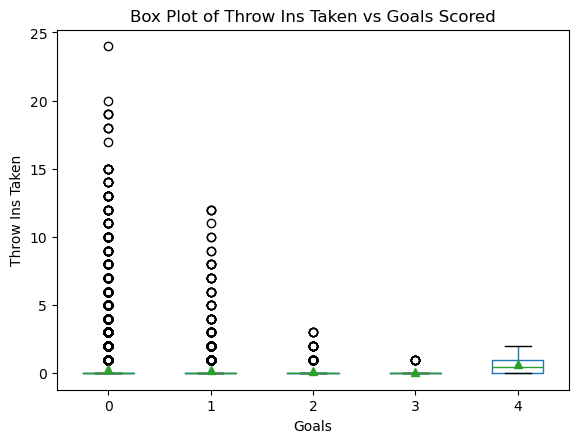

In [230]:
plt.figure
att_explore.boxplot(column = 'Throw Ins Taken', by = 'Goals', grid = False, showmeans = True)
plt.title('Box Plot of Throw Ins Taken vs Goals Scored')
plt.suptitle('')
plt.xlabel('Goals')
plt.ylabel('Throw Ins Taken')
plt.show()

We can clearly see that there is no relationship between Throw Ins Taken and Goals

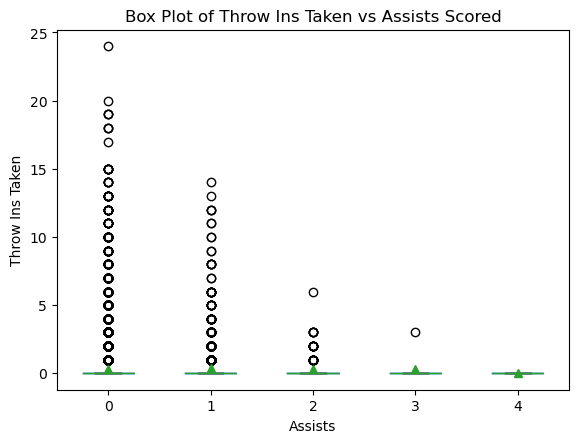

In [231]:
plt.figure
att_explore.boxplot(column = 'Throw Ins Taken', by = 'Assists', grid = False, showmeans = True)
plt.title('Box Plot of Throw Ins Taken vs Assists Scored')
plt.suptitle('')
plt.xlabel('Assists')
plt.ylabel('Throw Ins Taken')
plt.show()

Likewise, there appears to be no relationship between throw ins taken and assists. Therefore, we can discard this feature. 

We now have a look at the relationship between free kicks taken and goals/assists

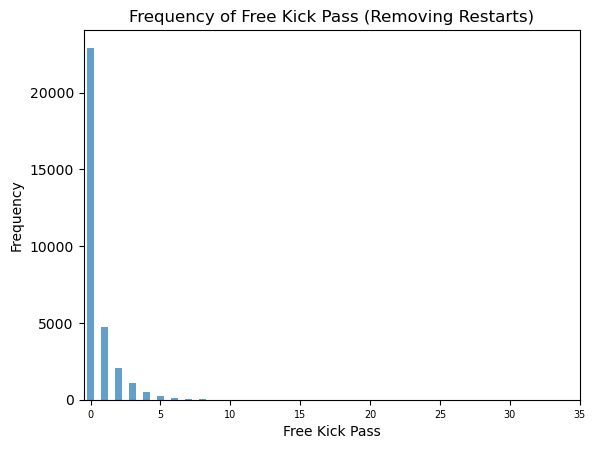

In [232]:
freekickpass_count = att_explore['Free Kick Pass'].value_counts().sort_index()

fig, ax = plt.subplots()

freekickpass_count.plot(kind = 'bar', alpha = 0.7)

ax.set_xlabel('Free Kick Pass')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Free Kick Pass')
#set_xticks is used to only have certain values on the x axis. without this on, every x axis value was printed, which meant that the x axis values overlapped, affecting readability 
ax.set_xticks(range(0, 40, 5))
ax.set_xticklabels(range(0, 40, 5))

plt.xticks(rotation = 0, fontsize = 7)
plt.show()

The frequency plot shows that a vast majority of the observations recorded no free kicks taken. 

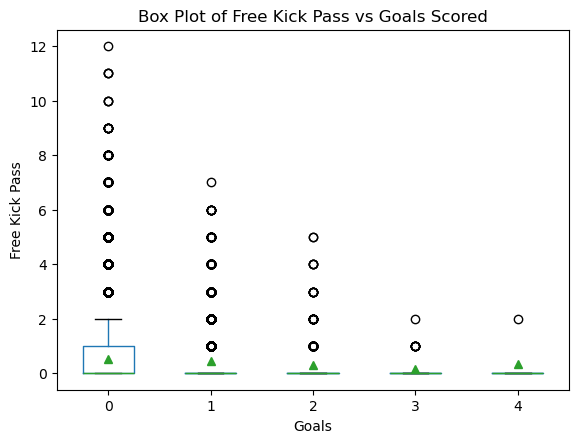

In [233]:
plt.figure
att_explore.boxplot(column = 'Free Kick Pass', by = 'Goals', grid = False, showmeans = True)
plt.title('Box Plot of Free Kick Pass vs Goals Scored')
plt.suptitle('')
plt.xlabel('Goals')
plt.ylabel('Free Kick Pass')
plt.show()

The initial view is that there doesn't appear to be any relationship between the number of free kicks taken and the number of goals scored. The mean number of free kicks taken actually seems to be higher for observations that recorded 0 goals. 

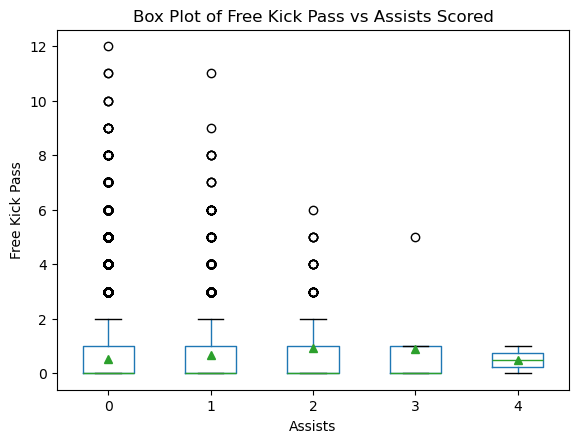

In [234]:
plt.figure
att_explore.boxplot(column = 'Free Kick Pass', by = 'Assists', grid = False, showmeans = True)
plt.title('Box Plot of Free Kick Pass vs Assists Scored')
plt.suptitle('')
plt.xlabel('Assists')
plt.ylabel('Free Kick Pass')
plt.show()

This box plot also doesn't really suggest any relationship between the number of free kicks taken and the number of assists recorded. There does appear to be a slightly higher mean number of free kicks taken for non-zero assists recorded, but the difference doesn't look to be that significant. We can try remove observations that recorded no free kicks taken and replot to see if the trend still holds. It makes sense to do this due to the large number of observations that have recorded zero free kicks taken. 

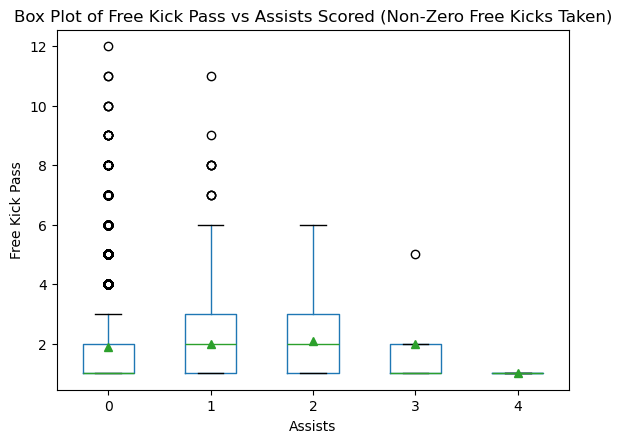

In [261]:
nonzerofk_dat = att_explore[att_explore['Free Kick Pass'] > 0]

plt.figure
nonzerofk_dat.boxplot(column = 'Free Kick Pass', by = 'Assists', grid = False, showmeans = True)
plt.title('Box Plot of Free Kick Pass vs Assists Scored (Non-Zero Free Kicks Taken)')
plt.suptitle('')
plt.xlabel('Assists')
plt.ylabel('Free Kick Pass')
plt.show()

When excluding observations that recorded zero free kicks taken, we can see that the median number of free kicks taken seems to be higher for observations that recorded at least 1 assist. However, the mean values are still pretty much the same. The fact that the mean values are the same may be attributed to the number of observations that have recorded large numbers for free kicks taken, but still recorded 0 assists. 

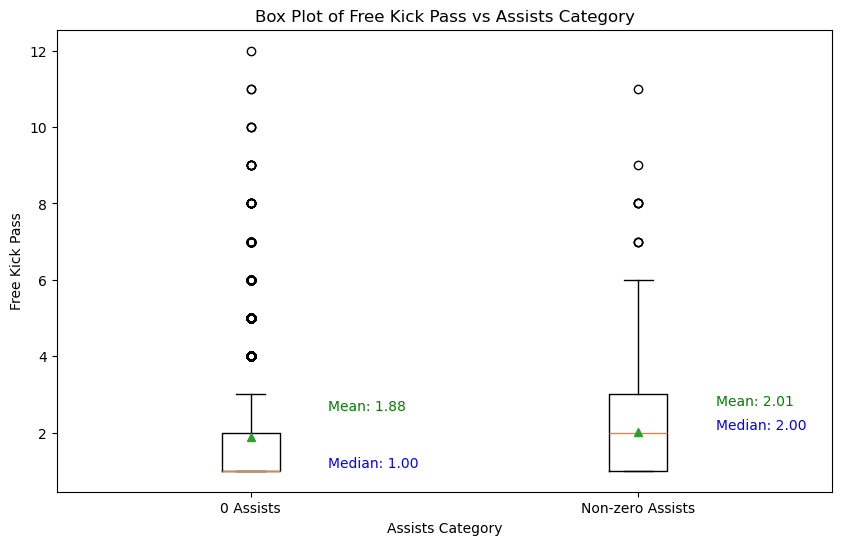

In [236]:
# Create a figure and axes
plt.figure(figsize=(10, 6))

# Prepare the data
# Group the data into two categories: '0 Assists' and 'Non-zero Assists'
data = [nonzerofk_dat[nonzerofk_dat['Assists'] == 0]['Free Kick Pass'],   # Assists == 0
        nonzerofk_dat[nonzerofk_dat['Assists'] != 0]['Free Kick Pass']]   # Assists != 0

# Create a boxplot with two boxes
plt.boxplot(data, labels=['0 Assists', 'Non-zero Assists'], showmeans = True)

# Set the title and labels
plt.title('Box Plot of Free Kick Pass vs Assists Category')
plt.xlabel('Assists Category')
plt.ylabel('Free Kick Pass')

for i in range(len(data)):
    # Median (the horizontal line in the box)
    median = np.median(data[i])
    plt.text(i + 1.2, median, f'Median: {median:.2f}', ha='left', va='bottom', color='blue')

    # Mean (the green triangle in the boxplot)
    mean = np.mean(data[i])
    plt.text(i + 1.2, mean + 1, f'Mean: {mean:.2f}', ha='left', va='top', color='green')
    
# Show the plot
plt.show()

When grouping observations with non-zero assists together, we can see that the median number of free kicks taken is greater by 1. However, the mean number of free kicks taken when comparing the two categories are still quite similar. 

There is a line of thinking that suggests that being a designated free kick taker makes it more likely that you will record assists, since you have an additional avenue to assists that other players don't have. The competing hypothesis is that free kicks are generally low quality opportunies, so even having this additional path to assists doesn't necessarily mean much, since you are increasing your assist potential very slightly. We can investigate this by first identifying Player ID's that the data show are 'designated free kick takers'. We can then compare the assists recorded by players who are designated free kick takers and compare this to the players who aren't designated free kick takers. 

In [237]:
#we first look at how many player_id values record a non-zero value for free kicks taken in any of the observations associated with that 
#player id 

nonzero_fkpass_playerid = att_explore[att_explore['Free Kick Pass'] > 0]['Player ID'].unique()

#let's now have a look at how many free kicks in total were taken for each player id
# Group by 'Player ID' and sum the 'Free Kick Pass' values
total_fkpass = att_explore.groupby('Player ID')['Free Kick Pass'].sum().reset_index()
total_fkpass.columns = ['Player ID', 'Total Free Kicks Taken']

#drop the rows that have total free kicks taken equal to zero
total_fkpass = total_fkpass[total_fkpass['Total Free Kicks Taken'] > 0]

#check that the player id's in the total_fkpass dataframe is equal to the player id's in nonzero_fkpass_playerid
total_fkpass['Player ID'].isin(nonzero_fkpass_playerid).sum() == len(nonzero_fkpass_playerid)

True

The above code confirms that the player id's in the total_fkpass dataframe is equal to the player id's in the nonzero_fkpass_playerid list. 

Let's now plot the total number of free kicks taken by player id

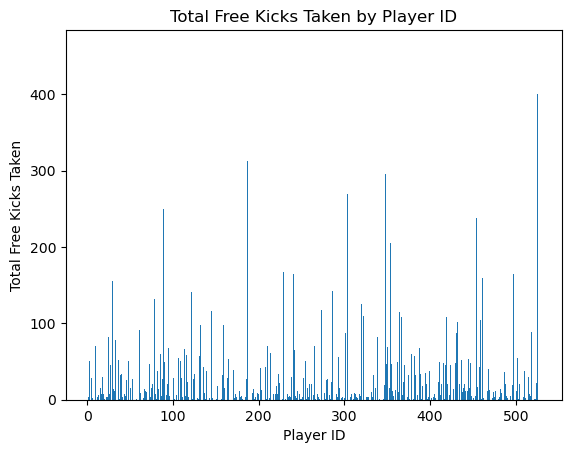

In [238]:
plt.figure()
plt.bar(total_fkpass['Player ID'], total_fkpass['Total Free Kicks Taken'])
plt.title('Total Free Kicks Taken by Player ID')
plt.xlabel('Player ID')
plt.ylabel('Total Free Kicks Taken')
plt.show()

We can see that there are some players that took quite a large number of free kicks across their recorded observations. There are also a lot of players that recorded quite small numbers for total free kicks taken. It is entirely possible that there are certain players who only occasionally took free kicks, whether this is because the main free kick taker was not on the pitch, or perhaps they took the free kick by circumstance. Although we don't have the contextual information to accurately filter out the player id's who aren't actually designated free kick takers, we can instead do the filtering by removing player id's that have taken less than a certain number of free kicks across their career.  

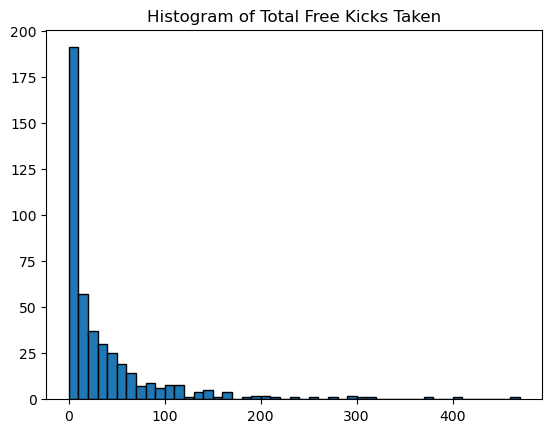

In [239]:
#it is difficult to choose an arbitrary number for free kicks taken to do the filtering without first looking at the distribution of free kicks
#taken, so this is what we'll do first. 

plt.figure()
plt.hist(total_fkpass['Total Free Kicks Taken'], bins=range(0, total_fkpass['Total Free Kicks Taken'].max() + 10, 10), edgecolor='black')
plt.title('Histogram of Total Free Kicks Taken')
plt.xlabel('')
plt.ylabel('')
plt.show()


The histogram shows that an overwhelming majority of the observations have recorded less than 10 total free kicks taken in their career. We can pretty confidently say that the corresponding player id's shouldn't be considered in the list of designated free kick takers. We will remove these observations from the dataframe. 

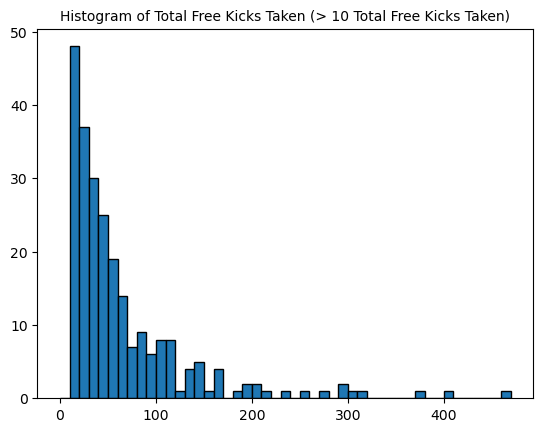

In [240]:
#removing observations with less than 10 free kicks taken 
total_fkpass = total_fkpass[total_fkpass['Total Free Kicks Taken'] > 10]

#replotting the histogram above
plt.figure()
plt.hist(total_fkpass['Total Free Kicks Taken'], bins=range(0, total_fkpass['Total Free Kicks Taken'].max() + 10, 10), edgecolor='black')
plt.title('Histogram of Total Free Kicks Taken (> 10 Total Free Kicks Taken)', fontsize = 10)
plt.xlabel('')
plt.ylabel('')
plt.show()

This plot sort of just looks like a mirror copy of the initial plot that didn't have observations with less than 10 free kicks removed. However, we can see that the pattern sort of levels out around 70 total free kicks taken. Based on this, let's replot again but removing observations with less than 70 free kicks taken. 

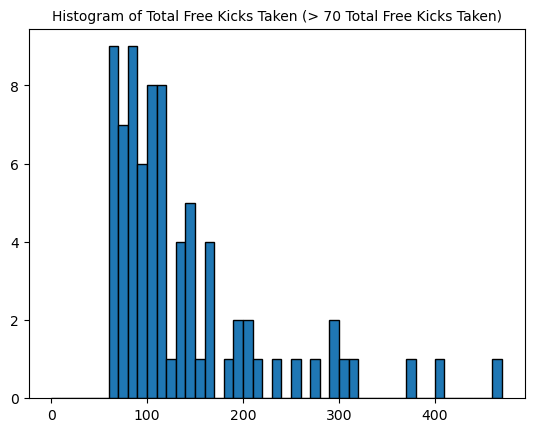

In [244]:
#removing observations with less than 60 free kicks taken 
total_fkpass = total_fkpass[total_fkpass['Total Free Kicks Taken'] > 60]

#replotting the histogram above
plt.figure()
plt.hist(total_fkpass['Total Free Kicks Taken'], bins=range(0, total_fkpass['Total Free Kicks Taken'].max() + 10, 10), edgecolor='black')
plt.title('Histogram of Total Free Kicks Taken (> 70 Total Free Kicks Taken)', fontsize = 10)
plt.xlabel('')
plt.ylabel('')
plt.show()

We now get the player id's for the players that have taken 60 or more free kicks in total. 

In [248]:
designated_fktaker_id = total_fkpass['Player ID']
print(designated_fktaker_id)

7        8
9       10
14      15
24      25
29      30
      ... 
496    497
511    512
517    518
524    525
525    526
Name: Player ID, Length: 78, dtype: int64


There are 78 players that we will regarded as designated free kick takers for their team, based on the filter we used. (an issue with this is that the filter was chosen very arbitrarily. For example, it may be the case that a given player only played 1 season, but was the designated free kick taker that season. However due to their limited number of appearances, their total free kicks was less than 60, so they were excluded.)

We now compare the assists recorded by observations with player id's associated with 'designated free kick taker', and observations with player id's not associated with designated free kick taker.

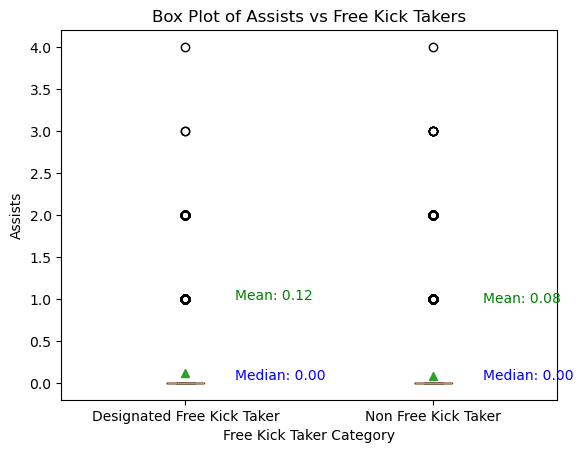

In [252]:
# Create a figure and axes
plt.figure()

#grouping data into either designated free kick taker, or not designated free kick taker 
data = [
    att_explore[att_explore['Player ID'].isin(designated_fktaker_id)]['Assists'],       # Designated free kick takers
    att_explore[~att_explore['Player ID'].isin(designated_fktaker_id)]['Assists']       # Non-designated free kick takers
]

# Create a boxplot with two boxes
plt.boxplot(data, labels=['Designated Free Kick Taker', 'Non Free Kick Taker'], showmeans = True)

# Set the title and labels
plt.title('Box Plot of Assists vs Free Kick Takers')
plt.xlabel('Free Kick Taker Category')
plt.ylabel('Assists')

for i in range(len(data)):
    # Median (the horizontal line in the box)
    median = np.median(data[i])
    plt.text(i + 1.2, median, f'Median: {median:.2f}', ha='left', va='bottom', color='blue')

    # Mean (the green triangle in the boxplot)
    mean = np.mean(data[i])
    plt.text(i + 1.2, mean + 1, f'Mean: {mean:.2f}', ha='left', va='top', color='green')
    
# Show the plot
plt.show()

This boxplot shows that there is really minimal difference in the assists recorded when comparing designated free kick takers with non free kick takers. There is an argument which suggests that the current method we used to determine which Player ID's should be recorded as designated free kick takers is flawed. This is because we are essentially just including the Player ID's which have taken 60 or more free kicks in their careers. We mentioned previously that one of the flaws of this method is that it excludes players who are designated free kick takers, but are only in the league for a short period of time, meaning they don't have enough games to accumulate enough free kicks to be considered designated free kick takers. We can try calculate the proportion of observations that involve non-zero free kicks taken for each player, and this time record the players as designated free kick takers if a large proportion of their observations involves non-zero free kicks recorded. 

In [253]:
#filter for observations where Free Kick Pass is non-zero
nonzero_fkpass = att_explore[att_explore['Free Kick Pass'] > 0]

#count the number of non-zero Free Kick Pass observations for each Player ID
nonzero_counts = nonzero_fkpass.groupby('Player ID').size()

#count total games played for each Player ID
total_counts = att_explore.groupby('Player ID').size()

#calculate proportion of games with non-zero Free Kick Pass for each Player ID
proportion_fkpass = (nonzero_counts / total_counts).fillna(0) * 100  # Multiply by 100 to get percentage
print(proportion_fkpass)

Player ID
1       0.000000
2       4.347826
3      50.000000
4       0.000000
5      45.161290
         ...    
523     7.142857
524    76.470588
525    85.314685
526    58.474576
527    71.428571
Length: 527, dtype: float64


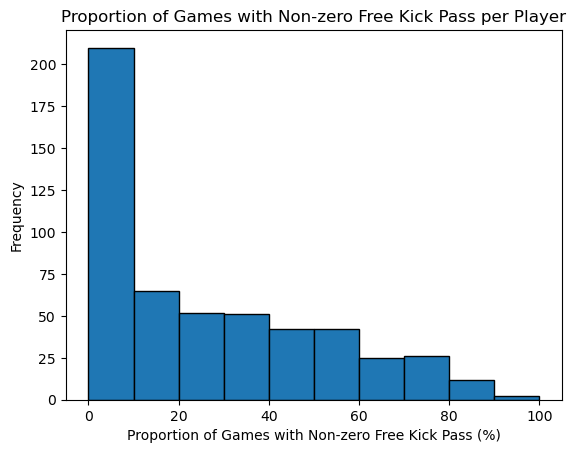

In [254]:
#plot the proportions
plt.figure()
plt.hist(proportion_fkpass, bins=range(0, 110, 10), edgecolor='black') 
plt.title('Proportion of Games with Non-zero Free Kick Pass per Player')
plt.xlabel('Proportion of Games with Non-zero Free Kick Pass (%)')
plt.ylabel('Frequency')
plt.show()

So just over 200 of the players that have taken at least 1 free kick in their career have only taken free kicks in less than 10% of the games they have played. We can probably exclude these Player ID's from the designated free kick takers list. We can probably include the rest in the list however.  

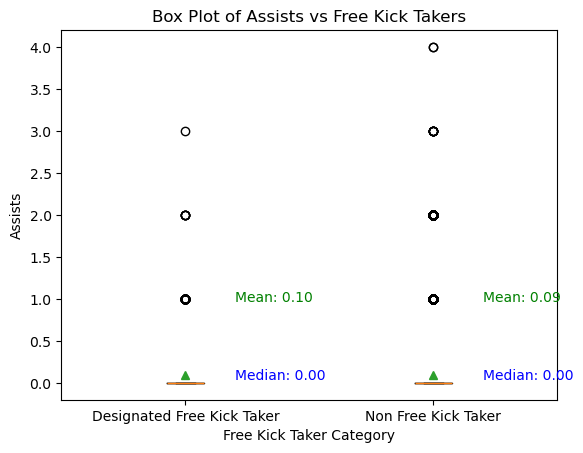

In [257]:
designated_fktaker_id = proportion_fkpass[proportion_fkpass > 10]

# Create a figure and axes
plt.figure()

#grouping data into either designated free kick taker, or not designated free kick taker 
data = [
    att_explore[att_explore['Player ID'].isin(designated_fktaker_id)]['Assists'],       # Designated free kick takers
    att_explore[~att_explore['Player ID'].isin(designated_fktaker_id)]['Assists']       # Non-designated free kick takers
]

# Create a boxplot with two boxes
plt.boxplot(data, labels=['Designated Free Kick Taker', 'Non Free Kick Taker'], showmeans = True)

# Set the title and labels
plt.title('Box Plot of Assists vs Free Kick Takers')
plt.xlabel('Free Kick Taker Category')
plt.ylabel('Assists')

for i in range(len(data)):
    # Median (the horizontal line in the box)
    median = np.median(data[i])
    plt.text(i + 1.2, median, f'Median: {median:.2f}', ha='left', va='bottom', color='blue')

    # Mean (the green triangle in the boxplot)
    mean = np.mean(data[i])
    plt.text(i + 1.2, mean + 1, f'Mean: {mean:.2f}', ha='left', va='top', color='green')
    
# Show the plot
plt.show()

So when filtering using this criterion, we can see that the number of assists recorded when comparing the two categories are even more similar. The median number of assists is exactly the same, whilst the mean number of assists is only 0.01 higher for observations associated with Player ID's included amongst the designated free kick takers. Therefore, we can probably conclude that the effect of being a designated free kick taker on assists is minimal. 

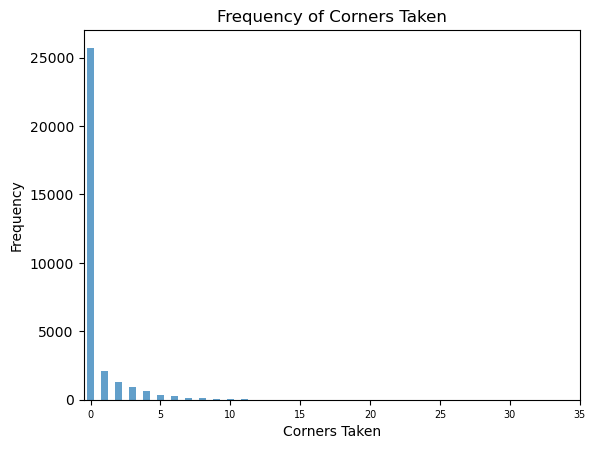

In [258]:
corners_count = att_explore['Corners Taken'].value_counts().sort_index()

fig, ax = plt.subplots()

corners_count.plot(kind = 'bar', alpha = 0.7)

ax.set_xlabel('Corners Taken')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Corners Taken')
#set_xticks is used to only have certain values on the x axis. without this on, every x axis value was printed, which meant that the x axis values overlapped, affecting readability 
ax.set_xticks(range(0, 40, 5))
ax.set_xticklabels(range(0, 40, 5))

plt.xticks(rotation = 0, fontsize = 7)
plt.show()

Again, an overwhelming majority of the observations have 0 corners taken. 

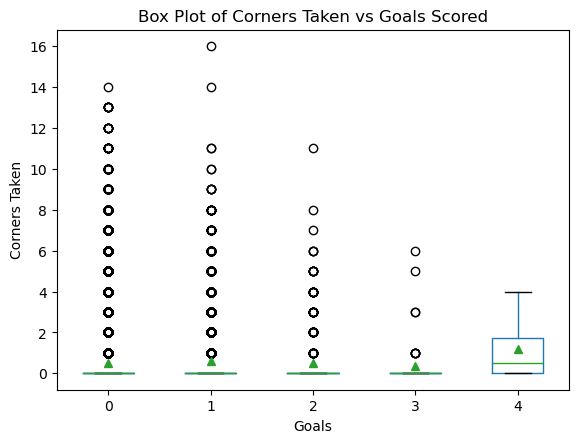

In [259]:
plt.figure
att_explore.boxplot(column = 'Corners Taken', by = 'Goals', grid = False, showmeans = True)
plt.title('Box Plot of Corners Taken vs Goals Scored')
plt.suptitle('')
plt.xlabel('Goals')
plt.ylabel('Corners Taken')
plt.show()

We see pretty consistent mean and median values for corners taken when comparing observations that have scored different numbers of goals. The plot appears to show that observations recording 4 goals have a higher median and mean value for corners taken, but this is probably just an outlier. 

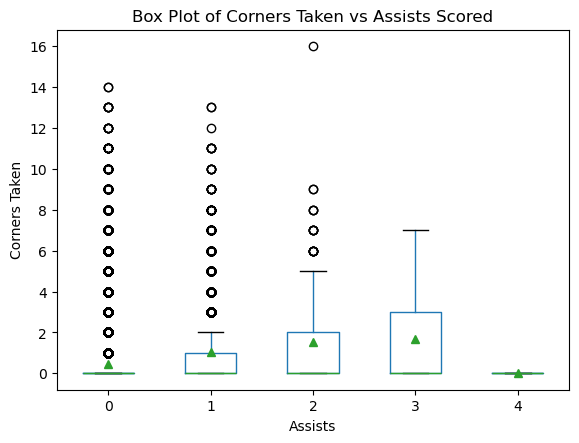

In [260]:
plt.figure
att_explore.boxplot(column = 'Corners Taken', by = 'Assists', grid = False, showmeans = True)
plt.title('Box Plot of Corners Taken vs Assists Scored')
plt.suptitle('')
plt.xlabel('Assists')
plt.ylabel('Corners Taken')
plt.show()

This plot is interesting because it shows that the mean value for corners taken increases as the number of assists recorded increases (except for observations with 4 assists, but again this probably just an outlier). However, the median number of corners taken remains the across different number of assists. 

However, the fact that observations with 0 assists has a lower mean number of corners taken could be because of the large number of observations with both 0 assists and 0 corners taken skewing the mean. We can try remove the observations with corners taken equal to zero. 

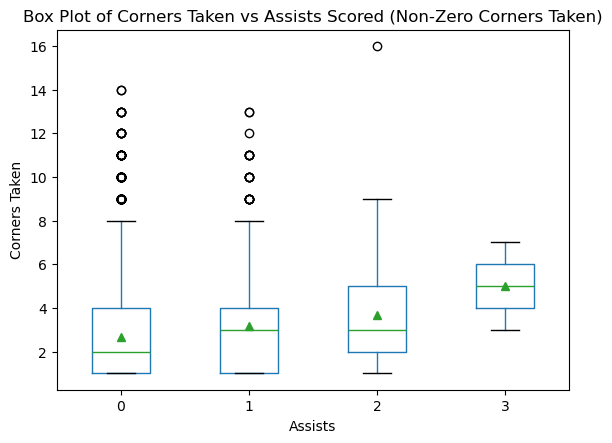

In [262]:
nonzerocorner_dat = att_explore[att_explore['Corners Taken'] > 0]

plt.figure
nonzerocorner_dat.boxplot(column = 'Corners Taken', by = 'Assists', grid = False, showmeans = True)
plt.title('Box Plot of Corners Taken vs Assists Scored (Non-Zero Corners Taken)')
plt.suptitle('')
plt.xlabel('Assists')
plt.ylabel('Corners Taken')
plt.show()

This plot shows that there still appears to be a positive relationship between corners taken and assists recorded. 

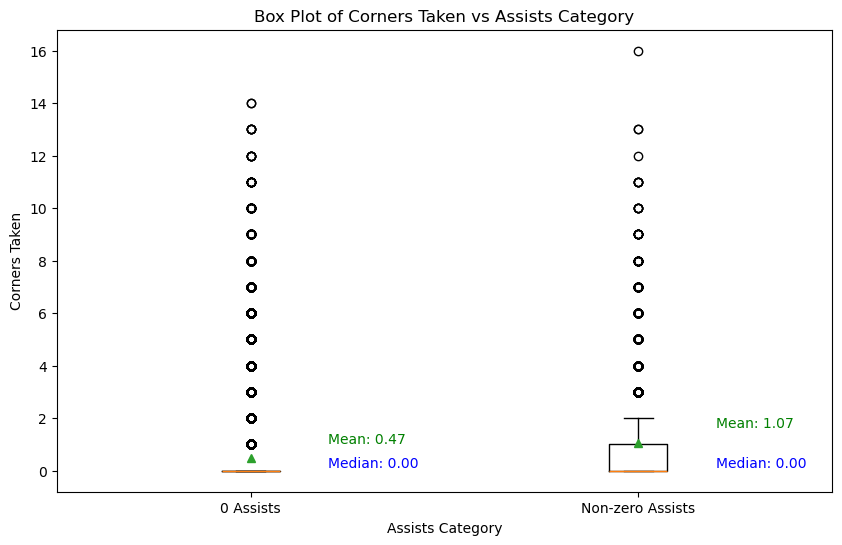

In [278]:
# Create a figure and axes
plt.figure(figsize=(10, 6))

# Prepare the data
# Group the data into two categories: '0 Assists' and 'Non-zero Assists'
data = [att_explore[att_explore['Assists'] == 0]['Corners Taken'],   # Assists == 0
        att_explore[att_explore['Assists'] != 0]['Corners Taken']]   # Assists != 0

# Create a boxplot with two boxes
plt.boxplot(data, labels=['0 Assists', 'Non-zero Assists'], showmeans = True)

# Set the title and labels
plt.title('Box Plot of Corners Taken vs Assists Category')
plt.xlabel('Assists Category')
plt.ylabel('Corners Taken')

for i in range(len(data)):
    # Median (the horizontal line in the box)
    median = np.median(data[i])
    plt.text(i + 1.2, median, f'Median: {median:.2f}', ha='left', va='bottom', color='blue')

    # Mean (the green triangle in the boxplot)
    mean = np.mean(data[i])
    plt.text(i + 1.2, mean + 1, f'Mean: {mean:.2f}', ha='left', va='top', color='green')
    
# Show the plot
plt.show()

When grouping observations with more than 1 assist together and comparing it to the set of observations with no assists, we can see that the mean number of corners taken is higher for observations that recorded at least 1 assist. However, the median number is the same. 

We now want to do something similar where we identify Player ID's associated with designated corner takers, and then look at whether or not these Player ID's are more likely to record assists compared to non corner takers. 

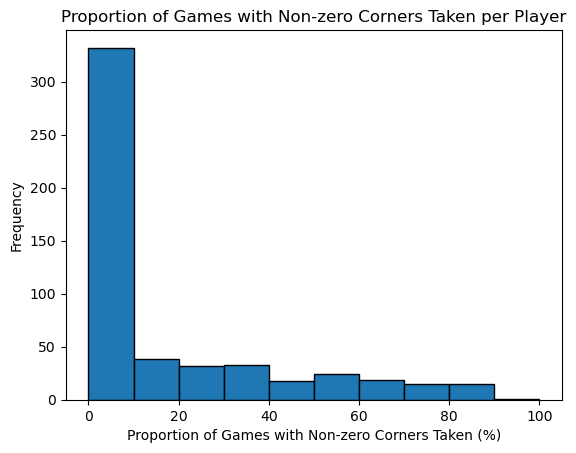

In [266]:
#filter for observations where Corners Taken is non-zero
nonzero_cornertaker = att_explore[att_explore['Corners Taken'] > 0]

#count the number of non-zero Corners Taken observations for each Player ID
nonzero_counts = nonzero_cornertaker.groupby('Player ID').size()

#count total games played for each Player ID
total_counts = att_explore.groupby('Player ID').size()

#calculate proportion of games with non-zero Corners Taken for each Player ID
proportion_cornertaker = (nonzero_counts / total_counts).fillna(0) * 100  # Multiply by 100 to get percentage

#plot the proportions
plt.figure()
plt.hist(proportion_cornertaker, bins=range(0, 110, 10), edgecolor='black') 
plt.title('Proportion of Games with Non-zero Corners Taken per Player')
plt.xlabel('Proportion of Games with Non-zero Corners Taken (%)')
plt.ylabel('Frequency')
plt.show()

Similar to the Free Kicks Taken plot, we can see that 300+ of the players that have taken at least 1 corner have taken corners in less than 10% of the games they have played. We will adhere by the similar criteria and say that players that have taken corners in more than 10% of the games they have played will be recorded as designated corner takers. 

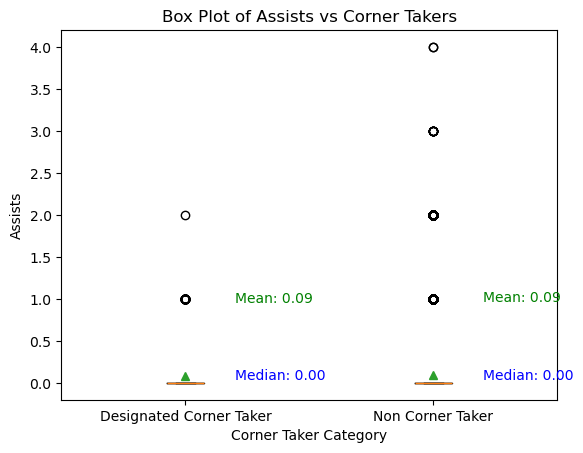

In [277]:
designated_cornertaker_id = proportion_cornertaker[proportion_cornertaker > 10]

# Create a figure and axes
plt.figure()

#grouping data into either designated free kick taker, or not designated free kick taker 
data = [
    att_explore[att_explore['Player ID'].isin(designated_cornertaker_id)]['Assists'],       # Designated free kick takers
    att_explore[~att_explore['Player ID'].isin(designated_cornertaker_id)]['Assists']       # Non-designated free kick takers
]

# Create a boxplot with two boxes
plt.boxplot(data, labels=['Designated Corner Taker', 'Non Corner Taker'], showmeans = True)

# Set the title and labels
plt.title('Box Plot of Assists vs Corner Takers')
plt.xlabel('Corner Taker Category')
plt.ylabel('Assists')

for i in range(len(data)):
    # Median (the horizontal line in the box)
    median = np.median(data[i])
    plt.text(i + 1.2, median, f'Median: {median:.2f}', ha='left', va='bottom', color='blue')

    # Mean (the green triangle in the boxplot)
    mean = np.mean(data[i])
    plt.text(i + 1.2, mean + 1, f'Mean: {mean:.2f}', ha='left', va='top', color='green')
    
# Show the plot
plt.show()

However, it is super surprising to see that the mean number of assists recorded by players whose player ID is in the list of designated corner takers is has the same mean and median as player who are not regarded as designated corner takers. This contrasts both our expectation, as well as the results shown in the previous plots. Overall, we can probably conclude that being a corner taker has a minimal effect on whether or not a player is more likely to record an assist or not. Although taking corners does present an additional opportunity to get an assist, the quality of chance created directly from a corner is generally quite low. Although we saw that the mean number of corners taken is higher for observations with non-zero number of assists, this is probably because of the small number of observations included in the set of observations with non-zero assists. In contrast, the set of observations with number of assists = 0 also has a large number of observations with corners taken = 0 (we saw that the number of corners taken is very much skewed to the right), which means the mean will be skewed towards zero. 

#### Through Balls 

A through ball is recorded if a player completes a pass which is sent behind defenders into open space. In general, we expect the more creative players to record more through balls. However, the relationship between through balls and assists is unclear. We don't really expect through balls to have much relatioship with goals scored. This is because we generally expect midfielders to perform more through balls than attackers. 

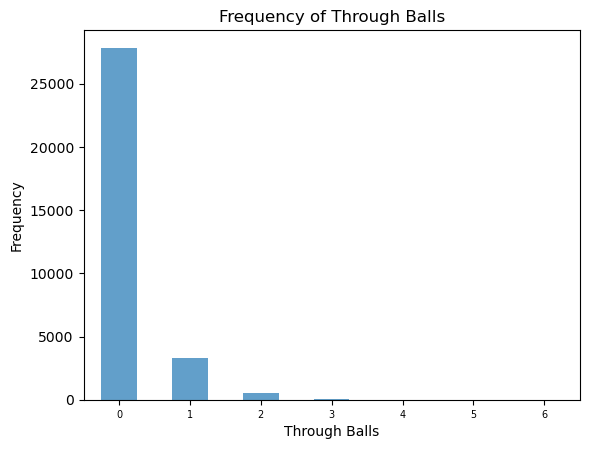

In [279]:
throughball_count = att_explore['Through Balls'].value_counts().sort_index()

fig, ax = plt.subplots()

throughball_count.plot(kind = 'bar', alpha = 0.7)

ax.set_xlabel('Through Balls')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Through Balls')
#set_xticks is used to only have certain values on the x axis. without this on, every x axis value was printed, which meant that the x axis values overlapped, affecting readability 
# ax.set_xticks(range(0, 30, 5))
# ax.set_xticklabels(range(0, 30, 5))

plt.xticks(rotation = 0, fontsize = 7)
plt.show()

Again, we see that the majority of observations recorded no through balls. The fact that the maximum value for through balls amongst all of the observations is 6 tells us that through balls are generally quite rare. 

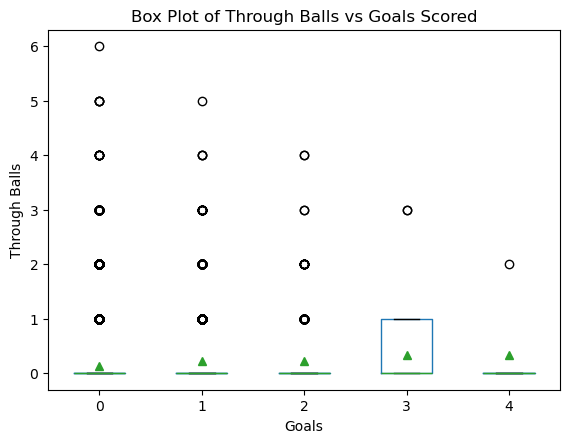

In [281]:
plt.figure
att_explore.boxplot(column = 'Through Balls', by = 'Goals', grid = False, showmeans = True)
plt.title('Box Plot of Through Balls vs Goals Scored')
plt.suptitle('')
plt.xlabel('Goals')
plt.ylabel('Through Balls')
plt.show()

This boxplot shows that the number of through balls recorded is pretty much the same when comparing observations with different number of goals scored. As we speculated, this is not particularly surprising. Let's also try group the observations by whether or not they recorded a non-zero value for through balls, and have a look at the median/mean goals scored when applying this grouping. 

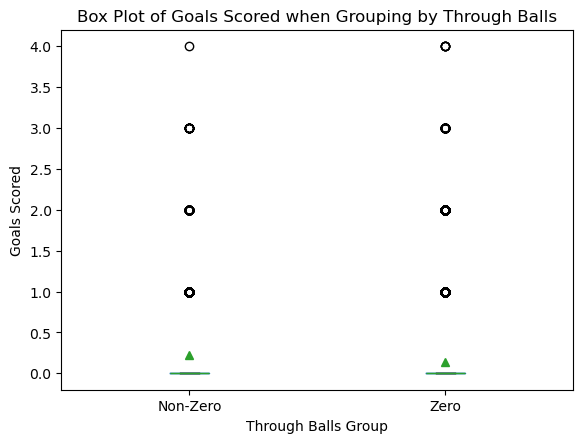

In [282]:
data = {
    'Through Balls': att_explore['Through Balls'],
    'Goals': att_explore['Goals']
}
df = pd.DataFrame(data)

# Step 1: Create a new column that indicates if 'Through Balls' is zero or not
df['Through Balls Group'] = df['Through Balls'].apply(lambda x: 'Zero' if x == 0 else 'Non-Zero')

# Step 2: Create the boxplot
plt.figure
df.boxplot(column = 'Goals', by = 'Through Balls Group', grid = False, showmeans = True)
plt.title('Box Plot of Goals Scored when Grouping by Through Balls')
plt.suptitle('')
plt.xlabel('Through Balls Group')
plt.ylabel('Goals Scored')
plt.show()

Here, we can see that the distribution of goals is pretty much the same when performing this grouping. Therefore, we can conclude that Through Balls probably doesn't have any significant relationship with goals.

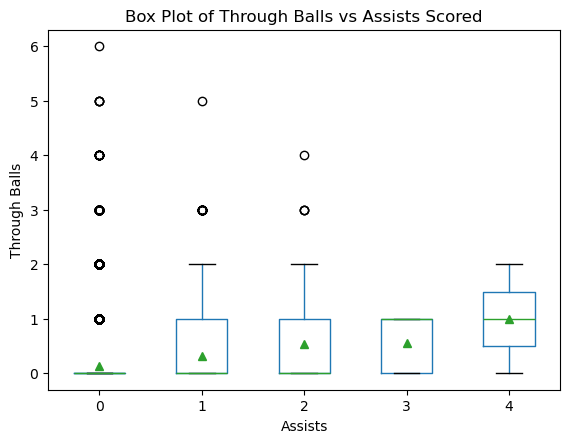

In [283]:
plt.figure
att_explore.boxplot(column = 'Through Balls', by = 'Assists', grid = False, showmeans = True)
plt.title('Box Plot of Through Balls vs Assists Scored')
plt.suptitle('')
plt.xlabel('Assists')
plt.ylabel('Through Balls')
plt.show()

Here, it appears as if there is some relationship between the number of through balls recorded and assists accumulated. Although the median values are the same when comparing observations with 0, 1 and 2 assists, then mean number of through balls is clearly increasing as the number of assists increases. 

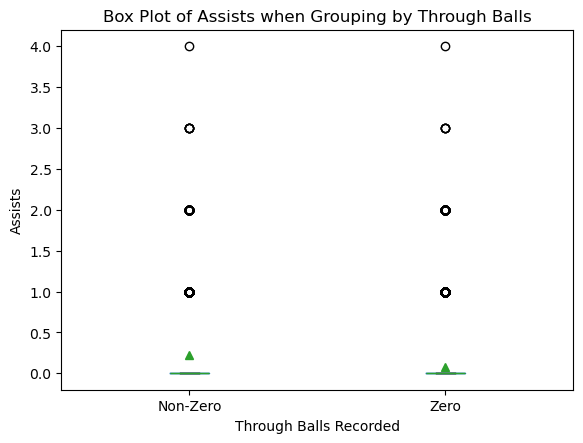

In [287]:
data = {
    'Through Balls': att_explore['Through Balls'],
    'Assists': att_explore['Assists']
}
df = pd.DataFrame(data)

# Step 1: Create a new column that indicates if 'Through Balls' is zero or not
df['Through Balls Group'] = df['Through Balls'].apply(lambda x: 'Zero' if x == 0 else 'Non-Zero')

# Step 2: Create the boxplot
plt.figure
df.boxplot(column = 'Assists', by = 'Through Balls Group', grid = False, showmeans = True)
plt.title('Box Plot of Assists when Grouping by Through Balls')
plt.suptitle('')
plt.xlabel('Through Balls Recorded')
plt.ylabel('Assists')
plt.show()

When grouping the observations by whether or not a non-zero value for through balls was recorded, we can see that the mean number of assists is higher for the observations that recorded non-zero values for through balls. The median value is still at zero though.

#### Passes Offside

It is worth exploring the relationship between Through Balls and Passes Offside because there is justification to suggest that these two features are intrinsically linked. Passes Offside refers to the number of times a player makes a pass to a player that is offside. Therefore, the only difference between a through ball and a pass offside is whether or not the player receiving the ball is onside or offside. Based on this, we expect Through Balls and Passes Offside to be closely related. We can investigate this by constructing a scatter plot of Through Balls vs Passes Offside.

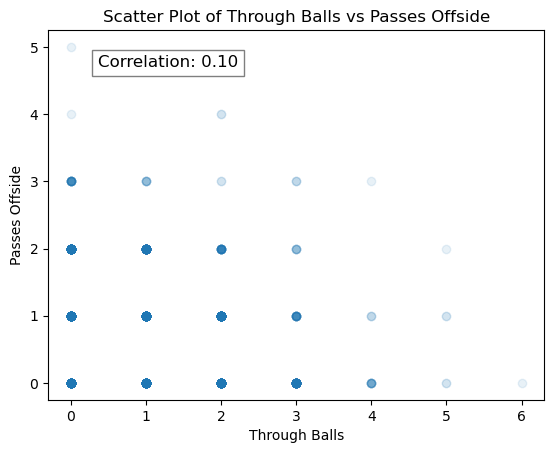

In [288]:
#calculate the correlation
correlation = att_explore['Through Balls'].corr(att_explore['Passes Offside'])

plt.figure()
plt.scatter(att_explore['Through Balls'], att_explore['Passes Offside'], alpha=0.1)
plt.title(f'Scatter Plot of Through Balls vs Passes Offside')
plt.xlabel('Through Balls')
plt.ylabel('Passes Offside')

plt.text(0.1, 0.9, f'Correlation: {correlation:.2f}', 
         transform=plt.gca().transAxes, fontsize=12, 
         bbox=dict(facecolor='white', alpha=0.5, edgecolor='black'))

plt.show()

The scatter plot above shows that against our expectation, there is actually a limited relationship between Through Balls and Passes Offside. We can see this both visually, as well as by the correlation value that is calculated. We can now have a quick look at the relationship between Passes Offside and Goals/Assists. 

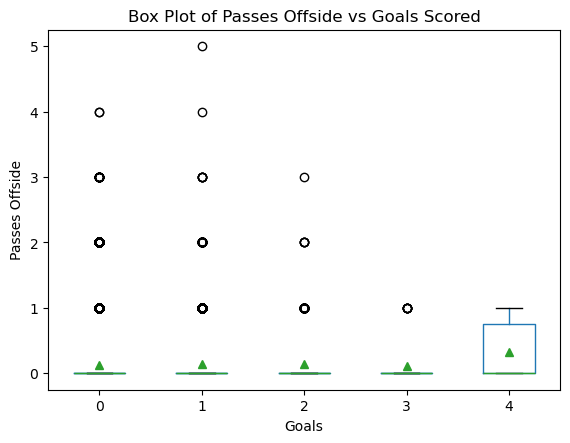

In [289]:
plt.figure
att_explore.boxplot(column = 'Passes Offside', by = 'Goals', grid = False, showmeans = True)
plt.title('Box Plot of Passes Offside vs Goals Scored')
plt.suptitle('')
plt.xlabel('Goals')
plt.ylabel('Passes Offside')
plt.show()

This boxplot shows that there doesn't appear to be any relationship between Goals and Passes Offside. We can see that the boxplots look almost identical when grouping observations by the number of goals scored. However, when looking at features such as this one where majority of the observations have a value equal to zero, it is worth grouping them by whether or not the value recorded is zero or non-zero, just as we did when looking at the through balls feature. 

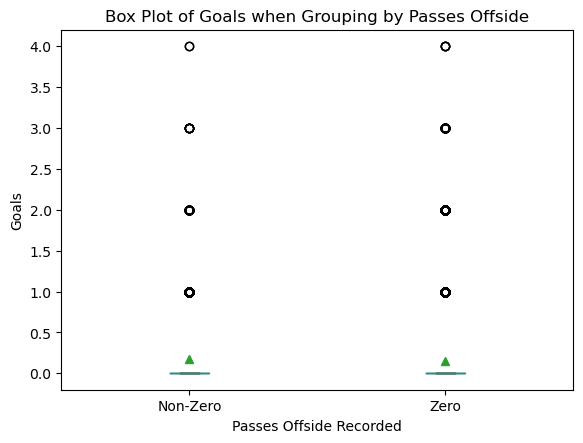

In [290]:
data = {
    'Passes Offside': att_explore['Passes Offside'],
    'Goals': att_explore['Goals']
}
df = pd.DataFrame(data)

#create a new column that indicates if 'Passes Offside' is zero or not
df['Passes Offside Group'] = df['Passes Offside'].apply(lambda x: 'Zero' if x == 0 else 'Non-Zero')

#create boxplot
plt.figure
df.boxplot(column = 'Goals', by = 'Passes Offside Group', grid = False, showmeans = True)
plt.title('Box Plot of Goals when Grouping by Passes Offside')
plt.suptitle('')
plt.xlabel('Passes Offside Recorded')
plt.ylabel('Goals')
plt.show()

Here, we can see that there is virtually no relationship between the number of passes offside recorded and the number of goals scored. 

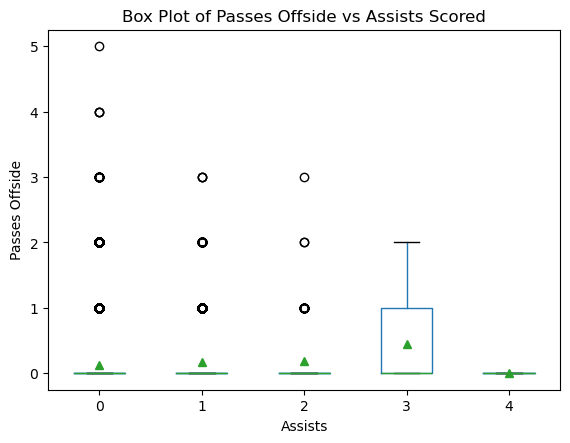

In [291]:
plt.figure
att_explore.boxplot(column = 'Passes Offside', by = 'Assists', grid = False, showmeans = True)
plt.title('Box Plot of Passes Offside vs Assists Scored')
plt.suptitle('')
plt.xlabel('Assists')
plt.ylabel('Passes Offside')
plt.show()

Here, this boxplot shows that there doesn't appear to be any relationship between the number of offside passes recorded and the number of assists accumulated. The plot does show that the mean number of passes offside is higher when 3 assists are recorded, but this is likely to be an outlier effect. 

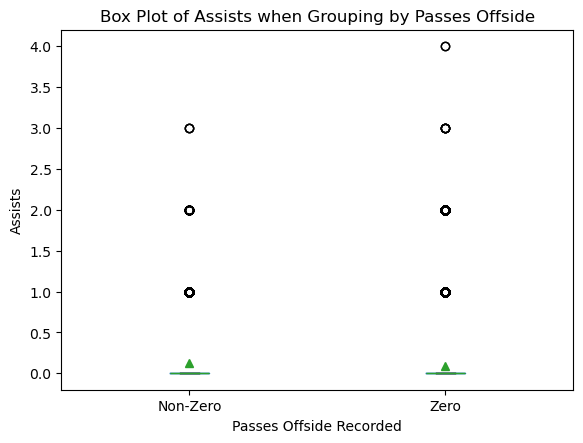

In [292]:
data = {
    'Passes Offside': att_explore['Passes Offside'],
    'Assists': att_explore['Assists']
}
df = pd.DataFrame(data)

#create a new column that indicates if 'Passes Offside' is zero or not
df['Passes Offside Group'] = df['Passes Offside'].apply(lambda x: 'Zero' if x == 0 else 'Non-Zero')

#create boxplot
plt.figure
df.boxplot(column = 'Assists', by = 'Passes Offside Group', grid = False, showmeans = True)
plt.title('Box Plot of Assists when Grouping by Passes Offside')
plt.suptitle('')
plt.xlabel('Passes Offside Recorded')
plt.ylabel('Assists')
plt.show()

When we again group observations by whether or not the number of passes offside is zero or non-zero, we can see that both the mean/median number of assists recorded when comparing these observations are pretty much the same. Therefore, we can conclude that Passes Offside is a feature that doesn't really have any relationship with either Goals or Assists. We should probably discard this feature. 

#### Switches

A switch is recorded if a player completes a pass that travels 40 yards or more across the pitch (sideways). In general, the players most likely to accumulate a high number of switches are midfielders (actually, defenders are more likely to record a higher number of switches compared to attackers). Therefore, we don't expect this to be a useful feature for predicting either Goals or Assists. 

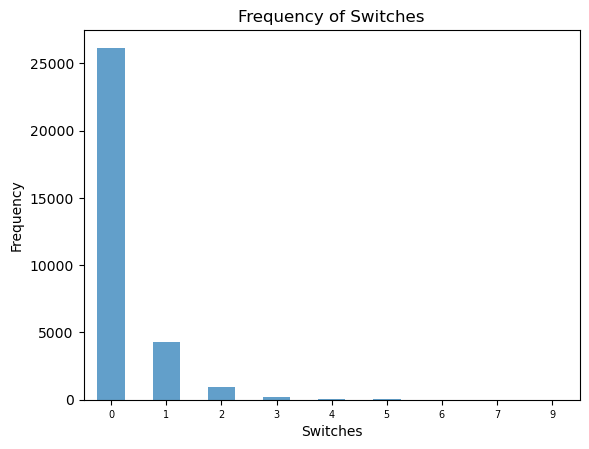

In [296]:
switches_count = att_explore['Switches'].value_counts().sort_index()

fig, ax = plt.subplots()

switches_count.plot(kind = 'bar', alpha = 0.7)

ax.set_xlabel('Switches')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Switches')
#set_xticks is used to only have certain values on the x axis. without this on, every x axis value was printed, which meant that the x axis values overlapped, affecting readability 
# ax.set_xticks(range(0, 30, 5))
# ax.set_xticklabels(range(0, 30, 5))

plt.xticks(rotation = 0, fontsize = 7)
plt.show()

Much like many of the features we have explored, the frequency plot for Switches is very much right-skewed. Majority of observations have completed 0 switches. This makes sense because tactically speaking, only certain players are in positions where a switch pass is necessary. For example if you are positioned in the centre of the pitch, it is unlikely that you will be able to record a lateral pass that goes far enough to be considered a switch. Likewise, switches rarely happen in the attacking third, which rules out wingers from making switches. It is only really players positioned relatively deep (defensive or middle third), who also constantly patrol the wide areas (full backs, midfielders who drop into wide areas to receive the ball) who are most likely to record a switch pass in the course of the game. 

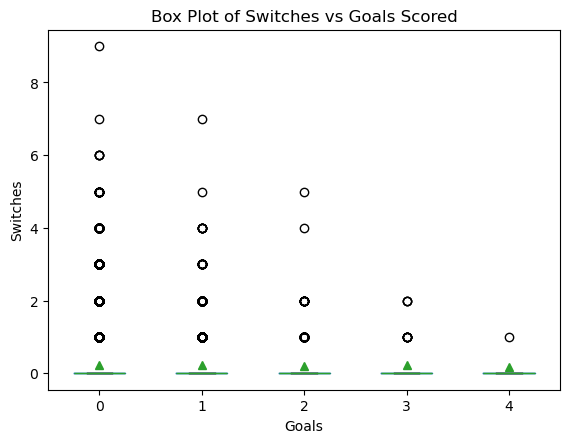

In [294]:
plt.figure
att_explore.boxplot(column = 'Switches', by = 'Goals', grid = False, showmeans = True)
plt.title('Box Plot of Switches vs Goals Scored')
plt.suptitle('')
plt.xlabel('Goals')
plt.ylabel('Switches')
plt.show()

As expected, there doesn't appear to be any relationship between the number of switches recorded as the number of goals scored. 

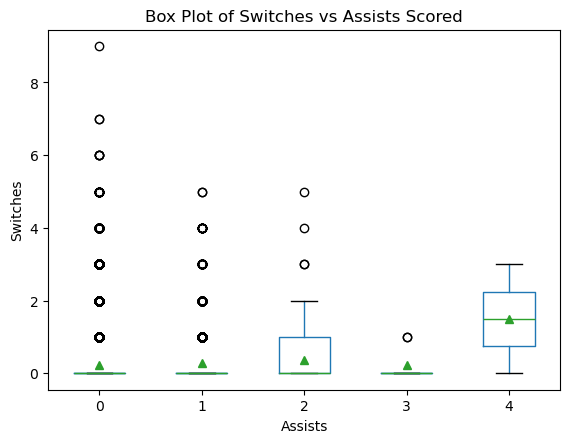

In [295]:
plt.figure
att_explore.boxplot(column = 'Switches', by = 'Assists', grid = False, showmeans = True)
plt.title('Box Plot of Switches vs Assists Scored')
plt.suptitle('')
plt.xlabel('Assists')
plt.ylabel('Switches')
plt.show()

Similarly, there also doesn't appear to be any relationship between the number of switches recorded and the number of assists. Although there is some slight deviation (the mean number of switches seems to be higher for observations with 2 assists and much higher for observations with 4 assists), these are probably just outliers. 

#### Crosses

Crosses is an interesting feature in terms of whether or not we expect there to be a relationship between the number of crosses recorded and goals/assists. First off, we don't really expect there to be much relationship between the crosses and goals. However, there may be a relationship between the number of crosses and assists. In general, the more crosses a player accumulates, the higher the probability of recording an assist. This is because we can view each cross as an opportunity to provide an assist. However, there is some debate as to the quality of chances created through crossing. In fact, the general consensus is that excessive crossing is a waste, because you are needlessly risking loss of possession for minimal gain in terms of chance creation. You are better off retaining possession of the ball, and looking to create a chance through alternative means. The material effect of this can be seen through the data, as the average number of crosses per game has been going down season on season, as more and more teams adopt data-driven techniques and methods to improve their game. 

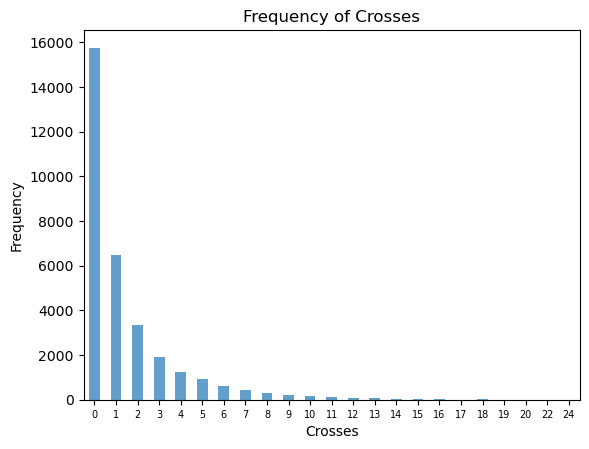

In [297]:
crosses_count = att_explore['Crosses'].value_counts().sort_index()

fig, ax = plt.subplots()

crosses_count.plot(kind = 'bar', alpha = 0.7)

ax.set_xlabel('Crosses')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Crosses')
#set_xticks is used to only have certain values on the x axis. without this on, every x axis value was printed, which meant that the x axis values overlapped, affecting readability 
# ax.set_xticks(range(0, 30, 5))
# ax.set_xticklabels(range(0, 30, 5))

plt.xticks(rotation = 0, fontsize = 7)
plt.show()

Although majority of the observations recorded 0 assists, there is actually quite a good spread of crosses recorded. There is even an observation that recorded 24 assists in one game! 

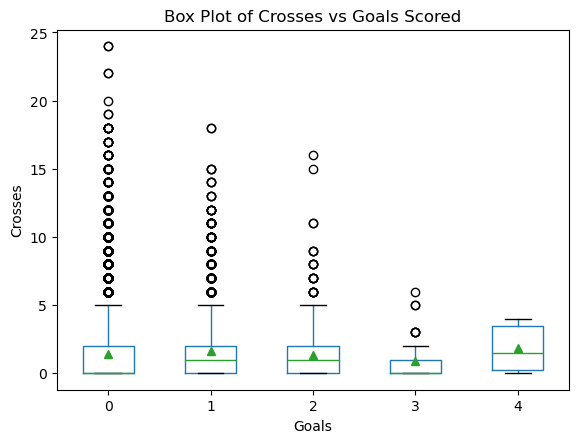

In [298]:
plt.figure
att_explore.boxplot(column = 'Crosses', by = 'Goals', grid = False, showmeans = True)
plt.title('Box Plot of Crosses vs Goals Scored')
plt.suptitle('')
plt.xlabel('Goals')
plt.ylabel('Crosses')
plt.show()

This boxplot shows that there doesn't appear to be any significant relationship between the number of crosses recorded and goals scored. This is waht we expected. 

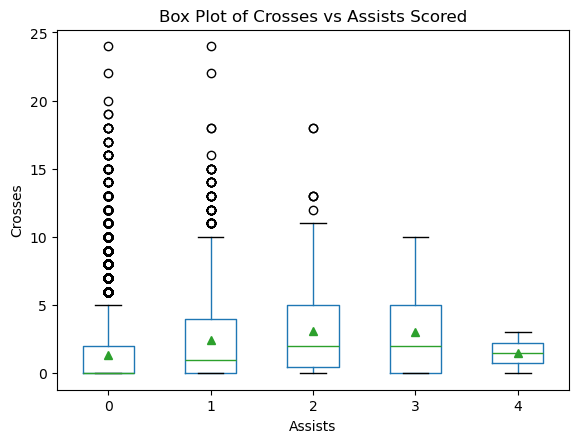

In [299]:
plt.figure
att_explore.boxplot(column = 'Crosses', by = 'Assists', grid = False, showmeans = True)
plt.title('Box Plot of Crosses vs Assists Scored')
plt.suptitle('')
plt.xlabel('Assists')
plt.ylabel('Crosses')
plt.show()

This boxplot shows that there is perhaps some relationship between the number of crosses recorded and assists. The mean number of assists seems to be higher for observations that recorded at least 1 assist, compared to the observations that recorded no assists. The median number of assists recorded also seems to be higher. 

What is interesting is that although there appears to be some relationship between 'Crosses' and 'Assists', we had previously concluded that there was no relationship between 'Crosses into the Penalty Area' and 'Assists'. Let's investigate this by looking at the relationship between 'Crosses' and 'Crosses into the Penalty Area'. 

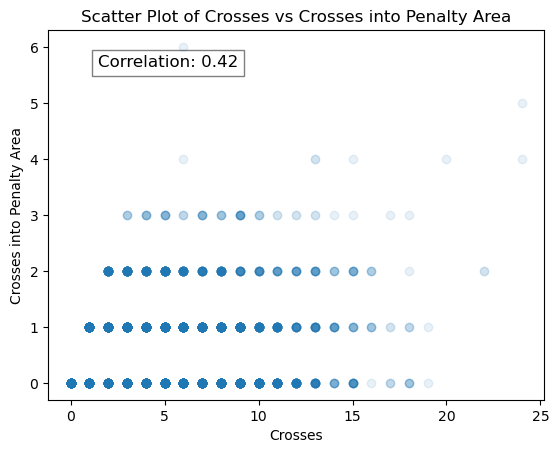

In [300]:
#calculate the correlation
correlation = att_explore['Crosses'].corr(att_explore['Crosses into Penalty Area'])

plt.figure()
plt.scatter(att_explore['Crosses'], att_explore['Crosses into Penalty Area'], alpha=0.1)
plt.title(f'Scatter Plot of Crosses vs Crosses into Penalty Area')
plt.xlabel('Crosses')
plt.ylabel('Crosses into Penalty Area')

plt.text(0.1, 0.9, f'Correlation: {correlation:.2f}', 
         transform=plt.gca().transAxes, fontsize=12, 
         bbox=dict(facecolor='white', alpha=0.5, edgecolor='black'))

plt.show()

We can see that there is some relationship between these two features based on the scatter plot above. However, the correlation between these two features is only 0.42, which indicates that the relationship between them is not particularly strong. 

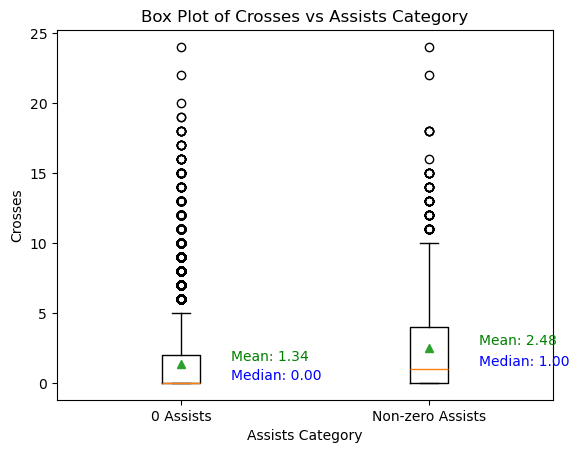

In [302]:
# Create a figure and axes
plt.figure()

# Prepare the data
# Group the data into two categories: '0 Assists' and 'Non-zero Assists'
data = [att_explore[att_explore['Assists'] == 0]['Crosses'],   # Assists == 0
        att_explore[att_explore['Assists'] != 0]['Crosses']]   # Assists != 0

# Create a boxplot with two boxes
plt.boxplot(data, labels=['0 Assists', 'Non-zero Assists'], showmeans = True)

# Set the title and labels
plt.title('Box Plot of Crosses vs Assists Category')
plt.xlabel('Assists Category')
plt.ylabel('Crosses')

for i in range(len(data)):
    # Median (the horizontal line in the box)
    median = np.median(data[i])
    plt.text(i + 1.2, median, f'Median: {median:.2f}', ha='left', va='bottom', color='blue')

    # Mean (the green triangle in the boxplot)
    mean = np.mean(data[i])
    plt.text(i + 1.2, mean + 1, f'Mean: {mean:.2f}', ha='left', va='top', color='green')
    
# Show the plot
plt.show()

When grouping observations by whether or not the number of assists recorded is zero or non-zero, we can see that both the mean/median number of crosses is higher for observations that recorded non-zero assists. 

Let's now try remove the observations that recorded zero crosses.

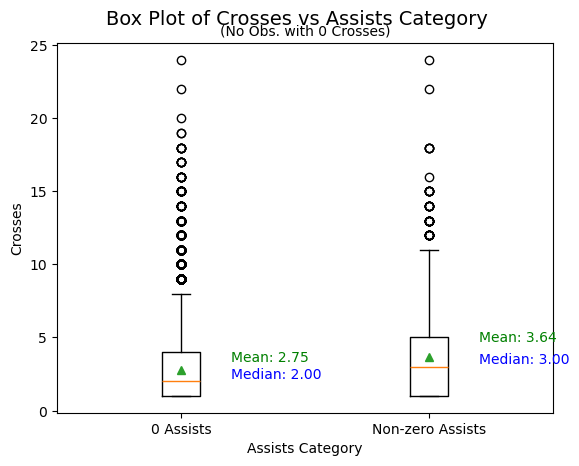

In [304]:
plt.figure()

data = [
    att_explore[(att_explore['Assists'] == 0) & (att_explore['Crosses'] > 0)]['Crosses'],   # Assists == 0 and Crosses into Final Third > 0
    att_explore[(att_explore['Assists'] != 0) & (att_explore['Crosses'] > 0)]['Crosses']    # Assists != 0 and Crosses into Final Third > 0
]

plt.boxplot(data, labels=['0 Assists', 'Non-zero Assists'], showmeans = True)

plt.title('(No Obs. with 0 Crosses)', fontsize = 10)
plt.suptitle('Box Plot of Crosses vs Assists Category', y = 0.95, fontsize = 14)
plt.xlabel('Assists Category')
plt.ylabel('Crosses')

# Annotating the mean and median values
for i in range(len(data)):
    # Median (the horizontal line in the box)
    median = np.median(data[i])
    plt.text(i + 1.2, median, f'Median: {median:.2f}', ha='left', va='bottom', color='blue')

    # Mean (the green triangle in the boxplot)
    mean = np.mean(data[i])
    plt.text(i + 1.2, mean + (mean * 0.5), f'Mean: {mean:.2f}', ha='left', va='top', color='green')

plt.show()

When removing observations that recorded zero crosses, we can still see that the mean and median number of crosses recorded is higher for observations that recorded non-zero assists. This is significant because it tells us that there is probably a relationship between the number of crosses recorded and assists. 

It may not be immediately clear why removing the observations that recorded zero crosses is useful. The primary reason why we do this is because of the large number of observations that recorded zero crosses in the dataset. By removing the observations that have recorded zero assists, we are trying to remove the bias that may appear in our plots by including a large number of observations with zero crosses. What the plot above actually tells us is that the measures of central tendancy for crosses is higher for observations that recorded non-zero assists when there exists no observations that have a value of zero for crosses. So there is no downward bias being exhibited, so we are more sure that the central value for crosses is indeed higher when the number of assists accumulated is non-zero. 

It is still somewhat weird that there is some relationship between 'Assists' and 'Crosses', when we saw that there was no material link between 'Assists' and 'Crosses into Penalty Area'. If anything, we would expect there to be a stronger link between 'Crosses into Penalty Area' and 'Assists', because crosses into the penalty area are generally regarded as a measure of higher quality chances, when compared to a regular cross. What we didn't do before was group observations by whether or not they recorded a zero or non-zero value for crosses into the penalty area, and then looking at the distribution of assists when performing this grouping. We can try this now. 

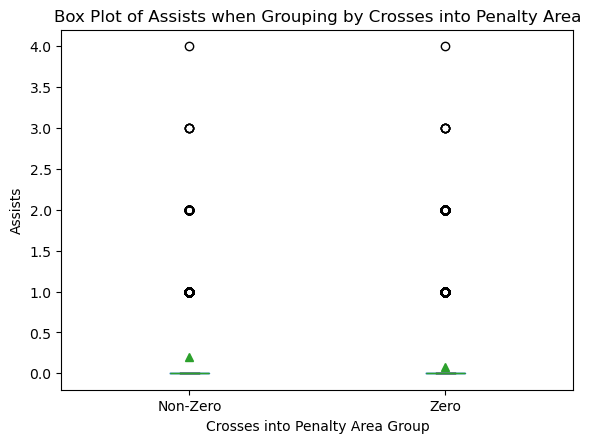

In [306]:
data = {
    'Crosses into Penalty Area': att_explore['Crosses into Penalty Area'],
    'Assists': att_explore['Assists']
}
df = pd.DataFrame(data)

# Step 1: Create a new column that indicates if 'Crosses into Penalty Area' is zero or not
df['Crosses into Penalty Area Group'] = df['Crosses into Penalty Area'].apply(lambda x: 'Zero' if x == 0 else 'Non-Zero')

# Step 2: Create the boxplot
plt.figure
df.boxplot(column = 'Assists', by = 'Crosses into Penalty Area Group', grid = False, showmeans = True)
plt.title('Box Plot of Assists when Grouping by Crosses into Penalty Area')
plt.suptitle('')
plt.xlabel('Crosses into Penalty Area Group')
plt.ylabel('Assists')
plt.show()

This plot shows that the mean number of assists recorded is slightly higher when a non-zero number of crosses into the penalty area is recorded. However, there doesn't really appear to be a significant relationship here. 

### Carries and Take-ons

A 'Carry' is recorded when a player controls the ball with their feet. This is recorded as a 'Progressive Carry' if the carry moves the player towards the opponent's goal at least 10 yards. A 'Take-on' is the same as a dribble. So a 'Take-on' attempt is the number of times a player attempted to dribble past an opposing player. 